### EDA on Train Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from pylab import rcParams


In [2]:
# Loading all the training datasets 

Train_Beneficiary = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
Train_Inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
Train_Outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
Test_label = pd.read_csv('Train-1542865627584.csv')

In [3]:
pd.set_option('display.max_columns', 100) # shows all the columns

In [4]:
Train_Beneficiary.shape # number of rows & columns

(138556, 25)

In [5]:
Train_Inpatient.shape # number of rows & columns

(40474, 30)

In [6]:
Train_Outpatient.shape # number of rows & columns

(517737, 27)

In [7]:
Test_label.shape

(5410, 2)

## Dropping columns

In [8]:
Train_Beneficiary = Train_Beneficiary.drop(['DOD'], axis = 1)

In [9]:
Train_Inpatient = Train_Inpatient.drop(['ClmProcedureCode_6'], axis = 1) # dropping because 100% data as NAs

In [10]:
Train_Outpatient = Train_Outpatient.drop(['ClmProcedureCode_5', 'ClmProcedureCode_6'], axis = 1) # dropping because 100% data as NAs

## Replacing NAs with 0

In [11]:
Train_Inpatient[['DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']] = Train_Inpatient[[\
                                                                                             'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']].fillna(0)

In [12]:
Train_Outpatient[['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4']] = Train_Outpatient[['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4']].fillna(0)

In [13]:
Train_Inpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = Train_Inpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].fillna('None')

In [14]:
Train_Outpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = Train_Outpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].fillna('None')

## Counting number of missing values

In [15]:
Train_Beneficiary.isnull().sum() # row = 138556

BeneID                             0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
dtype: int64

In [16]:
Train_Inpatient.isnull().sum() # row = 40474

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
AdmissionDt               0
ClmAdmitDiagnosisCode     0
DeductibleAmtPaid         0
DischargeDt               0
DiagnosisGroupCode        0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
ClmProcedureCode_4        0
ClmProcedureCode_5        0
dtype: int64

In [17]:
Train_Outpatient.isnull().sum() # row = 517737

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
ClmProcedureCode_4        0
DeductibleAmtPaid         0
ClmAdmitDiagnosisCode     0
dtype: int64

## Checking 1st 5 rows of all 3 data sets

In [18]:
Train_Beneficiary.head() # 1 means Yes, 2 means No

BeneID         DOB  Gender  Race RenalDiseaseIndicator  State  County  \
0  BENE11001  1943-01-01       1     1                     0     39     230   
1  BENE11002  1936-09-01       2     1                     0     39     280   
2  BENE11003  1936-08-01       1     1                     0     52     590   
3  BENE11004  1922-07-01       1     1                     0     39     270   
4  BENE11005  1935-09-01       1     1                     0     24     680   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      1   
1                   12                   12                      2   
2                   12                   12                      1   
3                   12                   12                      1   
4                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          2                   2   
2                         2                          2                   2   
3                         1                          2                   2   
4                         2                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           2                       2                     2   
3                           2                       2                     1   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          2                         2   
2                          1                         2   
3                          1                         1   
4                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  
0                     70  
1                     50  
2                     40  
3                    760  
4                   1200

In [19]:
Train_Inpatient.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922               None   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395               None   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0           None  2009-04-12                  7866             1068.0   
1           None  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4           None  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                  0                  0                  0   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                  0                  0                  0   
2                  0                  0                  0   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                   0                 0.0                 0.0   
1                   0              7092.0                 0.0   
2                   0                 0.0                 0.0   
3                   0               331.0                 0.0   
4                   0              3893.0                 0.0   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  
0                 0.0                 0.0                 0.0  
1                 0.0                 0.0                 0.0  
2                 0.0                 0.0                 0.0  
3                 0.0                 0.0                 0.0  
4                 0.0                 0.0                 0.0

In [20]:
Train_Outpatient.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117               None   
1                      80          PHY362868               None   
2                      10          PHY328821               None   
3                      40          PHY334319               None   
4                     200          PHY403831               None   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0           None              78943              V5866              V1272   
1           None               6115                  0                  0   
2           None               2723                  0                  0   
3           None              71988                  0                  0   
4           None              82382              30000              72887   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4               4280               7197              V4577                  0   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                  0                  0                   0   
1                  0                  0                   0   
2                  0                  0                   0   
3                  0                  0                   0   
4                  0                  0                   0   

   ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   ClmProcedureCode_4  DeductibleAmtPaid ClmAdmitDiagnosisCode  
0                 0.0                  0                 56409  
1                 0.0                  0                 79380  
2                 0.0                  0                     0  
3                 0.0                  0                     0  
4                 0.0                  0                 71947

## Checking rows that has missing values for all 3 physician columns

In [21]:
Train_Outpatient.loc[(Train_Outpatient.AttendingPhysician.isnull() == True) & (Train_Outpatient.OperatingPhysician.isnull() == True) & ((Train_Outpatient.OtherPhysician.isnull() == True))]

Empty DataFrame
Columns: [BeneID, ClaimID, ClaimStartDt, ClaimEndDt, Provider, InscClaimAmtReimbursed, AttendingPhysician, OperatingPhysician, OtherPhysician, ClmDiagnosisCode_1, ClmDiagnosisCode_2, ClmDiagnosisCode_3, ClmDiagnosisCode_4, ClmDiagnosisCode_5, ClmDiagnosisCode_6, ClmDiagnosisCode_7, ClmDiagnosisCode_8, ClmDiagnosisCode_9, ClmDiagnosisCode_10, ClmProcedureCode_1, ClmProcedureCode_2, ClmProcedureCode_3, ClmProcedureCode_4, DeductibleAmtPaid, ClmAdmitDiagnosisCode]
Index: []

In [22]:
Train_Inpatient.loc[(Train_Inpatient.AttendingPhysician.isnull() == True) & (Train_Inpatient.OperatingPhysician.isnull() == True) & ((Train_Inpatient.OtherPhysician.isnull() == True))]

Empty DataFrame
Columns: [BeneID, ClaimID, ClaimStartDt, ClaimEndDt, Provider, InscClaimAmtReimbursed, AttendingPhysician, OperatingPhysician, OtherPhysician, AdmissionDt, ClmAdmitDiagnosisCode, DeductibleAmtPaid, DischargeDt, DiagnosisGroupCode, ClmDiagnosisCode_1, ClmDiagnosisCode_2, ClmDiagnosisCode_3, ClmDiagnosisCode_4, ClmDiagnosisCode_5, ClmDiagnosisCode_6, ClmDiagnosisCode_7, ClmDiagnosisCode_8, ClmDiagnosisCode_9, ClmDiagnosisCode_10, ClmProcedureCode_1, ClmProcedureCode_2, ClmProcedureCode_3, ClmProcedureCode_4, ClmProcedureCode_5]
Index: []

## Checking number of unique values in Physician columns

In [23]:
Out_AP = Train_Outpatient.AttendingPhysician.unique().tolist()

In [24]:
Out_OP = Train_Outpatient.OperatingPhysician.unique().tolist()

In [25]:
Out_OtP = Train_Outpatient.OtherPhysician.unique().tolist()

In [26]:
Out_doctors = Out_AP+Out_OP+Out_OtP

In [27]:
len(set(Out_doctors))

89771

## Merging Beneficiary data with inpatient & outpatient data (2 seperate dataframe)

In [28]:
Merged_Inpatient = pd.merge(Train_Beneficiary, Train_Inpatient, how = 'inner', on = 'BeneID')

In [29]:
Merged_Outpatient = pd.merge(Train_Beneficiary, Train_Outpatient, how = 'inner', on = 'BeneID')

In [30]:
Merged_Inpatient.head()

BeneID         DOB  Gender  Race RenalDiseaseIndicator  State  County  \
0  BENE11001  1943-01-01       1     1                     0     39     230   
1  BENE11001  1943-01-01       1     1                     0     39     230   
2  BENE11001  1943-01-01       1     1                     0     39     230   
3  BENE11011  1914-03-01       2     2                     0      1     360   
4  BENE11014  1938-04-01       2     1                     Y     45     780   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      1   
1                   12                   12                      1   
2                   12                   12                      1   
3                   12                   12                      2   
4                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          1                   2   
2                         2                          1                   2   
3                         1                          1                   2   
4                         1                          1                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       1                     1   
2                           2                       1                     1   
3                           2                       1                     1   
4                           1                       1                     2   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          1                         2   
2                          1                         2   
3                          2                         2   
4                          1                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                1                   1   
2                                1                   1   
3                                1                   1   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                     36000                   3204                        60   
2                     36000                   3204                        60   
3                      5000                   1068                       250   
4                     21260                   2136                       120   

   OPAnnualDeductibleAmt   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0                     70  CLM46614   2009-04-12  2009-04-18  PRV55912   
1                     70  CLM66048   2009-08-31  2009-09-02  PRV55907   
2                     70  CLM68358   2009-09-17  2009-09-20  PRV56046   
3                    320  CLM38412   2009-02-14  2009-02-22  PRV52405   
4                    100  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922               None   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395               None   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0           None  2009-04-12                  7866             1068.0   

## Converting 2 to 0

In [31]:
Merged_Outpatient['Gender'] = Merged_Outpatient['Gender'].replace(2,0) 
Merged_Outpatient['ChronicCond_Alzheimer'] = Merged_Outpatient['ChronicCond_Alzheimer'].replace(2,0)
Merged_Outpatient['ChronicCond_Heartfailure'] = Merged_Outpatient['ChronicCond_Heartfailure'].replace(2,0)
Merged_Outpatient['ChronicCond_KidneyDisease'] = Merged_Outpatient['ChronicCond_KidneyDisease'].replace(2,0)
Merged_Outpatient['ChronicCond_Cancer'] = Merged_Outpatient['ChronicCond_Cancer'].replace(2,0)
Merged_Outpatient['ChronicCond_ObstrPulmonary'] = Merged_Outpatient['ChronicCond_ObstrPulmonary'].replace(2,0)
Merged_Outpatient['ChronicCond_Depression'] = Merged_Outpatient['ChronicCond_Depression'].replace(2,0)
Merged_Outpatient['ChronicCond_Diabetes'] = Merged_Outpatient['ChronicCond_Diabetes'].replace(2,0)
Merged_Outpatient['ChronicCond_IschemicHeart'] = Merged_Outpatient['ChronicCond_IschemicHeart'].replace(2,0)
Merged_Outpatient['ChronicCond_Osteoporasis'] = Merged_Outpatient['ChronicCond_Osteoporasis'].replace(2,0)
Merged_Outpatient['ChronicCond_rheumatoidarthritis'] = Merged_Outpatient['ChronicCond_rheumatoidarthritis'].replace(2,0)
Merged_Outpatient['ChronicCond_stroke'] = Merged_Outpatient['ChronicCond_stroke'].replace(2,0)


In [32]:
Merged_Outpatient

BeneID         DOB  Gender  Race RenalDiseaseIndicator  State  \
0        BENE11002  1936-09-01       0     1                     0     39   
1        BENE11003  1936-08-01       1     1                     0     52   
2        BENE11003  1936-08-01       1     1                     0     52   
3        BENE11004  1922-07-01       1     1                     0     39   
4        BENE11004  1922-07-01       1     1                     0     39   
...            ...         ...     ...   ...                   ...    ...   
517732  BENE159198  1952-04-01       0     1                     0     21   
517733  BENE159198  1952-04-01       0     1                     0     21   
517734  BENE159198  1952-04-01       0     1                     0     21   
517735  BENE159198  1952-04-01       0     1                     0     21   
517736  BENE159198  1952-04-01       0     1                     0     21   

        County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0          280                   12                   12   
1          590                   12                   12   
2          590                   12                   12   
3          270                   12                   12   
4          270                   12                   12   
...        ...                  ...                  ...   
517732      20                   12                   12   
517733      20                   12                   12   
517734      20                   12                   12   
517735      20                   12                   12   
517736      20                   12                   12   

        ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0                           0                         0   
1                           1                         0   
2                           1                         0   
3                           1                         1   
4                           1                         1   
...                       ...                       ...   
517732                      1                         1   
517733                      1                         1   
517734                      1                         1   
517735                      1                         1   
517736                      1                         1   

        ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               0                   0   
...                           ...                 ...   
517732                          0                   0   
517733                          0                   0   
517734                          0                   0   
517735                          0                   0   
517736                          0                   0   

        ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0                                0                       0   
1                                0                       0   
2                                0                       0   
3                                0                       0   
4                                0                       0   
...                            ...                     ...   
517732                           0                       1   
517733                           0                       1   
517734                           0                       1   
517735                           0                       1   
517736                           0                       1   

        ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                          0                          0   
1                          0                          1   
2                          0                      

In [33]:
Test_label.loc[Test_label.Provider == 'PRV56011'] # cheking provider IDs for Potential Fraud

Provider PotentialFraud
4004  PRV56011            Yes

In [34]:
Merged_Outpatient.columns

Index(['BeneID', 'DOB', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
    

In [35]:
Merged_Outpatient['Chronic_Conditions'] = Merged_Outpatient[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']].sum(axis=1)





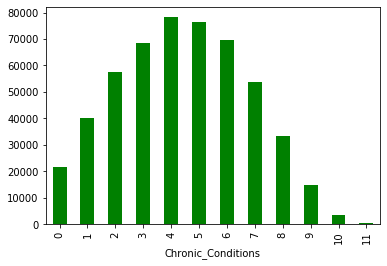

In [36]:
Merged_Outpatient['Chronic_Conditions'].sort_values(ascending=False).head(20)
Merged_Outpatient.groupby('Chronic_Conditions')['BeneID'].count().plot.bar(color = 'g')

In [37]:
Merged_Outpatient.groupby('BeneID')['Provider'].count().sort_values(ascending=False).head(10)

BeneID
BENE42721     29
BENE118316    29
BENE59303     27
BENE63544     27
BENE143400    27
BENE63504     27
BENE44241     26
BENE36330     26
BENE40202     25
BENE111593    25
Name: Provider, dtype: int64

In [38]:
Most_Visits = ['BENE42721', 'BENE118316','BENE59303', 'BENE63544', 'BENE143400', 'BENE63504','BENE44241','BENE36330' ,'BENE40202','BENE111593']

P_Most_Visits = Merged_Outpatient[Merged_Outpatient['BeneID'].isin(Most_Visits)]

P_Most_Visits2 = P_Most_Visits[['BeneID','Chronic_Conditions']]





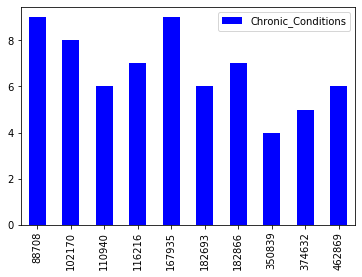

In [39]:
# Patients with most visits to providers Chronic Condition count
P_Most_Visits2.drop_duplicates(keep='first').plot.bar(color='b')

In [40]:
P_Most_Visits.sort_values_

AttributeError: 'DataFrame' object has no attribute 'sort_values_'

In [41]:
Merged_Outpatient['BeneID'].nunique()

133980

In [42]:
Merged_Inpatient['BeneID'].nunique()

31289

In [43]:
Merged_Outpatient.groupby('AttendingPhysician')['Provider'].nunique().sort_values(ascending=False)

AttendingPhysician
None         828
PHY342165      8
PHY365132      8
PHY417254      7
PHY429887      6
            ... 
PHY391678      1
PHY391677      1
PHY391675      1
PHY391674      1
PHY372676      1
Name: Provider, Length: 74110, dtype: int64

In [44]:
In_M_P = ['BENE126118','BENE83032','BENE55497','BENE104565','BENE55873','BENE43638','BENE117116','BENE92472','BENE49263']
Merged_Inpatient[Merged_Inpatient['BeneID'].isin(In_M_P)]

BeneID         DOB  Gender  Race RenalDiseaseIndicator  State  \
8823    BENE43638  1912-04-01       2     1                     0     24   
8824    BENE43638  1912-04-01       2     1                     0     24   
8825    BENE43638  1912-04-01       2     1                     0     24   
8826    BENE43638  1912-04-01       2     1                     0     24   
8827    BENE43638  1912-04-01       2     1                     0     24   
10379   BENE49263  1943-10-01       2     1                     Y     39   
10380   BENE49263  1943-10-01       2     1                     Y     39   
10381   BENE49263  1943-10-01       2     1                     Y     39   
10382   BENE49263  1943-10-01       2     1                     Y     39   
10383   BENE49263  1943-10-01       2     1                     Y     39   
10384   BENE49263  1943-10-01       2     1                     Y     39   
12043   BENE55497  1962-11-01       1     2                     0     33   
12044   BENE55497  1962-11-01       1     2                     0     33   
12045   BENE55497  1962-11-01       1     2                     0     33   
12046   BENE55497  1962-11-01       1     2                     0     33   
12047   BENE55497  1962-11-01       1     2                     0     33   
12155   BENE55873  1937-03-01       1     1                     Y     10   
12156   BENE55873  1937-03-01       1     1                     Y     10   
12157   BENE55873  1937-03-01       1     1                     Y     10   
12158   BENE55873  1937-03-01       1     1                     Y     10   
12159   BENE55873  1937-03-01       1     1                     Y     10   
12160   BENE55873  1937-03-01       1     1                     Y     10   
19674   BENE83032  1928-06-01       2     3                     Y      5   
19675   BENE83032  1928-06-01       2     3                     Y      5   
19676   BENE83032  1928-06-01       2     3                     Y      5   
19677   BENE83032  1928-06-01       2     3                     Y      5   
19678   BENE83032  1928-06-01       2     3                     Y      5   
19679   BENE83032  1928-06-01       2     3                     Y      5   
22250   BENE92472  1928-10-01       2     1                     Y     14   
22251   BENE92472  1928-10-01       2     1                     Y     14   
22252   BENE92472  1928-10-01       2     1                     Y     14   
22253   BENE92472  1928-10-01       2     1                     Y     14   
22254   BENE92472  1928-10-01       2     1                     Y     14   
25509  BENE104565  1979-08-01       1     1                     0     46   
25510  BENE104565  1979-08-01       1     1                     0     46   
25511  BENE104565  1979-08-01       1     1                     0     46   
25512  BENE104565  1979-08-01       1     1                     0     46   
25513  BENE104565  1979-08-01       1     1                     0     46   
28961  BENE117116  1950-12-01       2     1                     Y      4   
28962  BENE117116  1950-12-01       2     1                     Y      4   
28963  BENE117116  1950-12-01       2     1                     Y      4   
28964  BENE117116  1950-12-01       2     1                     Y      4   
28965  BENE117116  1950-12-01       2     1                     Y      4   
28966  BENE117116  1950-12-01       2     1                     Y      4   
28967  BENE117116  1950-12-01       2     1                     Y      4   
31459  BENE126118  1926-01-01       2     1                     0     39   
31460  BENE126118  1926-01-01       2     1                     0     39   
31461  BENE126118  1926-01-01       2     1                     0     39   
31462  BENE126118  1926-01-01       2     1                     0     39   
31463  BENE126118  1926-01-01       2     1                     0     39   

       County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
8823      260                   12                   12   
8824      260   

## Do the same providers provide both inpatient and outpatient services? Summarize your findings.

In [45]:
Out_Provider = Merged_Outpatient.Provider.unique().tolist()
In_Provider =  Merged_Inpatient.Provider.unique().tolist()

In [47]:
all_Provider = set(Out_Provider + In_Provider)
len(all_Provider)

5410

In [48]:
len(In_Provider)

2092

In [49]:
len(Out_Provider)

5012

In [50]:
7104 - 5410 # don't do this...listen to Suborna and Google

1694

In [51]:
Merged_Outpatient['DOB']

0         1936-09-01
1         1936-08-01
2         1936-08-01
3         1922-07-01
4         1922-07-01
             ...    
517732    1952-04-01
517733    1952-04-01
517734    1952-04-01
517735    1952-04-01
517736    1952-04-01
Name: DOB, Length: 517737, dtype: object

## In order to make sure the insurance premiums can cover the claims, the insurance company would need to categorize the patients according to their resource usage. In answering the question of what types of patients would make more outpatient visits, please provide your findings.


In [52]:
Merged_Outpatient['OPAnnualDeductibleAmt'].describe()

count    517737.000000
mean        659.109380
std        1005.505705
min           0.000000
25%         130.000000
50%         350.000000
75%         800.000000
max       13840.000000
Name: OPAnnualDeductibleAmt, dtype: float64

In [53]:
IP_Deductible = Merged_Outpatient[Merged_Outpatient['IPAnnualDeductibleAmt']> 0]

In [54]:
IP_Deductible['IPAnnualDeductibleAmt'].describe()

count    148472.000000
mean       1623.829409
std        1435.356258
min        1068.000000
25%        1068.000000
50%        1068.000000
75%        2136.000000
max       38272.000000
Name: IPAnnualDeductibleAmt, dtype: float64

In [55]:
Merged_Outpatient

BeneID         DOB  Gender  Race RenalDiseaseIndicator  State  \
0        BENE11002  1936-09-01       0     1                     0     39   
1        BENE11003  1936-08-01       1     1                     0     52   
2        BENE11003  1936-08-01       1     1                     0     52   
3        BENE11004  1922-07-01       1     1                     0     39   
4        BENE11004  1922-07-01       1     1                     0     39   
...            ...         ...     ...   ...                   ...    ...   
517732  BENE159198  1952-04-01       0     1                     0     21   
517733  BENE159198  1952-04-01       0     1                     0     21   
517734  BENE159198  1952-04-01       0     1                     0     21   
517735  BENE159198  1952-04-01       0     1                     0     21   
517736  BENE159198  1952-04-01       0     1                     0     21   

        County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0          280                   12                   12   
1          590                   12                   12   
2          590                   12                   12   
3          270                   12                   12   
4          270                   12                   12   
...        ...                  ...                  ...   
517732      20                   12                   12   
517733      20                   12                   12   
517734      20                   12                   12   
517735      20                   12                   12   
517736      20                   12                   12   

        ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0                           0                         0   
1                           1                         0   
2                           1                         0   
3                           1                         1   
4                           1                         1   
...                       ...                       ...   
517732                      1                         1   
517733                      1                         1   
517734                      1                         1   
517735                      1                         1   
517736                      1                         1   

        ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               0                   0   
...                           ...                 ...   
517732                          0                   0   
517733                          0                   0   
517734                          0                   0   
517735                          0                   0   
517736                          0                   0   

        ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0                                0                       0   
1                                0                       0   
2                                0                       0   
3                                0                       0   
4                                0                       0   
...                            ...                     ...   
517732                           0                       1   
517733                           0                       1   
517734                           0                       1   
517735                           0                       1   
517736                           0                       1   

        ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                          0                          0   
1                          0                          1   
2                          0                      

In [56]:
Merged_Outpatient['type'] = 'NA'

In [57]:
for i in range(len(Merged_Outpatient)):
    if Merged_Outpatient.iloc[i][21] > Merged_Outpatient.iloc[i][23]:
        Merged_Outpatient['type'][i] = 'In-Patient'
    else:
         Merged_Outpatient['type'][i] = 'Out-Patient'
    print(i)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144


3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808


5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482


6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154


8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793


10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
1044

11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
1185

13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13151
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13173
13174
13175
13176
13177
13178
13179
13180
13181
13182
13183
13184
13185
13186
13187
13188
13189
13190
13191
13192
13193
13194
13195
13196
13197
13198
13199
13200
13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
13224
13225
13226
13227
13228
13229
13230
13231
13232
13233
13234
13235
13236
13237
13238
13239
13240
13241
13242
13243
13244
13245
13246
13247
13248
1324

14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
14472
14473
14474
14475
14476
14477
14478
14479
14480
14481
14482
14483
14484
14485
14486
14487
14488
14489
14490
14491
14492
14493
14494
14495
14496
14497
14498
14499
14500
14501
14502
14503
14504
14505
14506
14507
14508
14509
14510
14511
14512
14513
14514
14515
14516
14517
14518
14519
14520
14521
14522
14523
14524
14525
14526
14527
14528
14529
14530
14531
14532
14533
14534
14535
14536
14537
14538
14539
14540
14541
14542
14543
14544
14545
14546
14547
14548
14549
14550
14551
14552
14553
14554
14555
14556
14557
14558
14559
14560
14561
14562
14563
14564
14565
14566
14567
14568
14569
14570
14571
14572
14573
14574
14575
14576
14577
14578
14579
14580
14581
14582
14583
14584
14585
14586
14587
14588
14589
14590
14591
14592
14593
14594
14595
14596
14597
14598
14599
14600
14601
14602
14603
14604
14605
14606
14607
14608
14609
14610
14611
14612
14613
14614
14615
14616
14617
14618
14619
14620
14621
1462

15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
15958
15959
15960
15961
15962
15963
15964
15965
15966
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
15993
15994
15995
15996
15997
15998
15999
16000
16001
16002
16003
16004
16005
16006
16007
16008
16009
16010
16011
16012
16013
16014
16015
16016
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16027
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
1604

17260
17261
17262
17263
17264
17265
17266
17267
17268
17269
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17295
17296
17297
17298
17299
17300
17301
17302
17303
17304
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17358
17359
17360
17361
17362
17363
17364
17365
17366
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17393
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17408
17409
17410
17411
17412
17413
17414
17415
17416
17417
17418
17419
17420
17421
17422
17423
17424
17425
1742

18627
18628
18629
18630
18631
18632
18633
18634
18635
18636
18637
18638
18639
18640
18641
18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
18654
18655
18656
18657
18658
18659
18660
18661
18662
18663
18664
18665
18666
18667
18668
18669
18670
18671
18672
18673
18674
18675
18676
18677
18678
18679
18680
18681
18682
18683
18684
18685
18686
18687
18688
18689
18690
18691
18692
18693
18694
18695
18696
18697
18698
18699
18700
18701
18702
18703
18704
18705
18706
18707
18708
18709
18710
18711
18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18723
18724
18725
18726
18727
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18739
18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
18764
18765
18766
18767
18768
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18782
18783
18784
18785
18786
18787
18788
18789
18790
18791
18792
1879

20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
20147
20148
20149
20150
20151
20152
20153
20154
20155
20156
20157
20158
20159
20160
20161
20162
20163
20164
20165
20166
20167
20168
20169
20170
20171
20172
20173
20174
20175
20176
20177
20178
20179
20180
20181
20182
20183
20184
20185
20186
20187
20188
20189
20190
20191
20192
20193
20194
20195
20196
20197
20198
2019

21461
21462
21463
21464
21465
21466
21467
21468
21469
21470
21471
21472
21473
21474
21475
21476
21477
21478
21479
21480
21481
21482
21483
21484
21485
21486
21487
21488
21489
21490
21491
21492
21493
21494
21495
21496
21497
21498
21499
21500
21501
21502
21503
21504
21505
21506
21507
21508
21509
21510
21511
21512
21513
21514
21515
21516
21517
21518
21519
21520
21521
21522
21523
21524
21525
21526
21527
21528
21529
21530
21531
21532
21533
21534
21535
21536
21537
21538
21539
21540
21541
21542
21543
21544
21545
21546
21547
21548
21549
21550
21551
21552
21553
21554
21555
21556
21557
21558
21559
21560
21561
21562
21563
21564
21565
21566
21567
21568
21569
21570
21571
21572
21573
21574
21575
21576
21577
21578
21579
21580
21581
21582
21583
21584
21585
21586
21587
21588
21589
21590
21591
21592
21593
21594
21595
21596
21597
21598
21599
21600
21601
21602
21603
21604
21605
21606
21607
21608
21609
21610
21611
21612
21613
21614
21615
21616
21617
21618
21619
21620
21621
21622
21623
21624
21625
21626
2162

22856
22857
22858
22859
22860
22861
22862
22863
22864
22865
22866
22867
22868
22869
22870
22871
22872
22873
22874
22875
22876
22877
22878
22879
22880
22881
22882
22883
22884
22885
22886
22887
22888
22889
22890
22891
22892
22893
22894
22895
22896
22897
22898
22899
22900
22901
22902
22903
22904
22905
22906
22907
22908
22909
22910
22911
22912
22913
22914
22915
22916
22917
22918
22919
22920
22921
22922
22923
22924
22925
22926
22927
22928
22929
22930
22931
22932
22933
22934
22935
22936
22937
22938
22939
22940
22941
22942
22943
22944
22945
22946
22947
22948
22949
22950
22951
22952
22953
22954
22955
22956
22957
22958
22959
22960
22961
22962
22963
22964
22965
22966
22967
22968
22969
22970
22971
22972
22973
22974
22975
22976
22977
22978
22979
22980
22981
22982
22983
22984
22985
22986
22987
22988
22989
22990
22991
22992
22993
22994
22995
22996
22997
22998
22999
23000
23001
23002
23003
23004
23005
23006
23007
23008
23009
23010
23011
23012
23013
23014
23015
23016
23017
23018
23019
23020
23021
2302

24236
24237
24238
24239
24240
24241
24242
24243
24244
24245
24246
24247
24248
24249
24250
24251
24252
24253
24254
24255
24256
24257
24258
24259
24260
24261
24262
24263
24264
24265
24266
24267
24268
24269
24270
24271
24272
24273
24274
24275
24276
24277
24278
24279
24280
24281
24282
24283
24284
24285
24286
24287
24288
24289
24290
24291
24292
24293
24294
24295
24296
24297
24298
24299
24300
24301
24302
24303
24304
24305
24306
24307
24308
24309
24310
24311
24312
24313
24314
24315
24316
24317
24318
24319
24320
24321
24322
24323
24324
24325
24326
24327
24328
24329
24330
24331
24332
24333
24334
24335
24336
24337
24338
24339
24340
24341
24342
24343
24344
24345
24346
24347
24348
24349
24350
24351
24352
24353
24354
24355
24356
24357
24358
24359
24360
24361
24362
24363
24364
24365
24366
24367
24368
24369
24370
24371
24372
24373
24374
24375
24376
24377
24378
24379
24380
24381
24382
24383
24384
24385
24386
24387
24388
24389
24390
24391
24392
24393
24394
24395
24396
24397
24398
24399
24400
24401
2440

25636
25637
25638
25639
25640
25641
25642
25643
25644
25645
25646
25647
25648
25649
25650
25651
25652
25653
25654
25655
25656
25657
25658
25659
25660
25661
25662
25663
25664
25665
25666
25667
25668
25669
25670
25671
25672
25673
25674
25675
25676
25677
25678
25679
25680
25681
25682
25683
25684
25685
25686
25687
25688
25689
25690
25691
25692
25693
25694
25695
25696
25697
25698
25699
25700
25701
25702
25703
25704
25705
25706
25707
25708
25709
25710
25711
25712
25713
25714
25715
25716
25717
25718
25719
25720
25721
25722
25723
25724
25725
25726
25727
25728
25729
25730
25731
25732
25733
25734
25735
25736
25737
25738
25739
25740
25741
25742
25743
25744
25745
25746
25747
25748
25749
25750
25751
25752
25753
25754
25755
25756
25757
25758
25759
25760
25761
25762
25763
25764
25765
25766
25767
25768
25769
25770
25771
25772
25773
25774
25775
25776
25777
25778
25779
25780
25781
25782
25783
25784
25785
25786
25787
25788
25789
25790
25791
25792
25793
25794
25795
25796
25797
25798
25799
25800
25801
2580

27032
27033
27034
27035
27036
27037
27038
27039
27040
27041
27042
27043
27044
27045
27046
27047
27048
27049
27050
27051
27052
27053
27054
27055
27056
27057
27058
27059
27060
27061
27062
27063
27064
27065
27066
27067
27068
27069
27070
27071
27072
27073
27074
27075
27076
27077
27078
27079
27080
27081
27082
27083
27084
27085
27086
27087
27088
27089
27090
27091
27092
27093
27094
27095
27096
27097
27098
27099
27100
27101
27102
27103
27104
27105
27106
27107
27108
27109
27110
27111
27112
27113
27114
27115
27116
27117
27118
27119
27120
27121
27122
27123
27124
27125
27126
27127
27128
27129
27130
27131
27132
27133
27134
27135
27136
27137
27138
27139
27140
27141
27142
27143
27144
27145
27146
27147
27148
27149
27150
27151
27152
27153
27154
27155
27156
27157
27158
27159
27160
27161
27162
27163
27164
27165
27166
27167
27168
27169
27170
27171
27172
27173
27174
27175
27176
27177
27178
27179
27180
27181
27182
27183
27184
27185
27186
27187
27188
27189
27190
27191
27192
27193
27194
27195
27196
27197
2719

28408
28409
28410
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
28430
28431
28432
28433
28434
28435
28436
28437
28438
28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
28480
28481
28482
28483
28484
28485
28486
28487
28488
28489
28490
28491
28492
28493
28494
28495
28496
28497
28498
28499
28500
28501
28502
28503
28504
28505
28506
28507
28508
28509
28510
28511
28512
28513
28514
28515
28516
28517
28518
28519
28520
28521
28522
28523
28524
28525
28526
28527
28528
28529
28530
28531
28532
28533
28534
28535
28536
28537
28538
28539
28540
28541
28542
28543
28544
28545
28546
28547
28548
28549
28550
28551
28552
28553
28554
28555
28556
28557
28558
28559
28560
28561
28562
28563
28564
28565
28566
28567
28568
28569
28570
28571
28572
28573
2857

29826
29827
29828
29829
29830
29831
29832
29833
29834
29835
29836
29837
29838
29839
29840
29841
29842
29843
29844
29845
29846
29847
29848
29849
29850
29851
29852
29853
29854
29855
29856
29857
29858
29859
29860
29861
29862
29863
29864
29865
29866
29867
29868
29869
29870
29871
29872
29873
29874
29875
29876
29877
29878
29879
29880
29881
29882
29883
29884
29885
29886
29887
29888
29889
29890
29891
29892
29893
29894
29895
29896
29897
29898
29899
29900
29901
29902
29903
29904
29905
29906
29907
29908
29909
29910
29911
29912
29913
29914
29915
29916
29917
29918
29919
29920
29921
29922
29923
29924
29925
29926
29927
29928
29929
29930
29931
29932
29933
29934
29935
29936
29937
29938
29939
29940
29941
29942
29943
29944
29945
29946
29947
29948
29949
29950
29951
29952
29953
29954
29955
29956
29957
29958
29959
29960
29961
29962
29963
29964
29965
29966
29967
29968
29969
29970
29971
29972
29973
29974
29975
29976
29977
29978
29979
29980
29981
29982
29983
29984
29985
29986
29987
29988
29989
29990
29991
2999

31212
31213
31214
31215
31216
31217
31218
31219
31220
31221
31222
31223
31224
31225
31226
31227
31228
31229
31230
31231
31232
31233
31234
31235
31236
31237
31238
31239
31240
31241
31242
31243
31244
31245
31246
31247
31248
31249
31250
31251
31252
31253
31254
31255
31256
31257
31258
31259
31260
31261
31262
31263
31264
31265
31266
31267
31268
31269
31270
31271
31272
31273
31274
31275
31276
31277
31278
31279
31280
31281
31282
31283
31284
31285
31286
31287
31288
31289
31290
31291
31292
31293
31294
31295
31296
31297
31298
31299
31300
31301
31302
31303
31304
31305
31306
31307
31308
31309
31310
31311
31312
31313
31314
31315
31316
31317
31318
31319
31320
31321
31322
31323
31324
31325
31326
31327
31328
31329
31330
31331
31332
31333
31334
31335
31336
31337
31338
31339
31340
31341
31342
31343
31344
31345
31346
31347
31348
31349
31350
31351
31352
31353
31354
31355
31356
31357
31358
31359
31360
31361
31362
31363
31364
31365
31366
31367
31368
31369
31370
31371
31372
31373
31374
31375
31376
31377
3137

32592
32593
32594
32595
32596
32597
32598
32599
32600
32601
32602
32603
32604
32605
32606
32607
32608
32609
32610
32611
32612
32613
32614
32615
32616
32617
32618
32619
32620
32621
32622
32623
32624
32625
32626
32627
32628
32629
32630
32631
32632
32633
32634
32635
32636
32637
32638
32639
32640
32641
32642
32643
32644
32645
32646
32647
32648
32649
32650
32651
32652
32653
32654
32655
32656
32657
32658
32659
32660
32661
32662
32663
32664
32665
32666
32667
32668
32669
32670
32671
32672
32673
32674
32675
32676
32677
32678
32679
32680
32681
32682
32683
32684
32685
32686
32687
32688
32689
32690
32691
32692
32693
32694
32695
32696
32697
32698
32699
32700
32701
32702
32703
32704
32705
32706
32707
32708
32709
32710
32711
32712
32713
32714
32715
32716
32717
32718
32719
32720
32721
32722
32723
32724
32725
32726
32727
32728
32729
32730
32731
32732
32733
32734
32735
32736
32737
32738
32739
32740
32741
32742
32743
32744
32745
32746
32747
32748
32749
32750
32751
32752
32753
32754
32755
32756
32757
3275

33981
33982
33983
33984
33985
33986
33987
33988
33989
33990
33991
33992
33993
33994
33995
33996
33997
33998
33999
34000
34001
34002
34003
34004
34005
34006
34007
34008
34009
34010
34011
34012
34013
34014
34015
34016
34017
34018
34019
34020
34021
34022
34023
34024
34025
34026
34027
34028
34029
34030
34031
34032
34033
34034
34035
34036
34037
34038
34039
34040
34041
34042
34043
34044
34045
34046
34047
34048
34049
34050
34051
34052
34053
34054
34055
34056
34057
34058
34059
34060
34061
34062
34063
34064
34065
34066
34067
34068
34069
34070
34071
34072
34073
34074
34075
34076
34077
34078
34079
34080
34081
34082
34083
34084
34085
34086
34087
34088
34089
34090
34091
34092
34093
34094
34095
34096
34097
34098
34099
34100
34101
34102
34103
34104
34105
34106
34107
34108
34109
34110
34111
34112
34113
34114
34115
34116
34117
34118
34119
34120
34121
34122
34123
34124
34125
34126
34127
34128
34129
34130
34131
34132
34133
34134
34135
34136
34137
34138
34139
34140
34141
34142
34143
34144
34145
34146
3414

35381
35382
35383
35384
35385
35386
35387
35388
35389
35390
35391
35392
35393
35394
35395
35396
35397
35398
35399
35400
35401
35402
35403
35404
35405
35406
35407
35408
35409
35410
35411
35412
35413
35414
35415
35416
35417
35418
35419
35420
35421
35422
35423
35424
35425
35426
35427
35428
35429
35430
35431
35432
35433
35434
35435
35436
35437
35438
35439
35440
35441
35442
35443
35444
35445
35446
35447
35448
35449
35450
35451
35452
35453
35454
35455
35456
35457
35458
35459
35460
35461
35462
35463
35464
35465
35466
35467
35468
35469
35470
35471
35472
35473
35474
35475
35476
35477
35478
35479
35480
35481
35482
35483
35484
35485
35486
35487
35488
35489
35490
35491
35492
35493
35494
35495
35496
35497
35498
35499
35500
35501
35502
35503
35504
35505
35506
35507
35508
35509
35510
35511
35512
35513
35514
35515
35516
35517
35518
35519
35520
35521
35522
35523
35524
35525
35526
35527
35528
35529
35530
35531
35532
35533
35534
35535
35536
35537
35538
35539
35540
35541
35542
35543
35544
35545
35546
3554

36826
36827
36828
36829
36830
36831
36832
36833
36834
36835
36836
36837
36838
36839
36840
36841
36842
36843
36844
36845
36846
36847
36848
36849
36850
36851
36852
36853
36854
36855
36856
36857
36858
36859
36860
36861
36862
36863
36864
36865
36866
36867
36868
36869
36870
36871
36872
36873
36874
36875
36876
36877
36878
36879
36880
36881
36882
36883
36884
36885
36886
36887
36888
36889
36890
36891
36892
36893
36894
36895
36896
36897
36898
36899
36900
36901
36902
36903
36904
36905
36906
36907
36908
36909
36910
36911
36912
36913
36914
36915
36916
36917
36918
36919
36920
36921
36922
36923
36924
36925
36926
36927
36928
36929
36930
36931
36932
36933
36934
36935
36936
36937
36938
36939
36940
36941
36942
36943
36944
36945
36946
36947
36948
36949
36950
36951
36952
36953
36954
36955
36956
36957
36958
36959
36960
36961
36962
36963
36964
36965
36966
36967
36968
36969
36970
36971
36972
36973
36974
36975
36976
36977
36978
36979
36980
36981
36982
36983
36984
36985
36986
36987
36988
36989
36990
36991
3699

38228
38229
38230
38231
38232
38233
38234
38235
38236
38237
38238
38239
38240
38241
38242
38243
38244
38245
38246
38247
38248
38249
38250
38251
38252
38253
38254
38255
38256
38257
38258
38259
38260
38261
38262
38263
38264
38265
38266
38267
38268
38269
38270
38271
38272
38273
38274
38275
38276
38277
38278
38279
38280
38281
38282
38283
38284
38285
38286
38287
38288
38289
38290
38291
38292
38293
38294
38295
38296
38297
38298
38299
38300
38301
38302
38303
38304
38305
38306
38307
38308
38309
38310
38311
38312
38313
38314
38315
38316
38317
38318
38319
38320
38321
38322
38323
38324
38325
38326
38327
38328
38329
38330
38331
38332
38333
38334
38335
38336
38337
38338
38339
38340
38341
38342
38343
38344
38345
38346
38347
38348
38349
38350
38351
38352
38353
38354
38355
38356
38357
38358
38359
38360
38361
38362
38363
38364
38365
38366
38367
38368
38369
38370
38371
38372
38373
38374
38375
38376
38377
38378
38379
38380
38381
38382
38383
38384
38385
38386
38387
38388
38389
38390
38391
38392
38393
3839

39662
39663
39664
39665
39666
39667
39668
39669
39670
39671
39672
39673
39674
39675
39676
39677
39678
39679
39680
39681
39682
39683
39684
39685
39686
39687
39688
39689
39690
39691
39692
39693
39694
39695
39696
39697
39698
39699
39700
39701
39702
39703
39704
39705
39706
39707
39708
39709
39710
39711
39712
39713
39714
39715
39716
39717
39718
39719
39720
39721
39722
39723
39724
39725
39726
39727
39728
39729
39730
39731
39732
39733
39734
39735
39736
39737
39738
39739
39740
39741
39742
39743
39744
39745
39746
39747
39748
39749
39750
39751
39752
39753
39754
39755
39756
39757
39758
39759
39760
39761
39762
39763
39764
39765
39766
39767
39768
39769
39770
39771
39772
39773
39774
39775
39776
39777
39778
39779
39780
39781
39782
39783
39784
39785
39786
39787
39788
39789
39790
39791
39792
39793
39794
39795
39796
39797
39798
39799
39800
39801
39802
39803
39804
39805
39806
39807
39808
39809
39810
39811
39812
39813
39814
39815
39816
39817
39818
39819
39820
39821
39822
39823
39824
39825
39826
39827
3982

41051
41052
41053
41054
41055
41056
41057
41058
41059
41060
41061
41062
41063
41064
41065
41066
41067
41068
41069
41070
41071
41072
41073
41074
41075
41076
41077
41078
41079
41080
41081
41082
41083
41084
41085
41086
41087
41088
41089
41090
41091
41092
41093
41094
41095
41096
41097
41098
41099
41100
41101
41102
41103
41104
41105
41106
41107
41108
41109
41110
41111
41112
41113
41114
41115
41116
41117
41118
41119
41120
41121
41122
41123
41124
41125
41126
41127
41128
41129
41130
41131
41132
41133
41134
41135
41136
41137
41138
41139
41140
41141
41142
41143
41144
41145
41146
41147
41148
41149
41150
41151
41152
41153
41154
41155
41156
41157
41158
41159
41160
41161
41162
41163
41164
41165
41166
41167
41168
41169
41170
41171
41172
41173
41174
41175
41176
41177
41178
41179
41180
41181
41182
41183
41184
41185
41186
41187
41188
41189
41190
41191
41192
41193
41194
41195
41196
41197
41198
41199
41200
41201
41202
41203
41204
41205
41206
41207
41208
41209
41210
41211
41212
41213
41214
41215
41216
4121

42423
42424
42425
42426
42427
42428
42429
42430
42431
42432
42433
42434
42435
42436
42437
42438
42439
42440
42441
42442
42443
42444
42445
42446
42447
42448
42449
42450
42451
42452
42453
42454
42455
42456
42457
42458
42459
42460
42461
42462
42463
42464
42465
42466
42467
42468
42469
42470
42471
42472
42473
42474
42475
42476
42477
42478
42479
42480
42481
42482
42483
42484
42485
42486
42487
42488
42489
42490
42491
42492
42493
42494
42495
42496
42497
42498
42499
42500
42501
42502
42503
42504
42505
42506
42507
42508
42509
42510
42511
42512
42513
42514
42515
42516
42517
42518
42519
42520
42521
42522
42523
42524
42525
42526
42527
42528
42529
42530
42531
42532
42533
42534
42535
42536
42537
42538
42539
42540
42541
42542
42543
42544
42545
42546
42547
42548
42549
42550
42551
42552
42553
42554
42555
42556
42557
42558
42559
42560
42561
42562
42563
42564
42565
42566
42567
42568
42569
42570
42571
42572
42573
42574
42575
42576
42577
42578
42579
42580
42581
42582
42583
42584
42585
42586
42587
42588
4258

43857
43858
43859
43860
43861
43862
43863
43864
43865
43866
43867
43868
43869
43870
43871
43872
43873
43874
43875
43876
43877
43878
43879
43880
43881
43882
43883
43884
43885
43886
43887
43888
43889
43890
43891
43892
43893
43894
43895
43896
43897
43898
43899
43900
43901
43902
43903
43904
43905
43906
43907
43908
43909
43910
43911
43912
43913
43914
43915
43916
43917
43918
43919
43920
43921
43922
43923
43924
43925
43926
43927
43928
43929
43930
43931
43932
43933
43934
43935
43936
43937
43938
43939
43940
43941
43942
43943
43944
43945
43946
43947
43948
43949
43950
43951
43952
43953
43954
43955
43956
43957
43958
43959
43960
43961
43962
43963
43964
43965
43966
43967
43968
43969
43970
43971
43972
43973
43974
43975
43976
43977
43978
43979
43980
43981
43982
43983
43984
43985
43986
43987
43988
43989
43990
43991
43992
43993
43994
43995
43996
43997
43998
43999
44000
44001
44002
44003
44004
44005
44006
44007
44008
44009
44010
44011
44012
44013
44014
44015
44016
44017
44018
44019
44020
44021
44022
4402

45281
45282
45283
45284
45285
45286
45287
45288
45289
45290
45291
45292
45293
45294
45295
45296
45297
45298
45299
45300
45301
45302
45303
45304
45305
45306
45307
45308
45309
45310
45311
45312
45313
45314
45315
45316
45317
45318
45319
45320
45321
45322
45323
45324
45325
45326
45327
45328
45329
45330
45331
45332
45333
45334
45335
45336
45337
45338
45339
45340
45341
45342
45343
45344
45345
45346
45347
45348
45349
45350
45351
45352
45353
45354
45355
45356
45357
45358
45359
45360
45361
45362
45363
45364
45365
45366
45367
45368
45369
45370
45371
45372
45373
45374
45375
45376
45377
45378
45379
45380
45381
45382
45383
45384
45385
45386
45387
45388
45389
45390
45391
45392
45393
45394
45395
45396
45397
45398
45399
45400
45401
45402
45403
45404
45405
45406
45407
45408
45409
45410
45411
45412
45413
45414
45415
45416
45417
45418
45419
45420
45421
45422
45423
45424
45425
45426
45427
45428
45429
45430
45431
45432
45433
45434
45435
45436
45437
45438
45439
45440
45441
45442
45443
45444
45445
45446
4544

46680
46681
46682
46683
46684
46685
46686
46687
46688
46689
46690
46691
46692
46693
46694
46695
46696
46697
46698
46699
46700
46701
46702
46703
46704
46705
46706
46707
46708
46709
46710
46711
46712
46713
46714
46715
46716
46717
46718
46719
46720
46721
46722
46723
46724
46725
46726
46727
46728
46729
46730
46731
46732
46733
46734
46735
46736
46737
46738
46739
46740
46741
46742
46743
46744
46745
46746
46747
46748
46749
46750
46751
46752
46753
46754
46755
46756
46757
46758
46759
46760
46761
46762
46763
46764
46765
46766
46767
46768
46769
46770
46771
46772
46773
46774
46775
46776
46777
46778
46779
46780
46781
46782
46783
46784
46785
46786
46787
46788
46789
46790
46791
46792
46793
46794
46795
46796
46797
46798
46799
46800
46801
46802
46803
46804
46805
46806
46807
46808
46809
46810
46811
46812
46813
46814
46815
46816
46817
46818
46819
46820
46821
46822
46823
46824
46825
46826
46827
46828
46829
46830
46831
46832
46833
46834
46835
46836
46837
46838
46839
46840
46841
46842
46843
46844
46845
4684

48126
48127
48128
48129
48130
48131
48132
48133
48134
48135
48136
48137
48138
48139
48140
48141
48142
48143
48144
48145
48146
48147
48148
48149
48150
48151
48152
48153
48154
48155
48156
48157
48158
48159
48160
48161
48162
48163
48164
48165
48166
48167
48168
48169
48170
48171
48172
48173
48174
48175
48176
48177
48178
48179
48180
48181
48182
48183
48184
48185
48186
48187
48188
48189
48190
48191
48192
48193
48194
48195
48196
48197
48198
48199
48200
48201
48202
48203
48204
48205
48206
48207
48208
48209
48210
48211
48212
48213
48214
48215
48216
48217
48218
48219
48220
48221
48222
48223
48224
48225
48226
48227
48228
48229
48230
48231
48232
48233
48234
48235
48236
48237
48238
48239
48240
48241
48242
48243
48244
48245
48246
48247
48248
48249
48250
48251
48252
48253
48254
48255
48256
48257
48258
48259
48260
48261
48262
48263
48264
48265
48266
48267
48268
48269
48270
48271
48272
48273
48274
48275
48276
48277
48278
48279
48280
48281
48282
48283
48284
48285
48286
48287
48288
48289
48290
48291
4829

49517
49518
49519
49520
49521
49522
49523
49524
49525
49526
49527
49528
49529
49530
49531
49532
49533
49534
49535
49536
49537
49538
49539
49540
49541
49542
49543
49544
49545
49546
49547
49548
49549
49550
49551
49552
49553
49554
49555
49556
49557
49558
49559
49560
49561
49562
49563
49564
49565
49566
49567
49568
49569
49570
49571
49572
49573
49574
49575
49576
49577
49578
49579
49580
49581
49582
49583
49584
49585
49586
49587
49588
49589
49590
49591
49592
49593
49594
49595
49596
49597
49598
49599
49600
49601
49602
49603
49604
49605
49606
49607
49608
49609
49610
49611
49612
49613
49614
49615
49616
49617
49618
49619
49620
49621
49622
49623
49624
49625
49626
49627
49628
49629
49630
49631
49632
49633
49634
49635
49636
49637
49638
49639
49640
49641
49642
49643
49644
49645
49646
49647
49648
49649
49650
49651
49652
49653
49654
49655
49656
49657
49658
49659
49660
49661
49662
49663
49664
49665
49666
49667
49668
49669
49670
49671
49672
49673
49674
49675
49676
49677
49678
49679
49680
49681
49682
4968

50906
50907
50908
50909
50910
50911
50912
50913
50914
50915
50916
50917
50918
50919
50920
50921
50922
50923
50924
50925
50926
50927
50928
50929
50930
50931
50932
50933
50934
50935
50936
50937
50938
50939
50940
50941
50942
50943
50944
50945
50946
50947
50948
50949
50950
50951
50952
50953
50954
50955
50956
50957
50958
50959
50960
50961
50962
50963
50964
50965
50966
50967
50968
50969
50970
50971
50972
50973
50974
50975
50976
50977
50978
50979
50980
50981
50982
50983
50984
50985
50986
50987
50988
50989
50990
50991
50992
50993
50994
50995
50996
50997
50998
50999
51000
51001
51002
51003
51004
51005
51006
51007
51008
51009
51010
51011
51012
51013
51014
51015
51016
51017
51018
51019
51020
51021
51022
51023
51024
51025
51026
51027
51028
51029
51030
51031
51032
51033
51034
51035
51036
51037
51038
51039
51040
51041
51042
51043
51044
51045
51046
51047
51048
51049
51050
51051
51052
51053
51054
51055
51056
51057
51058
51059
51060
51061
51062
51063
51064
51065
51066
51067
51068
51069
51070
51071
5107

52343
52344
52345
52346
52347
52348
52349
52350
52351
52352
52353
52354
52355
52356
52357
52358
52359
52360
52361
52362
52363
52364
52365
52366
52367
52368
52369
52370
52371
52372
52373
52374
52375
52376
52377
52378
52379
52380
52381
52382
52383
52384
52385
52386
52387
52388
52389
52390
52391
52392
52393
52394
52395
52396
52397
52398
52399
52400
52401
52402
52403
52404
52405
52406
52407
52408
52409
52410
52411
52412
52413
52414
52415
52416
52417
52418
52419
52420
52421
52422
52423
52424
52425
52426
52427
52428
52429
52430
52431
52432
52433
52434
52435
52436
52437
52438
52439
52440
52441
52442
52443
52444
52445
52446
52447
52448
52449
52450
52451
52452
52453
52454
52455
52456
52457
52458
52459
52460
52461
52462
52463
52464
52465
52466
52467
52468
52469
52470
52471
52472
52473
52474
52475
52476
52477
52478
52479
52480
52481
52482
52483
52484
52485
52486
52487
52488
52489
52490
52491
52492
52493
52494
52495
52496
52497
52498
52499
52500
52501
52502
52503
52504
52505
52506
52507
52508
5250

53757
53758
53759
53760
53761
53762
53763
53764
53765
53766
53767
53768
53769
53770
53771
53772
53773
53774
53775
53776
53777
53778
53779
53780
53781
53782
53783
53784
53785
53786
53787
53788
53789
53790
53791
53792
53793
53794
53795
53796
53797
53798
53799
53800
53801
53802
53803
53804
53805
53806
53807
53808
53809
53810
53811
53812
53813
53814
53815
53816
53817
53818
53819
53820
53821
53822
53823
53824
53825
53826
53827
53828
53829
53830
53831
53832
53833
53834
53835
53836
53837
53838
53839
53840
53841
53842
53843
53844
53845
53846
53847
53848
53849
53850
53851
53852
53853
53854
53855
53856
53857
53858
53859
53860
53861
53862
53863
53864
53865
53866
53867
53868
53869
53870
53871
53872
53873
53874
53875
53876
53877
53878
53879
53880
53881
53882
53883
53884
53885
53886
53887
53888
53889
53890
53891
53892
53893
53894
53895
53896
53897
53898
53899
53900
53901
53902
53903
53904
53905
53906
53907
53908
53909
53910
53911
53912
53913
53914
53915
53916
53917
53918
53919
53920
53921
53922
5392

55200
55201
55202
55203
55204
55205
55206
55207
55208
55209
55210
55211
55212
55213
55214
55215
55216
55217
55218
55219
55220
55221
55222
55223
55224
55225
55226
55227
55228
55229
55230
55231
55232
55233
55234
55235
55236
55237
55238
55239
55240
55241
55242
55243
55244
55245
55246
55247
55248
55249
55250
55251
55252
55253
55254
55255
55256
55257
55258
55259
55260
55261
55262
55263
55264
55265
55266
55267
55268
55269
55270
55271
55272
55273
55274
55275
55276
55277
55278
55279
55280
55281
55282
55283
55284
55285
55286
55287
55288
55289
55290
55291
55292
55293
55294
55295
55296
55297
55298
55299
55300
55301
55302
55303
55304
55305
55306
55307
55308
55309
55310
55311
55312
55313
55314
55315
55316
55317
55318
55319
55320
55321
55322
55323
55324
55325
55326
55327
55328
55329
55330
55331
55332
55333
55334
55335
55336
55337
55338
55339
55340
55341
55342
55343
55344
55345
55346
55347
55348
55349
55350
55351
55352
55353
55354
55355
55356
55357
55358
55359
55360
55361
55362
55363
55364
55365
5536

56595
56596
56597
56598
56599
56600
56601
56602
56603
56604
56605
56606
56607
56608
56609
56610
56611
56612
56613
56614
56615
56616
56617
56618
56619
56620
56621
56622
56623
56624
56625
56626
56627
56628
56629
56630
56631
56632
56633
56634
56635
56636
56637
56638
56639
56640
56641
56642
56643
56644
56645
56646
56647
56648
56649
56650
56651
56652
56653
56654
56655
56656
56657
56658
56659
56660
56661
56662
56663
56664
56665
56666
56667
56668
56669
56670
56671
56672
56673
56674
56675
56676
56677
56678
56679
56680
56681
56682
56683
56684
56685
56686
56687
56688
56689
56690
56691
56692
56693
56694
56695
56696
56697
56698
56699
56700
56701
56702
56703
56704
56705
56706
56707
56708
56709
56710
56711
56712
56713
56714
56715
56716
56717
56718
56719
56720
56721
56722
56723
56724
56725
56726
56727
56728
56729
56730
56731
56732
56733
56734
56735
56736
56737
56738
56739
56740
56741
56742
56743
56744
56745
56746
56747
56748
56749
56750
56751
56752
56753
56754
56755
56756
56757
56758
56759
56760
5676

58006
58007
58008
58009
58010
58011
58012
58013
58014
58015
58016
58017
58018
58019
58020
58021
58022
58023
58024
58025
58026
58027
58028
58029
58030
58031
58032
58033
58034
58035
58036
58037
58038
58039
58040
58041
58042
58043
58044
58045
58046
58047
58048
58049
58050
58051
58052
58053
58054
58055
58056
58057
58058
58059
58060
58061
58062
58063
58064
58065
58066
58067
58068
58069
58070
58071
58072
58073
58074
58075
58076
58077
58078
58079
58080
58081
58082
58083
58084
58085
58086
58087
58088
58089
58090
58091
58092
58093
58094
58095
58096
58097
58098
58099
58100
58101
58102
58103
58104
58105
58106
58107
58108
58109
58110
58111
58112
58113
58114
58115
58116
58117
58118
58119
58120
58121
58122
58123
58124
58125
58126
58127
58128
58129
58130
58131
58132
58133
58134
58135
58136
58137
58138
58139
58140
58141
58142
58143
58144
58145
58146
58147
58148
58149
58150
58151
58152
58153
58154
58155
58156
58157
58158
58159
58160
58161
58162
58163
58164
58165
58166
58167
58168
58169
58170
58171
5817

59454
59455
59456
59457
59458
59459
59460
59461
59462
59463
59464
59465
59466
59467
59468
59469
59470
59471
59472
59473
59474
59475
59476
59477
59478
59479
59480
59481
59482
59483
59484
59485
59486
59487
59488
59489
59490
59491
59492
59493
59494
59495
59496
59497
59498
59499
59500
59501
59502
59503
59504
59505
59506
59507
59508
59509
59510
59511
59512
59513
59514
59515
59516
59517
59518
59519
59520
59521
59522
59523
59524
59525
59526
59527
59528
59529
59530
59531
59532
59533
59534
59535
59536
59537
59538
59539
59540
59541
59542
59543
59544
59545
59546
59547
59548
59549
59550
59551
59552
59553
59554
59555
59556
59557
59558
59559
59560
59561
59562
59563
59564
59565
59566
59567
59568
59569
59570
59571
59572
59573
59574
59575
59576
59577
59578
59579
59580
59581
59582
59583
59584
59585
59586
59587
59588
59589
59590
59591
59592
59593
59594
59595
59596
59597
59598
59599
59600
59601
59602
59603
59604
59605
59606
59607
59608
59609
59610
59611
59612
59613
59614
59615
59616
59617
59618
59619
5962

60826
60827
60828
60829
60830
60831
60832
60833
60834
60835
60836
60837
60838
60839
60840
60841
60842
60843
60844
60845
60846
60847
60848
60849
60850
60851
60852
60853
60854
60855
60856
60857
60858
60859
60860
60861
60862
60863
60864
60865
60866
60867
60868
60869
60870
60871
60872
60873
60874
60875
60876
60877
60878
60879
60880
60881
60882
60883
60884
60885
60886
60887
60888
60889
60890
60891
60892
60893
60894
60895
60896
60897
60898
60899
60900
60901
60902
60903
60904
60905
60906
60907
60908
60909
60910
60911
60912
60913
60914
60915
60916
60917
60918
60919
60920
60921
60922
60923
60924
60925
60926
60927
60928
60929
60930
60931
60932
60933
60934
60935
60936
60937
60938
60939
60940
60941
60942
60943
60944
60945
60946
60947
60948
60949
60950
60951
60952
60953
60954
60955
60956
60957
60958
60959
60960
60961
60962
60963
60964
60965
60966
60967
60968
60969
60970
60971
60972
60973
60974
60975
60976
60977
60978
60979
60980
60981
60982
60983
60984
60985
60986
60987
60988
60989
60990
60991
6099

62272
62273
62274
62275
62276
62277
62278
62279
62280
62281
62282
62283
62284
62285
62286
62287
62288
62289
62290
62291
62292
62293
62294
62295
62296
62297
62298
62299
62300
62301
62302
62303
62304
62305
62306
62307
62308
62309
62310
62311
62312
62313
62314
62315
62316
62317
62318
62319
62320
62321
62322
62323
62324
62325
62326
62327
62328
62329
62330
62331
62332
62333
62334
62335
62336
62337
62338
62339
62340
62341
62342
62343
62344
62345
62346
62347
62348
62349
62350
62351
62352
62353
62354
62355
62356
62357
62358
62359
62360
62361
62362
62363
62364
62365
62366
62367
62368
62369
62370
62371
62372
62373
62374
62375
62376
62377
62378
62379
62380
62381
62382
62383
62384
62385
62386
62387
62388
62389
62390
62391
62392
62393
62394
62395
62396
62397
62398
62399
62400
62401
62402
62403
62404
62405
62406
62407
62408
62409
62410
62411
62412
62413
62414
62415
62416
62417
62418
62419
62420
62421
62422
62423
62424
62425
62426
62427
62428
62429
62430
62431
62432
62433
62434
62435
62436
62437
6243

63674
63675
63676
63677
63678
63679
63680
63681
63682
63683
63684
63685
63686
63687
63688
63689
63690
63691
63692
63693
63694
63695
63696
63697
63698
63699
63700
63701
63702
63703
63704
63705
63706
63707
63708
63709
63710
63711
63712
63713
63714
63715
63716
63717
63718
63719
63720
63721
63722
63723
63724
63725
63726
63727
63728
63729
63730
63731
63732
63733
63734
63735
63736
63737
63738
63739
63740
63741
63742
63743
63744
63745
63746
63747
63748
63749
63750
63751
63752
63753
63754
63755
63756
63757
63758
63759
63760
63761
63762
63763
63764
63765
63766
63767
63768
63769
63770
63771
63772
63773
63774
63775
63776
63777
63778
63779
63780
63781
63782
63783
63784
63785
63786
63787
63788
63789
63790
63791
63792
63793
63794
63795
63796
63797
63798
63799
63800
63801
63802
63803
63804
63805
63806
63807
63808
63809
63810
63811
63812
63813
63814
63815
63816
63817
63818
63819
63820
63821
63822
63823
63824
63825
63826
63827
63828
63829
63830
63831
63832
63833
63834
63835
63836
63837
63838
63839
6384

65117
65118
65119
65120
65121
65122
65123
65124
65125
65126
65127
65128
65129
65130
65131
65132
65133
65134
65135
65136
65137
65138
65139
65140
65141
65142
65143
65144
65145
65146
65147
65148
65149
65150
65151
65152
65153
65154
65155
65156
65157
65158
65159
65160
65161
65162
65163
65164
65165
65166
65167
65168
65169
65170
65171
65172
65173
65174
65175
65176
65177
65178
65179
65180
65181
65182
65183
65184
65185
65186
65187
65188
65189
65190
65191
65192
65193
65194
65195
65196
65197
65198
65199
65200
65201
65202
65203
65204
65205
65206
65207
65208
65209
65210
65211
65212
65213
65214
65215
65216
65217
65218
65219
65220
65221
65222
65223
65224
65225
65226
65227
65228
65229
65230
65231
65232
65233
65234
65235
65236
65237
65238
65239
65240
65241
65242
65243
65244
65245
65246
65247
65248
65249
65250
65251
65252
65253
65254
65255
65256
65257
65258
65259
65260
65261
65262
65263
65264
65265
65266
65267
65268
65269
65270
65271
65272
65273
65274
65275
65276
65277
65278
65279
65280
65281
65282
6528

66535
66536
66537
66538
66539
66540
66541
66542
66543
66544
66545
66546
66547
66548
66549
66550
66551
66552
66553
66554
66555
66556
66557
66558
66559
66560
66561
66562
66563
66564
66565
66566
66567
66568
66569
66570
66571
66572
66573
66574
66575
66576
66577
66578
66579
66580
66581
66582
66583
66584
66585
66586
66587
66588
66589
66590
66591
66592
66593
66594
66595
66596
66597
66598
66599
66600
66601
66602
66603
66604
66605
66606
66607
66608
66609
66610
66611
66612
66613
66614
66615
66616
66617
66618
66619
66620
66621
66622
66623
66624
66625
66626
66627
66628
66629
66630
66631
66632
66633
66634
66635
66636
66637
66638
66639
66640
66641
66642
66643
66644
66645
66646
66647
66648
66649
66650
66651
66652
66653
66654
66655
66656
66657
66658
66659
66660
66661
66662
66663
66664
66665
66666
66667
66668
66669
66670
66671
66672
66673
66674
66675
66676
66677
66678
66679
66680
66681
66682
66683
66684
66685
66686
66687
66688
66689
66690
66691
66692
66693
66694
66695
66696
66697
66698
66699
66700
6670

67972
67973
67974
67975
67976
67977
67978
67979
67980
67981
67982
67983
67984
67985
67986
67987
67988
67989
67990
67991
67992
67993
67994
67995
67996
67997
67998
67999
68000
68001
68002
68003
68004
68005
68006
68007
68008
68009
68010
68011
68012
68013
68014
68015
68016
68017
68018
68019
68020
68021
68022
68023
68024
68025
68026
68027
68028
68029
68030
68031
68032
68033
68034
68035
68036
68037
68038
68039
68040
68041
68042
68043
68044
68045
68046
68047
68048
68049
68050
68051
68052
68053
68054
68055
68056
68057
68058
68059
68060
68061
68062
68063
68064
68065
68066
68067
68068
68069
68070
68071
68072
68073
68074
68075
68076
68077
68078
68079
68080
68081
68082
68083
68084
68085
68086
68087
68088
68089
68090
68091
68092
68093
68094
68095
68096
68097
68098
68099
68100
68101
68102
68103
68104
68105
68106
68107
68108
68109
68110
68111
68112
68113
68114
68115
68116
68117
68118
68119
68120
68121
68122
68123
68124
68125
68126
68127
68128
68129
68130
68131
68132
68133
68134
68135
68136
68137
6813

69396
69397
69398
69399
69400
69401
69402
69403
69404
69405
69406
69407
69408
69409
69410
69411
69412
69413
69414
69415
69416
69417
69418
69419
69420
69421
69422
69423
69424
69425
69426
69427
69428
69429
69430
69431
69432
69433
69434
69435
69436
69437
69438
69439
69440
69441
69442
69443
69444
69445
69446
69447
69448
69449
69450
69451
69452
69453
69454
69455
69456
69457
69458
69459
69460
69461
69462
69463
69464
69465
69466
69467
69468
69469
69470
69471
69472
69473
69474
69475
69476
69477
69478
69479
69480
69481
69482
69483
69484
69485
69486
69487
69488
69489
69490
69491
69492
69493
69494
69495
69496
69497
69498
69499
69500
69501
69502
69503
69504
69505
69506
69507
69508
69509
69510
69511
69512
69513
69514
69515
69516
69517
69518
69519
69520
69521
69522
69523
69524
69525
69526
69527
69528
69529
69530
69531
69532
69533
69534
69535
69536
69537
69538
69539
69540
69541
69542
69543
69544
69545
69546
69547
69548
69549
69550
69551
69552
69553
69554
69555
69556
69557
69558
69559
69560
69561
6956

70852
70853
70854
70855
70856
70857
70858
70859
70860
70861
70862
70863
70864
70865
70866
70867
70868
70869
70870
70871
70872
70873
70874
70875
70876
70877
70878
70879
70880
70881
70882
70883
70884
70885
70886
70887
70888
70889
70890
70891
70892
70893
70894
70895
70896
70897
70898
70899
70900
70901
70902
70903
70904
70905
70906
70907
70908
70909
70910
70911
70912
70913
70914
70915
70916
70917
70918
70919
70920
70921
70922
70923
70924
70925
70926
70927
70928
70929
70930
70931
70932
70933
70934
70935
70936
70937
70938
70939
70940
70941
70942
70943
70944
70945
70946
70947
70948
70949
70950
70951
70952
70953
70954
70955
70956
70957
70958
70959
70960
70961
70962
70963
70964
70965
70966
70967
70968
70969
70970
70971
70972
70973
70974
70975
70976
70977
70978
70979
70980
70981
70982
70983
70984
70985
70986
70987
70988
70989
70990
70991
70992
70993
70994
70995
70996
70997
70998
70999
71000
71001
71002
71003
71004
71005
71006
71007
71008
71009
71010
71011
71012
71013
71014
71015
71016
71017
7101

72289
72290
72291
72292
72293
72294
72295
72296
72297
72298
72299
72300
72301
72302
72303
72304
72305
72306
72307
72308
72309
72310
72311
72312
72313
72314
72315
72316
72317
72318
72319
72320
72321
72322
72323
72324
72325
72326
72327
72328
72329
72330
72331
72332
72333
72334
72335
72336
72337
72338
72339
72340
72341
72342
72343
72344
72345
72346
72347
72348
72349
72350
72351
72352
72353
72354
72355
72356
72357
72358
72359
72360
72361
72362
72363
72364
72365
72366
72367
72368
72369
72370
72371
72372
72373
72374
72375
72376
72377
72378
72379
72380
72381
72382
72383
72384
72385
72386
72387
72388
72389
72390
72391
72392
72393
72394
72395
72396
72397
72398
72399
72400
72401
72402
72403
72404
72405
72406
72407
72408
72409
72410
72411
72412
72413
72414
72415
72416
72417
72418
72419
72420
72421
72422
72423
72424
72425
72426
72427
72428
72429
72430
72431
72432
72433
72434
72435
72436
72437
72438
72439
72440
72441
72442
72443
72444
72445
72446
72447
72448
72449
72450
72451
72452
72453
72454
7245

73660
73661
73662
73663
73664
73665
73666
73667
73668
73669
73670
73671
73672
73673
73674
73675
73676
73677
73678
73679
73680
73681
73682
73683
73684
73685
73686
73687
73688
73689
73690
73691
73692
73693
73694
73695
73696
73697
73698
73699
73700
73701
73702
73703
73704
73705
73706
73707
73708
73709
73710
73711
73712
73713
73714
73715
73716
73717
73718
73719
73720
73721
73722
73723
73724
73725
73726
73727
73728
73729
73730
73731
73732
73733
73734
73735
73736
73737
73738
73739
73740
73741
73742
73743
73744
73745
73746
73747
73748
73749
73750
73751
73752
73753
73754
73755
73756
73757
73758
73759
73760
73761
73762
73763
73764
73765
73766
73767
73768
73769
73770
73771
73772
73773
73774
73775
73776
73777
73778
73779
73780
73781
73782
73783
73784
73785
73786
73787
73788
73789
73790
73791
73792
73793
73794
73795
73796
73797
73798
73799
73800
73801
73802
73803
73804
73805
73806
73807
73808
73809
73810
73811
73812
73813
73814
73815
73816
73817
73818
73819
73820
73821
73822
73823
73824
73825
7382

75030
75031
75032
75033
75034
75035
75036
75037
75038
75039
75040
75041
75042
75043
75044
75045
75046
75047
75048
75049
75050
75051
75052
75053
75054
75055
75056
75057
75058
75059
75060
75061
75062
75063
75064
75065
75066
75067
75068
75069
75070
75071
75072
75073
75074
75075
75076
75077
75078
75079
75080
75081
75082
75083
75084
75085
75086
75087
75088
75089
75090
75091
75092
75093
75094
75095
75096
75097
75098
75099
75100
75101
75102
75103
75104
75105
75106
75107
75108
75109
75110
75111
75112
75113
75114
75115
75116
75117
75118
75119
75120
75121
75122
75123
75124
75125
75126
75127
75128
75129
75130
75131
75132
75133
75134
75135
75136
75137
75138
75139
75140
75141
75142
75143
75144
75145
75146
75147
75148
75149
75150
75151
75152
75153
75154
75155
75156
75157
75158
75159
75160
75161
75162
75163
75164
75165
75166
75167
75168
75169
75170
75171
75172
75173
75174
75175
75176
75177
75178
75179
75180
75181
75182
75183
75184
75185
75186
75187
75188
75189
75190
75191
75192
75193
75194
75195
7519

76398
76399
76400
76401
76402
76403
76404
76405
76406
76407
76408
76409
76410
76411
76412
76413
76414
76415
76416
76417
76418
76419
76420
76421
76422
76423
76424
76425
76426
76427
76428
76429
76430
76431
76432
76433
76434
76435
76436
76437
76438
76439
76440
76441
76442
76443
76444
76445
76446
76447
76448
76449
76450
76451
76452
76453
76454
76455
76456
76457
76458
76459
76460
76461
76462
76463
76464
76465
76466
76467
76468
76469
76470
76471
76472
76473
76474
76475
76476
76477
76478
76479
76480
76481
76482
76483
76484
76485
76486
76487
76488
76489
76490
76491
76492
76493
76494
76495
76496
76497
76498
76499
76500
76501
76502
76503
76504
76505
76506
76507
76508
76509
76510
76511
76512
76513
76514
76515
76516
76517
76518
76519
76520
76521
76522
76523
76524
76525
76526
76527
76528
76529
76530
76531
76532
76533
76534
76535
76536
76537
76538
76539
76540
76541
76542
76543
76544
76545
76546
76547
76548
76549
76550
76551
76552
76553
76554
76555
76556
76557
76558
76559
76560
76561
76562
76563
7656

77802
77803
77804
77805
77806
77807
77808
77809
77810
77811
77812
77813
77814
77815
77816
77817
77818
77819
77820
77821
77822
77823
77824
77825
77826
77827
77828
77829
77830
77831
77832
77833
77834
77835
77836
77837
77838
77839
77840
77841
77842
77843
77844
77845
77846
77847
77848
77849
77850
77851
77852
77853
77854
77855
77856
77857
77858
77859
77860
77861
77862
77863
77864
77865
77866
77867
77868
77869
77870
77871
77872
77873
77874
77875
77876
77877
77878
77879
77880
77881
77882
77883
77884
77885
77886
77887
77888
77889
77890
77891
77892
77893
77894
77895
77896
77897
77898
77899
77900
77901
77902
77903
77904
77905
77906
77907
77908
77909
77910
77911
77912
77913
77914
77915
77916
77917
77918
77919
77920
77921
77922
77923
77924
77925
77926
77927
77928
77929
77930
77931
77932
77933
77934
77935
77936
77937
77938
77939
77940
77941
77942
77943
77944
77945
77946
77947
77948
77949
77950
77951
77952
77953
77954
77955
77956
77957
77958
77959
77960
77961
77962
77963
77964
77965
77966
77967
7796

79172
79173
79174
79175
79176
79177
79178
79179
79180
79181
79182
79183
79184
79185
79186
79187
79188
79189
79190
79191
79192
79193
79194
79195
79196
79197
79198
79199
79200
79201
79202
79203
79204
79205
79206
79207
79208
79209
79210
79211
79212
79213
79214
79215
79216
79217
79218
79219
79220
79221
79222
79223
79224
79225
79226
79227
79228
79229
79230
79231
79232
79233
79234
79235
79236
79237
79238
79239
79240
79241
79242
79243
79244
79245
79246
79247
79248
79249
79250
79251
79252
79253
79254
79255
79256
79257
79258
79259
79260
79261
79262
79263
79264
79265
79266
79267
79268
79269
79270
79271
79272
79273
79274
79275
79276
79277
79278
79279
79280
79281
79282
79283
79284
79285
79286
79287
79288
79289
79290
79291
79292
79293
79294
79295
79296
79297
79298
79299
79300
79301
79302
79303
79304
79305
79306
79307
79308
79309
79310
79311
79312
79313
79314
79315
79316
79317
79318
79319
79320
79321
79322
79323
79324
79325
79326
79327
79328
79329
79330
79331
79332
79333
79334
79335
79336
79337
7933

80602
80603
80604
80605
80606
80607
80608
80609
80610
80611
80612
80613
80614
80615
80616
80617
80618
80619
80620
80621
80622
80623
80624
80625
80626
80627
80628
80629
80630
80631
80632
80633
80634
80635
80636
80637
80638
80639
80640
80641
80642
80643
80644
80645
80646
80647
80648
80649
80650
80651
80652
80653
80654
80655
80656
80657
80658
80659
80660
80661
80662
80663
80664
80665
80666
80667
80668
80669
80670
80671
80672
80673
80674
80675
80676
80677
80678
80679
80680
80681
80682
80683
80684
80685
80686
80687
80688
80689
80690
80691
80692
80693
80694
80695
80696
80697
80698
80699
80700
80701
80702
80703
80704
80705
80706
80707
80708
80709
80710
80711
80712
80713
80714
80715
80716
80717
80718
80719
80720
80721
80722
80723
80724
80725
80726
80727
80728
80729
80730
80731
80732
80733
80734
80735
80736
80737
80738
80739
80740
80741
80742
80743
80744
80745
80746
80747
80748
80749
80750
80751
80752
80753
80754
80755
80756
80757
80758
80759
80760
80761
80762
80763
80764
80765
80766
80767
8076

82003
82004
82005
82006
82007
82008
82009
82010
82011
82012
82013
82014
82015
82016
82017
82018
82019
82020
82021
82022
82023
82024
82025
82026
82027
82028
82029
82030
82031
82032
82033
82034
82035
82036
82037
82038
82039
82040
82041
82042
82043
82044
82045
82046
82047
82048
82049
82050
82051
82052
82053
82054
82055
82056
82057
82058
82059
82060
82061
82062
82063
82064
82065
82066
82067
82068
82069
82070
82071
82072
82073
82074
82075
82076
82077
82078
82079
82080
82081
82082
82083
82084
82085
82086
82087
82088
82089
82090
82091
82092
82093
82094
82095
82096
82097
82098
82099
82100
82101
82102
82103
82104
82105
82106
82107
82108
82109
82110
82111
82112
82113
82114
82115
82116
82117
82118
82119
82120
82121
82122
82123
82124
82125
82126
82127
82128
82129
82130
82131
82132
82133
82134
82135
82136
82137
82138
82139
82140
82141
82142
82143
82144
82145
82146
82147
82148
82149
82150
82151
82152
82153
82154
82155
82156
82157
82158
82159
82160
82161
82162
82163
82164
82165
82166
82167
82168
8216

83398
83399
83400
83401
83402
83403
83404
83405
83406
83407
83408
83409
83410
83411
83412
83413
83414
83415
83416
83417
83418
83419
83420
83421
83422
83423
83424
83425
83426
83427
83428
83429
83430
83431
83432
83433
83434
83435
83436
83437
83438
83439
83440
83441
83442
83443
83444
83445
83446
83447
83448
83449
83450
83451
83452
83453
83454
83455
83456
83457
83458
83459
83460
83461
83462
83463
83464
83465
83466
83467
83468
83469
83470
83471
83472
83473
83474
83475
83476
83477
83478
83479
83480
83481
83482
83483
83484
83485
83486
83487
83488
83489
83490
83491
83492
83493
83494
83495
83496
83497
83498
83499
83500
83501
83502
83503
83504
83505
83506
83507
83508
83509
83510
83511
83512
83513
83514
83515
83516
83517
83518
83519
83520
83521
83522
83523
83524
83525
83526
83527
83528
83529
83530
83531
83532
83533
83534
83535
83536
83537
83538
83539
83540
83541
83542
83543
83544
83545
83546
83547
83548
83549
83550
83551
83552
83553
83554
83555
83556
83557
83558
83559
83560
83561
83562
83563
8356

84837
84838
84839
84840
84841
84842
84843
84844
84845
84846
84847
84848
84849
84850
84851
84852
84853
84854
84855
84856
84857
84858
84859
84860
84861
84862
84863
84864
84865
84866
84867
84868
84869
84870
84871
84872
84873
84874
84875
84876
84877
84878
84879
84880
84881
84882
84883
84884
84885
84886
84887
84888
84889
84890
84891
84892
84893
84894
84895
84896
84897
84898
84899
84900
84901
84902
84903
84904
84905
84906
84907
84908
84909
84910
84911
84912
84913
84914
84915
84916
84917
84918
84919
84920
84921
84922
84923
84924
84925
84926
84927
84928
84929
84930
84931
84932
84933
84934
84935
84936
84937
84938
84939
84940
84941
84942
84943
84944
84945
84946
84947
84948
84949
84950
84951
84952
84953
84954
84955
84956
84957
84958
84959
84960
84961
84962
84963
84964
84965
84966
84967
84968
84969
84970
84971
84972
84973
84974
84975
84976
84977
84978
84979
84980
84981
84982
84983
84984
84985
84986
84987
84988
84989
84990
84991
84992
84993
84994
84995
84996
84997
84998
84999
85000
85001
85002
8500

86241
86242
86243
86244
86245
86246
86247
86248
86249
86250
86251
86252
86253
86254
86255
86256
86257
86258
86259
86260
86261
86262
86263
86264
86265
86266
86267
86268
86269
86270
86271
86272
86273
86274
86275
86276
86277
86278
86279
86280
86281
86282
86283
86284
86285
86286
86287
86288
86289
86290
86291
86292
86293
86294
86295
86296
86297
86298
86299
86300
86301
86302
86303
86304
86305
86306
86307
86308
86309
86310
86311
86312
86313
86314
86315
86316
86317
86318
86319
86320
86321
86322
86323
86324
86325
86326
86327
86328
86329
86330
86331
86332
86333
86334
86335
86336
86337
86338
86339
86340
86341
86342
86343
86344
86345
86346
86347
86348
86349
86350
86351
86352
86353
86354
86355
86356
86357
86358
86359
86360
86361
86362
86363
86364
86365
86366
86367
86368
86369
86370
86371
86372
86373
86374
86375
86376
86377
86378
86379
86380
86381
86382
86383
86384
86385
86386
86387
86388
86389
86390
86391
86392
86393
86394
86395
86396
86397
86398
86399
86400
86401
86402
86403
86404
86405
86406
8640

87643
87644
87645
87646
87647
87648
87649
87650
87651
87652
87653
87654
87655
87656
87657
87658
87659
87660
87661
87662
87663
87664
87665
87666
87667
87668
87669
87670
87671
87672
87673
87674
87675
87676
87677
87678
87679
87680
87681
87682
87683
87684
87685
87686
87687
87688
87689
87690
87691
87692
87693
87694
87695
87696
87697
87698
87699
87700
87701
87702
87703
87704
87705
87706
87707
87708
87709
87710
87711
87712
87713
87714
87715
87716
87717
87718
87719
87720
87721
87722
87723
87724
87725
87726
87727
87728
87729
87730
87731
87732
87733
87734
87735
87736
87737
87738
87739
87740
87741
87742
87743
87744
87745
87746
87747
87748
87749
87750
87751
87752
87753
87754
87755
87756
87757
87758
87759
87760
87761
87762
87763
87764
87765
87766
87767
87768
87769
87770
87771
87772
87773
87774
87775
87776
87777
87778
87779
87780
87781
87782
87783
87784
87785
87786
87787
87788
87789
87790
87791
87792
87793
87794
87795
87796
87797
87798
87799
87800
87801
87802
87803
87804
87805
87806
87807
87808
8780

89043
89044
89045
89046
89047
89048
89049
89050
89051
89052
89053
89054
89055
89056
89057
89058
89059
89060
89061
89062
89063
89064
89065
89066
89067
89068
89069
89070
89071
89072
89073
89074
89075
89076
89077
89078
89079
89080
89081
89082
89083
89084
89085
89086
89087
89088
89089
89090
89091
89092
89093
89094
89095
89096
89097
89098
89099
89100
89101
89102
89103
89104
89105
89106
89107
89108
89109
89110
89111
89112
89113
89114
89115
89116
89117
89118
89119
89120
89121
89122
89123
89124
89125
89126
89127
89128
89129
89130
89131
89132
89133
89134
89135
89136
89137
89138
89139
89140
89141
89142
89143
89144
89145
89146
89147
89148
89149
89150
89151
89152
89153
89154
89155
89156
89157
89158
89159
89160
89161
89162
89163
89164
89165
89166
89167
89168
89169
89170
89171
89172
89173
89174
89175
89176
89177
89178
89179
89180
89181
89182
89183
89184
89185
89186
89187
89188
89189
89190
89191
89192
89193
89194
89195
89196
89197
89198
89199
89200
89201
89202
89203
89204
89205
89206
89207
89208
8920

90451
90452
90453
90454
90455
90456
90457
90458
90459
90460
90461
90462
90463
90464
90465
90466
90467
90468
90469
90470
90471
90472
90473
90474
90475
90476
90477
90478
90479
90480
90481
90482
90483
90484
90485
90486
90487
90488
90489
90490
90491
90492
90493
90494
90495
90496
90497
90498
90499
90500
90501
90502
90503
90504
90505
90506
90507
90508
90509
90510
90511
90512
90513
90514
90515
90516
90517
90518
90519
90520
90521
90522
90523
90524
90525
90526
90527
90528
90529
90530
90531
90532
90533
90534
90535
90536
90537
90538
90539
90540
90541
90542
90543
90544
90545
90546
90547
90548
90549
90550
90551
90552
90553
90554
90555
90556
90557
90558
90559
90560
90561
90562
90563
90564
90565
90566
90567
90568
90569
90570
90571
90572
90573
90574
90575
90576
90577
90578
90579
90580
90581
90582
90583
90584
90585
90586
90587
90588
90589
90590
90591
90592
90593
90594
90595
90596
90597
90598
90599
90600
90601
90602
90603
90604
90605
90606
90607
90608
90609
90610
90611
90612
90613
90614
90615
90616
9061

91890
91891
91892
91893
91894
91895
91896
91897
91898
91899
91900
91901
91902
91903
91904
91905
91906
91907
91908
91909
91910
91911
91912
91913
91914
91915
91916
91917
91918
91919
91920
91921
91922
91923
91924
91925
91926
91927
91928
91929
91930
91931
91932
91933
91934
91935
91936
91937
91938
91939
91940
91941
91942
91943
91944
91945
91946
91947
91948
91949
91950
91951
91952
91953
91954
91955
91956
91957
91958
91959
91960
91961
91962
91963
91964
91965
91966
91967
91968
91969
91970
91971
91972
91973
91974
91975
91976
91977
91978
91979
91980
91981
91982
91983
91984
91985
91986
91987
91988
91989
91990
91991
91992
91993
91994
91995
91996
91997
91998
91999
92000
92001
92002
92003
92004
92005
92006
92007
92008
92009
92010
92011
92012
92013
92014
92015
92016
92017
92018
92019
92020
92021
92022
92023
92024
92025
92026
92027
92028
92029
92030
92031
92032
92033
92034
92035
92036
92037
92038
92039
92040
92041
92042
92043
92044
92045
92046
92047
92048
92049
92050
92051
92052
92053
92054
92055
9205

93332
93333
93334
93335
93336
93337
93338
93339
93340
93341
93342
93343
93344
93345
93346
93347
93348
93349
93350
93351
93352
93353
93354
93355
93356
93357
93358
93359
93360
93361
93362
93363
93364
93365
93366
93367
93368
93369
93370
93371
93372
93373
93374
93375
93376
93377
93378
93379
93380
93381
93382
93383
93384
93385
93386
93387
93388
93389
93390
93391
93392
93393
93394
93395
93396
93397
93398
93399
93400
93401
93402
93403
93404
93405
93406
93407
93408
93409
93410
93411
93412
93413
93414
93415
93416
93417
93418
93419
93420
93421
93422
93423
93424
93425
93426
93427
93428
93429
93430
93431
93432
93433
93434
93435
93436
93437
93438
93439
93440
93441
93442
93443
93444
93445
93446
93447
93448
93449
93450
93451
93452
93453
93454
93455
93456
93457
93458
93459
93460
93461
93462
93463
93464
93465
93466
93467
93468
93469
93470
93471
93472
93473
93474
93475
93476
93477
93478
93479
93480
93481
93482
93483
93484
93485
93486
93487
93488
93489
93490
93491
93492
93493
93494
93495
93496
93497
9349

94737
94738
94739
94740
94741
94742
94743
94744
94745
94746
94747
94748
94749
94750
94751
94752
94753
94754
94755
94756
94757
94758
94759
94760
94761
94762
94763
94764
94765
94766
94767
94768
94769
94770
94771
94772
94773
94774
94775
94776
94777
94778
94779
94780
94781
94782
94783
94784
94785
94786
94787
94788
94789
94790
94791
94792
94793
94794
94795
94796
94797
94798
94799
94800
94801
94802
94803
94804
94805
94806
94807
94808
94809
94810
94811
94812
94813
94814
94815
94816
94817
94818
94819
94820
94821
94822
94823
94824
94825
94826
94827
94828
94829
94830
94831
94832
94833
94834
94835
94836
94837
94838
94839
94840
94841
94842
94843
94844
94845
94846
94847
94848
94849
94850
94851
94852
94853
94854
94855
94856
94857
94858
94859
94860
94861
94862
94863
94864
94865
94866
94867
94868
94869
94870
94871
94872
94873
94874
94875
94876
94877
94878
94879
94880
94881
94882
94883
94884
94885
94886
94887
94888
94889
94890
94891
94892
94893
94894
94895
94896
94897
94898
94899
94900
94901
94902
9490

96196
96197
96198
96199
96200
96201
96202
96203
96204
96205
96206
96207
96208
96209
96210
96211
96212
96213
96214
96215
96216
96217
96218
96219
96220
96221
96222
96223
96224
96225
96226
96227
96228
96229
96230
96231
96232
96233
96234
96235
96236
96237
96238
96239
96240
96241
96242
96243
96244
96245
96246
96247
96248
96249
96250
96251
96252
96253
96254
96255
96256
96257
96258
96259
96260
96261
96262
96263
96264
96265
96266
96267
96268
96269
96270
96271
96272
96273
96274
96275
96276
96277
96278
96279
96280
96281
96282
96283
96284
96285
96286
96287
96288
96289
96290
96291
96292
96293
96294
96295
96296
96297
96298
96299
96300
96301
96302
96303
96304
96305
96306
96307
96308
96309
96310
96311
96312
96313
96314
96315
96316
96317
96318
96319
96320
96321
96322
96323
96324
96325
96326
96327
96328
96329
96330
96331
96332
96333
96334
96335
96336
96337
96338
96339
96340
96341
96342
96343
96344
96345
96346
96347
96348
96349
96350
96351
96352
96353
96354
96355
96356
96357
96358
96359
96360
96361
9636

97582
97583
97584
97585
97586
97587
97588
97589
97590
97591
97592
97593
97594
97595
97596
97597
97598
97599
97600
97601
97602
97603
97604
97605
97606
97607
97608
97609
97610
97611
97612
97613
97614
97615
97616
97617
97618
97619
97620
97621
97622
97623
97624
97625
97626
97627
97628
97629
97630
97631
97632
97633
97634
97635
97636
97637
97638
97639
97640
97641
97642
97643
97644
97645
97646
97647
97648
97649
97650
97651
97652
97653
97654
97655
97656
97657
97658
97659
97660
97661
97662
97663
97664
97665
97666
97667
97668
97669
97670
97671
97672
97673
97674
97675
97676
97677
97678
97679
97680
97681
97682
97683
97684
97685
97686
97687
97688
97689
97690
97691
97692
97693
97694
97695
97696
97697
97698
97699
97700
97701
97702
97703
97704
97705
97706
97707
97708
97709
97710
97711
97712
97713
97714
97715
97716
97717
97718
97719
97720
97721
97722
97723
97724
97725
97726
97727
97728
97729
97730
97731
97732
97733
97734
97735
97736
97737
97738
97739
97740
97741
97742
97743
97744
97745
97746
97747
9774

98999
99000
99001
99002
99003
99004
99005
99006
99007
99008
99009
99010
99011
99012
99013
99014
99015
99016
99017
99018
99019
99020
99021
99022
99023
99024
99025
99026
99027
99028
99029
99030
99031
99032
99033
99034
99035
99036
99037
99038
99039
99040
99041
99042
99043
99044
99045
99046
99047
99048
99049
99050
99051
99052
99053
99054
99055
99056
99057
99058
99059
99060
99061
99062
99063
99064
99065
99066
99067
99068
99069
99070
99071
99072
99073
99074
99075
99076
99077
99078
99079
99080
99081
99082
99083
99084
99085
99086
99087
99088
99089
99090
99091
99092
99093
99094
99095
99096
99097
99098
99099
99100
99101
99102
99103
99104
99105
99106
99107
99108
99109
99110
99111
99112
99113
99114
99115
99116
99117
99118
99119
99120
99121
99122
99123
99124
99125
99126
99127
99128
99129
99130
99131
99132
99133
99134
99135
99136
99137
99138
99139
99140
99141
99142
99143
99144
99145
99146
99147
99148
99149
99150
99151
99152
99153
99154
99155
99156
99157
99158
99159
99160
99161
99162
99163
99164
9916

100324
100325
100326
100327
100328
100329
100330
100331
100332
100333
100334
100335
100336
100337
100338
100339
100340
100341
100342
100343
100344
100345
100346
100347
100348
100349
100350
100351
100352
100353
100354
100355
100356
100357
100358
100359
100360
100361
100362
100363
100364
100365
100366
100367
100368
100369
100370
100371
100372
100373
100374
100375
100376
100377
100378
100379
100380
100381
100382
100383
100384
100385
100386
100387
100388
100389
100390
100391
100392
100393
100394
100395
100396
100397
100398
100399
100400
100401
100402
100403
100404
100405
100406
100407
100408
100409
100410
100411
100412
100413
100414
100415
100416
100417
100418
100419
100420
100421
100422
100423
100424
100425
100426
100427
100428
100429
100430
100431
100432
100433
100434
100435
100436
100437
100438
100439
100440
100441
100442
100443
100444
100445
100446
100447
100448
100449
100450
100451
100452
100453
100454
100455
100456
100457
100458
100459
100460
100461
100462
100463
100464
100465
100466

101573
101574
101575
101576
101577
101578
101579
101580
101581
101582
101583
101584
101585
101586
101587
101588
101589
101590
101591
101592
101593
101594
101595
101596
101597
101598
101599
101600
101601
101602
101603
101604
101605
101606
101607
101608
101609
101610
101611
101612
101613
101614
101615
101616
101617
101618
101619
101620
101621
101622
101623
101624
101625
101626
101627
101628
101629
101630
101631
101632
101633
101634
101635
101636
101637
101638
101639
101640
101641
101642
101643
101644
101645
101646
101647
101648
101649
101650
101651
101652
101653
101654
101655
101656
101657
101658
101659
101660
101661
101662
101663
101664
101665
101666
101667
101668
101669
101670
101671
101672
101673
101674
101675
101676
101677
101678
101679
101680
101681
101682
101683
101684
101685
101686
101687
101688
101689
101690
101691
101692
101693
101694
101695
101696
101697
101698
101699
101700
101701
101702
101703
101704
101705
101706
101707
101708
101709
101710
101711
101712
101713
101714
101715

102816
102817
102818
102819
102820
102821
102822
102823
102824
102825
102826
102827
102828
102829
102830
102831
102832
102833
102834
102835
102836
102837
102838
102839
102840
102841
102842
102843
102844
102845
102846
102847
102848
102849
102850
102851
102852
102853
102854
102855
102856
102857
102858
102859
102860
102861
102862
102863
102864
102865
102866
102867
102868
102869
102870
102871
102872
102873
102874
102875
102876
102877
102878
102879
102880
102881
102882
102883
102884
102885
102886
102887
102888
102889
102890
102891
102892
102893
102894
102895
102896
102897
102898
102899
102900
102901
102902
102903
102904
102905
102906
102907
102908
102909
102910
102911
102912
102913
102914
102915
102916
102917
102918
102919
102920
102921
102922
102923
102924
102925
102926
102927
102928
102929
102930
102931
102932
102933
102934
102935
102936
102937
102938
102939
102940
102941
102942
102943
102944
102945
102946
102947
102948
102949
102950
102951
102952
102953
102954
102955
102956
102957
102958

104062
104063
104064
104065
104066
104067
104068
104069
104070
104071
104072
104073
104074
104075
104076
104077
104078
104079
104080
104081
104082
104083
104084
104085
104086
104087
104088
104089
104090
104091
104092
104093
104094
104095
104096
104097
104098
104099
104100
104101
104102
104103
104104
104105
104106
104107
104108
104109
104110
104111
104112
104113
104114
104115
104116
104117
104118
104119
104120
104121
104122
104123
104124
104125
104126
104127
104128
104129
104130
104131
104132
104133
104134
104135
104136
104137
104138
104139
104140
104141
104142
104143
104144
104145
104146
104147
104148
104149
104150
104151
104152
104153
104154
104155
104156
104157
104158
104159
104160
104161
104162
104163
104164
104165
104166
104167
104168
104169
104170
104171
104172
104173
104174
104175
104176
104177
104178
104179
104180
104181
104182
104183
104184
104185
104186
104187
104188
104189
104190
104191
104192
104193
104194
104195
104196
104197
104198
104199
104200
104201
104202
104203
104204

105283
105284
105285
105286
105287
105288
105289
105290
105291
105292
105293
105294
105295
105296
105297
105298
105299
105300
105301
105302
105303
105304
105305
105306
105307
105308
105309
105310
105311
105312
105313
105314
105315
105316
105317
105318
105319
105320
105321
105322
105323
105324
105325
105326
105327
105328
105329
105330
105331
105332
105333
105334
105335
105336
105337
105338
105339
105340
105341
105342
105343
105344
105345
105346
105347
105348
105349
105350
105351
105352
105353
105354
105355
105356
105357
105358
105359
105360
105361
105362
105363
105364
105365
105366
105367
105368
105369
105370
105371
105372
105373
105374
105375
105376
105377
105378
105379
105380
105381
105382
105383
105384
105385
105386
105387
105388
105389
105390
105391
105392
105393
105394
105395
105396
105397
105398
105399
105400
105401
105402
105403
105404
105405
105406
105407
105408
105409
105410
105411
105412
105413
105414
105415
105416
105417
105418
105419
105420
105421
105422
105423
105424
105425

106528
106529
106530
106531
106532
106533
106534
106535
106536
106537
106538
106539
106540
106541
106542
106543
106544
106545
106546
106547
106548
106549
106550
106551
106552
106553
106554
106555
106556
106557
106558
106559
106560
106561
106562
106563
106564
106565
106566
106567
106568
106569
106570
106571
106572
106573
106574
106575
106576
106577
106578
106579
106580
106581
106582
106583
106584
106585
106586
106587
106588
106589
106590
106591
106592
106593
106594
106595
106596
106597
106598
106599
106600
106601
106602
106603
106604
106605
106606
106607
106608
106609
106610
106611
106612
106613
106614
106615
106616
106617
106618
106619
106620
106621
106622
106623
106624
106625
106626
106627
106628
106629
106630
106631
106632
106633
106634
106635
106636
106637
106638
106639
106640
106641
106642
106643
106644
106645
106646
106647
106648
106649
106650
106651
106652
106653
106654
106655
106656
106657
106658
106659
106660
106661
106662
106663
106664
106665
106666
106667
106668
106669
106670

107720
107721
107722
107723
107724
107725
107726
107727
107728
107729
107730
107731
107732
107733
107734
107735
107736
107737
107738
107739
107740
107741
107742
107743
107744
107745
107746
107747
107748
107749
107750
107751
107752
107753
107754
107755
107756
107757
107758
107759
107760
107761
107762
107763
107764
107765
107766
107767
107768
107769
107770
107771
107772
107773
107774
107775
107776
107777
107778
107779
107780
107781
107782
107783
107784
107785
107786
107787
107788
107789
107790
107791
107792
107793
107794
107795
107796
107797
107798
107799
107800
107801
107802
107803
107804
107805
107806
107807
107808
107809
107810
107811
107812
107813
107814
107815
107816
107817
107818
107819
107820
107821
107822
107823
107824
107825
107826
107827
107828
107829
107830
107831
107832
107833
107834
107835
107836
107837
107838
107839
107840
107841
107842
107843
107844
107845
107846
107847
107848
107849
107850
107851
107852
107853
107854
107855
107856
107857
107858
107859
107860
107861
107862

108934
108935
108936
108937
108938
108939
108940
108941
108942
108943
108944
108945
108946
108947
108948
108949
108950
108951
108952
108953
108954
108955
108956
108957
108958
108959
108960
108961
108962
108963
108964
108965
108966
108967
108968
108969
108970
108971
108972
108973
108974
108975
108976
108977
108978
108979
108980
108981
108982
108983
108984
108985
108986
108987
108988
108989
108990
108991
108992
108993
108994
108995
108996
108997
108998
108999
109000
109001
109002
109003
109004
109005
109006
109007
109008
109009
109010
109011
109012
109013
109014
109015
109016
109017
109018
109019
109020
109021
109022
109023
109024
109025
109026
109027
109028
109029
109030
109031
109032
109033
109034
109035
109036
109037
109038
109039
109040
109041
109042
109043
109044
109045
109046
109047
109048
109049
109050
109051
109052
109053
109054
109055
109056
109057
109058
109059
109060
109061
109062
109063
109064
109065
109066
109067
109068
109069
109070
109071
109072
109073
109074
109075
109076

110192
110193
110194
110195
110196
110197
110198
110199
110200
110201
110202
110203
110204
110205
110206
110207
110208
110209
110210
110211
110212
110213
110214
110215
110216
110217
110218
110219
110220
110221
110222
110223
110224
110225
110226
110227
110228
110229
110230
110231
110232
110233
110234
110235
110236
110237
110238
110239
110240
110241
110242
110243
110244
110245
110246
110247
110248
110249
110250
110251
110252
110253
110254
110255
110256
110257
110258
110259
110260
110261
110262
110263
110264
110265
110266
110267
110268
110269
110270
110271
110272
110273
110274
110275
110276
110277
110278
110279
110280
110281
110282
110283
110284
110285
110286
110287
110288
110289
110290
110291
110292
110293
110294
110295
110296
110297
110298
110299
110300
110301
110302
110303
110304
110305
110306
110307
110308
110309
110310
110311
110312
110313
110314
110315
110316
110317
110318
110319
110320
110321
110322
110323
110324
110325
110326
110327
110328
110329
110330
110331
110332
110333
110334

111370
111371
111372
111373
111374
111375
111376
111377
111378
111379
111380
111381
111382
111383
111384
111385
111386
111387
111388
111389
111390
111391
111392
111393
111394
111395
111396
111397
111398
111399
111400
111401
111402
111403
111404
111405
111406
111407
111408
111409
111410
111411
111412
111413
111414
111415
111416
111417
111418
111419
111420
111421
111422
111423
111424
111425
111426
111427
111428
111429
111430
111431
111432
111433
111434
111435
111436
111437
111438
111439
111440
111441
111442
111443
111444
111445
111446
111447
111448
111449
111450
111451
111452
111453
111454
111455
111456
111457
111458
111459
111460
111461
111462
111463
111464
111465
111466
111467
111468
111469
111470
111471
111472
111473
111474
111475
111476
111477
111478
111479
111480
111481
111482
111483
111484
111485
111486
111487
111488
111489
111490
111491
111492
111493
111494
111495
111496
111497
111498
111499
111500
111501
111502
111503
111504
111505
111506
111507
111508
111509
111510
111511
111512

112582
112583
112584
112585
112586
112587
112588
112589
112590
112591
112592
112593
112594
112595
112596
112597
112598
112599
112600
112601
112602
112603
112604
112605
112606
112607
112608
112609
112610
112611
112612
112613
112614
112615
112616
112617
112618
112619
112620
112621
112622
112623
112624
112625
112626
112627
112628
112629
112630
112631
112632
112633
112634
112635
112636
112637
112638
112639
112640
112641
112642
112643
112644
112645
112646
112647
112648
112649
112650
112651
112652
112653
112654
112655
112656
112657
112658
112659
112660
112661
112662
112663
112664
112665
112666
112667
112668
112669
112670
112671
112672
112673
112674
112675
112676
112677
112678
112679
112680
112681
112682
112683
112684
112685
112686
112687
112688
112689
112690
112691
112692
112693
112694
112695
112696
112697
112698
112699
112700
112701
112702
112703
112704
112705
112706
112707
112708
112709
112710
112711
112712
112713
112714
112715
112716
112717
112718
112719
112720
112721
112722
112723
112724

113781
113782
113783
113784
113785
113786
113787
113788
113789
113790
113791
113792
113793
113794
113795
113796
113797
113798
113799
113800
113801
113802
113803
113804
113805
113806
113807
113808
113809
113810
113811
113812
113813
113814
113815
113816
113817
113818
113819
113820
113821
113822
113823
113824
113825
113826
113827
113828
113829
113830
113831
113832
113833
113834
113835
113836
113837
113838
113839
113840
113841
113842
113843
113844
113845
113846
113847
113848
113849
113850
113851
113852
113853
113854
113855
113856
113857
113858
113859
113860
113861
113862
113863
113864
113865
113866
113867
113868
113869
113870
113871
113872
113873
113874
113875
113876
113877
113878
113879
113880
113881
113882
113883
113884
113885
113886
113887
113888
113889
113890
113891
113892
113893
113894
113895
113896
113897
113898
113899
113900
113901
113902
113903
113904
113905
113906
113907
113908
113909
113910
113911
113912
113913
113914
113915
113916
113917
113918
113919
113920
113921
113922
113923

115044
115045
115046
115047
115048
115049
115050
115051
115052
115053
115054
115055
115056
115057
115058
115059
115060
115061
115062
115063
115064
115065
115066
115067
115068
115069
115070
115071
115072
115073
115074
115075
115076
115077
115078
115079
115080
115081
115082
115083
115084
115085
115086
115087
115088
115089
115090
115091
115092
115093
115094
115095
115096
115097
115098
115099
115100
115101
115102
115103
115104
115105
115106
115107
115108
115109
115110
115111
115112
115113
115114
115115
115116
115117
115118
115119
115120
115121
115122
115123
115124
115125
115126
115127
115128
115129
115130
115131
115132
115133
115134
115135
115136
115137
115138
115139
115140
115141
115142
115143
115144
115145
115146
115147
115148
115149
115150
115151
115152
115153
115154
115155
115156
115157
115158
115159
115160
115161
115162
115163
115164
115165
115166
115167
115168
115169
115170
115171
115172
115173
115174
115175
115176
115177
115178
115179
115180
115181
115182
115183
115184
115185
115186

116240
116241
116242
116243
116244
116245
116246
116247
116248
116249
116250
116251
116252
116253
116254
116255
116256
116257
116258
116259
116260
116261
116262
116263
116264
116265
116266
116267
116268
116269
116270
116271
116272
116273
116274
116275
116276
116277
116278
116279
116280
116281
116282
116283
116284
116285
116286
116287
116288
116289
116290
116291
116292
116293
116294
116295
116296
116297
116298
116299
116300
116301
116302
116303
116304
116305
116306
116307
116308
116309
116310
116311
116312
116313
116314
116315
116316
116317
116318
116319
116320
116321
116322
116323
116324
116325
116326
116327
116328
116329
116330
116331
116332
116333
116334
116335
116336
116337
116338
116339
116340
116341
116342
116343
116344
116345
116346
116347
116348
116349
116350
116351
116352
116353
116354
116355
116356
116357
116358
116359
116360
116361
116362
116363
116364
116365
116366
116367
116368
116369
116370
116371
116372
116373
116374
116375
116376
116377
116378
116379
116380
116381
116382

117469
117470
117471
117472
117473
117474
117475
117476
117477
117478
117479
117480
117481
117482
117483
117484
117485
117486
117487
117488
117489
117490
117491
117492
117493
117494
117495
117496
117497
117498
117499
117500
117501
117502
117503
117504
117505
117506
117507
117508
117509
117510
117511
117512
117513
117514
117515
117516
117517
117518
117519
117520
117521
117522
117523
117524
117525
117526
117527
117528
117529
117530
117531
117532
117533
117534
117535
117536
117537
117538
117539
117540
117541
117542
117543
117544
117545
117546
117547
117548
117549
117550
117551
117552
117553
117554
117555
117556
117557
117558
117559
117560
117561
117562
117563
117564
117565
117566
117567
117568
117569
117570
117571
117572
117573
117574
117575
117576
117577
117578
117579
117580
117581
117582
117583
117584
117585
117586
117587
117588
117589
117590
117591
117592
117593
117594
117595
117596
117597
117598
117599
117600
117601
117602
117603
117604
117605
117606
117607
117608
117609
117610
117611

118647
118648
118649
118650
118651
118652
118653
118654
118655
118656
118657
118658
118659
118660
118661
118662
118663
118664
118665
118666
118667
118668
118669
118670
118671
118672
118673
118674
118675
118676
118677
118678
118679
118680
118681
118682
118683
118684
118685
118686
118687
118688
118689
118690
118691
118692
118693
118694
118695
118696
118697
118698
118699
118700
118701
118702
118703
118704
118705
118706
118707
118708
118709
118710
118711
118712
118713
118714
118715
118716
118717
118718
118719
118720
118721
118722
118723
118724
118725
118726
118727
118728
118729
118730
118731
118732
118733
118734
118735
118736
118737
118738
118739
118740
118741
118742
118743
118744
118745
118746
118747
118748
118749
118750
118751
118752
118753
118754
118755
118756
118757
118758
118759
118760
118761
118762
118763
118764
118765
118766
118767
118768
118769
118770
118771
118772
118773
118774
118775
118776
118777
118778
118779
118780
118781
118782
118783
118784
118785
118786
118787
118788
118789

119832
119833
119834
119835
119836
119837
119838
119839
119840
119841
119842
119843
119844
119845
119846
119847
119848
119849
119850
119851
119852
119853
119854
119855
119856
119857
119858
119859
119860
119861
119862
119863
119864
119865
119866
119867
119868
119869
119870
119871
119872
119873
119874
119875
119876
119877
119878
119879
119880
119881
119882
119883
119884
119885
119886
119887
119888
119889
119890
119891
119892
119893
119894
119895
119896
119897
119898
119899
119900
119901
119902
119903
119904
119905
119906
119907
119908
119909
119910
119911
119912
119913
119914
119915
119916
119917
119918
119919
119920
119921
119922
119923
119924
119925
119926
119927
119928
119929
119930
119931
119932
119933
119934
119935
119936
119937
119938
119939
119940
119941
119942
119943
119944
119945
119946
119947
119948
119949
119950
119951
119952
119953
119954
119955
119956
119957
119958
119959
119960
119961
119962
119963
119964
119965
119966
119967
119968
119969
119970
119971
119972
119973
119974

121044
121045
121046
121047
121048
121049
121050
121051
121052
121053
121054
121055
121056
121057
121058
121059
121060
121061
121062
121063
121064
121065
121066
121067
121068
121069
121070
121071
121072
121073
121074
121075
121076
121077
121078
121079
121080
121081
121082
121083
121084
121085
121086
121087
121088
121089
121090
121091
121092
121093
121094
121095
121096
121097
121098
121099
121100
121101
121102
121103
121104
121105
121106
121107
121108
121109
121110
121111
121112
121113
121114
121115
121116
121117
121118
121119
121120
121121
121122
121123
121124
121125
121126
121127
121128
121129
121130
121131
121132
121133
121134
121135
121136
121137
121138
121139
121140
121141
121142
121143
121144
121145
121146
121147
121148
121149
121150
121151
121152
121153
121154
121155
121156
121157
121158
121159
121160
121161
121162
121163
121164
121165
121166
121167
121168
121169
121170
121171
121172
121173
121174
121175
121176
121177
121178
121179
121180
121181
121182
121183
121184
121185
121186

122287
122288
122289
122290
122291
122292
122293
122294
122295
122296
122297
122298
122299
122300
122301
122302
122303
122304
122305
122306
122307
122308
122309
122310
122311
122312
122313
122314
122315
122316
122317
122318
122319
122320
122321
122322
122323
122324
122325
122326
122327
122328
122329
122330
122331
122332
122333
122334
122335
122336
122337
122338
122339
122340
122341
122342
122343
122344
122345
122346
122347
122348
122349
122350
122351
122352
122353
122354
122355
122356
122357
122358
122359
122360
122361
122362
122363
122364
122365
122366
122367
122368
122369
122370
122371
122372
122373
122374
122375
122376
122377
122378
122379
122380
122381
122382
122383
122384
122385
122386
122387
122388
122389
122390
122391
122392
122393
122394
122395
122396
122397
122398
122399
122400
122401
122402
122403
122404
122405
122406
122407
122408
122409
122410
122411
122412
122413
122414
122415
122416
122417
122418
122419
122420
122421
122422
122423
122424
122425
122426
122427
122428
122429

123508
123509
123510
123511
123512
123513
123514
123515
123516
123517
123518
123519
123520
123521
123522
123523
123524
123525
123526
123527
123528
123529
123530
123531
123532
123533
123534
123535
123536
123537
123538
123539
123540
123541
123542
123543
123544
123545
123546
123547
123548
123549
123550
123551
123552
123553
123554
123555
123556
123557
123558
123559
123560
123561
123562
123563
123564
123565
123566
123567
123568
123569
123570
123571
123572
123573
123574
123575
123576
123577
123578
123579
123580
123581
123582
123583
123584
123585
123586
123587
123588
123589
123590
123591
123592
123593
123594
123595
123596
123597
123598
123599
123600
123601
123602
123603
123604
123605
123606
123607
123608
123609
123610
123611
123612
123613
123614
123615
123616
123617
123618
123619
123620
123621
123622
123623
123624
123625
123626
123627
123628
123629
123630
123631
123632
123633
123634
123635
123636
123637
123638
123639
123640
123641
123642
123643
123644
123645
123646
123647
123648
123649
123650

124766
124767
124768
124769
124770
124771
124772
124773
124774
124775
124776
124777
124778
124779
124780
124781
124782
124783
124784
124785
124786
124787
124788
124789
124790
124791
124792
124793
124794
124795
124796
124797
124798
124799
124800
124801
124802
124803
124804
124805
124806
124807
124808
124809
124810
124811
124812
124813
124814
124815
124816
124817
124818
124819
124820
124821
124822
124823
124824
124825
124826
124827
124828
124829
124830
124831
124832
124833
124834
124835
124836
124837
124838
124839
124840
124841
124842
124843
124844
124845
124846
124847
124848
124849
124850
124851
124852
124853
124854
124855
124856
124857
124858
124859
124860
124861
124862
124863
124864
124865
124866
124867
124868
124869
124870
124871
124872
124873
124874
124875
124876
124877
124878
124879
124880
124881
124882
124883
124884
124885
124886
124887
124888
124889
124890
124891
124892
124893
124894
124895
124896
124897
124898
124899
124900
124901
124902
124903
124904
124905
124906
124907
124908

125949
125950
125951
125952
125953
125954
125955
125956
125957
125958
125959
125960
125961
125962
125963
125964
125965
125966
125967
125968
125969
125970
125971
125972
125973
125974
125975
125976
125977
125978
125979
125980
125981
125982
125983
125984
125985
125986
125987
125988
125989
125990
125991
125992
125993
125994
125995
125996
125997
125998
125999
126000
126001
126002
126003
126004
126005
126006
126007
126008
126009
126010
126011
126012
126013
126014
126015
126016
126017
126018
126019
126020
126021
126022
126023
126024
126025
126026
126027
126028
126029
126030
126031
126032
126033
126034
126035
126036
126037
126038
126039
126040
126041
126042
126043
126044
126045
126046
126047
126048
126049
126050
126051
126052
126053
126054
126055
126056
126057
126058
126059
126060
126061
126062
126063
126064
126065
126066
126067
126068
126069
126070
126071
126072
126073
126074
126075
126076
126077
126078
126079
126080
126081
126082
126083
126084
126085
126086
126087
126088
126089
126090
126091

127177
127178
127179
127180
127181
127182
127183
127184
127185
127186
127187
127188
127189
127190
127191
127192
127193
127194
127195
127196
127197
127198
127199
127200
127201
127202
127203
127204
127205
127206
127207
127208
127209
127210
127211
127212
127213
127214
127215
127216
127217
127218
127219
127220
127221
127222
127223
127224
127225
127226
127227
127228
127229
127230
127231
127232
127233
127234
127235
127236
127237
127238
127239
127240
127241
127242
127243
127244
127245
127246
127247
127248
127249
127250
127251
127252
127253
127254
127255
127256
127257
127258
127259
127260
127261
127262
127263
127264
127265
127266
127267
127268
127269
127270
127271
127272
127273
127274
127275
127276
127277
127278
127279
127280
127281
127282
127283
127284
127285
127286
127287
127288
127289
127290
127291
127292
127293
127294
127295
127296
127297
127298
127299
127300
127301
127302
127303
127304
127305
127306
127307
127308
127309
127310
127311
127312
127313
127314
127315
127316
127317
127318
127319

128356
128357
128358
128359
128360
128361
128362
128363
128364
128365
128366
128367
128368
128369
128370
128371
128372
128373
128374
128375
128376
128377
128378
128379
128380
128381
128382
128383
128384
128385
128386
128387
128388
128389
128390
128391
128392
128393
128394
128395
128396
128397
128398
128399
128400
128401
128402
128403
128404
128405
128406
128407
128408
128409
128410
128411
128412
128413
128414
128415
128416
128417
128418
128419
128420
128421
128422
128423
128424
128425
128426
128427
128428
128429
128430
128431
128432
128433
128434
128435
128436
128437
128438
128439
128440
128441
128442
128443
128444
128445
128446
128447
128448
128449
128450
128451
128452
128453
128454
128455
128456
128457
128458
128459
128460
128461
128462
128463
128464
128465
128466
128467
128468
128469
128470
128471
128472
128473
128474
128475
128476
128477
128478
128479
128480
128481
128482
128483
128484
128485
128486
128487
128488
128489
128490
128491
128492
128493
128494
128495
128496
128497
128498

129528
129529
129530
129531
129532
129533
129534
129535
129536
129537
129538
129539
129540
129541
129542
129543
129544
129545
129546
129547
129548
129549
129550
129551
129552
129553
129554
129555
129556
129557
129558
129559
129560
129561
129562
129563
129564
129565
129566
129567
129568
129569
129570
129571
129572
129573
129574
129575
129576
129577
129578
129579
129580
129581
129582
129583
129584
129585
129586
129587
129588
129589
129590
129591
129592
129593
129594
129595
129596
129597
129598
129599
129600
129601
129602
129603
129604
129605
129606
129607
129608
129609
129610
129611
129612
129613
129614
129615
129616
129617
129618
129619
129620
129621
129622
129623
129624
129625
129626
129627
129628
129629
129630
129631
129632
129633
129634
129635
129636
129637
129638
129639
129640
129641
129642
129643
129644
129645
129646
129647
129648
129649
129650
129651
129652
129653
129654
129655
129656
129657
129658
129659
129660
129661
129662
129663
129664
129665
129666
129667
129668
129669
129670

130747
130748
130749
130750
130751
130752
130753
130754
130755
130756
130757
130758
130759
130760
130761
130762
130763
130764
130765
130766
130767
130768
130769
130770
130771
130772
130773
130774
130775
130776
130777
130778
130779
130780
130781
130782
130783
130784
130785
130786
130787
130788
130789
130790
130791
130792
130793
130794
130795
130796
130797
130798
130799
130800
130801
130802
130803
130804
130805
130806
130807
130808
130809
130810
130811
130812
130813
130814
130815
130816
130817
130818
130819
130820
130821
130822
130823
130824
130825
130826
130827
130828
130829
130830
130831
130832
130833
130834
130835
130836
130837
130838
130839
130840
130841
130842
130843
130844
130845
130846
130847
130848
130849
130850
130851
130852
130853
130854
130855
130856
130857
130858
130859
130860
130861
130862
130863
130864
130865
130866
130867
130868
130869
130870
130871
130872
130873
130874
130875
130876
130877
130878
130879
130880
130881
130882
130883
130884
130885
130886
130887
130888
130889

132003
132004
132005
132006
132007
132008
132009
132010
132011
132012
132013
132014
132015
132016
132017
132018
132019
132020
132021
132022
132023
132024
132025
132026
132027
132028
132029
132030
132031
132032
132033
132034
132035
132036
132037
132038
132039
132040
132041
132042
132043
132044
132045
132046
132047
132048
132049
132050
132051
132052
132053
132054
132055
132056
132057
132058
132059
132060
132061
132062
132063
132064
132065
132066
132067
132068
132069
132070
132071
132072
132073
132074
132075
132076
132077
132078
132079
132080
132081
132082
132083
132084
132085
132086
132087
132088
132089
132090
132091
132092
132093
132094
132095
132096
132097
132098
132099
132100
132101
132102
132103
132104
132105
132106
132107
132108
132109
132110
132111
132112
132113
132114
132115
132116
132117
132118
132119
132120
132121
132122
132123
132124
132125
132126
132127
132128
132129
132130
132131
132132
132133
132134
132135
132136
132137
132138
132139
132140
132141
132142
132143
132144
132145

133173
133174
133175
133176
133177
133178
133179
133180
133181
133182
133183
133184
133185
133186
133187
133188
133189
133190
133191
133192
133193
133194
133195
133196
133197
133198
133199
133200
133201
133202
133203
133204
133205
133206
133207
133208
133209
133210
133211
133212
133213
133214
133215
133216
133217
133218
133219
133220
133221
133222
133223
133224
133225
133226
133227
133228
133229
133230
133231
133232
133233
133234
133235
133236
133237
133238
133239
133240
133241
133242
133243
133244
133245
133246
133247
133248
133249
133250
133251
133252
133253
133254
133255
133256
133257
133258
133259
133260
133261
133262
133263
133264
133265
133266
133267
133268
133269
133270
133271
133272
133273
133274
133275
133276
133277
133278
133279
133280
133281
133282
133283
133284
133285
133286
133287
133288
133289
133290
133291
133292
133293
133294
133295
133296
133297
133298
133299
133300
133301
133302
133303
133304
133305
133306
133307
133308
133309
133310
133311
133312
133313
133314
133315

134434
134435
134436
134437
134438
134439
134440
134441
134442
134443
134444
134445
134446
134447
134448
134449
134450
134451
134452
134453
134454
134455
134456
134457
134458
134459
134460
134461
134462
134463
134464
134465
134466
134467
134468
134469
134470
134471
134472
134473
134474
134475
134476
134477
134478
134479
134480
134481
134482
134483
134484
134485
134486
134487
134488
134489
134490
134491
134492
134493
134494
134495
134496
134497
134498
134499
134500
134501
134502
134503
134504
134505
134506
134507
134508
134509
134510
134511
134512
134513
134514
134515
134516
134517
134518
134519
134520
134521
134522
134523
134524
134525
134526
134527
134528
134529
134530
134531
134532
134533
134534
134535
134536
134537
134538
134539
134540
134541
134542
134543
134544
134545
134546
134547
134548
134549
134550
134551
134552
134553
134554
134555
134556
134557
134558
134559
134560
134561
134562
134563
134564
134565
134566
134567
134568
134569
134570
134571
134572
134573
134574
134575
134576

135671
135672
135673
135674
135675
135676
135677
135678
135679
135680
135681
135682
135683
135684
135685
135686
135687
135688
135689
135690
135691
135692
135693
135694
135695
135696
135697
135698
135699
135700
135701
135702
135703
135704
135705
135706
135707
135708
135709
135710
135711
135712
135713
135714
135715
135716
135717
135718
135719
135720
135721
135722
135723
135724
135725
135726
135727
135728
135729
135730
135731
135732
135733
135734
135735
135736
135737
135738
135739
135740
135741
135742
135743
135744
135745
135746
135747
135748
135749
135750
135751
135752
135753
135754
135755
135756
135757
135758
135759
135760
135761
135762
135763
135764
135765
135766
135767
135768
135769
135770
135771
135772
135773
135774
135775
135776
135777
135778
135779
135780
135781
135782
135783
135784
135785
135786
135787
135788
135789
135790
135791
135792
135793
135794
135795
135796
135797
135798
135799
135800
135801
135802
135803
135804
135805
135806
135807
135808
135809
135810
135811
135812
135813

136879
136880
136881
136882
136883
136884
136885
136886
136887
136888
136889
136890
136891
136892
136893
136894
136895
136896
136897
136898
136899
136900
136901
136902
136903
136904
136905
136906
136907
136908
136909
136910
136911
136912
136913
136914
136915
136916
136917
136918
136919
136920
136921
136922
136923
136924
136925
136926
136927
136928
136929
136930
136931
136932
136933
136934
136935
136936
136937
136938
136939
136940
136941
136942
136943
136944
136945
136946
136947
136948
136949
136950
136951
136952
136953
136954
136955
136956
136957
136958
136959
136960
136961
136962
136963
136964
136965
136966
136967
136968
136969
136970
136971
136972
136973
136974
136975
136976
136977
136978
136979
136980
136981
136982
136983
136984
136985
136986
136987
136988
136989
136990
136991
136992
136993
136994
136995
136996
136997
136998
136999
137000
137001
137002
137003
137004
137005
137006
137007
137008
137009
137010
137011
137012
137013
137014
137015
137016
137017
137018
137019
137020
137021

138111
138112
138113
138114
138115
138116
138117
138118
138119
138120
138121
138122
138123
138124
138125
138126
138127
138128
138129
138130
138131
138132
138133
138134
138135
138136
138137
138138
138139
138140
138141
138142
138143
138144
138145
138146
138147
138148
138149
138150
138151
138152
138153
138154
138155
138156
138157
138158
138159
138160
138161
138162
138163
138164
138165
138166
138167
138168
138169
138170
138171
138172
138173
138174
138175
138176
138177
138178
138179
138180
138181
138182
138183
138184
138185
138186
138187
138188
138189
138190
138191
138192
138193
138194
138195
138196
138197
138198
138199
138200
138201
138202
138203
138204
138205
138206
138207
138208
138209
138210
138211
138212
138213
138214
138215
138216
138217
138218
138219
138220
138221
138222
138223
138224
138225
138226
138227
138228
138229
138230
138231
138232
138233
138234
138235
138236
138237
138238
138239
138240
138241
138242
138243
138244
138245
138246
138247
138248
138249
138250
138251
138252
138253

139355
139356
139357
139358
139359
139360
139361
139362
139363
139364
139365
139366
139367
139368
139369
139370
139371
139372
139373
139374
139375
139376
139377
139378
139379
139380
139381
139382
139383
139384
139385
139386
139387
139388
139389
139390
139391
139392
139393
139394
139395
139396
139397
139398
139399
139400
139401
139402
139403
139404
139405
139406
139407
139408
139409
139410
139411
139412
139413
139414
139415
139416
139417
139418
139419
139420
139421
139422
139423
139424
139425
139426
139427
139428
139429
139430
139431
139432
139433
139434
139435
139436
139437
139438
139439
139440
139441
139442
139443
139444
139445
139446
139447
139448
139449
139450
139451
139452
139453
139454
139455
139456
139457
139458
139459
139460
139461
139462
139463
139464
139465
139466
139467
139468
139469
139470
139471
139472
139473
139474
139475
139476
139477
139478
139479
139480
139481
139482
139483
139484
139485
139486
139487
139488
139489
139490
139491
139492
139493
139494
139495
139496
139497

140566
140567
140568
140569
140570
140571
140572
140573
140574
140575
140576
140577
140578
140579
140580
140581
140582
140583
140584
140585
140586
140587
140588
140589
140590
140591
140592
140593
140594
140595
140596
140597
140598
140599
140600
140601
140602
140603
140604
140605
140606
140607
140608
140609
140610
140611
140612
140613
140614
140615
140616
140617
140618
140619
140620
140621
140622
140623
140624
140625
140626
140627
140628
140629
140630
140631
140632
140633
140634
140635
140636
140637
140638
140639
140640
140641
140642
140643
140644
140645
140646
140647
140648
140649
140650
140651
140652
140653
140654
140655
140656
140657
140658
140659
140660
140661
140662
140663
140664
140665
140666
140667
140668
140669
140670
140671
140672
140673
140674
140675
140676
140677
140678
140679
140680
140681
140682
140683
140684
140685
140686
140687
140688
140689
140690
140691
140692
140693
140694
140695
140696
140697
140698
140699
140700
140701
140702
140703
140704
140705
140706
140707
140708

141766
141767
141768
141769
141770
141771
141772
141773
141774
141775
141776
141777
141778
141779
141780
141781
141782
141783
141784
141785
141786
141787
141788
141789
141790
141791
141792
141793
141794
141795
141796
141797
141798
141799
141800
141801
141802
141803
141804
141805
141806
141807
141808
141809
141810
141811
141812
141813
141814
141815
141816
141817
141818
141819
141820
141821
141822
141823
141824
141825
141826
141827
141828
141829
141830
141831
141832
141833
141834
141835
141836
141837
141838
141839
141840
141841
141842
141843
141844
141845
141846
141847
141848
141849
141850
141851
141852
141853
141854
141855
141856
141857
141858
141859
141860
141861
141862
141863
141864
141865
141866
141867
141868
141869
141870
141871
141872
141873
141874
141875
141876
141877
141878
141879
141880
141881
141882
141883
141884
141885
141886
141887
141888
141889
141890
141891
141892
141893
141894
141895
141896
141897
141898
141899
141900
141901
141902
141903
141904
141905
141906
141907
141908

142965
142966
142967
142968
142969
142970
142971
142972
142973
142974
142975
142976
142977
142978
142979
142980
142981
142982
142983
142984
142985
142986
142987
142988
142989
142990
142991
142992
142993
142994
142995
142996
142997
142998
142999
143000
143001
143002
143003
143004
143005
143006
143007
143008
143009
143010
143011
143012
143013
143014
143015
143016
143017
143018
143019
143020
143021
143022
143023
143024
143025
143026
143027
143028
143029
143030
143031
143032
143033
143034
143035
143036
143037
143038
143039
143040
143041
143042
143043
143044
143045
143046
143047
143048
143049
143050
143051
143052
143053
143054
143055
143056
143057
143058
143059
143060
143061
143062
143063
143064
143065
143066
143067
143068
143069
143070
143071
143072
143073
143074
143075
143076
143077
143078
143079
143080
143081
143082
143083
143084
143085
143086
143087
143088
143089
143090
143091
143092
143093
143094
143095
143096
143097
143098
143099
143100
143101
143102
143103
143104
143105
143106
143107

144176
144177
144178
144179
144180
144181
144182
144183
144184
144185
144186
144187
144188
144189
144190
144191
144192
144193
144194
144195
144196
144197
144198
144199
144200
144201
144202
144203
144204
144205
144206
144207
144208
144209
144210
144211
144212
144213
144214
144215
144216
144217
144218
144219
144220
144221
144222
144223
144224
144225
144226
144227
144228
144229
144230
144231
144232
144233
144234
144235
144236
144237
144238
144239
144240
144241
144242
144243
144244
144245
144246
144247
144248
144249
144250
144251
144252
144253
144254
144255
144256
144257
144258
144259
144260
144261
144262
144263
144264
144265
144266
144267
144268
144269
144270
144271
144272
144273
144274
144275
144276
144277
144278
144279
144280
144281
144282
144283
144284
144285
144286
144287
144288
144289
144290
144291
144292
144293
144294
144295
144296
144297
144298
144299
144300
144301
144302
144303
144304
144305
144306
144307
144308
144309
144310
144311
144312
144313
144314
144315
144316
144317
144318

145401
145402
145403
145404
145405
145406
145407
145408
145409
145410
145411
145412
145413
145414
145415
145416
145417
145418
145419
145420
145421
145422
145423
145424
145425
145426
145427
145428
145429
145430
145431
145432
145433
145434
145435
145436
145437
145438
145439
145440
145441
145442
145443
145444
145445
145446
145447
145448
145449
145450
145451
145452
145453
145454
145455
145456
145457
145458
145459
145460
145461
145462
145463
145464
145465
145466
145467
145468
145469
145470
145471
145472
145473
145474
145475
145476
145477
145478
145479
145480
145481
145482
145483
145484
145485
145486
145487
145488
145489
145490
145491
145492
145493
145494
145495
145496
145497
145498
145499
145500
145501
145502
145503
145504
145505
145506
145507
145508
145509
145510
145511
145512
145513
145514
145515
145516
145517
145518
145519
145520
145521
145522
145523
145524
145525
145526
145527
145528
145529
145530
145531
145532
145533
145534
145535
145536
145537
145538
145539
145540
145541
145542
145543

146581
146582
146583
146584
146585
146586
146587
146588
146589
146590
146591
146592
146593
146594
146595
146596
146597
146598
146599
146600
146601
146602
146603
146604
146605
146606
146607
146608
146609
146610
146611
146612
146613
146614
146615
146616
146617
146618
146619
146620
146621
146622
146623
146624
146625
146626
146627
146628
146629
146630
146631
146632
146633
146634
146635
146636
146637
146638
146639
146640
146641
146642
146643
146644
146645
146646
146647
146648
146649
146650
146651
146652
146653
146654
146655
146656
146657
146658
146659
146660
146661
146662
146663
146664
146665
146666
146667
146668
146669
146670
146671
146672
146673
146674
146675
146676
146677
146678
146679
146680
146681
146682
146683
146684
146685
146686
146687
146688
146689
146690
146691
146692
146693
146694
146695
146696
146697
146698
146699
146700
146701
146702
146703
146704
146705
146706
146707
146708
146709
146710
146711
146712
146713
146714
146715
146716
146717
146718
146719
146720
146721
146722
146723

147755
147756
147757
147758
147759
147760
147761
147762
147763
147764
147765
147766
147767
147768
147769
147770
147771
147772
147773
147774
147775
147776
147777
147778
147779
147780
147781
147782
147783
147784
147785
147786
147787
147788
147789
147790
147791
147792
147793
147794
147795
147796
147797
147798
147799
147800
147801
147802
147803
147804
147805
147806
147807
147808
147809
147810
147811
147812
147813
147814
147815
147816
147817
147818
147819
147820
147821
147822
147823
147824
147825
147826
147827
147828
147829
147830
147831
147832
147833
147834
147835
147836
147837
147838
147839
147840
147841
147842
147843
147844
147845
147846
147847
147848
147849
147850
147851
147852
147853
147854
147855
147856
147857
147858
147859
147860
147861
147862
147863
147864
147865
147866
147867
147868
147869
147870
147871
147872
147873
147874
147875
147876
147877
147878
147879
147880
147881
147882
147883
147884
147885
147886
147887
147888
147889
147890
147891
147892
147893
147894
147895
147896
147897

148933
148934
148935
148936
148937
148938
148939
148940
148941
148942
148943
148944
148945
148946
148947
148948
148949
148950
148951
148952
148953
148954
148955
148956
148957
148958
148959
148960
148961
148962
148963
148964
148965
148966
148967
148968
148969
148970
148971
148972
148973
148974
148975
148976
148977
148978
148979
148980
148981
148982
148983
148984
148985
148986
148987
148988
148989
148990
148991
148992
148993
148994
148995
148996
148997
148998
148999
149000
149001
149002
149003
149004
149005
149006
149007
149008
149009
149010
149011
149012
149013
149014
149015
149016
149017
149018
149019
149020
149021
149022
149023
149024
149025
149026
149027
149028
149029
149030
149031
149032
149033
149034
149035
149036
149037
149038
149039
149040
149041
149042
149043
149044
149045
149046
149047
149048
149049
149050
149051
149052
149053
149054
149055
149056
149057
149058
149059
149060
149061
149062
149063
149064
149065
149066
149067
149068
149069
149070
149071
149072
149073
149074
149075

150168
150169
150170
150171
150172
150173
150174
150175
150176
150177
150178
150179
150180
150181
150182
150183
150184
150185
150186
150187
150188
150189
150190
150191
150192
150193
150194
150195
150196
150197
150198
150199
150200
150201
150202
150203
150204
150205
150206
150207
150208
150209
150210
150211
150212
150213
150214
150215
150216
150217
150218
150219
150220
150221
150222
150223
150224
150225
150226
150227
150228
150229
150230
150231
150232
150233
150234
150235
150236
150237
150238
150239
150240
150241
150242
150243
150244
150245
150246
150247
150248
150249
150250
150251
150252
150253
150254
150255
150256
150257
150258
150259
150260
150261
150262
150263
150264
150265
150266
150267
150268
150269
150270
150271
150272
150273
150274
150275
150276
150277
150278
150279
150280
150281
150282
150283
150284
150285
150286
150287
150288
150289
150290
150291
150292
150293
150294
150295
150296
150297
150298
150299
150300
150301
150302
150303
150304
150305
150306
150307
150308
150309
150310

151371
151372
151373
151374
151375
151376
151377
151378
151379
151380
151381
151382
151383
151384
151385
151386
151387
151388
151389
151390
151391
151392
151393
151394
151395
151396
151397
151398
151399
151400
151401
151402
151403
151404
151405
151406
151407
151408
151409
151410
151411
151412
151413
151414
151415
151416
151417
151418
151419
151420
151421
151422
151423
151424
151425
151426
151427
151428
151429
151430
151431
151432
151433
151434
151435
151436
151437
151438
151439
151440
151441
151442
151443
151444
151445
151446
151447
151448
151449
151450
151451
151452
151453
151454
151455
151456
151457
151458
151459
151460
151461
151462
151463
151464
151465
151466
151467
151468
151469
151470
151471
151472
151473
151474
151475
151476
151477
151478
151479
151480
151481
151482
151483
151484
151485
151486
151487
151488
151489
151490
151491
151492
151493
151494
151495
151496
151497
151498
151499
151500
151501
151502
151503
151504
151505
151506
151507
151508
151509
151510
151511
151512
151513

152555
152556
152557
152558
152559
152560
152561
152562
152563
152564
152565
152566
152567
152568
152569
152570
152571
152572
152573
152574
152575
152576
152577
152578
152579
152580
152581
152582
152583
152584
152585
152586
152587
152588
152589
152590
152591
152592
152593
152594
152595
152596
152597
152598
152599
152600
152601
152602
152603
152604
152605
152606
152607
152608
152609
152610
152611
152612
152613
152614
152615
152616
152617
152618
152619
152620
152621
152622
152623
152624
152625
152626
152627
152628
152629
152630
152631
152632
152633
152634
152635
152636
152637
152638
152639
152640
152641
152642
152643
152644
152645
152646
152647
152648
152649
152650
152651
152652
152653
152654
152655
152656
152657
152658
152659
152660
152661
152662
152663
152664
152665
152666
152667
152668
152669
152670
152671
152672
152673
152674
152675
152676
152677
152678
152679
152680
152681
152682
152683
152684
152685
152686
152687
152688
152689
152690
152691
152692
152693
152694
152695
152696
152697

153780
153781
153782
153783
153784
153785
153786
153787
153788
153789
153790
153791
153792
153793
153794
153795
153796
153797
153798
153799
153800
153801
153802
153803
153804
153805
153806
153807
153808
153809
153810
153811
153812
153813
153814
153815
153816
153817
153818
153819
153820
153821
153822
153823
153824
153825
153826
153827
153828
153829
153830
153831
153832
153833
153834
153835
153836
153837
153838
153839
153840
153841
153842
153843
153844
153845
153846
153847
153848
153849
153850
153851
153852
153853
153854
153855
153856
153857
153858
153859
153860
153861
153862
153863
153864
153865
153866
153867
153868
153869
153870
153871
153872
153873
153874
153875
153876
153877
153878
153879
153880
153881
153882
153883
153884
153885
153886
153887
153888
153889
153890
153891
153892
153893
153894
153895
153896
153897
153898
153899
153900
153901
153902
153903
153904
153905
153906
153907
153908
153909
153910
153911
153912
153913
153914
153915
153916
153917
153918
153919
153920
153921
153922

154983
154984
154985
154986
154987
154988
154989
154990
154991
154992
154993
154994
154995
154996
154997
154998
154999
155000
155001
155002
155003
155004
155005
155006
155007
155008
155009
155010
155011
155012
155013
155014
155015
155016
155017
155018
155019
155020
155021
155022
155023
155024
155025
155026
155027
155028
155029
155030
155031
155032
155033
155034
155035
155036
155037
155038
155039
155040
155041
155042
155043
155044
155045
155046
155047
155048
155049
155050
155051
155052
155053
155054
155055
155056
155057
155058
155059
155060
155061
155062
155063
155064
155065
155066
155067
155068
155069
155070
155071
155072
155073
155074
155075
155076
155077
155078
155079
155080
155081
155082
155083
155084
155085
155086
155087
155088
155089
155090
155091
155092
155093
155094
155095
155096
155097
155098
155099
155100
155101
155102
155103
155104
155105
155106
155107
155108
155109
155110
155111
155112
155113
155114
155115
155116
155117
155118
155119
155120
155121
155122
155123
155124
155125

156173
156174
156175
156176
156177
156178
156179
156180
156181
156182
156183
156184
156185
156186
156187
156188
156189
156190
156191
156192
156193
156194
156195
156196
156197
156198
156199
156200
156201
156202
156203
156204
156205
156206
156207
156208
156209
156210
156211
156212
156213
156214
156215
156216
156217
156218
156219
156220
156221
156222
156223
156224
156225
156226
156227
156228
156229
156230
156231
156232
156233
156234
156235
156236
156237
156238
156239
156240
156241
156242
156243
156244
156245
156246
156247
156248
156249
156250
156251
156252
156253
156254
156255
156256
156257
156258
156259
156260
156261
156262
156263
156264
156265
156266
156267
156268
156269
156270
156271
156272
156273
156274
156275
156276
156277
156278
156279
156280
156281
156282
156283
156284
156285
156286
156287
156288
156289
156290
156291
156292
156293
156294
156295
156296
156297
156298
156299
156300
156301
156302
156303
156304
156305
156306
156307
156308
156309
156310
156311
156312
156313
156314
156315

157378
157379
157380
157381
157382
157383
157384
157385
157386
157387
157388
157389
157390
157391
157392
157393
157394
157395
157396
157397
157398
157399
157400
157401
157402
157403
157404
157405
157406
157407
157408
157409
157410
157411
157412
157413
157414
157415
157416
157417
157418
157419
157420
157421
157422
157423
157424
157425
157426
157427
157428
157429
157430
157431
157432
157433
157434
157435
157436
157437
157438
157439
157440
157441
157442
157443
157444
157445
157446
157447
157448
157449
157450
157451
157452
157453
157454
157455
157456
157457
157458
157459
157460
157461
157462
157463
157464
157465
157466
157467
157468
157469
157470
157471
157472
157473
157474
157475
157476
157477
157478
157479
157480
157481
157482
157483
157484
157485
157486
157487
157488
157489
157490
157491
157492
157493
157494
157495
157496
157497
157498
157499
157500
157501
157502
157503
157504
157505
157506
157507
157508
157509
157510
157511
157512
157513
157514
157515
157516
157517
157518
157519
157520

158637
158638
158639
158640
158641
158642
158643
158644
158645
158646
158647
158648
158649
158650
158651
158652
158653
158654
158655
158656
158657
158658
158659
158660
158661
158662
158663
158664
158665
158666
158667
158668
158669
158670
158671
158672
158673
158674
158675
158676
158677
158678
158679
158680
158681
158682
158683
158684
158685
158686
158687
158688
158689
158690
158691
158692
158693
158694
158695
158696
158697
158698
158699
158700
158701
158702
158703
158704
158705
158706
158707
158708
158709
158710
158711
158712
158713
158714
158715
158716
158717
158718
158719
158720
158721
158722
158723
158724
158725
158726
158727
158728
158729
158730
158731
158732
158733
158734
158735
158736
158737
158738
158739
158740
158741
158742
158743
158744
158745
158746
158747
158748
158749
158750
158751
158752
158753
158754
158755
158756
158757
158758
158759
158760
158761
158762
158763
158764
158765
158766
158767
158768
158769
158770
158771
158772
158773
158774
158775
158776
158777
158778
158779

159815
159816
159817
159818
159819
159820
159821
159822
159823
159824
159825
159826
159827
159828
159829
159830
159831
159832
159833
159834
159835
159836
159837
159838
159839
159840
159841
159842
159843
159844
159845
159846
159847
159848
159849
159850
159851
159852
159853
159854
159855
159856
159857
159858
159859
159860
159861
159862
159863
159864
159865
159866
159867
159868
159869
159870
159871
159872
159873
159874
159875
159876
159877
159878
159879
159880
159881
159882
159883
159884
159885
159886
159887
159888
159889
159890
159891
159892
159893
159894
159895
159896
159897
159898
159899
159900
159901
159902
159903
159904
159905
159906
159907
159908
159909
159910
159911
159912
159913
159914
159915
159916
159917
159918
159919
159920
159921
159922
159923
159924
159925
159926
159927
159928
159929
159930
159931
159932
159933
159934
159935
159936
159937
159938
159939
159940
159941
159942
159943
159944
159945
159946
159947
159948
159949
159950
159951
159952
159953
159954
159955
159956
159957

160990
160991
160992
160993
160994
160995
160996
160997
160998
160999
161000
161001
161002
161003
161004
161005
161006
161007
161008
161009
161010
161011
161012
161013
161014
161015
161016
161017
161018
161019
161020
161021
161022
161023
161024
161025
161026
161027
161028
161029
161030
161031
161032
161033
161034
161035
161036
161037
161038
161039
161040
161041
161042
161043
161044
161045
161046
161047
161048
161049
161050
161051
161052
161053
161054
161055
161056
161057
161058
161059
161060
161061
161062
161063
161064
161065
161066
161067
161068
161069
161070
161071
161072
161073
161074
161075
161076
161077
161078
161079
161080
161081
161082
161083
161084
161085
161086
161087
161088
161089
161090
161091
161092
161093
161094
161095
161096
161097
161098
161099
161100
161101
161102
161103
161104
161105
161106
161107
161108
161109
161110
161111
161112
161113
161114
161115
161116
161117
161118
161119
161120
161121
161122
161123
161124
161125
161126
161127
161128
161129
161130
161131
161132

162196
162197
162198
162199
162200
162201
162202
162203
162204
162205
162206
162207
162208
162209
162210
162211
162212
162213
162214
162215
162216
162217
162218
162219
162220
162221
162222
162223
162224
162225
162226
162227
162228
162229
162230
162231
162232
162233
162234
162235
162236
162237
162238
162239
162240
162241
162242
162243
162244
162245
162246
162247
162248
162249
162250
162251
162252
162253
162254
162255
162256
162257
162258
162259
162260
162261
162262
162263
162264
162265
162266
162267
162268
162269
162270
162271
162272
162273
162274
162275
162276
162277
162278
162279
162280
162281
162282
162283
162284
162285
162286
162287
162288
162289
162290
162291
162292
162293
162294
162295
162296
162297
162298
162299
162300
162301
162302
162303
162304
162305
162306
162307
162308
162309
162310
162311
162312
162313
162314
162315
162316
162317
162318
162319
162320
162321
162322
162323
162324
162325
162326
162327
162328
162329
162330
162331
162332
162333
162334
162335
162336
162337
162338

163427
163428
163429
163430
163431
163432
163433
163434
163435
163436
163437
163438
163439
163440
163441
163442
163443
163444
163445
163446
163447
163448
163449
163450
163451
163452
163453
163454
163455
163456
163457
163458
163459
163460
163461
163462
163463
163464
163465
163466
163467
163468
163469
163470
163471
163472
163473
163474
163475
163476
163477
163478
163479
163480
163481
163482
163483
163484
163485
163486
163487
163488
163489
163490
163491
163492
163493
163494
163495
163496
163497
163498
163499
163500
163501
163502
163503
163504
163505
163506
163507
163508
163509
163510
163511
163512
163513
163514
163515
163516
163517
163518
163519
163520
163521
163522
163523
163524
163525
163526
163527
163528
163529
163530
163531
163532
163533
163534
163535
163536
163537
163538
163539
163540
163541
163542
163543
163544
163545
163546
163547
163548
163549
163550
163551
163552
163553
163554
163555
163556
163557
163558
163559
163560
163561
163562
163563
163564
163565
163566
163567
163568
163569

164617
164618
164619
164620
164621
164622
164623
164624
164625
164626
164627
164628
164629
164630
164631
164632
164633
164634
164635
164636
164637
164638
164639
164640
164641
164642
164643
164644
164645
164646
164647
164648
164649
164650
164651
164652
164653
164654
164655
164656
164657
164658
164659
164660
164661
164662
164663
164664
164665
164666
164667
164668
164669
164670
164671
164672
164673
164674
164675
164676
164677
164678
164679
164680
164681
164682
164683
164684
164685
164686
164687
164688
164689
164690
164691
164692
164693
164694
164695
164696
164697
164698
164699
164700
164701
164702
164703
164704
164705
164706
164707
164708
164709
164710
164711
164712
164713
164714
164715
164716
164717
164718
164719
164720
164721
164722
164723
164724
164725
164726
164727
164728
164729
164730
164731
164732
164733
164734
164735
164736
164737
164738
164739
164740
164741
164742
164743
164744
164745
164746
164747
164748
164749
164750
164751
164752
164753
164754
164755
164756
164757
164758
164759

165839
165840
165841
165842
165843
165844
165845
165846
165847
165848
165849
165850
165851
165852
165853
165854
165855
165856
165857
165858
165859
165860
165861
165862
165863
165864
165865
165866
165867
165868
165869
165870
165871
165872
165873
165874
165875
165876
165877
165878
165879
165880
165881
165882
165883
165884
165885
165886
165887
165888
165889
165890
165891
165892
165893
165894
165895
165896
165897
165898
165899
165900
165901
165902
165903
165904
165905
165906
165907
165908
165909
165910
165911
165912
165913
165914
165915
165916
165917
165918
165919
165920
165921
165922
165923
165924
165925
165926
165927
165928
165929
165930
165931
165932
165933
165934
165935
165936
165937
165938
165939
165940
165941
165942
165943
165944
165945
165946
165947
165948
165949
165950
165951
165952
165953
165954
165955
165956
165957
165958
165959
165960
165961
165962
165963
165964
165965
165966
165967
165968
165969
165970
165971
165972
165973
165974
165975
165976
165977
165978
165979
165980
165981

167087
167088
167089
167090
167091
167092
167093
167094
167095
167096
167097
167098
167099
167100
167101
167102
167103
167104
167105
167106
167107
167108
167109
167110
167111
167112
167113
167114
167115
167116
167117
167118
167119
167120
167121
167122
167123
167124
167125
167126
167127
167128
167129
167130
167131
167132
167133
167134
167135
167136
167137
167138
167139
167140
167141
167142
167143
167144
167145
167146
167147
167148
167149
167150
167151
167152
167153
167154
167155
167156
167157
167158
167159
167160
167161
167162
167163
167164
167165
167166
167167
167168
167169
167170
167171
167172
167173
167174
167175
167176
167177
167178
167179
167180
167181
167182
167183
167184
167185
167186
167187
167188
167189
167190
167191
167192
167193
167194
167195
167196
167197
167198
167199
167200
167201
167202
167203
167204
167205
167206
167207
167208
167209
167210
167211
167212
167213
167214
167215
167216
167217
167218
167219
167220
167221
167222
167223
167224
167225
167226
167227
167228
167229

168326
168327
168328
168329
168330
168331
168332
168333
168334
168335
168336
168337
168338
168339
168340
168341
168342
168343
168344
168345
168346
168347
168348
168349
168350
168351
168352
168353
168354
168355
168356
168357
168358
168359
168360
168361
168362
168363
168364
168365
168366
168367
168368
168369
168370
168371
168372
168373
168374
168375
168376
168377
168378
168379
168380
168381
168382
168383
168384
168385
168386
168387
168388
168389
168390
168391
168392
168393
168394
168395
168396
168397
168398
168399
168400
168401
168402
168403
168404
168405
168406
168407
168408
168409
168410
168411
168412
168413
168414
168415
168416
168417
168418
168419
168420
168421
168422
168423
168424
168425
168426
168427
168428
168429
168430
168431
168432
168433
168434
168435
168436
168437
168438
168439
168440
168441
168442
168443
168444
168445
168446
168447
168448
168449
168450
168451
168452
168453
168454
168455
168456
168457
168458
168459
168460
168461
168462
168463
168464
168465
168466
168467
168468

169515
169516
169517
169518
169519
169520
169521
169522
169523
169524
169525
169526
169527
169528
169529
169530
169531
169532
169533
169534
169535
169536
169537
169538
169539
169540
169541
169542
169543
169544
169545
169546
169547
169548
169549
169550
169551
169552
169553
169554
169555
169556
169557
169558
169559
169560
169561
169562
169563
169564
169565
169566
169567
169568
169569
169570
169571
169572
169573
169574
169575
169576
169577
169578
169579
169580
169581
169582
169583
169584
169585
169586
169587
169588
169589
169590
169591
169592
169593
169594
169595
169596
169597
169598
169599
169600
169601
169602
169603
169604
169605
169606
169607
169608
169609
169610
169611
169612
169613
169614
169615
169616
169617
169618
169619
169620
169621
169622
169623
169624
169625
169626
169627
169628
169629
169630
169631
169632
169633
169634
169635
169636
169637
169638
169639
169640
169641
169642
169643
169644
169645
169646
169647
169648
169649
169650
169651
169652
169653
169654
169655
169656
169657

170687
170688
170689
170690
170691
170692
170693
170694
170695
170696
170697
170698
170699
170700
170701
170702
170703
170704
170705
170706
170707
170708
170709
170710
170711
170712
170713
170714
170715
170716
170717
170718
170719
170720
170721
170722
170723
170724
170725
170726
170727
170728
170729
170730
170731
170732
170733
170734
170735
170736
170737
170738
170739
170740
170741
170742
170743
170744
170745
170746
170747
170748
170749
170750
170751
170752
170753
170754
170755
170756
170757
170758
170759
170760
170761
170762
170763
170764
170765
170766
170767
170768
170769
170770
170771
170772
170773
170774
170775
170776
170777
170778
170779
170780
170781
170782
170783
170784
170785
170786
170787
170788
170789
170790
170791
170792
170793
170794
170795
170796
170797
170798
170799
170800
170801
170802
170803
170804
170805
170806
170807
170808
170809
170810
170811
170812
170813
170814
170815
170816
170817
170818
170819
170820
170821
170822
170823
170824
170825
170826
170827
170828
170829

171864
171865
171866
171867
171868
171869
171870
171871
171872
171873
171874
171875
171876
171877
171878
171879
171880
171881
171882
171883
171884
171885
171886
171887
171888
171889
171890
171891
171892
171893
171894
171895
171896
171897
171898
171899
171900
171901
171902
171903
171904
171905
171906
171907
171908
171909
171910
171911
171912
171913
171914
171915
171916
171917
171918
171919
171920
171921
171922
171923
171924
171925
171926
171927
171928
171929
171930
171931
171932
171933
171934
171935
171936
171937
171938
171939
171940
171941
171942
171943
171944
171945
171946
171947
171948
171949
171950
171951
171952
171953
171954
171955
171956
171957
171958
171959
171960
171961
171962
171963
171964
171965
171966
171967
171968
171969
171970
171971
171972
171973
171974
171975
171976
171977
171978
171979
171980
171981
171982
171983
171984
171985
171986
171987
171988
171989
171990
171991
171992
171993
171994
171995
171996
171997
171998
171999
172000
172001
172002
172003
172004
172005
172006

173089
173090
173091
173092
173093
173094
173095
173096
173097
173098
173099
173100
173101
173102
173103
173104
173105
173106
173107
173108
173109
173110
173111
173112
173113
173114
173115
173116
173117
173118
173119
173120
173121
173122
173123
173124
173125
173126
173127
173128
173129
173130
173131
173132
173133
173134
173135
173136
173137
173138
173139
173140
173141
173142
173143
173144
173145
173146
173147
173148
173149
173150
173151
173152
173153
173154
173155
173156
173157
173158
173159
173160
173161
173162
173163
173164
173165
173166
173167
173168
173169
173170
173171
173172
173173
173174
173175
173176
173177
173178
173179
173180
173181
173182
173183
173184
173185
173186
173187
173188
173189
173190
173191
173192
173193
173194
173195
173196
173197
173198
173199
173200
173201
173202
173203
173204
173205
173206
173207
173208
173209
173210
173211
173212
173213
173214
173215
173216
173217
173218
173219
173220
173221
173222
173223
173224
173225
173226
173227
173228
173229
173230
173231

174262
174263
174264
174265
174266
174267
174268
174269
174270
174271
174272
174273
174274
174275
174276
174277
174278
174279
174280
174281
174282
174283
174284
174285
174286
174287
174288
174289
174290
174291
174292
174293
174294
174295
174296
174297
174298
174299
174300
174301
174302
174303
174304
174305
174306
174307
174308
174309
174310
174311
174312
174313
174314
174315
174316
174317
174318
174319
174320
174321
174322
174323
174324
174325
174326
174327
174328
174329
174330
174331
174332
174333
174334
174335
174336
174337
174338
174339
174340
174341
174342
174343
174344
174345
174346
174347
174348
174349
174350
174351
174352
174353
174354
174355
174356
174357
174358
174359
174360
174361
174362
174363
174364
174365
174366
174367
174368
174369
174370
174371
174372
174373
174374
174375
174376
174377
174378
174379
174380
174381
174382
174383
174384
174385
174386
174387
174388
174389
174390
174391
174392
174393
174394
174395
174396
174397
174398
174399
174400
174401
174402
174403
174404

175438
175439
175440
175441
175442
175443
175444
175445
175446
175447
175448
175449
175450
175451
175452
175453
175454
175455
175456
175457
175458
175459
175460
175461
175462
175463
175464
175465
175466
175467
175468
175469
175470
175471
175472
175473
175474
175475
175476
175477
175478
175479
175480
175481
175482
175483
175484
175485
175486
175487
175488
175489
175490
175491
175492
175493
175494
175495
175496
175497
175498
175499
175500
175501
175502
175503
175504
175505
175506
175507
175508
175509
175510
175511
175512
175513
175514
175515
175516
175517
175518
175519
175520
175521
175522
175523
175524
175525
175526
175527
175528
175529
175530
175531
175532
175533
175534
175535
175536
175537
175538
175539
175540
175541
175542
175543
175544
175545
175546
175547
175548
175549
175550
175551
175552
175553
175554
175555
175556
175557
175558
175559
175560
175561
175562
175563
175564
175565
175566
175567
175568
175569
175570
175571
175572
175573
175574
175575
175576
175577
175578
175579
175580

176636
176637
176638
176639
176640
176641
176642
176643
176644
176645
176646
176647
176648
176649
176650
176651
176652
176653
176654
176655
176656
176657
176658
176659
176660
176661
176662
176663
176664
176665
176666
176667
176668
176669
176670
176671
176672
176673
176674
176675
176676
176677
176678
176679
176680
176681
176682
176683
176684
176685
176686
176687
176688
176689
176690
176691
176692
176693
176694
176695
176696
176697
176698
176699
176700
176701
176702
176703
176704
176705
176706
176707
176708
176709
176710
176711
176712
176713
176714
176715
176716
176717
176718
176719
176720
176721
176722
176723
176724
176725
176726
176727
176728
176729
176730
176731
176732
176733
176734
176735
176736
176737
176738
176739
176740
176741
176742
176743
176744
176745
176746
176747
176748
176749
176750
176751
176752
176753
176754
176755
176756
176757
176758
176759
176760
176761
176762
176763
176764
176765
176766
176767
176768
176769
176770
176771
176772
176773
176774
176775
176776
176777
176778

177812
177813
177814
177815
177816
177817
177818
177819
177820
177821
177822
177823
177824
177825
177826
177827
177828
177829
177830
177831
177832
177833
177834
177835
177836
177837
177838
177839
177840
177841
177842
177843
177844
177845
177846
177847
177848
177849
177850
177851
177852
177853
177854
177855
177856
177857
177858
177859
177860
177861
177862
177863
177864
177865
177866
177867
177868
177869
177870
177871
177872
177873
177874
177875
177876
177877
177878
177879
177880
177881
177882
177883
177884
177885
177886
177887
177888
177889
177890
177891
177892
177893
177894
177895
177896
177897
177898
177899
177900
177901
177902
177903
177904
177905
177906
177907
177908
177909
177910
177911
177912
177913
177914
177915
177916
177917
177918
177919
177920
177921
177922
177923
177924
177925
177926
177927
177928
177929
177930
177931
177932
177933
177934
177935
177936
177937
177938
177939
177940
177941
177942
177943
177944
177945
177946
177947
177948
177949
177950
177951
177952
177953
177954

179012
179013
179014
179015
179016
179017
179018
179019
179020
179021
179022
179023
179024
179025
179026
179027
179028
179029
179030
179031
179032
179033
179034
179035
179036
179037
179038
179039
179040
179041
179042
179043
179044
179045
179046
179047
179048
179049
179050
179051
179052
179053
179054
179055
179056
179057
179058
179059
179060
179061
179062
179063
179064
179065
179066
179067
179068
179069
179070
179071
179072
179073
179074
179075
179076
179077
179078
179079
179080
179081
179082
179083
179084
179085
179086
179087
179088
179089
179090
179091
179092
179093
179094
179095
179096
179097
179098
179099
179100
179101
179102
179103
179104
179105
179106
179107
179108
179109
179110
179111
179112
179113
179114
179115
179116
179117
179118
179119
179120
179121
179122
179123
179124
179125
179126
179127
179128
179129
179130
179131
179132
179133
179134
179135
179136
179137
179138
179139
179140
179141
179142
179143
179144
179145
179146
179147
179148
179149
179150
179151
179152
179153
179154

180214
180215
180216
180217
180218
180219
180220
180221
180222
180223
180224
180225
180226
180227
180228
180229
180230
180231
180232
180233
180234
180235
180236
180237
180238
180239
180240
180241
180242
180243
180244
180245
180246
180247
180248
180249
180250
180251
180252
180253
180254
180255
180256
180257
180258
180259
180260
180261
180262
180263
180264
180265
180266
180267
180268
180269
180270
180271
180272
180273
180274
180275
180276
180277
180278
180279
180280
180281
180282
180283
180284
180285
180286
180287
180288
180289
180290
180291
180292
180293
180294
180295
180296
180297
180298
180299
180300
180301
180302
180303
180304
180305
180306
180307
180308
180309
180310
180311
180312
180313
180314
180315
180316
180317
180318
180319
180320
180321
180322
180323
180324
180325
180326
180327
180328
180329
180330
180331
180332
180333
180334
180335
180336
180337
180338
180339
180340
180341
180342
180343
180344
180345
180346
180347
180348
180349
180350
180351
180352
180353
180354
180355
180356

181402
181403
181404
181405
181406
181407
181408
181409
181410
181411
181412
181413
181414
181415
181416
181417
181418
181419
181420
181421
181422
181423
181424
181425
181426
181427
181428
181429
181430
181431
181432
181433
181434
181435
181436
181437
181438
181439
181440
181441
181442
181443
181444
181445
181446
181447
181448
181449
181450
181451
181452
181453
181454
181455
181456
181457
181458
181459
181460
181461
181462
181463
181464
181465
181466
181467
181468
181469
181470
181471
181472
181473
181474
181475
181476
181477
181478
181479
181480
181481
181482
181483
181484
181485
181486
181487
181488
181489
181490
181491
181492
181493
181494
181495
181496
181497
181498
181499
181500
181501
181502
181503
181504
181505
181506
181507
181508
181509
181510
181511
181512
181513
181514
181515
181516
181517
181518
181519
181520
181521
181522
181523
181524
181525
181526
181527
181528
181529
181530
181531
181532
181533
181534
181535
181536
181537
181538
181539
181540
181541
181542
181543
181544

182592
182593
182594
182595
182596
182597
182598
182599
182600
182601
182602
182603
182604
182605
182606
182607
182608
182609
182610
182611
182612
182613
182614
182615
182616
182617
182618
182619
182620
182621
182622
182623
182624
182625
182626
182627
182628
182629
182630
182631
182632
182633
182634
182635
182636
182637
182638
182639
182640
182641
182642
182643
182644
182645
182646
182647
182648
182649
182650
182651
182652
182653
182654
182655
182656
182657
182658
182659
182660
182661
182662
182663
182664
182665
182666
182667
182668
182669
182670
182671
182672
182673
182674
182675
182676
182677
182678
182679
182680
182681
182682
182683
182684
182685
182686
182687
182688
182689
182690
182691
182692
182693
182694
182695
182696
182697
182698
182699
182700
182701
182702
182703
182704
182705
182706
182707
182708
182709
182710
182711
182712
182713
182714
182715
182716
182717
182718
182719
182720
182721
182722
182723
182724
182725
182726
182727
182728
182729
182730
182731
182732
182733
182734

183785
183786
183787
183788
183789
183790
183791
183792
183793
183794
183795
183796
183797
183798
183799
183800
183801
183802
183803
183804
183805
183806
183807
183808
183809
183810
183811
183812
183813
183814
183815
183816
183817
183818
183819
183820
183821
183822
183823
183824
183825
183826
183827
183828
183829
183830
183831
183832
183833
183834
183835
183836
183837
183838
183839
183840
183841
183842
183843
183844
183845
183846
183847
183848
183849
183850
183851
183852
183853
183854
183855
183856
183857
183858
183859
183860
183861
183862
183863
183864
183865
183866
183867
183868
183869
183870
183871
183872
183873
183874
183875
183876
183877
183878
183879
183880
183881
183882
183883
183884
183885
183886
183887
183888
183889
183890
183891
183892
183893
183894
183895
183896
183897
183898
183899
183900
183901
183902
183903
183904
183905
183906
183907
183908
183909
183910
183911
183912
183913
183914
183915
183916
183917
183918
183919
183920
183921
183922
183923
183924
183925
183926
183927

184993
184994
184995
184996
184997
184998
184999
185000
185001
185002
185003
185004
185005
185006
185007
185008
185009
185010
185011
185012
185013
185014
185015
185016
185017
185018
185019
185020
185021
185022
185023
185024
185025
185026
185027
185028
185029
185030
185031
185032
185033
185034
185035
185036
185037
185038
185039
185040
185041
185042
185043
185044
185045
185046
185047
185048
185049
185050
185051
185052
185053
185054
185055
185056
185057
185058
185059
185060
185061
185062
185063
185064
185065
185066
185067
185068
185069
185070
185071
185072
185073
185074
185075
185076
185077
185078
185079
185080
185081
185082
185083
185084
185085
185086
185087
185088
185089
185090
185091
185092
185093
185094
185095
185096
185097
185098
185099
185100
185101
185102
185103
185104
185105
185106
185107
185108
185109
185110
185111
185112
185113
185114
185115
185116
185117
185118
185119
185120
185121
185122
185123
185124
185125
185126
185127
185128
185129
185130
185131
185132
185133
185134
185135

186218
186219
186220
186221
186222
186223
186224
186225
186226
186227
186228
186229
186230
186231
186232
186233
186234
186235
186236
186237
186238
186239
186240
186241
186242
186243
186244
186245
186246
186247
186248
186249
186250
186251
186252
186253
186254
186255
186256
186257
186258
186259
186260
186261
186262
186263
186264
186265
186266
186267
186268
186269
186270
186271
186272
186273
186274
186275
186276
186277
186278
186279
186280
186281
186282
186283
186284
186285
186286
186287
186288
186289
186290
186291
186292
186293
186294
186295
186296
186297
186298
186299
186300
186301
186302
186303
186304
186305
186306
186307
186308
186309
186310
186311
186312
186313
186314
186315
186316
186317
186318
186319
186320
186321
186322
186323
186324
186325
186326
186327
186328
186329
186330
186331
186332
186333
186334
186335
186336
186337
186338
186339
186340
186341
186342
186343
186344
186345
186346
186347
186348
186349
186350
186351
186352
186353
186354
186355
186356
186357
186358
186359
186360

187400
187401
187402
187403
187404
187405
187406
187407
187408
187409
187410
187411
187412
187413
187414
187415
187416
187417
187418
187419
187420
187421
187422
187423
187424
187425
187426
187427
187428
187429
187430
187431
187432
187433
187434
187435
187436
187437
187438
187439
187440
187441
187442
187443
187444
187445
187446
187447
187448
187449
187450
187451
187452
187453
187454
187455
187456
187457
187458
187459
187460
187461
187462
187463
187464
187465
187466
187467
187468
187469
187470
187471
187472
187473
187474
187475
187476
187477
187478
187479
187480
187481
187482
187483
187484
187485
187486
187487
187488
187489
187490
187491
187492
187493
187494
187495
187496
187497
187498
187499
187500
187501
187502
187503
187504
187505
187506
187507
187508
187509
187510
187511
187512
187513
187514
187515
187516
187517
187518
187519
187520
187521
187522
187523
187524
187525
187526
187527
187528
187529
187530
187531
187532
187533
187534
187535
187536
187537
187538
187539
187540
187541
187542

188588
188589
188590
188591
188592
188593
188594
188595
188596
188597
188598
188599
188600
188601
188602
188603
188604
188605
188606
188607
188608
188609
188610
188611
188612
188613
188614
188615
188616
188617
188618
188619
188620
188621
188622
188623
188624
188625
188626
188627
188628
188629
188630
188631
188632
188633
188634
188635
188636
188637
188638
188639
188640
188641
188642
188643
188644
188645
188646
188647
188648
188649
188650
188651
188652
188653
188654
188655
188656
188657
188658
188659
188660
188661
188662
188663
188664
188665
188666
188667
188668
188669
188670
188671
188672
188673
188674
188675
188676
188677
188678
188679
188680
188681
188682
188683
188684
188685
188686
188687
188688
188689
188690
188691
188692
188693
188694
188695
188696
188697
188698
188699
188700
188701
188702
188703
188704
188705
188706
188707
188708
188709
188710
188711
188712
188713
188714
188715
188716
188717
188718
188719
188720
188721
188722
188723
188724
188725
188726
188727
188728
188729
188730

189830
189831
189832
189833
189834
189835
189836
189837
189838
189839
189840
189841
189842
189843
189844
189845
189846
189847
189848
189849
189850
189851
189852
189853
189854
189855
189856
189857
189858
189859
189860
189861
189862
189863
189864
189865
189866
189867
189868
189869
189870
189871
189872
189873
189874
189875
189876
189877
189878
189879
189880
189881
189882
189883
189884
189885
189886
189887
189888
189889
189890
189891
189892
189893
189894
189895
189896
189897
189898
189899
189900
189901
189902
189903
189904
189905
189906
189907
189908
189909
189910
189911
189912
189913
189914
189915
189916
189917
189918
189919
189920
189921
189922
189923
189924
189925
189926
189927
189928
189929
189930
189931
189932
189933
189934
189935
189936
189937
189938
189939
189940
189941
189942
189943
189944
189945
189946
189947
189948
189949
189950
189951
189952
189953
189954
189955
189956
189957
189958
189959
189960
189961
189962
189963
189964
189965
189966
189967
189968
189969
189970
189971
189972

191028
191029
191030
191031
191032
191033
191034
191035
191036
191037
191038
191039
191040
191041
191042
191043
191044
191045
191046
191047
191048
191049
191050
191051
191052
191053
191054
191055
191056
191057
191058
191059
191060
191061
191062
191063
191064
191065
191066
191067
191068
191069
191070
191071
191072
191073
191074
191075
191076
191077
191078
191079
191080
191081
191082
191083
191084
191085
191086
191087
191088
191089
191090
191091
191092
191093
191094
191095
191096
191097
191098
191099
191100
191101
191102
191103
191104
191105
191106
191107
191108
191109
191110
191111
191112
191113
191114
191115
191116
191117
191118
191119
191120
191121
191122
191123
191124
191125
191126
191127
191128
191129
191130
191131
191132
191133
191134
191135
191136
191137
191138
191139
191140
191141
191142
191143
191144
191145
191146
191147
191148
191149
191150
191151
191152
191153
191154
191155
191156
191157
191158
191159
191160
191161
191162
191163
191164
191165
191166
191167
191168
191169
191170

192202
192203
192204
192205
192206
192207
192208
192209
192210
192211
192212
192213
192214
192215
192216
192217
192218
192219
192220
192221
192222
192223
192224
192225
192226
192227
192228
192229
192230
192231
192232
192233
192234
192235
192236
192237
192238
192239
192240
192241
192242
192243
192244
192245
192246
192247
192248
192249
192250
192251
192252
192253
192254
192255
192256
192257
192258
192259
192260
192261
192262
192263
192264
192265
192266
192267
192268
192269
192270
192271
192272
192273
192274
192275
192276
192277
192278
192279
192280
192281
192282
192283
192284
192285
192286
192287
192288
192289
192290
192291
192292
192293
192294
192295
192296
192297
192298
192299
192300
192301
192302
192303
192304
192305
192306
192307
192308
192309
192310
192311
192312
192313
192314
192315
192316
192317
192318
192319
192320
192321
192322
192323
192324
192325
192326
192327
192328
192329
192330
192331
192332
192333
192334
192335
192336
192337
192338
192339
192340
192341
192342
192343
192344

193423
193424
193425
193426
193427
193428
193429
193430
193431
193432
193433
193434
193435
193436
193437
193438
193439
193440
193441
193442
193443
193444
193445
193446
193447
193448
193449
193450
193451
193452
193453
193454
193455
193456
193457
193458
193459
193460
193461
193462
193463
193464
193465
193466
193467
193468
193469
193470
193471
193472
193473
193474
193475
193476
193477
193478
193479
193480
193481
193482
193483
193484
193485
193486
193487
193488
193489
193490
193491
193492
193493
193494
193495
193496
193497
193498
193499
193500
193501
193502
193503
193504
193505
193506
193507
193508
193509
193510
193511
193512
193513
193514
193515
193516
193517
193518
193519
193520
193521
193522
193523
193524
193525
193526
193527
193528
193529
193530
193531
193532
193533
193534
193535
193536
193537
193538
193539
193540
193541
193542
193543
193544
193545
193546
193547
193548
193549
193550
193551
193552
193553
193554
193555
193556
193557
193558
193559
193560
193561
193562
193563
193564
193565

194600
194601
194602
194603
194604
194605
194606
194607
194608
194609
194610
194611
194612
194613
194614
194615
194616
194617
194618
194619
194620
194621
194622
194623
194624
194625
194626
194627
194628
194629
194630
194631
194632
194633
194634
194635
194636
194637
194638
194639
194640
194641
194642
194643
194644
194645
194646
194647
194648
194649
194650
194651
194652
194653
194654
194655
194656
194657
194658
194659
194660
194661
194662
194663
194664
194665
194666
194667
194668
194669
194670
194671
194672
194673
194674
194675
194676
194677
194678
194679
194680
194681
194682
194683
194684
194685
194686
194687
194688
194689
194690
194691
194692
194693
194694
194695
194696
194697
194698
194699
194700
194701
194702
194703
194704
194705
194706
194707
194708
194709
194710
194711
194712
194713
194714
194715
194716
194717
194718
194719
194720
194721
194722
194723
194724
194725
194726
194727
194728
194729
194730
194731
194732
194733
194734
194735
194736
194737
194738
194739
194740
194741
194742

195809
195810
195811
195812
195813
195814
195815
195816
195817
195818
195819
195820
195821
195822
195823
195824
195825
195826
195827
195828
195829
195830
195831
195832
195833
195834
195835
195836
195837
195838
195839
195840
195841
195842
195843
195844
195845
195846
195847
195848
195849
195850
195851
195852
195853
195854
195855
195856
195857
195858
195859
195860
195861
195862
195863
195864
195865
195866
195867
195868
195869
195870
195871
195872
195873
195874
195875
195876
195877
195878
195879
195880
195881
195882
195883
195884
195885
195886
195887
195888
195889
195890
195891
195892
195893
195894
195895
195896
195897
195898
195899
195900
195901
195902
195903
195904
195905
195906
195907
195908
195909
195910
195911
195912
195913
195914
195915
195916
195917
195918
195919
195920
195921
195922
195923
195924
195925
195926
195927
195928
195929
195930
195931
195932
195933
195934
195935
195936
195937
195938
195939
195940
195941
195942
195943
195944
195945
195946
195947
195948
195949
195950
195951

197007
197008
197009
197010
197011
197012
197013
197014
197015
197016
197017
197018
197019
197020
197021
197022
197023
197024
197025
197026
197027
197028
197029
197030
197031
197032
197033
197034
197035
197036
197037
197038
197039
197040
197041
197042
197043
197044
197045
197046
197047
197048
197049
197050
197051
197052
197053
197054
197055
197056
197057
197058
197059
197060
197061
197062
197063
197064
197065
197066
197067
197068
197069
197070
197071
197072
197073
197074
197075
197076
197077
197078
197079
197080
197081
197082
197083
197084
197085
197086
197087
197088
197089
197090
197091
197092
197093
197094
197095
197096
197097
197098
197099
197100
197101
197102
197103
197104
197105
197106
197107
197108
197109
197110
197111
197112
197113
197114
197115
197116
197117
197118
197119
197120
197121
197122
197123
197124
197125
197126
197127
197128
197129
197130
197131
197132
197133
197134
197135
197136
197137
197138
197139
197140
197141
197142
197143
197144
197145
197146
197147
197148
197149

198183
198184
198185
198186
198187
198188
198189
198190
198191
198192
198193
198194
198195
198196
198197
198198
198199
198200
198201
198202
198203
198204
198205
198206
198207
198208
198209
198210
198211
198212
198213
198214
198215
198216
198217
198218
198219
198220
198221
198222
198223
198224
198225
198226
198227
198228
198229
198230
198231
198232
198233
198234
198235
198236
198237
198238
198239
198240
198241
198242
198243
198244
198245
198246
198247
198248
198249
198250
198251
198252
198253
198254
198255
198256
198257
198258
198259
198260
198261
198262
198263
198264
198265
198266
198267
198268
198269
198270
198271
198272
198273
198274
198275
198276
198277
198278
198279
198280
198281
198282
198283
198284
198285
198286
198287
198288
198289
198290
198291
198292
198293
198294
198295
198296
198297
198298
198299
198300
198301
198302
198303
198304
198305
198306
198307
198308
198309
198310
198311
198312
198313
198314
198315
198316
198317
198318
198319
198320
198321
198322
198323
198324
198325

199399
199400
199401
199402
199403
199404
199405
199406
199407
199408
199409
199410
199411
199412
199413
199414
199415
199416
199417
199418
199419
199420
199421
199422
199423
199424
199425
199426
199427
199428
199429
199430
199431
199432
199433
199434
199435
199436
199437
199438
199439
199440
199441
199442
199443
199444
199445
199446
199447
199448
199449
199450
199451
199452
199453
199454
199455
199456
199457
199458
199459
199460
199461
199462
199463
199464
199465
199466
199467
199468
199469
199470
199471
199472
199473
199474
199475
199476
199477
199478
199479
199480
199481
199482
199483
199484
199485
199486
199487
199488
199489
199490
199491
199492
199493
199494
199495
199496
199497
199498
199499
199500
199501
199502
199503
199504
199505
199506
199507
199508
199509
199510
199511
199512
199513
199514
199515
199516
199517
199518
199519
199520
199521
199522
199523
199524
199525
199526
199527
199528
199529
199530
199531
199532
199533
199534
199535
199536
199537
199538
199539
199540
199541

200635
200636
200637
200638
200639
200640
200641
200642
200643
200644
200645
200646
200647
200648
200649
200650
200651
200652
200653
200654
200655
200656
200657
200658
200659
200660
200661
200662
200663
200664
200665
200666
200667
200668
200669
200670
200671
200672
200673
200674
200675
200676
200677
200678
200679
200680
200681
200682
200683
200684
200685
200686
200687
200688
200689
200690
200691
200692
200693
200694
200695
200696
200697
200698
200699
200700
200701
200702
200703
200704
200705
200706
200707
200708
200709
200710
200711
200712
200713
200714
200715
200716
200717
200718
200719
200720
200721
200722
200723
200724
200725
200726
200727
200728
200729
200730
200731
200732
200733
200734
200735
200736
200737
200738
200739
200740
200741
200742
200743
200744
200745
200746
200747
200748
200749
200750
200751
200752
200753
200754
200755
200756
200757
200758
200759
200760
200761
200762
200763
200764
200765
200766
200767
200768
200769
200770
200771
200772
200773
200774
200775
200776
200777

201813
201814
201815
201816
201817
201818
201819
201820
201821
201822
201823
201824
201825
201826
201827
201828
201829
201830
201831
201832
201833
201834
201835
201836
201837
201838
201839
201840
201841
201842
201843
201844
201845
201846
201847
201848
201849
201850
201851
201852
201853
201854
201855
201856
201857
201858
201859
201860
201861
201862
201863
201864
201865
201866
201867
201868
201869
201870
201871
201872
201873
201874
201875
201876
201877
201878
201879
201880
201881
201882
201883
201884
201885
201886
201887
201888
201889
201890
201891
201892
201893
201894
201895
201896
201897
201898
201899
201900
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
201913
201914
201915
201916
201917
201918
201919
201920
201921
201922
201923
201924
201925
201926
201927
201928
201929
201930
201931
201932
201933
201934
201935
201936
201937
201938
201939
201940
201941
201942
201943
201944
201945
201946
201947
201948
201949
201950
201951
201952
201953
201954
201955

202988
202989
202990
202991
202992
202993
202994
202995
202996
202997
202998
202999
203000
203001
203002
203003
203004
203005
203006
203007
203008
203009
203010
203011
203012
203013
203014
203015
203016
203017
203018
203019
203020
203021
203022
203023
203024
203025
203026
203027
203028
203029
203030
203031
203032
203033
203034
203035
203036
203037
203038
203039
203040
203041
203042
203043
203044
203045
203046
203047
203048
203049
203050
203051
203052
203053
203054
203055
203056
203057
203058
203059
203060
203061
203062
203063
203064
203065
203066
203067
203068
203069
203070
203071
203072
203073
203074
203075
203076
203077
203078
203079
203080
203081
203082
203083
203084
203085
203086
203087
203088
203089
203090
203091
203092
203093
203094
203095
203096
203097
203098
203099
203100
203101
203102
203103
203104
203105
203106
203107
203108
203109
203110
203111
203112
203113
203114
203115
203116
203117
203118
203119
203120
203121
203122
203123
203124
203125
203126
203127
203128
203129
203130

204181
204182
204183
204184
204185
204186
204187
204188
204189
204190
204191
204192
204193
204194
204195
204196
204197
204198
204199
204200
204201
204202
204203
204204
204205
204206
204207
204208
204209
204210
204211
204212
204213
204214
204215
204216
204217
204218
204219
204220
204221
204222
204223
204224
204225
204226
204227
204228
204229
204230
204231
204232
204233
204234
204235
204236
204237
204238
204239
204240
204241
204242
204243
204244
204245
204246
204247
204248
204249
204250
204251
204252
204253
204254
204255
204256
204257
204258
204259
204260
204261
204262
204263
204264
204265
204266
204267
204268
204269
204270
204271
204272
204273
204274
204275
204276
204277
204278
204279
204280
204281
204282
204283
204284
204285
204286
204287
204288
204289
204290
204291
204292
204293
204294
204295
204296
204297
204298
204299
204300
204301
204302
204303
204304
204305
204306
204307
204308
204309
204310
204311
204312
204313
204314
204315
204316
204317
204318
204319
204320
204321
204322
204323

205364
205365
205366
205367
205368
205369
205370
205371
205372
205373
205374
205375
205376
205377
205378
205379
205380
205381
205382
205383
205384
205385
205386
205387
205388
205389
205390
205391
205392
205393
205394
205395
205396
205397
205398
205399
205400
205401
205402
205403
205404
205405
205406
205407
205408
205409
205410
205411
205412
205413
205414
205415
205416
205417
205418
205419
205420
205421
205422
205423
205424
205425
205426
205427
205428
205429
205430
205431
205432
205433
205434
205435
205436
205437
205438
205439
205440
205441
205442
205443
205444
205445
205446
205447
205448
205449
205450
205451
205452
205453
205454
205455
205456
205457
205458
205459
205460
205461
205462
205463
205464
205465
205466
205467
205468
205469
205470
205471
205472
205473
205474
205475
205476
205477
205478
205479
205480
205481
205482
205483
205484
205485
205486
205487
205488
205489
205490
205491
205492
205493
205494
205495
205496
205497
205498
205499
205500
205501
205502
205503
205504
205505
205506

206604
206605
206606
206607
206608
206609
206610
206611
206612
206613
206614
206615
206616
206617
206618
206619
206620
206621
206622
206623
206624
206625
206626
206627
206628
206629
206630
206631
206632
206633
206634
206635
206636
206637
206638
206639
206640
206641
206642
206643
206644
206645
206646
206647
206648
206649
206650
206651
206652
206653
206654
206655
206656
206657
206658
206659
206660
206661
206662
206663
206664
206665
206666
206667
206668
206669
206670
206671
206672
206673
206674
206675
206676
206677
206678
206679
206680
206681
206682
206683
206684
206685
206686
206687
206688
206689
206690
206691
206692
206693
206694
206695
206696
206697
206698
206699
206700
206701
206702
206703
206704
206705
206706
206707
206708
206709
206710
206711
206712
206713
206714
206715
206716
206717
206718
206719
206720
206721
206722
206723
206724
206725
206726
206727
206728
206729
206730
206731
206732
206733
206734
206735
206736
206737
206738
206739
206740
206741
206742
206743
206744
206745
206746

207810
207811
207812
207813
207814
207815
207816
207817
207818
207819
207820
207821
207822
207823
207824
207825
207826
207827
207828
207829
207830
207831
207832
207833
207834
207835
207836
207837
207838
207839
207840
207841
207842
207843
207844
207845
207846
207847
207848
207849
207850
207851
207852
207853
207854
207855
207856
207857
207858
207859
207860
207861
207862
207863
207864
207865
207866
207867
207868
207869
207870
207871
207872
207873
207874
207875
207876
207877
207878
207879
207880
207881
207882
207883
207884
207885
207886
207887
207888
207889
207890
207891
207892
207893
207894
207895
207896
207897
207898
207899
207900
207901
207902
207903
207904
207905
207906
207907
207908
207909
207910
207911
207912
207913
207914
207915
207916
207917
207918
207919
207920
207921
207922
207923
207924
207925
207926
207927
207928
207929
207930
207931
207932
207933
207934
207935
207936
207937
207938
207939
207940
207941
207942
207943
207944
207945
207946
207947
207948
207949
207950
207951
207952

208983
208984
208985
208986
208987
208988
208989
208990
208991
208992
208993
208994
208995
208996
208997
208998
208999
209000
209001
209002
209003
209004
209005
209006
209007
209008
209009
209010
209011
209012
209013
209014
209015
209016
209017
209018
209019
209020
209021
209022
209023
209024
209025
209026
209027
209028
209029
209030
209031
209032
209033
209034
209035
209036
209037
209038
209039
209040
209041
209042
209043
209044
209045
209046
209047
209048
209049
209050
209051
209052
209053
209054
209055
209056
209057
209058
209059
209060
209061
209062
209063
209064
209065
209066
209067
209068
209069
209070
209071
209072
209073
209074
209075
209076
209077
209078
209079
209080
209081
209082
209083
209084
209085
209086
209087
209088
209089
209090
209091
209092
209093
209094
209095
209096
209097
209098
209099
209100
209101
209102
209103
209104
209105
209106
209107
209108
209109
209110
209111
209112
209113
209114
209115
209116
209117
209118
209119
209120
209121
209122
209123
209124
209125

210211
210212
210213
210214
210215
210216
210217
210218
210219
210220
210221
210222
210223
210224
210225
210226
210227
210228
210229
210230
210231
210232
210233
210234
210235
210236
210237
210238
210239
210240
210241
210242
210243
210244
210245
210246
210247
210248
210249
210250
210251
210252
210253
210254
210255
210256
210257
210258
210259
210260
210261
210262
210263
210264
210265
210266
210267
210268
210269
210270
210271
210272
210273
210274
210275
210276
210277
210278
210279
210280
210281
210282
210283
210284
210285
210286
210287
210288
210289
210290
210291
210292
210293
210294
210295
210296
210297
210298
210299
210300
210301
210302
210303
210304
210305
210306
210307
210308
210309
210310
210311
210312
210313
210314
210315
210316
210317
210318
210319
210320
210321
210322
210323
210324
210325
210326
210327
210328
210329
210330
210331
210332
210333
210334
210335
210336
210337
210338
210339
210340
210341
210342
210343
210344
210345
210346
210347
210348
210349
210350
210351
210352
210353

211432
211433
211434
211435
211436
211437
211438
211439
211440
211441
211442
211443
211444
211445
211446
211447
211448
211449
211450
211451
211452
211453
211454
211455
211456
211457
211458
211459
211460
211461
211462
211463
211464
211465
211466
211467
211468
211469
211470
211471
211472
211473
211474
211475
211476
211477
211478
211479
211480
211481
211482
211483
211484
211485
211486
211487
211488
211489
211490
211491
211492
211493
211494
211495
211496
211497
211498
211499
211500
211501
211502
211503
211504
211505
211506
211507
211508
211509
211510
211511
211512
211513
211514
211515
211516
211517
211518
211519
211520
211521
211522
211523
211524
211525
211526
211527
211528
211529
211530
211531
211532
211533
211534
211535
211536
211537
211538
211539
211540
211541
211542
211543
211544
211545
211546
211547
211548
211549
211550
211551
211552
211553
211554
211555
211556
211557
211558
211559
211560
211561
211562
211563
211564
211565
211566
211567
211568
211569
211570
211571
211572
211573
211574

212688
212689
212690
212691
212692
212693
212694
212695
212696
212697
212698
212699
212700
212701
212702
212703
212704
212705
212706
212707
212708
212709
212710
212711
212712
212713
212714
212715
212716
212717
212718
212719
212720
212721
212722
212723
212724
212725
212726
212727
212728
212729
212730
212731
212732
212733
212734
212735
212736
212737
212738
212739
212740
212741
212742
212743
212744
212745
212746
212747
212748
212749
212750
212751
212752
212753
212754
212755
212756
212757
212758
212759
212760
212761
212762
212763
212764
212765
212766
212767
212768
212769
212770
212771
212772
212773
212774
212775
212776
212777
212778
212779
212780
212781
212782
212783
212784
212785
212786
212787
212788
212789
212790
212791
212792
212793
212794
212795
212796
212797
212798
212799
212800
212801
212802
212803
212804
212805
212806
212807
212808
212809
212810
212811
212812
212813
212814
212815
212816
212817
212818
212819
212820
212821
212822
212823
212824
212825
212826
212827
212828
212829
212830

213871
213872
213873
213874
213875
213876
213877
213878
213879
213880
213881
213882
213883
213884
213885
213886
213887
213888
213889
213890
213891
213892
213893
213894
213895
213896
213897
213898
213899
213900
213901
213902
213903
213904
213905
213906
213907
213908
213909
213910
213911
213912
213913
213914
213915
213916
213917
213918
213919
213920
213921
213922
213923
213924
213925
213926
213927
213928
213929
213930
213931
213932
213933
213934
213935
213936
213937
213938
213939
213940
213941
213942
213943
213944
213945
213946
213947
213948
213949
213950
213951
213952
213953
213954
213955
213956
213957
213958
213959
213960
213961
213962
213963
213964
213965
213966
213967
213968
213969
213970
213971
213972
213973
213974
213975
213976
213977
213978
213979
213980
213981
213982
213983
213984
213985
213986
213987
213988
213989
213990
213991
213992
213993
213994
213995
213996
213997
213998
213999
214000
214001
214002
214003
214004
214005
214006
214007
214008
214009
214010
214011
214012
214013

215048
215049
215050
215051
215052
215053
215054
215055
215056
215057
215058
215059
215060
215061
215062
215063
215064
215065
215066
215067
215068
215069
215070
215071
215072
215073
215074
215075
215076
215077
215078
215079
215080
215081
215082
215083
215084
215085
215086
215087
215088
215089
215090
215091
215092
215093
215094
215095
215096
215097
215098
215099
215100
215101
215102
215103
215104
215105
215106
215107
215108
215109
215110
215111
215112
215113
215114
215115
215116
215117
215118
215119
215120
215121
215122
215123
215124
215125
215126
215127
215128
215129
215130
215131
215132
215133
215134
215135
215136
215137
215138
215139
215140
215141
215142
215143
215144
215145
215146
215147
215148
215149
215150
215151
215152
215153
215154
215155
215156
215157
215158
215159
215160
215161
215162
215163
215164
215165
215166
215167
215168
215169
215170
215171
215172
215173
215174
215175
215176
215177
215178
215179
215180
215181
215182
215183
215184
215185
215186
215187
215188
215189
215190

216329
216330
216331
216332
216333
216334
216335
216336
216337
216338
216339
216340
216341
216342
216343
216344
216345
216346
216347
216348
216349
216350
216351
216352
216353
216354
216355
216356
216357
216358
216359
216360
216361
216362
216363
216364
216365
216366
216367
216368
216369
216370
216371
216372
216373
216374
216375
216376
216377
216378
216379
216380
216381
216382
216383
216384
216385
216386
216387
216388
216389
216390
216391
216392
216393
216394
216395
216396
216397
216398
216399
216400
216401
216402
216403
216404
216405
216406
216407
216408
216409
216410
216411
216412
216413
216414
216415
216416
216417
216418
216419
216420
216421
216422
216423
216424
216425
216426
216427
216428
216429
216430
216431
216432
216433
216434
216435
216436
216437
216438
216439
216440
216441
216442
216443
216444
216445
216446
216447
216448
216449
216450
216451
216452
216453
216454
216455
216456
216457
216458
216459
216460
216461
216462
216463
216464
216465
216466
216467
216468
216469
216470
216471

217530
217531
217532
217533
217534
217535
217536
217537
217538
217539
217540
217541
217542
217543
217544
217545
217546
217547
217548
217549
217550
217551
217552
217553
217554
217555
217556
217557
217558
217559
217560
217561
217562
217563
217564
217565
217566
217567
217568
217569
217570
217571
217572
217573
217574
217575
217576
217577
217578
217579
217580
217581
217582
217583
217584
217585
217586
217587
217588
217589
217590
217591
217592
217593
217594
217595
217596
217597
217598
217599
217600
217601
217602
217603
217604
217605
217606
217607
217608
217609
217610
217611
217612
217613
217614
217615
217616
217617
217618
217619
217620
217621
217622
217623
217624
217625
217626
217627
217628
217629
217630
217631
217632
217633
217634
217635
217636
217637
217638
217639
217640
217641
217642
217643
217644
217645
217646
217647
217648
217649
217650
217651
217652
217653
217654
217655
217656
217657
217658
217659
217660
217661
217662
217663
217664
217665
217666
217667
217668
217669
217670
217671
217672

218719
218720
218721
218722
218723
218724
218725
218726
218727
218728
218729
218730
218731
218732
218733
218734
218735
218736
218737
218738
218739
218740
218741
218742
218743
218744
218745
218746
218747
218748
218749
218750
218751
218752
218753
218754
218755
218756
218757
218758
218759
218760
218761
218762
218763
218764
218765
218766
218767
218768
218769
218770
218771
218772
218773
218774
218775
218776
218777
218778
218779
218780
218781
218782
218783
218784
218785
218786
218787
218788
218789
218790
218791
218792
218793
218794
218795
218796
218797
218798
218799
218800
218801
218802
218803
218804
218805
218806
218807
218808
218809
218810
218811
218812
218813
218814
218815
218816
218817
218818
218819
218820
218821
218822
218823
218824
218825
218826
218827
218828
218829
218830
218831
218832
218833
218834
218835
218836
218837
218838
218839
218840
218841
218842
218843
218844
218845
218846
218847
218848
218849
218850
218851
218852
218853
218854
218855
218856
218857
218858
218859
218860
218861

219900
219901
219902
219903
219904
219905
219906
219907
219908
219909
219910
219911
219912
219913
219914
219915
219916
219917
219918
219919
219920
219921
219922
219923
219924
219925
219926
219927
219928
219929
219930
219931
219932
219933
219934
219935
219936
219937
219938
219939
219940
219941
219942
219943
219944
219945
219946
219947
219948
219949
219950
219951
219952
219953
219954
219955
219956
219957
219958
219959
219960
219961
219962
219963
219964
219965
219966
219967
219968
219969
219970
219971
219972
219973
219974
219975
219976
219977
219978
219979
219980
219981
219982
219983
219984
219985
219986
219987
219988
219989
219990
219991
219992
219993
219994
219995
219996
219997
219998
219999
220000
220001
220002
220003
220004
220005
220006
220007
220008
220009
220010
220011
220012
220013
220014
220015
220016
220017
220018
220019
220020
220021
220022
220023
220024
220025
220026
220027
220028
220029
220030
220031
220032
220033
220034
220035
220036
220037
220038
220039
220040
220041
220042

221128
221129
221130
221131
221132
221133
221134
221135
221136
221137
221138
221139
221140
221141
221142
221143
221144
221145
221146
221147
221148
221149
221150
221151
221152
221153
221154
221155
221156
221157
221158
221159
221160
221161
221162
221163
221164
221165
221166
221167
221168
221169
221170
221171
221172
221173
221174
221175
221176
221177
221178
221179
221180
221181
221182
221183
221184
221185
221186
221187
221188
221189
221190
221191
221192
221193
221194
221195
221196
221197
221198
221199
221200
221201
221202
221203
221204
221205
221206
221207
221208
221209
221210
221211
221212
221213
221214
221215
221216
221217
221218
221219
221220
221221
221222
221223
221224
221225
221226
221227
221228
221229
221230
221231
221232
221233
221234
221235
221236
221237
221238
221239
221240
221241
221242
221243
221244
221245
221246
221247
221248
221249
221250
221251
221252
221253
221254
221255
221256
221257
221258
221259
221260
221261
221262
221263
221264
221265
221266
221267
221268
221269
221270

222314
222315
222316
222317
222318
222319
222320
222321
222322
222323
222324
222325
222326
222327
222328
222329
222330
222331
222332
222333
222334
222335
222336
222337
222338
222339
222340
222341
222342
222343
222344
222345
222346
222347
222348
222349
222350
222351
222352
222353
222354
222355
222356
222357
222358
222359
222360
222361
222362
222363
222364
222365
222366
222367
222368
222369
222370
222371
222372
222373
222374
222375
222376
222377
222378
222379
222380
222381
222382
222383
222384
222385
222386
222387
222388
222389
222390
222391
222392
222393
222394
222395
222396
222397
222398
222399
222400
222401
222402
222403
222404
222405
222406
222407
222408
222409
222410
222411
222412
222413
222414
222415
222416
222417
222418
222419
222420
222421
222422
222423
222424
222425
222426
222427
222428
222429
222430
222431
222432
222433
222434
222435
222436
222437
222438
222439
222440
222441
222442
222443
222444
222445
222446
222447
222448
222449
222450
222451
222452
222453
222454
222455
222456

223533
223534
223535
223536
223537
223538
223539
223540
223541
223542
223543
223544
223545
223546
223547
223548
223549
223550
223551
223552
223553
223554
223555
223556
223557
223558
223559
223560
223561
223562
223563
223564
223565
223566
223567
223568
223569
223570
223571
223572
223573
223574
223575
223576
223577
223578
223579
223580
223581
223582
223583
223584
223585
223586
223587
223588
223589
223590
223591
223592
223593
223594
223595
223596
223597
223598
223599
223600
223601
223602
223603
223604
223605
223606
223607
223608
223609
223610
223611
223612
223613
223614
223615
223616
223617
223618
223619
223620
223621
223622
223623
223624
223625
223626
223627
223628
223629
223630
223631
223632
223633
223634
223635
223636
223637
223638
223639
223640
223641
223642
223643
223644
223645
223646
223647
223648
223649
223650
223651
223652
223653
223654
223655
223656
223657
223658
223659
223660
223661
223662
223663
223664
223665
223666
223667
223668
223669
223670
223671
223672
223673
223674
223675

224755
224756
224757
224758
224759
224760
224761
224762
224763
224764
224765
224766
224767
224768
224769
224770
224771
224772
224773
224774
224775
224776
224777
224778
224779
224780
224781
224782
224783
224784
224785
224786
224787
224788
224789
224790
224791
224792
224793
224794
224795
224796
224797
224798
224799
224800
224801
224802
224803
224804
224805
224806
224807
224808
224809
224810
224811
224812
224813
224814
224815
224816
224817
224818
224819
224820
224821
224822
224823
224824
224825
224826
224827
224828
224829
224830
224831
224832
224833
224834
224835
224836
224837
224838
224839
224840
224841
224842
224843
224844
224845
224846
224847
224848
224849
224850
224851
224852
224853
224854
224855
224856
224857
224858
224859
224860
224861
224862
224863
224864
224865
224866
224867
224868
224869
224870
224871
224872
224873
224874
224875
224876
224877
224878
224879
224880
224881
224882
224883
224884
224885
224886
224887
224888
224889
224890
224891
224892
224893
224894
224895
224896
224897

225931
225932
225933
225934
225935
225936
225937
225938
225939
225940
225941
225942
225943
225944
225945
225946
225947
225948
225949
225950
225951
225952
225953
225954
225955
225956
225957
225958
225959
225960
225961
225962
225963
225964
225965
225966
225967
225968
225969
225970
225971
225972
225973
225974
225975
225976
225977
225978
225979
225980
225981
225982
225983
225984
225985
225986
225987
225988
225989
225990
225991
225992
225993
225994
225995
225996
225997
225998
225999
226000
226001
226002
226003
226004
226005
226006
226007
226008
226009
226010
226011
226012
226013
226014
226015
226016
226017
226018
226019
226020
226021
226022
226023
226024
226025
226026
226027
226028
226029
226030
226031
226032
226033
226034
226035
226036
226037
226038
226039
226040
226041
226042
226043
226044
226045
226046
226047
226048
226049
226050
226051
226052
226053
226054
226055
226056
226057
226058
226059
226060
226061
226062
226063
226064
226065
226066
226067
226068
226069
226070
226071
226072
226073

227123
227124
227125
227126
227127
227128
227129
227130
227131
227132
227133
227134
227135
227136
227137
227138
227139
227140
227141
227142
227143
227144
227145
227146
227147
227148
227149
227150
227151
227152
227153
227154
227155
227156
227157
227158
227159
227160
227161
227162
227163
227164
227165
227166
227167
227168
227169
227170
227171
227172
227173
227174
227175
227176
227177
227178
227179
227180
227181
227182
227183
227184
227185
227186
227187
227188
227189
227190
227191
227192
227193
227194
227195
227196
227197
227198
227199
227200
227201
227202
227203
227204
227205
227206
227207
227208
227209
227210
227211
227212
227213
227214
227215
227216
227217
227218
227219
227220
227221
227222
227223
227224
227225
227226
227227
227228
227229
227230
227231
227232
227233
227234
227235
227236
227237
227238
227239
227240
227241
227242
227243
227244
227245
227246
227247
227248
227249
227250
227251
227252
227253
227254
227255
227256
227257
227258
227259
227260
227261
227262
227263
227264
227265

228333
228334
228335
228336
228337
228338
228339
228340
228341
228342
228343
228344
228345
228346
228347
228348
228349
228350
228351
228352
228353
228354
228355
228356
228357
228358
228359
228360
228361
228362
228363
228364
228365
228366
228367
228368
228369
228370
228371
228372
228373
228374
228375
228376
228377
228378
228379
228380
228381
228382
228383
228384
228385
228386
228387
228388
228389
228390
228391
228392
228393
228394
228395
228396
228397
228398
228399
228400
228401
228402
228403
228404
228405
228406
228407
228408
228409
228410
228411
228412
228413
228414
228415
228416
228417
228418
228419
228420
228421
228422
228423
228424
228425
228426
228427
228428
228429
228430
228431
228432
228433
228434
228435
228436
228437
228438
228439
228440
228441
228442
228443
228444
228445
228446
228447
228448
228449
228450
228451
228452
228453
228454
228455
228456
228457
228458
228459
228460
228461
228462
228463
228464
228465
228466
228467
228468
228469
228470
228471
228472
228473
228474
228475

229504
229505
229506
229507
229508
229509
229510
229511
229512
229513
229514
229515
229516
229517
229518
229519
229520
229521
229522
229523
229524
229525
229526
229527
229528
229529
229530
229531
229532
229533
229534
229535
229536
229537
229538
229539
229540
229541
229542
229543
229544
229545
229546
229547
229548
229549
229550
229551
229552
229553
229554
229555
229556
229557
229558
229559
229560
229561
229562
229563
229564
229565
229566
229567
229568
229569
229570
229571
229572
229573
229574
229575
229576
229577
229578
229579
229580
229581
229582
229583
229584
229585
229586
229587
229588
229589
229590
229591
229592
229593
229594
229595
229596
229597
229598
229599
229600
229601
229602
229603
229604
229605
229606
229607
229608
229609
229610
229611
229612
229613
229614
229615
229616
229617
229618
229619
229620
229621
229622
229623
229624
229625
229626
229627
229628
229629
229630
229631
229632
229633
229634
229635
229636
229637
229638
229639
229640
229641
229642
229643
229644
229645
229646

230689
230690
230691
230692
230693
230694
230695
230696
230697
230698
230699
230700
230701
230702
230703
230704
230705
230706
230707
230708
230709
230710
230711
230712
230713
230714
230715
230716
230717
230718
230719
230720
230721
230722
230723
230724
230725
230726
230727
230728
230729
230730
230731
230732
230733
230734
230735
230736
230737
230738
230739
230740
230741
230742
230743
230744
230745
230746
230747
230748
230749
230750
230751
230752
230753
230754
230755
230756
230757
230758
230759
230760
230761
230762
230763
230764
230765
230766
230767
230768
230769
230770
230771
230772
230773
230774
230775
230776
230777
230778
230779
230780
230781
230782
230783
230784
230785
230786
230787
230788
230789
230790
230791
230792
230793
230794
230795
230796
230797
230798
230799
230800
230801
230802
230803
230804
230805
230806
230807
230808
230809
230810
230811
230812
230813
230814
230815
230816
230817
230818
230819
230820
230821
230822
230823
230824
230825
230826
230827
230828
230829
230830
230831

231880
231881
231882
231883
231884
231885
231886
231887
231888
231889
231890
231891
231892
231893
231894
231895
231896
231897
231898
231899
231900
231901
231902
231903
231904
231905
231906
231907
231908
231909
231910
231911
231912
231913
231914
231915
231916
231917
231918
231919
231920
231921
231922
231923
231924
231925
231926
231927
231928
231929
231930
231931
231932
231933
231934
231935
231936
231937
231938
231939
231940
231941
231942
231943
231944
231945
231946
231947
231948
231949
231950
231951
231952
231953
231954
231955
231956
231957
231958
231959
231960
231961
231962
231963
231964
231965
231966
231967
231968
231969
231970
231971
231972
231973
231974
231975
231976
231977
231978
231979
231980
231981
231982
231983
231984
231985
231986
231987
231988
231989
231990
231991
231992
231993
231994
231995
231996
231997
231998
231999
232000
232001
232002
232003
232004
232005
232006
232007
232008
232009
232010
232011
232012
232013
232014
232015
232016
232017
232018
232019
232020
232021
232022

233073
233074
233075
233076
233077
233078
233079
233080
233081
233082
233083
233084
233085
233086
233087
233088
233089
233090
233091
233092
233093
233094
233095
233096
233097
233098
233099
233100
233101
233102
233103
233104
233105
233106
233107
233108
233109
233110
233111
233112
233113
233114
233115
233116
233117
233118
233119
233120
233121
233122
233123
233124
233125
233126
233127
233128
233129
233130
233131
233132
233133
233134
233135
233136
233137
233138
233139
233140
233141
233142
233143
233144
233145
233146
233147
233148
233149
233150
233151
233152
233153
233154
233155
233156
233157
233158
233159
233160
233161
233162
233163
233164
233165
233166
233167
233168
233169
233170
233171
233172
233173
233174
233175
233176
233177
233178
233179
233180
233181
233182
233183
233184
233185
233186
233187
233188
233189
233190
233191
233192
233193
233194
233195
233196
233197
233198
233199
233200
233201
233202
233203
233204
233205
233206
233207
233208
233209
233210
233211
233212
233213
233214
233215

234245
234246
234247
234248
234249
234250
234251
234252
234253
234254
234255
234256
234257
234258
234259
234260
234261
234262
234263
234264
234265
234266
234267
234268
234269
234270
234271
234272
234273
234274
234275
234276
234277
234278
234279
234280
234281
234282
234283
234284
234285
234286
234287
234288
234289
234290
234291
234292
234293
234294
234295
234296
234297
234298
234299
234300
234301
234302
234303
234304
234305
234306
234307
234308
234309
234310
234311
234312
234313
234314
234315
234316
234317
234318
234319
234320
234321
234322
234323
234324
234325
234326
234327
234328
234329
234330
234331
234332
234333
234334
234335
234336
234337
234338
234339
234340
234341
234342
234343
234344
234345
234346
234347
234348
234349
234350
234351
234352
234353
234354
234355
234356
234357
234358
234359
234360
234361
234362
234363
234364
234365
234366
234367
234368
234369
234370
234371
234372
234373
234374
234375
234376
234377
234378
234379
234380
234381
234382
234383
234384
234385
234386
234387

235477
235478
235479
235480
235481
235482
235483
235484
235485
235486
235487
235488
235489
235490
235491
235492
235493
235494
235495
235496
235497
235498
235499
235500
235501
235502
235503
235504
235505
235506
235507
235508
235509
235510
235511
235512
235513
235514
235515
235516
235517
235518
235519
235520
235521
235522
235523
235524
235525
235526
235527
235528
235529
235530
235531
235532
235533
235534
235535
235536
235537
235538
235539
235540
235541
235542
235543
235544
235545
235546
235547
235548
235549
235550
235551
235552
235553
235554
235555
235556
235557
235558
235559
235560
235561
235562
235563
235564
235565
235566
235567
235568
235569
235570
235571
235572
235573
235574
235575
235576
235577
235578
235579
235580
235581
235582
235583
235584
235585
235586
235587
235588
235589
235590
235591
235592
235593
235594
235595
235596
235597
235598
235599
235600
235601
235602
235603
235604
235605
235606
235607
235608
235609
235610
235611
235612
235613
235614
235615
235616
235617
235618
235619

236656
236657
236658
236659
236660
236661
236662
236663
236664
236665
236666
236667
236668
236669
236670
236671
236672
236673
236674
236675
236676
236677
236678
236679
236680
236681
236682
236683
236684
236685
236686
236687
236688
236689
236690
236691
236692
236693
236694
236695
236696
236697
236698
236699
236700
236701
236702
236703
236704
236705
236706
236707
236708
236709
236710
236711
236712
236713
236714
236715
236716
236717
236718
236719
236720
236721
236722
236723
236724
236725
236726
236727
236728
236729
236730
236731
236732
236733
236734
236735
236736
236737
236738
236739
236740
236741
236742
236743
236744
236745
236746
236747
236748
236749
236750
236751
236752
236753
236754
236755
236756
236757
236758
236759
236760
236761
236762
236763
236764
236765
236766
236767
236768
236769
236770
236771
236772
236773
236774
236775
236776
236777
236778
236779
236780
236781
236782
236783
236784
236785
236786
236787
236788
236789
236790
236791
236792
236793
236794
236795
236796
236797
236798

237849
237850
237851
237852
237853
237854
237855
237856
237857
237858
237859
237860
237861
237862
237863
237864
237865
237866
237867
237868
237869
237870
237871
237872
237873
237874
237875
237876
237877
237878
237879
237880
237881
237882
237883
237884
237885
237886
237887
237888
237889
237890
237891
237892
237893
237894
237895
237896
237897
237898
237899
237900
237901
237902
237903
237904
237905
237906
237907
237908
237909
237910
237911
237912
237913
237914
237915
237916
237917
237918
237919
237920
237921
237922
237923
237924
237925
237926
237927
237928
237929
237930
237931
237932
237933
237934
237935
237936
237937
237938
237939
237940
237941
237942
237943
237944
237945
237946
237947
237948
237949
237950
237951
237952
237953
237954
237955
237956
237957
237958
237959
237960
237961
237962
237963
237964
237965
237966
237967
237968
237969
237970
237971
237972
237973
237974
237975
237976
237977
237978
237979
237980
237981
237982
237983
237984
237985
237986
237987
237988
237989
237990
237991

239036
239037
239038
239039
239040
239041
239042
239043
239044
239045
239046
239047
239048
239049
239050
239051
239052
239053
239054
239055
239056
239057
239058
239059
239060
239061
239062
239063
239064
239065
239066
239067
239068
239069
239070
239071
239072
239073
239074
239075
239076
239077
239078
239079
239080
239081
239082
239083
239084
239085
239086
239087
239088
239089
239090
239091
239092
239093
239094
239095
239096
239097
239098
239099
239100
239101
239102
239103
239104
239105
239106
239107
239108
239109
239110
239111
239112
239113
239114
239115
239116
239117
239118
239119
239120
239121
239122
239123
239124
239125
239126
239127
239128
239129
239130
239131
239132
239133
239134
239135
239136
239137
239138
239139
239140
239141
239142
239143
239144
239145
239146
239147
239148
239149
239150
239151
239152
239153
239154
239155
239156
239157
239158
239159
239160
239161
239162
239163
239164
239165
239166
239167
239168
239169
239170
239171
239172
239173
239174
239175
239176
239177
239178

240266
240267
240268
240269
240270
240271
240272
240273
240274
240275
240276
240277
240278
240279
240280
240281
240282
240283
240284
240285
240286
240287
240288
240289
240290
240291
240292
240293
240294
240295
240296
240297
240298
240299
240300
240301
240302
240303
240304
240305
240306
240307
240308
240309
240310
240311
240312
240313
240314
240315
240316
240317
240318
240319
240320
240321
240322
240323
240324
240325
240326
240327
240328
240329
240330
240331
240332
240333
240334
240335
240336
240337
240338
240339
240340
240341
240342
240343
240344
240345
240346
240347
240348
240349
240350
240351
240352
240353
240354
240355
240356
240357
240358
240359
240360
240361
240362
240363
240364
240365
240366
240367
240368
240369
240370
240371
240372
240373
240374
240375
240376
240377
240378
240379
240380
240381
240382
240383
240384
240385
240386
240387
240388
240389
240390
240391
240392
240393
240394
240395
240396
240397
240398
240399
240400
240401
240402
240403
240404
240405
240406
240407
240408

241475
241476
241477
241478
241479
241480
241481
241482
241483
241484
241485
241486
241487
241488
241489
241490
241491
241492
241493
241494
241495
241496
241497
241498
241499
241500
241501
241502
241503
241504
241505
241506
241507
241508
241509
241510
241511
241512
241513
241514
241515
241516
241517
241518
241519
241520
241521
241522
241523
241524
241525
241526
241527
241528
241529
241530
241531
241532
241533
241534
241535
241536
241537
241538
241539
241540
241541
241542
241543
241544
241545
241546
241547
241548
241549
241550
241551
241552
241553
241554
241555
241556
241557
241558
241559
241560
241561
241562
241563
241564
241565
241566
241567
241568
241569
241570
241571
241572
241573
241574
241575
241576
241577
241578
241579
241580
241581
241582
241583
241584
241585
241586
241587
241588
241589
241590
241591
241592
241593
241594
241595
241596
241597
241598
241599
241600
241601
241602
241603
241604
241605
241606
241607
241608
241609
241610
241611
241612
241613
241614
241615
241616
241617

242713
242714
242715
242716
242717
242718
242719
242720
242721
242722
242723
242724
242725
242726
242727
242728
242729
242730
242731
242732
242733
242734
242735
242736
242737
242738
242739
242740
242741
242742
242743
242744
242745
242746
242747
242748
242749
242750
242751
242752
242753
242754
242755
242756
242757
242758
242759
242760
242761
242762
242763
242764
242765
242766
242767
242768
242769
242770
242771
242772
242773
242774
242775
242776
242777
242778
242779
242780
242781
242782
242783
242784
242785
242786
242787
242788
242789
242790
242791
242792
242793
242794
242795
242796
242797
242798
242799
242800
242801
242802
242803
242804
242805
242806
242807
242808
242809
242810
242811
242812
242813
242814
242815
242816
242817
242818
242819
242820
242821
242822
242823
242824
242825
242826
242827
242828
242829
242830
242831
242832
242833
242834
242835
242836
242837
242838
242839
242840
242841
242842
242843
242844
242845
242846
242847
242848
242849
242850
242851
242852
242853
242854
242855

243914
243915
243916
243917
243918
243919
243920
243921
243922
243923
243924
243925
243926
243927
243928
243929
243930
243931
243932
243933
243934
243935
243936
243937
243938
243939
243940
243941
243942
243943
243944
243945
243946
243947
243948
243949
243950
243951
243952
243953
243954
243955
243956
243957
243958
243959
243960
243961
243962
243963
243964
243965
243966
243967
243968
243969
243970
243971
243972
243973
243974
243975
243976
243977
243978
243979
243980
243981
243982
243983
243984
243985
243986
243987
243988
243989
243990
243991
243992
243993
243994
243995
243996
243997
243998
243999
244000
244001
244002
244003
244004
244005
244006
244007
244008
244009
244010
244011
244012
244013
244014
244015
244016
244017
244018
244019
244020
244021
244022
244023
244024
244025
244026
244027
244028
244029
244030
244031
244032
244033
244034
244035
244036
244037
244038
244039
244040
244041
244042
244043
244044
244045
244046
244047
244048
244049
244050
244051
244052
244053
244054
244055
244056

245128
245129
245130
245131
245132
245133
245134
245135
245136
245137
245138
245139
245140
245141
245142
245143
245144
245145
245146
245147
245148
245149
245150
245151
245152
245153
245154
245155
245156
245157
245158
245159
245160
245161
245162
245163
245164
245165
245166
245167
245168
245169
245170
245171
245172
245173
245174
245175
245176
245177
245178
245179
245180
245181
245182
245183
245184
245185
245186
245187
245188
245189
245190
245191
245192
245193
245194
245195
245196
245197
245198
245199
245200
245201
245202
245203
245204
245205
245206
245207
245208
245209
245210
245211
245212
245213
245214
245215
245216
245217
245218
245219
245220
245221
245222
245223
245224
245225
245226
245227
245228
245229
245230
245231
245232
245233
245234
245235
245236
245237
245238
245239
245240
245241
245242
245243
245244
245245
245246
245247
245248
245249
245250
245251
245252
245253
245254
245255
245256
245257
245258
245259
245260
245261
245262
245263
245264
245265
245266
245267
245268
245269
245270

246302
246303
246304
246305
246306
246307
246308
246309
246310
246311
246312
246313
246314
246315
246316
246317
246318
246319
246320
246321
246322
246323
246324
246325
246326
246327
246328
246329
246330
246331
246332
246333
246334
246335
246336
246337
246338
246339
246340
246341
246342
246343
246344
246345
246346
246347
246348
246349
246350
246351
246352
246353
246354
246355
246356
246357
246358
246359
246360
246361
246362
246363
246364
246365
246366
246367
246368
246369
246370
246371
246372
246373
246374
246375
246376
246377
246378
246379
246380
246381
246382
246383
246384
246385
246386
246387
246388
246389
246390
246391
246392
246393
246394
246395
246396
246397
246398
246399
246400
246401
246402
246403
246404
246405
246406
246407
246408
246409
246410
246411
246412
246413
246414
246415
246416
246417
246418
246419
246420
246421
246422
246423
246424
246425
246426
246427
246428
246429
246430
246431
246432
246433
246434
246435
246436
246437
246438
246439
246440
246441
246442
246443
246444

247524
247525
247526
247527
247528
247529
247530
247531
247532
247533
247534
247535
247536
247537
247538
247539
247540
247541
247542
247543
247544
247545
247546
247547
247548
247549
247550
247551
247552
247553
247554
247555
247556
247557
247558
247559
247560
247561
247562
247563
247564
247565
247566
247567
247568
247569
247570
247571
247572
247573
247574
247575
247576
247577
247578
247579
247580
247581
247582
247583
247584
247585
247586
247587
247588
247589
247590
247591
247592
247593
247594
247595
247596
247597
247598
247599
247600
247601
247602
247603
247604
247605
247606
247607
247608
247609
247610
247611
247612
247613
247614
247615
247616
247617
247618
247619
247620
247621
247622
247623
247624
247625
247626
247627
247628
247629
247630
247631
247632
247633
247634
247635
247636
247637
247638
247639
247640
247641
247642
247643
247644
247645
247646
247647
247648
247649
247650
247651
247652
247653
247654
247655
247656
247657
247658
247659
247660
247661
247662
247663
247664
247665
247666

248717
248718
248719
248720
248721
248722
248723
248724
248725
248726
248727
248728
248729
248730
248731
248732
248733
248734
248735
248736
248737
248738
248739
248740
248741
248742
248743
248744
248745
248746
248747
248748
248749
248750
248751
248752
248753
248754
248755
248756
248757
248758
248759
248760
248761
248762
248763
248764
248765
248766
248767
248768
248769
248770
248771
248772
248773
248774
248775
248776
248777
248778
248779
248780
248781
248782
248783
248784
248785
248786
248787
248788
248789
248790
248791
248792
248793
248794
248795
248796
248797
248798
248799
248800
248801
248802
248803
248804
248805
248806
248807
248808
248809
248810
248811
248812
248813
248814
248815
248816
248817
248818
248819
248820
248821
248822
248823
248824
248825
248826
248827
248828
248829
248830
248831
248832
248833
248834
248835
248836
248837
248838
248839
248840
248841
248842
248843
248844
248845
248846
248847
248848
248849
248850
248851
248852
248853
248854
248855
248856
248857
248858
248859

249958
249959
249960
249961
249962
249963
249964
249965
249966
249967
249968
249969
249970
249971
249972
249973
249974
249975
249976
249977
249978
249979
249980
249981
249982
249983
249984
249985
249986
249987
249988
249989
249990
249991
249992
249993
249994
249995
249996
249997
249998
249999
250000
250001
250002
250003
250004
250005
250006
250007
250008
250009
250010
250011
250012
250013
250014
250015
250016
250017
250018
250019
250020
250021
250022
250023
250024
250025
250026
250027
250028
250029
250030
250031
250032
250033
250034
250035
250036
250037
250038
250039
250040
250041
250042
250043
250044
250045
250046
250047
250048
250049
250050
250051
250052
250053
250054
250055
250056
250057
250058
250059
250060
250061
250062
250063
250064
250065
250066
250067
250068
250069
250070
250071
250072
250073
250074
250075
250076
250077
250078
250079
250080
250081
250082
250083
250084
250085
250086
250087
250088
250089
250090
250091
250092
250093
250094
250095
250096
250097
250098
250099
250100

251182
251183
251184
251185
251186
251187
251188
251189
251190
251191
251192
251193
251194
251195
251196
251197
251198
251199
251200
251201
251202
251203
251204
251205
251206
251207
251208
251209
251210
251211
251212
251213
251214
251215
251216
251217
251218
251219
251220
251221
251222
251223
251224
251225
251226
251227
251228
251229
251230
251231
251232
251233
251234
251235
251236
251237
251238
251239
251240
251241
251242
251243
251244
251245
251246
251247
251248
251249
251250
251251
251252
251253
251254
251255
251256
251257
251258
251259
251260
251261
251262
251263
251264
251265
251266
251267
251268
251269
251270
251271
251272
251273
251274
251275
251276
251277
251278
251279
251280
251281
251282
251283
251284
251285
251286
251287
251288
251289
251290
251291
251292
251293
251294
251295
251296
251297
251298
251299
251300
251301
251302
251303
251304
251305
251306
251307
251308
251309
251310
251311
251312
251313
251314
251315
251316
251317
251318
251319
251320
251321
251322
251323
251324

252410
252411
252412
252413
252414
252415
252416
252417
252418
252419
252420
252421
252422
252423
252424
252425
252426
252427
252428
252429
252430
252431
252432
252433
252434
252435
252436
252437
252438
252439
252440
252441
252442
252443
252444
252445
252446
252447
252448
252449
252450
252451
252452
252453
252454
252455
252456
252457
252458
252459
252460
252461
252462
252463
252464
252465
252466
252467
252468
252469
252470
252471
252472
252473
252474
252475
252476
252477
252478
252479
252480
252481
252482
252483
252484
252485
252486
252487
252488
252489
252490
252491
252492
252493
252494
252495
252496
252497
252498
252499
252500
252501
252502
252503
252504
252505
252506
252507
252508
252509
252510
252511
252512
252513
252514
252515
252516
252517
252518
252519
252520
252521
252522
252523
252524
252525
252526
252527
252528
252529
252530
252531
252532
252533
252534
252535
252536
252537
252538
252539
252540
252541
252542
252543
252544
252545
252546
252547
252548
252549
252550
252551
252552

253595
253596
253597
253598
253599
253600
253601
253602
253603
253604
253605
253606
253607
253608
253609
253610
253611
253612
253613
253614
253615
253616
253617
253618
253619
253620
253621
253622
253623
253624
253625
253626
253627
253628
253629
253630
253631
253632
253633
253634
253635
253636
253637
253638
253639
253640
253641
253642
253643
253644
253645
253646
253647
253648
253649
253650
253651
253652
253653
253654
253655
253656
253657
253658
253659
253660
253661
253662
253663
253664
253665
253666
253667
253668
253669
253670
253671
253672
253673
253674
253675
253676
253677
253678
253679
253680
253681
253682
253683
253684
253685
253686
253687
253688
253689
253690
253691
253692
253693
253694
253695
253696
253697
253698
253699
253700
253701
253702
253703
253704
253705
253706
253707
253708
253709
253710
253711
253712
253713
253714
253715
253716
253717
253718
253719
253720
253721
253722
253723
253724
253725
253726
253727
253728
253729
253730
253731
253732
253733
253734
253735
253736
253737

254813
254814
254815
254816
254817
254818
254819
254820
254821
254822
254823
254824
254825
254826
254827
254828
254829
254830
254831
254832
254833
254834
254835
254836
254837
254838
254839
254840
254841
254842
254843
254844
254845
254846
254847
254848
254849
254850
254851
254852
254853
254854
254855
254856
254857
254858
254859
254860
254861
254862
254863
254864
254865
254866
254867
254868
254869
254870
254871
254872
254873
254874
254875
254876
254877
254878
254879
254880
254881
254882
254883
254884
254885
254886
254887
254888
254889
254890
254891
254892
254893
254894
254895
254896
254897
254898
254899
254900
254901
254902
254903
254904
254905
254906
254907
254908
254909
254910
254911
254912
254913
254914
254915
254916
254917
254918
254919
254920
254921
254922
254923
254924
254925
254926
254927
254928
254929
254930
254931
254932
254933
254934
254935
254936
254937
254938
254939
254940
254941
254942
254943
254944
254945
254946
254947
254948
254949
254950
254951
254952
254953
254954
254955

256048
256049
256050
256051
256052
256053
256054
256055
256056
256057
256058
256059
256060
256061
256062
256063
256064
256065
256066
256067
256068
256069
256070
256071
256072
256073
256074
256075
256076
256077
256078
256079
256080
256081
256082
256083
256084
256085
256086
256087
256088
256089
256090
256091
256092
256093
256094
256095
256096
256097
256098
256099
256100
256101
256102
256103
256104
256105
256106
256107
256108
256109
256110
256111
256112
256113
256114
256115
256116
256117
256118
256119
256120
256121
256122
256123
256124
256125
256126
256127
256128
256129
256130
256131
256132
256133
256134
256135
256136
256137
256138
256139
256140
256141
256142
256143
256144
256145
256146
256147
256148
256149
256150
256151
256152
256153
256154
256155
256156
256157
256158
256159
256160
256161
256162
256163
256164
256165
256166
256167
256168
256169
256170
256171
256172
256173
256174
256175
256176
256177
256178
256179
256180
256181
256182
256183
256184
256185
256186
256187
256188
256189
256190

257261
257262
257263
257264
257265
257266
257267
257268
257269
257270
257271
257272
257273
257274
257275
257276
257277
257278
257279
257280
257281
257282
257283
257284
257285
257286
257287
257288
257289
257290
257291
257292
257293
257294
257295
257296
257297
257298
257299
257300
257301
257302
257303
257304
257305
257306
257307
257308
257309
257310
257311
257312
257313
257314
257315
257316
257317
257318
257319
257320
257321
257322
257323
257324
257325
257326
257327
257328
257329
257330
257331
257332
257333
257334
257335
257336
257337
257338
257339
257340
257341
257342
257343
257344
257345
257346
257347
257348
257349
257350
257351
257352
257353
257354
257355
257356
257357
257358
257359
257360
257361
257362
257363
257364
257365
257366
257367
257368
257369
257370
257371
257372
257373
257374
257375
257376
257377
257378
257379
257380
257381
257382
257383
257384
257385
257386
257387
257388
257389
257390
257391
257392
257393
257394
257395
257396
257397
257398
257399
257400
257401
257402
257403

258464
258465
258466
258467
258468
258469
258470
258471
258472
258473
258474
258475
258476
258477
258478
258479
258480
258481
258482
258483
258484
258485
258486
258487
258488
258489
258490
258491
258492
258493
258494
258495
258496
258497
258498
258499
258500
258501
258502
258503
258504
258505
258506
258507
258508
258509
258510
258511
258512
258513
258514
258515
258516
258517
258518
258519
258520
258521
258522
258523
258524
258525
258526
258527
258528
258529
258530
258531
258532
258533
258534
258535
258536
258537
258538
258539
258540
258541
258542
258543
258544
258545
258546
258547
258548
258549
258550
258551
258552
258553
258554
258555
258556
258557
258558
258559
258560
258561
258562
258563
258564
258565
258566
258567
258568
258569
258570
258571
258572
258573
258574
258575
258576
258577
258578
258579
258580
258581
258582
258583
258584
258585
258586
258587
258588
258589
258590
258591
258592
258593
258594
258595
258596
258597
258598
258599
258600
258601
258602
258603
258604
258605
258606

259695
259696
259697
259698
259699
259700
259701
259702
259703
259704
259705
259706
259707
259708
259709
259710
259711
259712
259713
259714
259715
259716
259717
259718
259719
259720
259721
259722
259723
259724
259725
259726
259727
259728
259729
259730
259731
259732
259733
259734
259735
259736
259737
259738
259739
259740
259741
259742
259743
259744
259745
259746
259747
259748
259749
259750
259751
259752
259753
259754
259755
259756
259757
259758
259759
259760
259761
259762
259763
259764
259765
259766
259767
259768
259769
259770
259771
259772
259773
259774
259775
259776
259777
259778
259779
259780
259781
259782
259783
259784
259785
259786
259787
259788
259789
259790
259791
259792
259793
259794
259795
259796
259797
259798
259799
259800
259801
259802
259803
259804
259805
259806
259807
259808
259809
259810
259811
259812
259813
259814
259815
259816
259817
259818
259819
259820
259821
259822
259823
259824
259825
259826
259827
259828
259829
259830
259831
259832
259833
259834
259835
259836
259837

260914
260915
260916
260917
260918
260919
260920
260921
260922
260923
260924
260925
260926
260927
260928
260929
260930
260931
260932
260933
260934
260935
260936
260937
260938
260939
260940
260941
260942
260943
260944
260945
260946
260947
260948
260949
260950
260951
260952
260953
260954
260955
260956
260957
260958
260959
260960
260961
260962
260963
260964
260965
260966
260967
260968
260969
260970
260971
260972
260973
260974
260975
260976
260977
260978
260979
260980
260981
260982
260983
260984
260985
260986
260987
260988
260989
260990
260991
260992
260993
260994
260995
260996
260997
260998
260999
261000
261001
261002
261003
261004
261005
261006
261007
261008
261009
261010
261011
261012
261013
261014
261015
261016
261017
261018
261019
261020
261021
261022
261023
261024
261025
261026
261027
261028
261029
261030
261031
261032
261033
261034
261035
261036
261037
261038
261039
261040
261041
261042
261043
261044
261045
261046
261047
261048
261049
261050
261051
261052
261053
261054
261055
261056

262098
262099
262100
262101
262102
262103
262104
262105
262106
262107
262108
262109
262110
262111
262112
262113
262114
262115
262116
262117
262118
262119
262120
262121
262122
262123
262124
262125
262126
262127
262128
262129
262130
262131
262132
262133
262134
262135
262136
262137
262138
262139
262140
262141
262142
262143
262144
262145
262146
262147
262148
262149
262150
262151
262152
262153
262154
262155
262156
262157
262158
262159
262160
262161
262162
262163
262164
262165
262166
262167
262168
262169
262170
262171
262172
262173
262174
262175
262176
262177
262178
262179
262180
262181
262182
262183
262184
262185
262186
262187
262188
262189
262190
262191
262192
262193
262194
262195
262196
262197
262198
262199
262200
262201
262202
262203
262204
262205
262206
262207
262208
262209
262210
262211
262212
262213
262214
262215
262216
262217
262218
262219
262220
262221
262222
262223
262224
262225
262226
262227
262228
262229
262230
262231
262232
262233
262234
262235
262236
262237
262238
262239
262240

263304
263305
263306
263307
263308
263309
263310
263311
263312
263313
263314
263315
263316
263317
263318
263319
263320
263321
263322
263323
263324
263325
263326
263327
263328
263329
263330
263331
263332
263333
263334
263335
263336
263337
263338
263339
263340
263341
263342
263343
263344
263345
263346
263347
263348
263349
263350
263351
263352
263353
263354
263355
263356
263357
263358
263359
263360
263361
263362
263363
263364
263365
263366
263367
263368
263369
263370
263371
263372
263373
263374
263375
263376
263377
263378
263379
263380
263381
263382
263383
263384
263385
263386
263387
263388
263389
263390
263391
263392
263393
263394
263395
263396
263397
263398
263399
263400
263401
263402
263403
263404
263405
263406
263407
263408
263409
263410
263411
263412
263413
263414
263415
263416
263417
263418
263419
263420
263421
263422
263423
263424
263425
263426
263427
263428
263429
263430
263431
263432
263433
263434
263435
263436
263437
263438
263439
263440
263441
263442
263443
263444
263445
263446

264482
264483
264484
264485
264486
264487
264488
264489
264490
264491
264492
264493
264494
264495
264496
264497
264498
264499
264500
264501
264502
264503
264504
264505
264506
264507
264508
264509
264510
264511
264512
264513
264514
264515
264516
264517
264518
264519
264520
264521
264522
264523
264524
264525
264526
264527
264528
264529
264530
264531
264532
264533
264534
264535
264536
264537
264538
264539
264540
264541
264542
264543
264544
264545
264546
264547
264548
264549
264550
264551
264552
264553
264554
264555
264556
264557
264558
264559
264560
264561
264562
264563
264564
264565
264566
264567
264568
264569
264570
264571
264572
264573
264574
264575
264576
264577
264578
264579
264580
264581
264582
264583
264584
264585
264586
264587
264588
264589
264590
264591
264592
264593
264594
264595
264596
264597
264598
264599
264600
264601
264602
264603
264604
264605
264606
264607
264608
264609
264610
264611
264612
264613
264614
264615
264616
264617
264618
264619
264620
264621
264622
264623
264624

265658
265659
265660
265661
265662
265663
265664
265665
265666
265667
265668
265669
265670
265671
265672
265673
265674
265675
265676
265677
265678
265679
265680
265681
265682
265683
265684
265685
265686
265687
265688
265689
265690
265691
265692
265693
265694
265695
265696
265697
265698
265699
265700
265701
265702
265703
265704
265705
265706
265707
265708
265709
265710
265711
265712
265713
265714
265715
265716
265717
265718
265719
265720
265721
265722
265723
265724
265725
265726
265727
265728
265729
265730
265731
265732
265733
265734
265735
265736
265737
265738
265739
265740
265741
265742
265743
265744
265745
265746
265747
265748
265749
265750
265751
265752
265753
265754
265755
265756
265757
265758
265759
265760
265761
265762
265763
265764
265765
265766
265767
265768
265769
265770
265771
265772
265773
265774
265775
265776
265777
265778
265779
265780
265781
265782
265783
265784
265785
265786
265787
265788
265789
265790
265791
265792
265793
265794
265795
265796
265797
265798
265799
265800

266842
266843
266844
266845
266846
266847
266848
266849
266850
266851
266852
266853
266854
266855
266856
266857
266858
266859
266860
266861
266862
266863
266864
266865
266866
266867
266868
266869
266870
266871
266872
266873
266874
266875
266876
266877
266878
266879
266880
266881
266882
266883
266884
266885
266886
266887
266888
266889
266890
266891
266892
266893
266894
266895
266896
266897
266898
266899
266900
266901
266902
266903
266904
266905
266906
266907
266908
266909
266910
266911
266912
266913
266914
266915
266916
266917
266918
266919
266920
266921
266922
266923
266924
266925
266926
266927
266928
266929
266930
266931
266932
266933
266934
266935
266936
266937
266938
266939
266940
266941
266942
266943
266944
266945
266946
266947
266948
266949
266950
266951
266952
266953
266954
266955
266956
266957
266958
266959
266960
266961
266962
266963
266964
266965
266966
266967
266968
266969
266970
266971
266972
266973
266974
266975
266976
266977
266978
266979
266980
266981
266982
266983
266984

268053
268054
268055
268056
268057
268058
268059
268060
268061
268062
268063
268064
268065
268066
268067
268068
268069
268070
268071
268072
268073
268074
268075
268076
268077
268078
268079
268080
268081
268082
268083
268084
268085
268086
268087
268088
268089
268090
268091
268092
268093
268094
268095
268096
268097
268098
268099
268100
268101
268102
268103
268104
268105
268106
268107
268108
268109
268110
268111
268112
268113
268114
268115
268116
268117
268118
268119
268120
268121
268122
268123
268124
268125
268126
268127
268128
268129
268130
268131
268132
268133
268134
268135
268136
268137
268138
268139
268140
268141
268142
268143
268144
268145
268146
268147
268148
268149
268150
268151
268152
268153
268154
268155
268156
268157
268158
268159
268160
268161
268162
268163
268164
268165
268166
268167
268168
268169
268170
268171
268172
268173
268174
268175
268176
268177
268178
268179
268180
268181
268182
268183
268184
268185
268186
268187
268188
268189
268190
268191
268192
268193
268194
268195

269237
269238
269239
269240
269241
269242
269243
269244
269245
269246
269247
269248
269249
269250
269251
269252
269253
269254
269255
269256
269257
269258
269259
269260
269261
269262
269263
269264
269265
269266
269267
269268
269269
269270
269271
269272
269273
269274
269275
269276
269277
269278
269279
269280
269281
269282
269283
269284
269285
269286
269287
269288
269289
269290
269291
269292
269293
269294
269295
269296
269297
269298
269299
269300
269301
269302
269303
269304
269305
269306
269307
269308
269309
269310
269311
269312
269313
269314
269315
269316
269317
269318
269319
269320
269321
269322
269323
269324
269325
269326
269327
269328
269329
269330
269331
269332
269333
269334
269335
269336
269337
269338
269339
269340
269341
269342
269343
269344
269345
269346
269347
269348
269349
269350
269351
269352
269353
269354
269355
269356
269357
269358
269359
269360
269361
269362
269363
269364
269365
269366
269367
269368
269369
269370
269371
269372
269373
269374
269375
269376
269377
269378
269379

270455
270456
270457
270458
270459
270460
270461
270462
270463
270464
270465
270466
270467
270468
270469
270470
270471
270472
270473
270474
270475
270476
270477
270478
270479
270480
270481
270482
270483
270484
270485
270486
270487
270488
270489
270490
270491
270492
270493
270494
270495
270496
270497
270498
270499
270500
270501
270502
270503
270504
270505
270506
270507
270508
270509
270510
270511
270512
270513
270514
270515
270516
270517
270518
270519
270520
270521
270522
270523
270524
270525
270526
270527
270528
270529
270530
270531
270532
270533
270534
270535
270536
270537
270538
270539
270540
270541
270542
270543
270544
270545
270546
270547
270548
270549
270550
270551
270552
270553
270554
270555
270556
270557
270558
270559
270560
270561
270562
270563
270564
270565
270566
270567
270568
270569
270570
270571
270572
270573
270574
270575
270576
270577
270578
270579
270580
270581
270582
270583
270584
270585
270586
270587
270588
270589
270590
270591
270592
270593
270594
270595
270596
270597

271648
271649
271650
271651
271652
271653
271654
271655
271656
271657
271658
271659
271660
271661
271662
271663
271664
271665
271666
271667
271668
271669
271670
271671
271672
271673
271674
271675
271676
271677
271678
271679
271680
271681
271682
271683
271684
271685
271686
271687
271688
271689
271690
271691
271692
271693
271694
271695
271696
271697
271698
271699
271700
271701
271702
271703
271704
271705
271706
271707
271708
271709
271710
271711
271712
271713
271714
271715
271716
271717
271718
271719
271720
271721
271722
271723
271724
271725
271726
271727
271728
271729
271730
271731
271732
271733
271734
271735
271736
271737
271738
271739
271740
271741
271742
271743
271744
271745
271746
271747
271748
271749
271750
271751
271752
271753
271754
271755
271756
271757
271758
271759
271760
271761
271762
271763
271764
271765
271766
271767
271768
271769
271770
271771
271772
271773
271774
271775
271776
271777
271778
271779
271780
271781
271782
271783
271784
271785
271786
271787
271788
271789
271790

272840
272841
272842
272843
272844
272845
272846
272847
272848
272849
272850
272851
272852
272853
272854
272855
272856
272857
272858
272859
272860
272861
272862
272863
272864
272865
272866
272867
272868
272869
272870
272871
272872
272873
272874
272875
272876
272877
272878
272879
272880
272881
272882
272883
272884
272885
272886
272887
272888
272889
272890
272891
272892
272893
272894
272895
272896
272897
272898
272899
272900
272901
272902
272903
272904
272905
272906
272907
272908
272909
272910
272911
272912
272913
272914
272915
272916
272917
272918
272919
272920
272921
272922
272923
272924
272925
272926
272927
272928
272929
272930
272931
272932
272933
272934
272935
272936
272937
272938
272939
272940
272941
272942
272943
272944
272945
272946
272947
272948
272949
272950
272951
272952
272953
272954
272955
272956
272957
272958
272959
272960
272961
272962
272963
272964
272965
272966
272967
272968
272969
272970
272971
272972
272973
272974
272975
272976
272977
272978
272979
272980
272981
272982

274023
274024
274025
274026
274027
274028
274029
274030
274031
274032
274033
274034
274035
274036
274037
274038
274039
274040
274041
274042
274043
274044
274045
274046
274047
274048
274049
274050
274051
274052
274053
274054
274055
274056
274057
274058
274059
274060
274061
274062
274063
274064
274065
274066
274067
274068
274069
274070
274071
274072
274073
274074
274075
274076
274077
274078
274079
274080
274081
274082
274083
274084
274085
274086
274087
274088
274089
274090
274091
274092
274093
274094
274095
274096
274097
274098
274099
274100
274101
274102
274103
274104
274105
274106
274107
274108
274109
274110
274111
274112
274113
274114
274115
274116
274117
274118
274119
274120
274121
274122
274123
274124
274125
274126
274127
274128
274129
274130
274131
274132
274133
274134
274135
274136
274137
274138
274139
274140
274141
274142
274143
274144
274145
274146
274147
274148
274149
274150
274151
274152
274153
274154
274155
274156
274157
274158
274159
274160
274161
274162
274163
274164
274165

275239
275240
275241
275242
275243
275244
275245
275246
275247
275248
275249
275250
275251
275252
275253
275254
275255
275256
275257
275258
275259
275260
275261
275262
275263
275264
275265
275266
275267
275268
275269
275270
275271
275272
275273
275274
275275
275276
275277
275278
275279
275280
275281
275282
275283
275284
275285
275286
275287
275288
275289
275290
275291
275292
275293
275294
275295
275296
275297
275298
275299
275300
275301
275302
275303
275304
275305
275306
275307
275308
275309
275310
275311
275312
275313
275314
275315
275316
275317
275318
275319
275320
275321
275322
275323
275324
275325
275326
275327
275328
275329
275330
275331
275332
275333
275334
275335
275336
275337
275338
275339
275340
275341
275342
275343
275344
275345
275346
275347
275348
275349
275350
275351
275352
275353
275354
275355
275356
275357
275358
275359
275360
275361
275362
275363
275364
275365
275366
275367
275368
275369
275370
275371
275372
275373
275374
275375
275376
275377
275378
275379
275380
275381

276484
276485
276486
276487
276488
276489
276490
276491
276492
276493
276494
276495
276496
276497
276498
276499
276500
276501
276502
276503
276504
276505
276506
276507
276508
276509
276510
276511
276512
276513
276514
276515
276516
276517
276518
276519
276520
276521
276522
276523
276524
276525
276526
276527
276528
276529
276530
276531
276532
276533
276534
276535
276536
276537
276538
276539
276540
276541
276542
276543
276544
276545
276546
276547
276548
276549
276550
276551
276552
276553
276554
276555
276556
276557
276558
276559
276560
276561
276562
276563
276564
276565
276566
276567
276568
276569
276570
276571
276572
276573
276574
276575
276576
276577
276578
276579
276580
276581
276582
276583
276584
276585
276586
276587
276588
276589
276590
276591
276592
276593
276594
276595
276596
276597
276598
276599
276600
276601
276602
276603
276604
276605
276606
276607
276608
276609
276610
276611
276612
276613
276614
276615
276616
276617
276618
276619
276620
276621
276622
276623
276624
276625
276626

277680
277681
277682
277683
277684
277685
277686
277687
277688
277689
277690
277691
277692
277693
277694
277695
277696
277697
277698
277699
277700
277701
277702
277703
277704
277705
277706
277707
277708
277709
277710
277711
277712
277713
277714
277715
277716
277717
277718
277719
277720
277721
277722
277723
277724
277725
277726
277727
277728
277729
277730
277731
277732
277733
277734
277735
277736
277737
277738
277739
277740
277741
277742
277743
277744
277745
277746
277747
277748
277749
277750
277751
277752
277753
277754
277755
277756
277757
277758
277759
277760
277761
277762
277763
277764
277765
277766
277767
277768
277769
277770
277771
277772
277773
277774
277775
277776
277777
277778
277779
277780
277781
277782
277783
277784
277785
277786
277787
277788
277789
277790
277791
277792
277793
277794
277795
277796
277797
277798
277799
277800
277801
277802
277803
277804
277805
277806
277807
277808
277809
277810
277811
277812
277813
277814
277815
277816
277817
277818
277819
277820
277821
277822

278855
278856
278857
278858
278859
278860
278861
278862
278863
278864
278865
278866
278867
278868
278869
278870
278871
278872
278873
278874
278875
278876
278877
278878
278879
278880
278881
278882
278883
278884
278885
278886
278887
278888
278889
278890
278891
278892
278893
278894
278895
278896
278897
278898
278899
278900
278901
278902
278903
278904
278905
278906
278907
278908
278909
278910
278911
278912
278913
278914
278915
278916
278917
278918
278919
278920
278921
278922
278923
278924
278925
278926
278927
278928
278929
278930
278931
278932
278933
278934
278935
278936
278937
278938
278939
278940
278941
278942
278943
278944
278945
278946
278947
278948
278949
278950
278951
278952
278953
278954
278955
278956
278957
278958
278959
278960
278961
278962
278963
278964
278965
278966
278967
278968
278969
278970
278971
278972
278973
278974
278975
278976
278977
278978
278979
278980
278981
278982
278983
278984
278985
278986
278987
278988
278989
278990
278991
278992
278993
278994
278995
278996
278997

280033
280034
280035
280036
280037
280038
280039
280040
280041
280042
280043
280044
280045
280046
280047
280048
280049
280050
280051
280052
280053
280054
280055
280056
280057
280058
280059
280060
280061
280062
280063
280064
280065
280066
280067
280068
280069
280070
280071
280072
280073
280074
280075
280076
280077
280078
280079
280080
280081
280082
280083
280084
280085
280086
280087
280088
280089
280090
280091
280092
280093
280094
280095
280096
280097
280098
280099
280100
280101
280102
280103
280104
280105
280106
280107
280108
280109
280110
280111
280112
280113
280114
280115
280116
280117
280118
280119
280120
280121
280122
280123
280124
280125
280126
280127
280128
280129
280130
280131
280132
280133
280134
280135
280136
280137
280138
280139
280140
280141
280142
280143
280144
280145
280146
280147
280148
280149
280150
280151
280152
280153
280154
280155
280156
280157
280158
280159
280160
280161
280162
280163
280164
280165
280166
280167
280168
280169
280170
280171
280172
280173
280174
280175

281213
281214
281215
281216
281217
281218
281219
281220
281221
281222
281223
281224
281225
281226
281227
281228
281229
281230
281231
281232
281233
281234
281235
281236
281237
281238
281239
281240
281241
281242
281243
281244
281245
281246
281247
281248
281249
281250
281251
281252
281253
281254
281255
281256
281257
281258
281259
281260
281261
281262
281263
281264
281265
281266
281267
281268
281269
281270
281271
281272
281273
281274
281275
281276
281277
281278
281279
281280
281281
281282
281283
281284
281285
281286
281287
281288
281289
281290
281291
281292
281293
281294
281295
281296
281297
281298
281299
281300
281301
281302
281303
281304
281305
281306
281307
281308
281309
281310
281311
281312
281313
281314
281315
281316
281317
281318
281319
281320
281321
281322
281323
281324
281325
281326
281327
281328
281329
281330
281331
281332
281333
281334
281335
281336
281337
281338
281339
281340
281341
281342
281343
281344
281345
281346
281347
281348
281349
281350
281351
281352
281353
281354
281355

282400
282401
282402
282403
282404
282405
282406
282407
282408
282409
282410
282411
282412
282413
282414
282415
282416
282417
282418
282419
282420
282421
282422
282423
282424
282425
282426
282427
282428
282429
282430
282431
282432
282433
282434
282435
282436
282437
282438
282439
282440
282441
282442
282443
282444
282445
282446
282447
282448
282449
282450
282451
282452
282453
282454
282455
282456
282457
282458
282459
282460
282461
282462
282463
282464
282465
282466
282467
282468
282469
282470
282471
282472
282473
282474
282475
282476
282477
282478
282479
282480
282481
282482
282483
282484
282485
282486
282487
282488
282489
282490
282491
282492
282493
282494
282495
282496
282497
282498
282499
282500
282501
282502
282503
282504
282505
282506
282507
282508
282509
282510
282511
282512
282513
282514
282515
282516
282517
282518
282519
282520
282521
282522
282523
282524
282525
282526
282527
282528
282529
282530
282531
282532
282533
282534
282535
282536
282537
282538
282539
282540
282541
282542

283647
283648
283649
283650
283651
283652
283653
283654
283655
283656
283657
283658
283659
283660
283661
283662
283663
283664
283665
283666
283667
283668
283669
283670
283671
283672
283673
283674
283675
283676
283677
283678
283679
283680
283681
283682
283683
283684
283685
283686
283687
283688
283689
283690
283691
283692
283693
283694
283695
283696
283697
283698
283699
283700
283701
283702
283703
283704
283705
283706
283707
283708
283709
283710
283711
283712
283713
283714
283715
283716
283717
283718
283719
283720
283721
283722
283723
283724
283725
283726
283727
283728
283729
283730
283731
283732
283733
283734
283735
283736
283737
283738
283739
283740
283741
283742
283743
283744
283745
283746
283747
283748
283749
283750
283751
283752
283753
283754
283755
283756
283757
283758
283759
283760
283761
283762
283763
283764
283765
283766
283767
283768
283769
283770
283771
283772
283773
283774
283775
283776
283777
283778
283779
283780
283781
283782
283783
283784
283785
283786
283787
283788
283789

284863
284864
284865
284866
284867
284868
284869
284870
284871
284872
284873
284874
284875
284876
284877
284878
284879
284880
284881
284882
284883
284884
284885
284886
284887
284888
284889
284890
284891
284892
284893
284894
284895
284896
284897
284898
284899
284900
284901
284902
284903
284904
284905
284906
284907
284908
284909
284910
284911
284912
284913
284914
284915
284916
284917
284918
284919
284920
284921
284922
284923
284924
284925
284926
284927
284928
284929
284930
284931
284932
284933
284934
284935
284936
284937
284938
284939
284940
284941
284942
284943
284944
284945
284946
284947
284948
284949
284950
284951
284952
284953
284954
284955
284956
284957
284958
284959
284960
284961
284962
284963
284964
284965
284966
284967
284968
284969
284970
284971
284972
284973
284974
284975
284976
284977
284978
284979
284980
284981
284982
284983
284984
284985
284986
284987
284988
284989
284990
284991
284992
284993
284994
284995
284996
284997
284998
284999
285000
285001
285002
285003
285004
285005

286056
286057
286058
286059
286060
286061
286062
286063
286064
286065
286066
286067
286068
286069
286070
286071
286072
286073
286074
286075
286076
286077
286078
286079
286080
286081
286082
286083
286084
286085
286086
286087
286088
286089
286090
286091
286092
286093
286094
286095
286096
286097
286098
286099
286100
286101
286102
286103
286104
286105
286106
286107
286108
286109
286110
286111
286112
286113
286114
286115
286116
286117
286118
286119
286120
286121
286122
286123
286124
286125
286126
286127
286128
286129
286130
286131
286132
286133
286134
286135
286136
286137
286138
286139
286140
286141
286142
286143
286144
286145
286146
286147
286148
286149
286150
286151
286152
286153
286154
286155
286156
286157
286158
286159
286160
286161
286162
286163
286164
286165
286166
286167
286168
286169
286170
286171
286172
286173
286174
286175
286176
286177
286178
286179
286180
286181
286182
286183
286184
286185
286186
286187
286188
286189
286190
286191
286192
286193
286194
286195
286196
286197
286198

287243
287244
287245
287246
287247
287248
287249
287250
287251
287252
287253
287254
287255
287256
287257
287258
287259
287260
287261
287262
287263
287264
287265
287266
287267
287268
287269
287270
287271
287272
287273
287274
287275
287276
287277
287278
287279
287280
287281
287282
287283
287284
287285
287286
287287
287288
287289
287290
287291
287292
287293
287294
287295
287296
287297
287298
287299
287300
287301
287302
287303
287304
287305
287306
287307
287308
287309
287310
287311
287312
287313
287314
287315
287316
287317
287318
287319
287320
287321
287322
287323
287324
287325
287326
287327
287328
287329
287330
287331
287332
287333
287334
287335
287336
287337
287338
287339
287340
287341
287342
287343
287344
287345
287346
287347
287348
287349
287350
287351
287352
287353
287354
287355
287356
287357
287358
287359
287360
287361
287362
287363
287364
287365
287366
287367
287368
287369
287370
287371
287372
287373
287374
287375
287376
287377
287378
287379
287380
287381
287382
287383
287384
287385

288442
288443
288444
288445
288446
288447
288448
288449
288450
288451
288452
288453
288454
288455
288456
288457
288458
288459
288460
288461
288462
288463
288464
288465
288466
288467
288468
288469
288470
288471
288472
288473
288474
288475
288476
288477
288478
288479
288480
288481
288482
288483
288484
288485
288486
288487
288488
288489
288490
288491
288492
288493
288494
288495
288496
288497
288498
288499
288500
288501
288502
288503
288504
288505
288506
288507
288508
288509
288510
288511
288512
288513
288514
288515
288516
288517
288518
288519
288520
288521
288522
288523
288524
288525
288526
288527
288528
288529
288530
288531
288532
288533
288534
288535
288536
288537
288538
288539
288540
288541
288542
288543
288544
288545
288546
288547
288548
288549
288550
288551
288552
288553
288554
288555
288556
288557
288558
288559
288560
288561
288562
288563
288564
288565
288566
288567
288568
288569
288570
288571
288572
288573
288574
288575
288576
288577
288578
288579
288580
288581
288582
288583
288584

289660
289661
289662
289663
289664
289665
289666
289667
289668
289669
289670
289671
289672
289673
289674
289675
289676
289677
289678
289679
289680
289681
289682
289683
289684
289685
289686
289687
289688
289689
289690
289691
289692
289693
289694
289695
289696
289697
289698
289699
289700
289701
289702
289703
289704
289705
289706
289707
289708
289709
289710
289711
289712
289713
289714
289715
289716
289717
289718
289719
289720
289721
289722
289723
289724
289725
289726
289727
289728
289729
289730
289731
289732
289733
289734
289735
289736
289737
289738
289739
289740
289741
289742
289743
289744
289745
289746
289747
289748
289749
289750
289751
289752
289753
289754
289755
289756
289757
289758
289759
289760
289761
289762
289763
289764
289765
289766
289767
289768
289769
289770
289771
289772
289773
289774
289775
289776
289777
289778
289779
289780
289781
289782
289783
289784
289785
289786
289787
289788
289789
289790
289791
289792
289793
289794
289795
289796
289797
289798
289799
289800
289801
289802

290854
290855
290856
290857
290858
290859
290860
290861
290862
290863
290864
290865
290866
290867
290868
290869
290870
290871
290872
290873
290874
290875
290876
290877
290878
290879
290880
290881
290882
290883
290884
290885
290886
290887
290888
290889
290890
290891
290892
290893
290894
290895
290896
290897
290898
290899
290900
290901
290902
290903
290904
290905
290906
290907
290908
290909
290910
290911
290912
290913
290914
290915
290916
290917
290918
290919
290920
290921
290922
290923
290924
290925
290926
290927
290928
290929
290930
290931
290932
290933
290934
290935
290936
290937
290938
290939
290940
290941
290942
290943
290944
290945
290946
290947
290948
290949
290950
290951
290952
290953
290954
290955
290956
290957
290958
290959
290960
290961
290962
290963
290964
290965
290966
290967
290968
290969
290970
290971
290972
290973
290974
290975
290976
290977
290978
290979
290980
290981
290982
290983
290984
290985
290986
290987
290988
290989
290990
290991
290992
290993
290994
290995
290996

292026
292027
292028
292029
292030
292031
292032
292033
292034
292035
292036
292037
292038
292039
292040
292041
292042
292043
292044
292045
292046
292047
292048
292049
292050
292051
292052
292053
292054
292055
292056
292057
292058
292059
292060
292061
292062
292063
292064
292065
292066
292067
292068
292069
292070
292071
292072
292073
292074
292075
292076
292077
292078
292079
292080
292081
292082
292083
292084
292085
292086
292087
292088
292089
292090
292091
292092
292093
292094
292095
292096
292097
292098
292099
292100
292101
292102
292103
292104
292105
292106
292107
292108
292109
292110
292111
292112
292113
292114
292115
292116
292117
292118
292119
292120
292121
292122
292123
292124
292125
292126
292127
292128
292129
292130
292131
292132
292133
292134
292135
292136
292137
292138
292139
292140
292141
292142
292143
292144
292145
292146
292147
292148
292149
292150
292151
292152
292153
292154
292155
292156
292157
292158
292159
292160
292161
292162
292163
292164
292165
292166
292167
292168

293205
293206
293207
293208
293209
293210
293211
293212
293213
293214
293215
293216
293217
293218
293219
293220
293221
293222
293223
293224
293225
293226
293227
293228
293229
293230
293231
293232
293233
293234
293235
293236
293237
293238
293239
293240
293241
293242
293243
293244
293245
293246
293247
293248
293249
293250
293251
293252
293253
293254
293255
293256
293257
293258
293259
293260
293261
293262
293263
293264
293265
293266
293267
293268
293269
293270
293271
293272
293273
293274
293275
293276
293277
293278
293279
293280
293281
293282
293283
293284
293285
293286
293287
293288
293289
293290
293291
293292
293293
293294
293295
293296
293297
293298
293299
293300
293301
293302
293303
293304
293305
293306
293307
293308
293309
293310
293311
293312
293313
293314
293315
293316
293317
293318
293319
293320
293321
293322
293323
293324
293325
293326
293327
293328
293329
293330
293331
293332
293333
293334
293335
293336
293337
293338
293339
293340
293341
293342
293343
293344
293345
293346
293347

294444
294445
294446
294447
294448
294449
294450
294451
294452
294453
294454
294455
294456
294457
294458
294459
294460
294461
294462
294463
294464
294465
294466
294467
294468
294469
294470
294471
294472
294473
294474
294475
294476
294477
294478
294479
294480
294481
294482
294483
294484
294485
294486
294487
294488
294489
294490
294491
294492
294493
294494
294495
294496
294497
294498
294499
294500
294501
294502
294503
294504
294505
294506
294507
294508
294509
294510
294511
294512
294513
294514
294515
294516
294517
294518
294519
294520
294521
294522
294523
294524
294525
294526
294527
294528
294529
294530
294531
294532
294533
294534
294535
294536
294537
294538
294539
294540
294541
294542
294543
294544
294545
294546
294547
294548
294549
294550
294551
294552
294553
294554
294555
294556
294557
294558
294559
294560
294561
294562
294563
294564
294565
294566
294567
294568
294569
294570
294571
294572
294573
294574
294575
294576
294577
294578
294579
294580
294581
294582
294583
294584
294585
294586

295646
295647
295648
295649
295650
295651
295652
295653
295654
295655
295656
295657
295658
295659
295660
295661
295662
295663
295664
295665
295666
295667
295668
295669
295670
295671
295672
295673
295674
295675
295676
295677
295678
295679
295680
295681
295682
295683
295684
295685
295686
295687
295688
295689
295690
295691
295692
295693
295694
295695
295696
295697
295698
295699
295700
295701
295702
295703
295704
295705
295706
295707
295708
295709
295710
295711
295712
295713
295714
295715
295716
295717
295718
295719
295720
295721
295722
295723
295724
295725
295726
295727
295728
295729
295730
295731
295732
295733
295734
295735
295736
295737
295738
295739
295740
295741
295742
295743
295744
295745
295746
295747
295748
295749
295750
295751
295752
295753
295754
295755
295756
295757
295758
295759
295760
295761
295762
295763
295764
295765
295766
295767
295768
295769
295770
295771
295772
295773
295774
295775
295776
295777
295778
295779
295780
295781
295782
295783
295784
295785
295786
295787
295788

296819
296820
296821
296822
296823
296824
296825
296826
296827
296828
296829
296830
296831
296832
296833
296834
296835
296836
296837
296838
296839
296840
296841
296842
296843
296844
296845
296846
296847
296848
296849
296850
296851
296852
296853
296854
296855
296856
296857
296858
296859
296860
296861
296862
296863
296864
296865
296866
296867
296868
296869
296870
296871
296872
296873
296874
296875
296876
296877
296878
296879
296880
296881
296882
296883
296884
296885
296886
296887
296888
296889
296890
296891
296892
296893
296894
296895
296896
296897
296898
296899
296900
296901
296902
296903
296904
296905
296906
296907
296908
296909
296910
296911
296912
296913
296914
296915
296916
296917
296918
296919
296920
296921
296922
296923
296924
296925
296926
296927
296928
296929
296930
296931
296932
296933
296934
296935
296936
296937
296938
296939
296940
296941
296942
296943
296944
296945
296946
296947
296948
296949
296950
296951
296952
296953
296954
296955
296956
296957
296958
296959
296960
296961

297999
298000
298001
298002
298003
298004
298005
298006
298007
298008
298009
298010
298011
298012
298013
298014
298015
298016
298017
298018
298019
298020
298021
298022
298023
298024
298025
298026
298027
298028
298029
298030
298031
298032
298033
298034
298035
298036
298037
298038
298039
298040
298041
298042
298043
298044
298045
298046
298047
298048
298049
298050
298051
298052
298053
298054
298055
298056
298057
298058
298059
298060
298061
298062
298063
298064
298065
298066
298067
298068
298069
298070
298071
298072
298073
298074
298075
298076
298077
298078
298079
298080
298081
298082
298083
298084
298085
298086
298087
298088
298089
298090
298091
298092
298093
298094
298095
298096
298097
298098
298099
298100
298101
298102
298103
298104
298105
298106
298107
298108
298109
298110
298111
298112
298113
298114
298115
298116
298117
298118
298119
298120
298121
298122
298123
298124
298125
298126
298127
298128
298129
298130
298131
298132
298133
298134
298135
298136
298137
298138
298139
298140
298141

299185
299186
299187
299188
299189
299190
299191
299192
299193
299194
299195
299196
299197
299198
299199
299200
299201
299202
299203
299204
299205
299206
299207
299208
299209
299210
299211
299212
299213
299214
299215
299216
299217
299218
299219
299220
299221
299222
299223
299224
299225
299226
299227
299228
299229
299230
299231
299232
299233
299234
299235
299236
299237
299238
299239
299240
299241
299242
299243
299244
299245
299246
299247
299248
299249
299250
299251
299252
299253
299254
299255
299256
299257
299258
299259
299260
299261
299262
299263
299264
299265
299266
299267
299268
299269
299270
299271
299272
299273
299274
299275
299276
299277
299278
299279
299280
299281
299282
299283
299284
299285
299286
299287
299288
299289
299290
299291
299292
299293
299294
299295
299296
299297
299298
299299
299300
299301
299302
299303
299304
299305
299306
299307
299308
299309
299310
299311
299312
299313
299314
299315
299316
299317
299318
299319
299320
299321
299322
299323
299324
299325
299326
299327

300428
300429
300430
300431
300432
300433
300434
300435
300436
300437
300438
300439
300440
300441
300442
300443
300444
300445
300446
300447
300448
300449
300450
300451
300452
300453
300454
300455
300456
300457
300458
300459
300460
300461
300462
300463
300464
300465
300466
300467
300468
300469
300470
300471
300472
300473
300474
300475
300476
300477
300478
300479
300480
300481
300482
300483
300484
300485
300486
300487
300488
300489
300490
300491
300492
300493
300494
300495
300496
300497
300498
300499
300500
300501
300502
300503
300504
300505
300506
300507
300508
300509
300510
300511
300512
300513
300514
300515
300516
300517
300518
300519
300520
300521
300522
300523
300524
300525
300526
300527
300528
300529
300530
300531
300532
300533
300534
300535
300536
300537
300538
300539
300540
300541
300542
300543
300544
300545
300546
300547
300548
300549
300550
300551
300552
300553
300554
300555
300556
300557
300558
300559
300560
300561
300562
300563
300564
300565
300566
300567
300568
300569
300570

301626
301627
301628
301629
301630
301631
301632
301633
301634
301635
301636
301637
301638
301639
301640
301641
301642
301643
301644
301645
301646
301647
301648
301649
301650
301651
301652
301653
301654
301655
301656
301657
301658
301659
301660
301661
301662
301663
301664
301665
301666
301667
301668
301669
301670
301671
301672
301673
301674
301675
301676
301677
301678
301679
301680
301681
301682
301683
301684
301685
301686
301687
301688
301689
301690
301691
301692
301693
301694
301695
301696
301697
301698
301699
301700
301701
301702
301703
301704
301705
301706
301707
301708
301709
301710
301711
301712
301713
301714
301715
301716
301717
301718
301719
301720
301721
301722
301723
301724
301725
301726
301727
301728
301729
301730
301731
301732
301733
301734
301735
301736
301737
301738
301739
301740
301741
301742
301743
301744
301745
301746
301747
301748
301749
301750
301751
301752
301753
301754
301755
301756
301757
301758
301759
301760
301761
301762
301763
301764
301765
301766
301767
301768

302842
302843
302844
302845
302846
302847
302848
302849
302850
302851
302852
302853
302854
302855
302856
302857
302858
302859
302860
302861
302862
302863
302864
302865
302866
302867
302868
302869
302870
302871
302872
302873
302874
302875
302876
302877
302878
302879
302880
302881
302882
302883
302884
302885
302886
302887
302888
302889
302890
302891
302892
302893
302894
302895
302896
302897
302898
302899
302900
302901
302902
302903
302904
302905
302906
302907
302908
302909
302910
302911
302912
302913
302914
302915
302916
302917
302918
302919
302920
302921
302922
302923
302924
302925
302926
302927
302928
302929
302930
302931
302932
302933
302934
302935
302936
302937
302938
302939
302940
302941
302942
302943
302944
302945
302946
302947
302948
302949
302950
302951
302952
302953
302954
302955
302956
302957
302958
302959
302960
302961
302962
302963
302964
302965
302966
302967
302968
302969
302970
302971
302972
302973
302974
302975
302976
302977
302978
302979
302980
302981
302982
302983
302984

304019
304020
304021
304022
304023
304024
304025
304026
304027
304028
304029
304030
304031
304032
304033
304034
304035
304036
304037
304038
304039
304040
304041
304042
304043
304044
304045
304046
304047
304048
304049
304050
304051
304052
304053
304054
304055
304056
304057
304058
304059
304060
304061
304062
304063
304064
304065
304066
304067
304068
304069
304070
304071
304072
304073
304074
304075
304076
304077
304078
304079
304080
304081
304082
304083
304084
304085
304086
304087
304088
304089
304090
304091
304092
304093
304094
304095
304096
304097
304098
304099
304100
304101
304102
304103
304104
304105
304106
304107
304108
304109
304110
304111
304112
304113
304114
304115
304116
304117
304118
304119
304120
304121
304122
304123
304124
304125
304126
304127
304128
304129
304130
304131
304132
304133
304134
304135
304136
304137
304138
304139
304140
304141
304142
304143
304144
304145
304146
304147
304148
304149
304150
304151
304152
304153
304154
304155
304156
304157
304158
304159
304160
304161

305226
305227
305228
305229
305230
305231
305232
305233
305234
305235
305236
305237
305238
305239
305240
305241
305242
305243
305244
305245
305246
305247
305248
305249
305250
305251
305252
305253
305254
305255
305256
305257
305258
305259
305260
305261
305262
305263
305264
305265
305266
305267
305268
305269
305270
305271
305272
305273
305274
305275
305276
305277
305278
305279
305280
305281
305282
305283
305284
305285
305286
305287
305288
305289
305290
305291
305292
305293
305294
305295
305296
305297
305298
305299
305300
305301
305302
305303
305304
305305
305306
305307
305308
305309
305310
305311
305312
305313
305314
305315
305316
305317
305318
305319
305320
305321
305322
305323
305324
305325
305326
305327
305328
305329
305330
305331
305332
305333
305334
305335
305336
305337
305338
305339
305340
305341
305342
305343
305344
305345
305346
305347
305348
305349
305350
305351
305352
305353
305354
305355
305356
305357
305358
305359
305360
305361
305362
305363
305364
305365
305366
305367
305368

306397
306398
306399
306400
306401
306402
306403
306404
306405
306406
306407
306408
306409
306410
306411
306412
306413
306414
306415
306416
306417
306418
306419
306420
306421
306422
306423
306424
306425
306426
306427
306428
306429
306430
306431
306432
306433
306434
306435
306436
306437
306438
306439
306440
306441
306442
306443
306444
306445
306446
306447
306448
306449
306450
306451
306452
306453
306454
306455
306456
306457
306458
306459
306460
306461
306462
306463
306464
306465
306466
306467
306468
306469
306470
306471
306472
306473
306474
306475
306476
306477
306478
306479
306480
306481
306482
306483
306484
306485
306486
306487
306488
306489
306490
306491
306492
306493
306494
306495
306496
306497
306498
306499
306500
306501
306502
306503
306504
306505
306506
306507
306508
306509
306510
306511
306512
306513
306514
306515
306516
306517
306518
306519
306520
306521
306522
306523
306524
306525
306526
306527
306528
306529
306530
306531
306532
306533
306534
306535
306536
306537
306538
306539

307616
307617
307618
307619
307620
307621
307622
307623
307624
307625
307626
307627
307628
307629
307630
307631
307632
307633
307634
307635
307636
307637
307638
307639
307640
307641
307642
307643
307644
307645
307646
307647
307648
307649
307650
307651
307652
307653
307654
307655
307656
307657
307658
307659
307660
307661
307662
307663
307664
307665
307666
307667
307668
307669
307670
307671
307672
307673
307674
307675
307676
307677
307678
307679
307680
307681
307682
307683
307684
307685
307686
307687
307688
307689
307690
307691
307692
307693
307694
307695
307696
307697
307698
307699
307700
307701
307702
307703
307704
307705
307706
307707
307708
307709
307710
307711
307712
307713
307714
307715
307716
307717
307718
307719
307720
307721
307722
307723
307724
307725
307726
307727
307728
307729
307730
307731
307732
307733
307734
307735
307736
307737
307738
307739
307740
307741
307742
307743
307744
307745
307746
307747
307748
307749
307750
307751
307752
307753
307754
307755
307756
307757
307758

308798
308799
308800
308801
308802
308803
308804
308805
308806
308807
308808
308809
308810
308811
308812
308813
308814
308815
308816
308817
308818
308819
308820
308821
308822
308823
308824
308825
308826
308827
308828
308829
308830
308831
308832
308833
308834
308835
308836
308837
308838
308839
308840
308841
308842
308843
308844
308845
308846
308847
308848
308849
308850
308851
308852
308853
308854
308855
308856
308857
308858
308859
308860
308861
308862
308863
308864
308865
308866
308867
308868
308869
308870
308871
308872
308873
308874
308875
308876
308877
308878
308879
308880
308881
308882
308883
308884
308885
308886
308887
308888
308889
308890
308891
308892
308893
308894
308895
308896
308897
308898
308899
308900
308901
308902
308903
308904
308905
308906
308907
308908
308909
308910
308911
308912
308913
308914
308915
308916
308917
308918
308919
308920
308921
308922
308923
308924
308925
308926
308927
308928
308929
308930
308931
308932
308933
308934
308935
308936
308937
308938
308939
308940

309976
309977
309978
309979
309980
309981
309982
309983
309984
309985
309986
309987
309988
309989
309990
309991
309992
309993
309994
309995
309996
309997
309998
309999
310000
310001
310002
310003
310004
310005
310006
310007
310008
310009
310010
310011
310012
310013
310014
310015
310016
310017
310018
310019
310020
310021
310022
310023
310024
310025
310026
310027
310028
310029
310030
310031
310032
310033
310034
310035
310036
310037
310038
310039
310040
310041
310042
310043
310044
310045
310046
310047
310048
310049
310050
310051
310052
310053
310054
310055
310056
310057
310058
310059
310060
310061
310062
310063
310064
310065
310066
310067
310068
310069
310070
310071
310072
310073
310074
310075
310076
310077
310078
310079
310080
310081
310082
310083
310084
310085
310086
310087
310088
310089
310090
310091
310092
310093
310094
310095
310096
310097
310098
310099
310100
310101
310102
310103
310104
310105
310106
310107
310108
310109
310110
310111
310112
310113
310114
310115
310116
310117
310118

311197
311198
311199
311200
311201
311202
311203
311204
311205
311206
311207
311208
311209
311210
311211
311212
311213
311214
311215
311216
311217
311218
311219
311220
311221
311222
311223
311224
311225
311226
311227
311228
311229
311230
311231
311232
311233
311234
311235
311236
311237
311238
311239
311240
311241
311242
311243
311244
311245
311246
311247
311248
311249
311250
311251
311252
311253
311254
311255
311256
311257
311258
311259
311260
311261
311262
311263
311264
311265
311266
311267
311268
311269
311270
311271
311272
311273
311274
311275
311276
311277
311278
311279
311280
311281
311282
311283
311284
311285
311286
311287
311288
311289
311290
311291
311292
311293
311294
311295
311296
311297
311298
311299
311300
311301
311302
311303
311304
311305
311306
311307
311308
311309
311310
311311
311312
311313
311314
311315
311316
311317
311318
311319
311320
311321
311322
311323
311324
311325
311326
311327
311328
311329
311330
311331
311332
311333
311334
311335
311336
311337
311338
311339

312371
312372
312373
312374
312375
312376
312377
312378
312379
312380
312381
312382
312383
312384
312385
312386
312387
312388
312389
312390
312391
312392
312393
312394
312395
312396
312397
312398
312399
312400
312401
312402
312403
312404
312405
312406
312407
312408
312409
312410
312411
312412
312413
312414
312415
312416
312417
312418
312419
312420
312421
312422
312423
312424
312425
312426
312427
312428
312429
312430
312431
312432
312433
312434
312435
312436
312437
312438
312439
312440
312441
312442
312443
312444
312445
312446
312447
312448
312449
312450
312451
312452
312453
312454
312455
312456
312457
312458
312459
312460
312461
312462
312463
312464
312465
312466
312467
312468
312469
312470
312471
312472
312473
312474
312475
312476
312477
312478
312479
312480
312481
312482
312483
312484
312485
312486
312487
312488
312489
312490
312491
312492
312493
312494
312495
312496
312497
312498
312499
312500
312501
312502
312503
312504
312505
312506
312507
312508
312509
312510
312511
312512
312513

313623
313624
313625
313626
313627
313628
313629
313630
313631
313632
313633
313634
313635
313636
313637
313638
313639
313640
313641
313642
313643
313644
313645
313646
313647
313648
313649
313650
313651
313652
313653
313654
313655
313656
313657
313658
313659
313660
313661
313662
313663
313664
313665
313666
313667
313668
313669
313670
313671
313672
313673
313674
313675
313676
313677
313678
313679
313680
313681
313682
313683
313684
313685
313686
313687
313688
313689
313690
313691
313692
313693
313694
313695
313696
313697
313698
313699
313700
313701
313702
313703
313704
313705
313706
313707
313708
313709
313710
313711
313712
313713
313714
313715
313716
313717
313718
313719
313720
313721
313722
313723
313724
313725
313726
313727
313728
313729
313730
313731
313732
313733
313734
313735
313736
313737
313738
313739
313740
313741
313742
313743
313744
313745
313746
313747
313748
313749
313750
313751
313752
313753
313754
313755
313756
313757
313758
313759
313760
313761
313762
313763
313764
313765

314840
314841
314842
314843
314844
314845
314846
314847
314848
314849
314850
314851
314852
314853
314854
314855
314856
314857
314858
314859
314860
314861
314862
314863
314864
314865
314866
314867
314868
314869
314870
314871
314872
314873
314874
314875
314876
314877
314878
314879
314880
314881
314882
314883
314884
314885
314886
314887
314888
314889
314890
314891
314892
314893
314894
314895
314896
314897
314898
314899
314900
314901
314902
314903
314904
314905
314906
314907
314908
314909
314910
314911
314912
314913
314914
314915
314916
314917
314918
314919
314920
314921
314922
314923
314924
314925
314926
314927
314928
314929
314930
314931
314932
314933
314934
314935
314936
314937
314938
314939
314940
314941
314942
314943
314944
314945
314946
314947
314948
314949
314950
314951
314952
314953
314954
314955
314956
314957
314958
314959
314960
314961
314962
314963
314964
314965
314966
314967
314968
314969
314970
314971
314972
314973
314974
314975
314976
314977
314978
314979
314980
314981
314982

316051
316052
316053
316054
316055
316056
316057
316058
316059
316060
316061
316062
316063
316064
316065
316066
316067
316068
316069
316070
316071
316072
316073
316074
316075
316076
316077
316078
316079
316080
316081
316082
316083
316084
316085
316086
316087
316088
316089
316090
316091
316092
316093
316094
316095
316096
316097
316098
316099
316100
316101
316102
316103
316104
316105
316106
316107
316108
316109
316110
316111
316112
316113
316114
316115
316116
316117
316118
316119
316120
316121
316122
316123
316124
316125
316126
316127
316128
316129
316130
316131
316132
316133
316134
316135
316136
316137
316138
316139
316140
316141
316142
316143
316144
316145
316146
316147
316148
316149
316150
316151
316152
316153
316154
316155
316156
316157
316158
316159
316160
316161
316162
316163
316164
316165
316166
316167
316168
316169
316170
316171
316172
316173
316174
316175
316176
316177
316178
316179
316180
316181
316182
316183
316184
316185
316186
316187
316188
316189
316190
316191
316192
316193

317277
317278
317279
317280
317281
317282
317283
317284
317285
317286
317287
317288
317289
317290
317291
317292
317293
317294
317295
317296
317297
317298
317299
317300
317301
317302
317303
317304
317305
317306
317307
317308
317309
317310
317311
317312
317313
317314
317315
317316
317317
317318
317319
317320
317321
317322
317323
317324
317325
317326
317327
317328
317329
317330
317331
317332
317333
317334
317335
317336
317337
317338
317339
317340
317341
317342
317343
317344
317345
317346
317347
317348
317349
317350
317351
317352
317353
317354
317355
317356
317357
317358
317359
317360
317361
317362
317363
317364
317365
317366
317367
317368
317369
317370
317371
317372
317373
317374
317375
317376
317377
317378
317379
317380
317381
317382
317383
317384
317385
317386
317387
317388
317389
317390
317391
317392
317393
317394
317395
317396
317397
317398
317399
317400
317401
317402
317403
317404
317405
317406
317407
317408
317409
317410
317411
317412
317413
317414
317415
317416
317417
317418
317419

318504
318505
318506
318507
318508
318509
318510
318511
318512
318513
318514
318515
318516
318517
318518
318519
318520
318521
318522
318523
318524
318525
318526
318527
318528
318529
318530
318531
318532
318533
318534
318535
318536
318537
318538
318539
318540
318541
318542
318543
318544
318545
318546
318547
318548
318549
318550
318551
318552
318553
318554
318555
318556
318557
318558
318559
318560
318561
318562
318563
318564
318565
318566
318567
318568
318569
318570
318571
318572
318573
318574
318575
318576
318577
318578
318579
318580
318581
318582
318583
318584
318585
318586
318587
318588
318589
318590
318591
318592
318593
318594
318595
318596
318597
318598
318599
318600
318601
318602
318603
318604
318605
318606
318607
318608
318609
318610
318611
318612
318613
318614
318615
318616
318617
318618
318619
318620
318621
318622
318623
318624
318625
318626
318627
318628
318629
318630
318631
318632
318633
318634
318635
318636
318637
318638
318639
318640
318641
318642
318643
318644
318645
318646

319744
319745
319746
319747
319748
319749
319750
319751
319752
319753
319754
319755
319756
319757
319758
319759
319760
319761
319762
319763
319764
319765
319766
319767
319768
319769
319770
319771
319772
319773
319774
319775
319776
319777
319778
319779
319780
319781
319782
319783
319784
319785
319786
319787
319788
319789
319790
319791
319792
319793
319794
319795
319796
319797
319798
319799
319800
319801
319802
319803
319804
319805
319806
319807
319808
319809
319810
319811
319812
319813
319814
319815
319816
319817
319818
319819
319820
319821
319822
319823
319824
319825
319826
319827
319828
319829
319830
319831
319832
319833
319834
319835
319836
319837
319838
319839
319840
319841
319842
319843
319844
319845
319846
319847
319848
319849
319850
319851
319852
319853
319854
319855
319856
319857
319858
319859
319860
319861
319862
319863
319864
319865
319866
319867
319868
319869
319870
319871
319872
319873
319874
319875
319876
319877
319878
319879
319880
319881
319882
319883
319884
319885
319886

320983
320984
320985
320986
320987
320988
320989
320990
320991
320992
320993
320994
320995
320996
320997
320998
320999
321000
321001
321002
321003
321004
321005
321006
321007
321008
321009
321010
321011
321012
321013
321014
321015
321016
321017
321018
321019
321020
321021
321022
321023
321024
321025
321026
321027
321028
321029
321030
321031
321032
321033
321034
321035
321036
321037
321038
321039
321040
321041
321042
321043
321044
321045
321046
321047
321048
321049
321050
321051
321052
321053
321054
321055
321056
321057
321058
321059
321060
321061
321062
321063
321064
321065
321066
321067
321068
321069
321070
321071
321072
321073
321074
321075
321076
321077
321078
321079
321080
321081
321082
321083
321084
321085
321086
321087
321088
321089
321090
321091
321092
321093
321094
321095
321096
321097
321098
321099
321100
321101
321102
321103
321104
321105
321106
321107
321108
321109
321110
321111
321112
321113
321114
321115
321116
321117
321118
321119
321120
321121
321122
321123
321124
321125

322155
322156
322157
322158
322159
322160
322161
322162
322163
322164
322165
322166
322167
322168
322169
322170
322171
322172
322173
322174
322175
322176
322177
322178
322179
322180
322181
322182
322183
322184
322185
322186
322187
322188
322189
322190
322191
322192
322193
322194
322195
322196
322197
322198
322199
322200
322201
322202
322203
322204
322205
322206
322207
322208
322209
322210
322211
322212
322213
322214
322215
322216
322217
322218
322219
322220
322221
322222
322223
322224
322225
322226
322227
322228
322229
322230
322231
322232
322233
322234
322235
322236
322237
322238
322239
322240
322241
322242
322243
322244
322245
322246
322247
322248
322249
322250
322251
322252
322253
322254
322255
322256
322257
322258
322259
322260
322261
322262
322263
322264
322265
322266
322267
322268
322269
322270
322271
322272
322273
322274
322275
322276
322277
322278
322279
322280
322281
322282
322283
322284
322285
322286
322287
322288
322289
322290
322291
322292
322293
322294
322295
322296
322297

323331
323332
323333
323334
323335
323336
323337
323338
323339
323340
323341
323342
323343
323344
323345
323346
323347
323348
323349
323350
323351
323352
323353
323354
323355
323356
323357
323358
323359
323360
323361
323362
323363
323364
323365
323366
323367
323368
323369
323370
323371
323372
323373
323374
323375
323376
323377
323378
323379
323380
323381
323382
323383
323384
323385
323386
323387
323388
323389
323390
323391
323392
323393
323394
323395
323396
323397
323398
323399
323400
323401
323402
323403
323404
323405
323406
323407
323408
323409
323410
323411
323412
323413
323414
323415
323416
323417
323418
323419
323420
323421
323422
323423
323424
323425
323426
323427
323428
323429
323430
323431
323432
323433
323434
323435
323436
323437
323438
323439
323440
323441
323442
323443
323444
323445
323446
323447
323448
323449
323450
323451
323452
323453
323454
323455
323456
323457
323458
323459
323460
323461
323462
323463
323464
323465
323466
323467
323468
323469
323470
323471
323472
323473

324535
324536
324537
324538
324539
324540
324541
324542
324543
324544
324545
324546
324547
324548
324549
324550
324551
324552
324553
324554
324555
324556
324557
324558
324559
324560
324561
324562
324563
324564
324565
324566
324567
324568
324569
324570
324571
324572
324573
324574
324575
324576
324577
324578
324579
324580
324581
324582
324583
324584
324585
324586
324587
324588
324589
324590
324591
324592
324593
324594
324595
324596
324597
324598
324599
324600
324601
324602
324603
324604
324605
324606
324607
324608
324609
324610
324611
324612
324613
324614
324615
324616
324617
324618
324619
324620
324621
324622
324623
324624
324625
324626
324627
324628
324629
324630
324631
324632
324633
324634
324635
324636
324637
324638
324639
324640
324641
324642
324643
324644
324645
324646
324647
324648
324649
324650
324651
324652
324653
324654
324655
324656
324657
324658
324659
324660
324661
324662
324663
324664
324665
324666
324667
324668
324669
324670
324671
324672
324673
324674
324675
324676
324677

325750
325751
325752
325753
325754
325755
325756
325757
325758
325759
325760
325761
325762
325763
325764
325765
325766
325767
325768
325769
325770
325771
325772
325773
325774
325775
325776
325777
325778
325779
325780
325781
325782
325783
325784
325785
325786
325787
325788
325789
325790
325791
325792
325793
325794
325795
325796
325797
325798
325799
325800
325801
325802
325803
325804
325805
325806
325807
325808
325809
325810
325811
325812
325813
325814
325815
325816
325817
325818
325819
325820
325821
325822
325823
325824
325825
325826
325827
325828
325829
325830
325831
325832
325833
325834
325835
325836
325837
325838
325839
325840
325841
325842
325843
325844
325845
325846
325847
325848
325849
325850
325851
325852
325853
325854
325855
325856
325857
325858
325859
325860
325861
325862
325863
325864
325865
325866
325867
325868
325869
325870
325871
325872
325873
325874
325875
325876
325877
325878
325879
325880
325881
325882
325883
325884
325885
325886
325887
325888
325889
325890
325891
325892

326926
326927
326928
326929
326930
326931
326932
326933
326934
326935
326936
326937
326938
326939
326940
326941
326942
326943
326944
326945
326946
326947
326948
326949
326950
326951
326952
326953
326954
326955
326956
326957
326958
326959
326960
326961
326962
326963
326964
326965
326966
326967
326968
326969
326970
326971
326972
326973
326974
326975
326976
326977
326978
326979
326980
326981
326982
326983
326984
326985
326986
326987
326988
326989
326990
326991
326992
326993
326994
326995
326996
326997
326998
326999
327000
327001
327002
327003
327004
327005
327006
327007
327008
327009
327010
327011
327012
327013
327014
327015
327016
327017
327018
327019
327020
327021
327022
327023
327024
327025
327026
327027
327028
327029
327030
327031
327032
327033
327034
327035
327036
327037
327038
327039
327040
327041
327042
327043
327044
327045
327046
327047
327048
327049
327050
327051
327052
327053
327054
327055
327056
327057
327058
327059
327060
327061
327062
327063
327064
327065
327066
327067
327068

328104
328105
328106
328107
328108
328109
328110
328111
328112
328113
328114
328115
328116
328117
328118
328119
328120
328121
328122
328123
328124
328125
328126
328127
328128
328129
328130
328131
328132
328133
328134
328135
328136
328137
328138
328139
328140
328141
328142
328143
328144
328145
328146
328147
328148
328149
328150
328151
328152
328153
328154
328155
328156
328157
328158
328159
328160
328161
328162
328163
328164
328165
328166
328167
328168
328169
328170
328171
328172
328173
328174
328175
328176
328177
328178
328179
328180
328181
328182
328183
328184
328185
328186
328187
328188
328189
328190
328191
328192
328193
328194
328195
328196
328197
328198
328199
328200
328201
328202
328203
328204
328205
328206
328207
328208
328209
328210
328211
328212
328213
328214
328215
328216
328217
328218
328219
328220
328221
328222
328223
328224
328225
328226
328227
328228
328229
328230
328231
328232
328233
328234
328235
328236
328237
328238
328239
328240
328241
328242
328243
328244
328245
328246

329327
329328
329329
329330
329331
329332
329333
329334
329335
329336
329337
329338
329339
329340
329341
329342
329343
329344
329345
329346
329347
329348
329349
329350
329351
329352
329353
329354
329355
329356
329357
329358
329359
329360
329361
329362
329363
329364
329365
329366
329367
329368
329369
329370
329371
329372
329373
329374
329375
329376
329377
329378
329379
329380
329381
329382
329383
329384
329385
329386
329387
329388
329389
329390
329391
329392
329393
329394
329395
329396
329397
329398
329399
329400
329401
329402
329403
329404
329405
329406
329407
329408
329409
329410
329411
329412
329413
329414
329415
329416
329417
329418
329419
329420
329421
329422
329423
329424
329425
329426
329427
329428
329429
329430
329431
329432
329433
329434
329435
329436
329437
329438
329439
329440
329441
329442
329443
329444
329445
329446
329447
329448
329449
329450
329451
329452
329453
329454
329455
329456
329457
329458
329459
329460
329461
329462
329463
329464
329465
329466
329467
329468
329469

330519
330520
330521
330522
330523
330524
330525
330526
330527
330528
330529
330530
330531
330532
330533
330534
330535
330536
330537
330538
330539
330540
330541
330542
330543
330544
330545
330546
330547
330548
330549
330550
330551
330552
330553
330554
330555
330556
330557
330558
330559
330560
330561
330562
330563
330564
330565
330566
330567
330568
330569
330570
330571
330572
330573
330574
330575
330576
330577
330578
330579
330580
330581
330582
330583
330584
330585
330586
330587
330588
330589
330590
330591
330592
330593
330594
330595
330596
330597
330598
330599
330600
330601
330602
330603
330604
330605
330606
330607
330608
330609
330610
330611
330612
330613
330614
330615
330616
330617
330618
330619
330620
330621
330622
330623
330624
330625
330626
330627
330628
330629
330630
330631
330632
330633
330634
330635
330636
330637
330638
330639
330640
330641
330642
330643
330644
330645
330646
330647
330648
330649
330650
330651
330652
330653
330654
330655
330656
330657
330658
330659
330660
330661

331770
331771
331772
331773
331774
331775
331776
331777
331778
331779
331780
331781
331782
331783
331784
331785
331786
331787
331788
331789
331790
331791
331792
331793
331794
331795
331796
331797
331798
331799
331800
331801
331802
331803
331804
331805
331806
331807
331808
331809
331810
331811
331812
331813
331814
331815
331816
331817
331818
331819
331820
331821
331822
331823
331824
331825
331826
331827
331828
331829
331830
331831
331832
331833
331834
331835
331836
331837
331838
331839
331840
331841
331842
331843
331844
331845
331846
331847
331848
331849
331850
331851
331852
331853
331854
331855
331856
331857
331858
331859
331860
331861
331862
331863
331864
331865
331866
331867
331868
331869
331870
331871
331872
331873
331874
331875
331876
331877
331878
331879
331880
331881
331882
331883
331884
331885
331886
331887
331888
331889
331890
331891
331892
331893
331894
331895
331896
331897
331898
331899
331900
331901
331902
331903
331904
331905
331906
331907
331908
331909
331910
331911
331912

332976
332977
332978
332979
332980
332981
332982
332983
332984
332985
332986
332987
332988
332989
332990
332991
332992
332993
332994
332995
332996
332997
332998
332999
333000
333001
333002
333003
333004
333005
333006
333007
333008
333009
333010
333011
333012
333013
333014
333015
333016
333017
333018
333019
333020
333021
333022
333023
333024
333025
333026
333027
333028
333029
333030
333031
333032
333033
333034
333035
333036
333037
333038
333039
333040
333041
333042
333043
333044
333045
333046
333047
333048
333049
333050
333051
333052
333053
333054
333055
333056
333057
333058
333059
333060
333061
333062
333063
333064
333065
333066
333067
333068
333069
333070
333071
333072
333073
333074
333075
333076
333077
333078
333079
333080
333081
333082
333083
333084
333085
333086
333087
333088
333089
333090
333091
333092
333093
333094
333095
333096
333097
333098
333099
333100
333101
333102
333103
333104
333105
333106
333107
333108
333109
333110
333111
333112
333113
333114
333115
333116
333117
333118

334177
334178
334179
334180
334181
334182
334183
334184
334185
334186
334187
334188
334189
334190
334191
334192
334193
334194
334195
334196
334197
334198
334199
334200
334201
334202
334203
334204
334205
334206
334207
334208
334209
334210
334211
334212
334213
334214
334215
334216
334217
334218
334219
334220
334221
334222
334223
334224
334225
334226
334227
334228
334229
334230
334231
334232
334233
334234
334235
334236
334237
334238
334239
334240
334241
334242
334243
334244
334245
334246
334247
334248
334249
334250
334251
334252
334253
334254
334255
334256
334257
334258
334259
334260
334261
334262
334263
334264
334265
334266
334267
334268
334269
334270
334271
334272
334273
334274
334275
334276
334277
334278
334279
334280
334281
334282
334283
334284
334285
334286
334287
334288
334289
334290
334291
334292
334293
334294
334295
334296
334297
334298
334299
334300
334301
334302
334303
334304
334305
334306
334307
334308
334309
334310
334311
334312
334313
334314
334315
334316
334317
334318
334319

335404
335405
335406
335407
335408
335409
335410
335411
335412
335413
335414
335415
335416
335417
335418
335419
335420
335421
335422
335423
335424
335425
335426
335427
335428
335429
335430
335431
335432
335433
335434
335435
335436
335437
335438
335439
335440
335441
335442
335443
335444
335445
335446
335447
335448
335449
335450
335451
335452
335453
335454
335455
335456
335457
335458
335459
335460
335461
335462
335463
335464
335465
335466
335467
335468
335469
335470
335471
335472
335473
335474
335475
335476
335477
335478
335479
335480
335481
335482
335483
335484
335485
335486
335487
335488
335489
335490
335491
335492
335493
335494
335495
335496
335497
335498
335499
335500
335501
335502
335503
335504
335505
335506
335507
335508
335509
335510
335511
335512
335513
335514
335515
335516
335517
335518
335519
335520
335521
335522
335523
335524
335525
335526
335527
335528
335529
335530
335531
335532
335533
335534
335535
335536
335537
335538
335539
335540
335541
335542
335543
335544
335545
335546

336614
336615
336616
336617
336618
336619
336620
336621
336622
336623
336624
336625
336626
336627
336628
336629
336630
336631
336632
336633
336634
336635
336636
336637
336638
336639
336640
336641
336642
336643
336644
336645
336646
336647
336648
336649
336650
336651
336652
336653
336654
336655
336656
336657
336658
336659
336660
336661
336662
336663
336664
336665
336666
336667
336668
336669
336670
336671
336672
336673
336674
336675
336676
336677
336678
336679
336680
336681
336682
336683
336684
336685
336686
336687
336688
336689
336690
336691
336692
336693
336694
336695
336696
336697
336698
336699
336700
336701
336702
336703
336704
336705
336706
336707
336708
336709
336710
336711
336712
336713
336714
336715
336716
336717
336718
336719
336720
336721
336722
336723
336724
336725
336726
336727
336728
336729
336730
336731
336732
336733
336734
336735
336736
336737
336738
336739
336740
336741
336742
336743
336744
336745
336746
336747
336748
336749
336750
336751
336752
336753
336754
336755
336756

337842
337843
337844
337845
337846
337847
337848
337849
337850
337851
337852
337853
337854
337855
337856
337857
337858
337859
337860
337861
337862
337863
337864
337865
337866
337867
337868
337869
337870
337871
337872
337873
337874
337875
337876
337877
337878
337879
337880
337881
337882
337883
337884
337885
337886
337887
337888
337889
337890
337891
337892
337893
337894
337895
337896
337897
337898
337899
337900
337901
337902
337903
337904
337905
337906
337907
337908
337909
337910
337911
337912
337913
337914
337915
337916
337917
337918
337919
337920
337921
337922
337923
337924
337925
337926
337927
337928
337929
337930
337931
337932
337933
337934
337935
337936
337937
337938
337939
337940
337941
337942
337943
337944
337945
337946
337947
337948
337949
337950
337951
337952
337953
337954
337955
337956
337957
337958
337959
337960
337961
337962
337963
337964
337965
337966
337967
337968
337969
337970
337971
337972
337973
337974
337975
337976
337977
337978
337979
337980
337981
337982
337983
337984

339079
339080
339081
339082
339083
339084
339085
339086
339087
339088
339089
339090
339091
339092
339093
339094
339095
339096
339097
339098
339099
339100
339101
339102
339103
339104
339105
339106
339107
339108
339109
339110
339111
339112
339113
339114
339115
339116
339117
339118
339119
339120
339121
339122
339123
339124
339125
339126
339127
339128
339129
339130
339131
339132
339133
339134
339135
339136
339137
339138
339139
339140
339141
339142
339143
339144
339145
339146
339147
339148
339149
339150
339151
339152
339153
339154
339155
339156
339157
339158
339159
339160
339161
339162
339163
339164
339165
339166
339167
339168
339169
339170
339171
339172
339173
339174
339175
339176
339177
339178
339179
339180
339181
339182
339183
339184
339185
339186
339187
339188
339189
339190
339191
339192
339193
339194
339195
339196
339197
339198
339199
339200
339201
339202
339203
339204
339205
339206
339207
339208
339209
339210
339211
339212
339213
339214
339215
339216
339217
339218
339219
339220
339221

340262
340263
340264
340265
340266
340267
340268
340269
340270
340271
340272
340273
340274
340275
340276
340277
340278
340279
340280
340281
340282
340283
340284
340285
340286
340287
340288
340289
340290
340291
340292
340293
340294
340295
340296
340297
340298
340299
340300
340301
340302
340303
340304
340305
340306
340307
340308
340309
340310
340311
340312
340313
340314
340315
340316
340317
340318
340319
340320
340321
340322
340323
340324
340325
340326
340327
340328
340329
340330
340331
340332
340333
340334
340335
340336
340337
340338
340339
340340
340341
340342
340343
340344
340345
340346
340347
340348
340349
340350
340351
340352
340353
340354
340355
340356
340357
340358
340359
340360
340361
340362
340363
340364
340365
340366
340367
340368
340369
340370
340371
340372
340373
340374
340375
340376
340377
340378
340379
340380
340381
340382
340383
340384
340385
340386
340387
340388
340389
340390
340391
340392
340393
340394
340395
340396
340397
340398
340399
340400
340401
340402
340403
340404

341476
341477
341478
341479
341480
341481
341482
341483
341484
341485
341486
341487
341488
341489
341490
341491
341492
341493
341494
341495
341496
341497
341498
341499
341500
341501
341502
341503
341504
341505
341506
341507
341508
341509
341510
341511
341512
341513
341514
341515
341516
341517
341518
341519
341520
341521
341522
341523
341524
341525
341526
341527
341528
341529
341530
341531
341532
341533
341534
341535
341536
341537
341538
341539
341540
341541
341542
341543
341544
341545
341546
341547
341548
341549
341550
341551
341552
341553
341554
341555
341556
341557
341558
341559
341560
341561
341562
341563
341564
341565
341566
341567
341568
341569
341570
341571
341572
341573
341574
341575
341576
341577
341578
341579
341580
341581
341582
341583
341584
341585
341586
341587
341588
341589
341590
341591
341592
341593
341594
341595
341596
341597
341598
341599
341600
341601
341602
341603
341604
341605
341606
341607
341608
341609
341610
341611
341612
341613
341614
341615
341616
341617
341618

342659
342660
342661
342662
342663
342664
342665
342666
342667
342668
342669
342670
342671
342672
342673
342674
342675
342676
342677
342678
342679
342680
342681
342682
342683
342684
342685
342686
342687
342688
342689
342690
342691
342692
342693
342694
342695
342696
342697
342698
342699
342700
342701
342702
342703
342704
342705
342706
342707
342708
342709
342710
342711
342712
342713
342714
342715
342716
342717
342718
342719
342720
342721
342722
342723
342724
342725
342726
342727
342728
342729
342730
342731
342732
342733
342734
342735
342736
342737
342738
342739
342740
342741
342742
342743
342744
342745
342746
342747
342748
342749
342750
342751
342752
342753
342754
342755
342756
342757
342758
342759
342760
342761
342762
342763
342764
342765
342766
342767
342768
342769
342770
342771
342772
342773
342774
342775
342776
342777
342778
342779
342780
342781
342782
342783
342784
342785
342786
342787
342788
342789
342790
342791
342792
342793
342794
342795
342796
342797
342798
342799
342800
342801

343833
343834
343835
343836
343837
343838
343839
343840
343841
343842
343843
343844
343845
343846
343847
343848
343849
343850
343851
343852
343853
343854
343855
343856
343857
343858
343859
343860
343861
343862
343863
343864
343865
343866
343867
343868
343869
343870
343871
343872
343873
343874
343875
343876
343877
343878
343879
343880
343881
343882
343883
343884
343885
343886
343887
343888
343889
343890
343891
343892
343893
343894
343895
343896
343897
343898
343899
343900
343901
343902
343903
343904
343905
343906
343907
343908
343909
343910
343911
343912
343913
343914
343915
343916
343917
343918
343919
343920
343921
343922
343923
343924
343925
343926
343927
343928
343929
343930
343931
343932
343933
343934
343935
343936
343937
343938
343939
343940
343941
343942
343943
343944
343945
343946
343947
343948
343949
343950
343951
343952
343953
343954
343955
343956
343957
343958
343959
343960
343961
343962
343963
343964
343965
343966
343967
343968
343969
343970
343971
343972
343973
343974
343975

345004
345005
345006
345007
345008
345009
345010
345011
345012
345013
345014
345015
345016
345017
345018
345019
345020
345021
345022
345023
345024
345025
345026
345027
345028
345029
345030
345031
345032
345033
345034
345035
345036
345037
345038
345039
345040
345041
345042
345043
345044
345045
345046
345047
345048
345049
345050
345051
345052
345053
345054
345055
345056
345057
345058
345059
345060
345061
345062
345063
345064
345065
345066
345067
345068
345069
345070
345071
345072
345073
345074
345075
345076
345077
345078
345079
345080
345081
345082
345083
345084
345085
345086
345087
345088
345089
345090
345091
345092
345093
345094
345095
345096
345097
345098
345099
345100
345101
345102
345103
345104
345105
345106
345107
345108
345109
345110
345111
345112
345113
345114
345115
345116
345117
345118
345119
345120
345121
345122
345123
345124
345125
345126
345127
345128
345129
345130
345131
345132
345133
345134
345135
345136
345137
345138
345139
345140
345141
345142
345143
345144
345145
345146

346208
346209
346210
346211
346212
346213
346214
346215
346216
346217
346218
346219
346220
346221
346222
346223
346224
346225
346226
346227
346228
346229
346230
346231
346232
346233
346234
346235
346236
346237
346238
346239
346240
346241
346242
346243
346244
346245
346246
346247
346248
346249
346250
346251
346252
346253
346254
346255
346256
346257
346258
346259
346260
346261
346262
346263
346264
346265
346266
346267
346268
346269
346270
346271
346272
346273
346274
346275
346276
346277
346278
346279
346280
346281
346282
346283
346284
346285
346286
346287
346288
346289
346290
346291
346292
346293
346294
346295
346296
346297
346298
346299
346300
346301
346302
346303
346304
346305
346306
346307
346308
346309
346310
346311
346312
346313
346314
346315
346316
346317
346318
346319
346320
346321
346322
346323
346324
346325
346326
346327
346328
346329
346330
346331
346332
346333
346334
346335
346336
346337
346338
346339
346340
346341
346342
346343
346344
346345
346346
346347
346348
346349
346350

347436
347437
347438
347439
347440
347441
347442
347443
347444
347445
347446
347447
347448
347449
347450
347451
347452
347453
347454
347455
347456
347457
347458
347459
347460
347461
347462
347463
347464
347465
347466
347467
347468
347469
347470
347471
347472
347473
347474
347475
347476
347477
347478
347479
347480
347481
347482
347483
347484
347485
347486
347487
347488
347489
347490
347491
347492
347493
347494
347495
347496
347497
347498
347499
347500
347501
347502
347503
347504
347505
347506
347507
347508
347509
347510
347511
347512
347513
347514
347515
347516
347517
347518
347519
347520
347521
347522
347523
347524
347525
347526
347527
347528
347529
347530
347531
347532
347533
347534
347535
347536
347537
347538
347539
347540
347541
347542
347543
347544
347545
347546
347547
347548
347549
347550
347551
347552
347553
347554
347555
347556
347557
347558
347559
347560
347561
347562
347563
347564
347565
347566
347567
347568
347569
347570
347571
347572
347573
347574
347575
347576
347577
347578

348620
348621
348622
348623
348624
348625
348626
348627
348628
348629
348630
348631
348632
348633
348634
348635
348636
348637
348638
348639
348640
348641
348642
348643
348644
348645
348646
348647
348648
348649
348650
348651
348652
348653
348654
348655
348656
348657
348658
348659
348660
348661
348662
348663
348664
348665
348666
348667
348668
348669
348670
348671
348672
348673
348674
348675
348676
348677
348678
348679
348680
348681
348682
348683
348684
348685
348686
348687
348688
348689
348690
348691
348692
348693
348694
348695
348696
348697
348698
348699
348700
348701
348702
348703
348704
348705
348706
348707
348708
348709
348710
348711
348712
348713
348714
348715
348716
348717
348718
348719
348720
348721
348722
348723
348724
348725
348726
348727
348728
348729
348730
348731
348732
348733
348734
348735
348736
348737
348738
348739
348740
348741
348742
348743
348744
348745
348746
348747
348748
348749
348750
348751
348752
348753
348754
348755
348756
348757
348758
348759
348760
348761
348762

349801
349802
349803
349804
349805
349806
349807
349808
349809
349810
349811
349812
349813
349814
349815
349816
349817
349818
349819
349820
349821
349822
349823
349824
349825
349826
349827
349828
349829
349830
349831
349832
349833
349834
349835
349836
349837
349838
349839
349840
349841
349842
349843
349844
349845
349846
349847
349848
349849
349850
349851
349852
349853
349854
349855
349856
349857
349858
349859
349860
349861
349862
349863
349864
349865
349866
349867
349868
349869
349870
349871
349872
349873
349874
349875
349876
349877
349878
349879
349880
349881
349882
349883
349884
349885
349886
349887
349888
349889
349890
349891
349892
349893
349894
349895
349896
349897
349898
349899
349900
349901
349902
349903
349904
349905
349906
349907
349908
349909
349910
349911
349912
349913
349914
349915
349916
349917
349918
349919
349920
349921
349922
349923
349924
349925
349926
349927
349928
349929
349930
349931
349932
349933
349934
349935
349936
349937
349938
349939
349940
349941
349942
349943

350974
350975
350976
350977
350978
350979
350980
350981
350982
350983
350984
350985
350986
350987
350988
350989
350990
350991
350992
350993
350994
350995
350996
350997
350998
350999
351000
351001
351002
351003
351004
351005
351006
351007
351008
351009
351010
351011
351012
351013
351014
351015
351016
351017
351018
351019
351020
351021
351022
351023
351024
351025
351026
351027
351028
351029
351030
351031
351032
351033
351034
351035
351036
351037
351038
351039
351040
351041
351042
351043
351044
351045
351046
351047
351048
351049
351050
351051
351052
351053
351054
351055
351056
351057
351058
351059
351060
351061
351062
351063
351064
351065
351066
351067
351068
351069
351070
351071
351072
351073
351074
351075
351076
351077
351078
351079
351080
351081
351082
351083
351084
351085
351086
351087
351088
351089
351090
351091
351092
351093
351094
351095
351096
351097
351098
351099
351100
351101
351102
351103
351104
351105
351106
351107
351108
351109
351110
351111
351112
351113
351114
351115
351116

352178
352179
352180
352181
352182
352183
352184
352185
352186
352187
352188
352189
352190
352191
352192
352193
352194
352195
352196
352197
352198
352199
352200
352201
352202
352203
352204
352205
352206
352207
352208
352209
352210
352211
352212
352213
352214
352215
352216
352217
352218
352219
352220
352221
352222
352223
352224
352225
352226
352227
352228
352229
352230
352231
352232
352233
352234
352235
352236
352237
352238
352239
352240
352241
352242
352243
352244
352245
352246
352247
352248
352249
352250
352251
352252
352253
352254
352255
352256
352257
352258
352259
352260
352261
352262
352263
352264
352265
352266
352267
352268
352269
352270
352271
352272
352273
352274
352275
352276
352277
352278
352279
352280
352281
352282
352283
352284
352285
352286
352287
352288
352289
352290
352291
352292
352293
352294
352295
352296
352297
352298
352299
352300
352301
352302
352303
352304
352305
352306
352307
352308
352309
352310
352311
352312
352313
352314
352315
352316
352317
352318
352319
352320

353351
353352
353353
353354
353355
353356
353357
353358
353359
353360
353361
353362
353363
353364
353365
353366
353367
353368
353369
353370
353371
353372
353373
353374
353375
353376
353377
353378
353379
353380
353381
353382
353383
353384
353385
353386
353387
353388
353389
353390
353391
353392
353393
353394
353395
353396
353397
353398
353399
353400
353401
353402
353403
353404
353405
353406
353407
353408
353409
353410
353411
353412
353413
353414
353415
353416
353417
353418
353419
353420
353421
353422
353423
353424
353425
353426
353427
353428
353429
353430
353431
353432
353433
353434
353435
353436
353437
353438
353439
353440
353441
353442
353443
353444
353445
353446
353447
353448
353449
353450
353451
353452
353453
353454
353455
353456
353457
353458
353459
353460
353461
353462
353463
353464
353465
353466
353467
353468
353469
353470
353471
353472
353473
353474
353475
353476
353477
353478
353479
353480
353481
353482
353483
353484
353485
353486
353487
353488
353489
353490
353491
353492
353493

354558
354559
354560
354561
354562
354563
354564
354565
354566
354567
354568
354569
354570
354571
354572
354573
354574
354575
354576
354577
354578
354579
354580
354581
354582
354583
354584
354585
354586
354587
354588
354589
354590
354591
354592
354593
354594
354595
354596
354597
354598
354599
354600
354601
354602
354603
354604
354605
354606
354607
354608
354609
354610
354611
354612
354613
354614
354615
354616
354617
354618
354619
354620
354621
354622
354623
354624
354625
354626
354627
354628
354629
354630
354631
354632
354633
354634
354635
354636
354637
354638
354639
354640
354641
354642
354643
354644
354645
354646
354647
354648
354649
354650
354651
354652
354653
354654
354655
354656
354657
354658
354659
354660
354661
354662
354663
354664
354665
354666
354667
354668
354669
354670
354671
354672
354673
354674
354675
354676
354677
354678
354679
354680
354681
354682
354683
354684
354685
354686
354687
354688
354689
354690
354691
354692
354693
354694
354695
354696
354697
354698
354699
354700

355767
355768
355769
355770
355771
355772
355773
355774
355775
355776
355777
355778
355779
355780
355781
355782
355783
355784
355785
355786
355787
355788
355789
355790
355791
355792
355793
355794
355795
355796
355797
355798
355799
355800
355801
355802
355803
355804
355805
355806
355807
355808
355809
355810
355811
355812
355813
355814
355815
355816
355817
355818
355819
355820
355821
355822
355823
355824
355825
355826
355827
355828
355829
355830
355831
355832
355833
355834
355835
355836
355837
355838
355839
355840
355841
355842
355843
355844
355845
355846
355847
355848
355849
355850
355851
355852
355853
355854
355855
355856
355857
355858
355859
355860
355861
355862
355863
355864
355865
355866
355867
355868
355869
355870
355871
355872
355873
355874
355875
355876
355877
355878
355879
355880
355881
355882
355883
355884
355885
355886
355887
355888
355889
355890
355891
355892
355893
355894
355895
355896
355897
355898
355899
355900
355901
355902
355903
355904
355905
355906
355907
355908
355909

356979
356980
356981
356982
356983
356984
356985
356986
356987
356988
356989
356990
356991
356992
356993
356994
356995
356996
356997
356998
356999
357000
357001
357002
357003
357004
357005
357006
357007
357008
357009
357010
357011
357012
357013
357014
357015
357016
357017
357018
357019
357020
357021
357022
357023
357024
357025
357026
357027
357028
357029
357030
357031
357032
357033
357034
357035
357036
357037
357038
357039
357040
357041
357042
357043
357044
357045
357046
357047
357048
357049
357050
357051
357052
357053
357054
357055
357056
357057
357058
357059
357060
357061
357062
357063
357064
357065
357066
357067
357068
357069
357070
357071
357072
357073
357074
357075
357076
357077
357078
357079
357080
357081
357082
357083
357084
357085
357086
357087
357088
357089
357090
357091
357092
357093
357094
357095
357096
357097
357098
357099
357100
357101
357102
357103
357104
357105
357106
357107
357108
357109
357110
357111
357112
357113
357114
357115
357116
357117
357118
357119
357120
357121

358180
358181
358182
358183
358184
358185
358186
358187
358188
358189
358190
358191
358192
358193
358194
358195
358196
358197
358198
358199
358200
358201
358202
358203
358204
358205
358206
358207
358208
358209
358210
358211
358212
358213
358214
358215
358216
358217
358218
358219
358220
358221
358222
358223
358224
358225
358226
358227
358228
358229
358230
358231
358232
358233
358234
358235
358236
358237
358238
358239
358240
358241
358242
358243
358244
358245
358246
358247
358248
358249
358250
358251
358252
358253
358254
358255
358256
358257
358258
358259
358260
358261
358262
358263
358264
358265
358266
358267
358268
358269
358270
358271
358272
358273
358274
358275
358276
358277
358278
358279
358280
358281
358282
358283
358284
358285
358286
358287
358288
358289
358290
358291
358292
358293
358294
358295
358296
358297
358298
358299
358300
358301
358302
358303
358304
358305
358306
358307
358308
358309
358310
358311
358312
358313
358314
358315
358316
358317
358318
358319
358320
358321
358322

359358
359359
359360
359361
359362
359363
359364
359365
359366
359367
359368
359369
359370
359371
359372
359373
359374
359375
359376
359377
359378
359379
359380
359381
359382
359383
359384
359385
359386
359387
359388
359389
359390
359391
359392
359393
359394
359395
359396
359397
359398
359399
359400
359401
359402
359403
359404
359405
359406
359407
359408
359409
359410
359411
359412
359413
359414
359415
359416
359417
359418
359419
359420
359421
359422
359423
359424
359425
359426
359427
359428
359429
359430
359431
359432
359433
359434
359435
359436
359437
359438
359439
359440
359441
359442
359443
359444
359445
359446
359447
359448
359449
359450
359451
359452
359453
359454
359455
359456
359457
359458
359459
359460
359461
359462
359463
359464
359465
359466
359467
359468
359469
359470
359471
359472
359473
359474
359475
359476
359477
359478
359479
359480
359481
359482
359483
359484
359485
359486
359487
359488
359489
359490
359491
359492
359493
359494
359495
359496
359497
359498
359499
359500

360532
360533
360534
360535
360536
360537
360538
360539
360540
360541
360542
360543
360544
360545
360546
360547
360548
360549
360550
360551
360552
360553
360554
360555
360556
360557
360558
360559
360560
360561
360562
360563
360564
360565
360566
360567
360568
360569
360570
360571
360572
360573
360574
360575
360576
360577
360578
360579
360580
360581
360582
360583
360584
360585
360586
360587
360588
360589
360590
360591
360592
360593
360594
360595
360596
360597
360598
360599
360600
360601
360602
360603
360604
360605
360606
360607
360608
360609
360610
360611
360612
360613
360614
360615
360616
360617
360618
360619
360620
360621
360622
360623
360624
360625
360626
360627
360628
360629
360630
360631
360632
360633
360634
360635
360636
360637
360638
360639
360640
360641
360642
360643
360644
360645
360646
360647
360648
360649
360650
360651
360652
360653
360654
360655
360656
360657
360658
360659
360660
360661
360662
360663
360664
360665
360666
360667
360668
360669
360670
360671
360672
360673
360674

361766
361767
361768
361769
361770
361771
361772
361773
361774
361775
361776
361777
361778
361779
361780
361781
361782
361783
361784
361785
361786
361787
361788
361789
361790
361791
361792
361793
361794
361795
361796
361797
361798
361799
361800
361801
361802
361803
361804
361805
361806
361807
361808
361809
361810
361811
361812
361813
361814
361815
361816
361817
361818
361819
361820
361821
361822
361823
361824
361825
361826
361827
361828
361829
361830
361831
361832
361833
361834
361835
361836
361837
361838
361839
361840
361841
361842
361843
361844
361845
361846
361847
361848
361849
361850
361851
361852
361853
361854
361855
361856
361857
361858
361859
361860
361861
361862
361863
361864
361865
361866
361867
361868
361869
361870
361871
361872
361873
361874
361875
361876
361877
361878
361879
361880
361881
361882
361883
361884
361885
361886
361887
361888
361889
361890
361891
361892
361893
361894
361895
361896
361897
361898
361899
361900
361901
361902
361903
361904
361905
361906
361907
361908

362973
362974
362975
362976
362977
362978
362979
362980
362981
362982
362983
362984
362985
362986
362987
362988
362989
362990
362991
362992
362993
362994
362995
362996
362997
362998
362999
363000
363001
363002
363003
363004
363005
363006
363007
363008
363009
363010
363011
363012
363013
363014
363015
363016
363017
363018
363019
363020
363021
363022
363023
363024
363025
363026
363027
363028
363029
363030
363031
363032
363033
363034
363035
363036
363037
363038
363039
363040
363041
363042
363043
363044
363045
363046
363047
363048
363049
363050
363051
363052
363053
363054
363055
363056
363057
363058
363059
363060
363061
363062
363063
363064
363065
363066
363067
363068
363069
363070
363071
363072
363073
363074
363075
363076
363077
363078
363079
363080
363081
363082
363083
363084
363085
363086
363087
363088
363089
363090
363091
363092
363093
363094
363095
363096
363097
363098
363099
363100
363101
363102
363103
363104
363105
363106
363107
363108
363109
363110
363111
363112
363113
363114
363115

364197
364198
364199
364200
364201
364202
364203
364204
364205
364206
364207
364208
364209
364210
364211
364212
364213
364214
364215
364216
364217
364218
364219
364220
364221
364222
364223
364224
364225
364226
364227
364228
364229
364230
364231
364232
364233
364234
364235
364236
364237
364238
364239
364240
364241
364242
364243
364244
364245
364246
364247
364248
364249
364250
364251
364252
364253
364254
364255
364256
364257
364258
364259
364260
364261
364262
364263
364264
364265
364266
364267
364268
364269
364270
364271
364272
364273
364274
364275
364276
364277
364278
364279
364280
364281
364282
364283
364284
364285
364286
364287
364288
364289
364290
364291
364292
364293
364294
364295
364296
364297
364298
364299
364300
364301
364302
364303
364304
364305
364306
364307
364308
364309
364310
364311
364312
364313
364314
364315
364316
364317
364318
364319
364320
364321
364322
364323
364324
364325
364326
364327
364328
364329
364330
364331
364332
364333
364334
364335
364336
364337
364338
364339

365367
365368
365369
365370
365371
365372
365373
365374
365375
365376
365377
365378
365379
365380
365381
365382
365383
365384
365385
365386
365387
365388
365389
365390
365391
365392
365393
365394
365395
365396
365397
365398
365399
365400
365401
365402
365403
365404
365405
365406
365407
365408
365409
365410
365411
365412
365413
365414
365415
365416
365417
365418
365419
365420
365421
365422
365423
365424
365425
365426
365427
365428
365429
365430
365431
365432
365433
365434
365435
365436
365437
365438
365439
365440
365441
365442
365443
365444
365445
365446
365447
365448
365449
365450
365451
365452
365453
365454
365455
365456
365457
365458
365459
365460
365461
365462
365463
365464
365465
365466
365467
365468
365469
365470
365471
365472
365473
365474
365475
365476
365477
365478
365479
365480
365481
365482
365483
365484
365485
365486
365487
365488
365489
365490
365491
365492
365493
365494
365495
365496
365497
365498
365499
365500
365501
365502
365503
365504
365505
365506
365507
365508
365509

366585
366586
366587
366588
366589
366590
366591
366592
366593
366594
366595
366596
366597
366598
366599
366600
366601
366602
366603
366604
366605
366606
366607
366608
366609
366610
366611
366612
366613
366614
366615
366616
366617
366618
366619
366620
366621
366622
366623
366624
366625
366626
366627
366628
366629
366630
366631
366632
366633
366634
366635
366636
366637
366638
366639
366640
366641
366642
366643
366644
366645
366646
366647
366648
366649
366650
366651
366652
366653
366654
366655
366656
366657
366658
366659
366660
366661
366662
366663
366664
366665
366666
366667
366668
366669
366670
366671
366672
366673
366674
366675
366676
366677
366678
366679
366680
366681
366682
366683
366684
366685
366686
366687
366688
366689
366690
366691
366692
366693
366694
366695
366696
366697
366698
366699
366700
366701
366702
366703
366704
366705
366706
366707
366708
366709
366710
366711
366712
366713
366714
366715
366716
366717
366718
366719
366720
366721
366722
366723
366724
366725
366726
366727

367758
367759
367760
367761
367762
367763
367764
367765
367766
367767
367768
367769
367770
367771
367772
367773
367774
367775
367776
367777
367778
367779
367780
367781
367782
367783
367784
367785
367786
367787
367788
367789
367790
367791
367792
367793
367794
367795
367796
367797
367798
367799
367800
367801
367802
367803
367804
367805
367806
367807
367808
367809
367810
367811
367812
367813
367814
367815
367816
367817
367818
367819
367820
367821
367822
367823
367824
367825
367826
367827
367828
367829
367830
367831
367832
367833
367834
367835
367836
367837
367838
367839
367840
367841
367842
367843
367844
367845
367846
367847
367848
367849
367850
367851
367852
367853
367854
367855
367856
367857
367858
367859
367860
367861
367862
367863
367864
367865
367866
367867
367868
367869
367870
367871
367872
367873
367874
367875
367876
367877
367878
367879
367880
367881
367882
367883
367884
367885
367886
367887
367888
367889
367890
367891
367892
367893
367894
367895
367896
367897
367898
367899
367900

368978
368979
368980
368981
368982
368983
368984
368985
368986
368987
368988
368989
368990
368991
368992
368993
368994
368995
368996
368997
368998
368999
369000
369001
369002
369003
369004
369005
369006
369007
369008
369009
369010
369011
369012
369013
369014
369015
369016
369017
369018
369019
369020
369021
369022
369023
369024
369025
369026
369027
369028
369029
369030
369031
369032
369033
369034
369035
369036
369037
369038
369039
369040
369041
369042
369043
369044
369045
369046
369047
369048
369049
369050
369051
369052
369053
369054
369055
369056
369057
369058
369059
369060
369061
369062
369063
369064
369065
369066
369067
369068
369069
369070
369071
369072
369073
369074
369075
369076
369077
369078
369079
369080
369081
369082
369083
369084
369085
369086
369087
369088
369089
369090
369091
369092
369093
369094
369095
369096
369097
369098
369099
369100
369101
369102
369103
369104
369105
369106
369107
369108
369109
369110
369111
369112
369113
369114
369115
369116
369117
369118
369119
369120

370181
370182
370183
370184
370185
370186
370187
370188
370189
370190
370191
370192
370193
370194
370195
370196
370197
370198
370199
370200
370201
370202
370203
370204
370205
370206
370207
370208
370209
370210
370211
370212
370213
370214
370215
370216
370217
370218
370219
370220
370221
370222
370223
370224
370225
370226
370227
370228
370229
370230
370231
370232
370233
370234
370235
370236
370237
370238
370239
370240
370241
370242
370243
370244
370245
370246
370247
370248
370249
370250
370251
370252
370253
370254
370255
370256
370257
370258
370259
370260
370261
370262
370263
370264
370265
370266
370267
370268
370269
370270
370271
370272
370273
370274
370275
370276
370277
370278
370279
370280
370281
370282
370283
370284
370285
370286
370287
370288
370289
370290
370291
370292
370293
370294
370295
370296
370297
370298
370299
370300
370301
370302
370303
370304
370305
370306
370307
370308
370309
370310
370311
370312
370313
370314
370315
370316
370317
370318
370319
370320
370321
370322
370323

371373
371374
371375
371376
371377
371378
371379
371380
371381
371382
371383
371384
371385
371386
371387
371388
371389
371390
371391
371392
371393
371394
371395
371396
371397
371398
371399
371400
371401
371402
371403
371404
371405
371406
371407
371408
371409
371410
371411
371412
371413
371414
371415
371416
371417
371418
371419
371420
371421
371422
371423
371424
371425
371426
371427
371428
371429
371430
371431
371432
371433
371434
371435
371436
371437
371438
371439
371440
371441
371442
371443
371444
371445
371446
371447
371448
371449
371450
371451
371452
371453
371454
371455
371456
371457
371458
371459
371460
371461
371462
371463
371464
371465
371466
371467
371468
371469
371470
371471
371472
371473
371474
371475
371476
371477
371478
371479
371480
371481
371482
371483
371484
371485
371486
371487
371488
371489
371490
371491
371492
371493
371494
371495
371496
371497
371498
371499
371500
371501
371502
371503
371504
371505
371506
371507
371508
371509
371510
371511
371512
371513
371514
371515

372576
372577
372578
372579
372580
372581
372582
372583
372584
372585
372586
372587
372588
372589
372590
372591
372592
372593
372594
372595
372596
372597
372598
372599
372600
372601
372602
372603
372604
372605
372606
372607
372608
372609
372610
372611
372612
372613
372614
372615
372616
372617
372618
372619
372620
372621
372622
372623
372624
372625
372626
372627
372628
372629
372630
372631
372632
372633
372634
372635
372636
372637
372638
372639
372640
372641
372642
372643
372644
372645
372646
372647
372648
372649
372650
372651
372652
372653
372654
372655
372656
372657
372658
372659
372660
372661
372662
372663
372664
372665
372666
372667
372668
372669
372670
372671
372672
372673
372674
372675
372676
372677
372678
372679
372680
372681
372682
372683
372684
372685
372686
372687
372688
372689
372690
372691
372692
372693
372694
372695
372696
372697
372698
372699
372700
372701
372702
372703
372704
372705
372706
372707
372708
372709
372710
372711
372712
372713
372714
372715
372716
372717
372718

373799
373800
373801
373802
373803
373804
373805
373806
373807
373808
373809
373810
373811
373812
373813
373814
373815
373816
373817
373818
373819
373820
373821
373822
373823
373824
373825
373826
373827
373828
373829
373830
373831
373832
373833
373834
373835
373836
373837
373838
373839
373840
373841
373842
373843
373844
373845
373846
373847
373848
373849
373850
373851
373852
373853
373854
373855
373856
373857
373858
373859
373860
373861
373862
373863
373864
373865
373866
373867
373868
373869
373870
373871
373872
373873
373874
373875
373876
373877
373878
373879
373880
373881
373882
373883
373884
373885
373886
373887
373888
373889
373890
373891
373892
373893
373894
373895
373896
373897
373898
373899
373900
373901
373902
373903
373904
373905
373906
373907
373908
373909
373910
373911
373912
373913
373914
373915
373916
373917
373918
373919
373920
373921
373922
373923
373924
373925
373926
373927
373928
373929
373930
373931
373932
373933
373934
373935
373936
373937
373938
373939
373940
373941

375020
375021
375022
375023
375024
375025
375026
375027
375028
375029
375030
375031
375032
375033
375034
375035
375036
375037
375038
375039
375040
375041
375042
375043
375044
375045
375046
375047
375048
375049
375050
375051
375052
375053
375054
375055
375056
375057
375058
375059
375060
375061
375062
375063
375064
375065
375066
375067
375068
375069
375070
375071
375072
375073
375074
375075
375076
375077
375078
375079
375080
375081
375082
375083
375084
375085
375086
375087
375088
375089
375090
375091
375092
375093
375094
375095
375096
375097
375098
375099
375100
375101
375102
375103
375104
375105
375106
375107
375108
375109
375110
375111
375112
375113
375114
375115
375116
375117
375118
375119
375120
375121
375122
375123
375124
375125
375126
375127
375128
375129
375130
375131
375132
375133
375134
375135
375136
375137
375138
375139
375140
375141
375142
375143
375144
375145
375146
375147
375148
375149
375150
375151
375152
375153
375154
375155
375156
375157
375158
375159
375160
375161
375162

376192
376193
376194
376195
376196
376197
376198
376199
376200
376201
376202
376203
376204
376205
376206
376207
376208
376209
376210
376211
376212
376213
376214
376215
376216
376217
376218
376219
376220
376221
376222
376223
376224
376225
376226
376227
376228
376229
376230
376231
376232
376233
376234
376235
376236
376237
376238
376239
376240
376241
376242
376243
376244
376245
376246
376247
376248
376249
376250
376251
376252
376253
376254
376255
376256
376257
376258
376259
376260
376261
376262
376263
376264
376265
376266
376267
376268
376269
376270
376271
376272
376273
376274
376275
376276
376277
376278
376279
376280
376281
376282
376283
376284
376285
376286
376287
376288
376289
376290
376291
376292
376293
376294
376295
376296
376297
376298
376299
376300
376301
376302
376303
376304
376305
376306
376307
376308
376309
376310
376311
376312
376313
376314
376315
376316
376317
376318
376319
376320
376321
376322
376323
376324
376325
376326
376327
376328
376329
376330
376331
376332
376333
376334

377366
377367
377368
377369
377370
377371
377372
377373
377374
377375
377376
377377
377378
377379
377380
377381
377382
377383
377384
377385
377386
377387
377388
377389
377390
377391
377392
377393
377394
377395
377396
377397
377398
377399
377400
377401
377402
377403
377404
377405
377406
377407
377408
377409
377410
377411
377412
377413
377414
377415
377416
377417
377418
377419
377420
377421
377422
377423
377424
377425
377426
377427
377428
377429
377430
377431
377432
377433
377434
377435
377436
377437
377438
377439
377440
377441
377442
377443
377444
377445
377446
377447
377448
377449
377450
377451
377452
377453
377454
377455
377456
377457
377458
377459
377460
377461
377462
377463
377464
377465
377466
377467
377468
377469
377470
377471
377472
377473
377474
377475
377476
377477
377478
377479
377480
377481
377482
377483
377484
377485
377486
377487
377488
377489
377490
377491
377492
377493
377494
377495
377496
377497
377498
377499
377500
377501
377502
377503
377504
377505
377506
377507
377508

378549
378550
378551
378552
378553
378554
378555
378556
378557
378558
378559
378560
378561
378562
378563
378564
378565
378566
378567
378568
378569
378570
378571
378572
378573
378574
378575
378576
378577
378578
378579
378580
378581
378582
378583
378584
378585
378586
378587
378588
378589
378590
378591
378592
378593
378594
378595
378596
378597
378598
378599
378600
378601
378602
378603
378604
378605
378606
378607
378608
378609
378610
378611
378612
378613
378614
378615
378616
378617
378618
378619
378620
378621
378622
378623
378624
378625
378626
378627
378628
378629
378630
378631
378632
378633
378634
378635
378636
378637
378638
378639
378640
378641
378642
378643
378644
378645
378646
378647
378648
378649
378650
378651
378652
378653
378654
378655
378656
378657
378658
378659
378660
378661
378662
378663
378664
378665
378666
378667
378668
378669
378670
378671
378672
378673
378674
378675
378676
378677
378678
378679
378680
378681
378682
378683
378684
378685
378686
378687
378688
378689
378690
378691

379741
379742
379743
379744
379745
379746
379747
379748
379749
379750
379751
379752
379753
379754
379755
379756
379757
379758
379759
379760
379761
379762
379763
379764
379765
379766
379767
379768
379769
379770
379771
379772
379773
379774
379775
379776
379777
379778
379779
379780
379781
379782
379783
379784
379785
379786
379787
379788
379789
379790
379791
379792
379793
379794
379795
379796
379797
379798
379799
379800
379801
379802
379803
379804
379805
379806
379807
379808
379809
379810
379811
379812
379813
379814
379815
379816
379817
379818
379819
379820
379821
379822
379823
379824
379825
379826
379827
379828
379829
379830
379831
379832
379833
379834
379835
379836
379837
379838
379839
379840
379841
379842
379843
379844
379845
379846
379847
379848
379849
379850
379851
379852
379853
379854
379855
379856
379857
379858
379859
379860
379861
379862
379863
379864
379865
379866
379867
379868
379869
379870
379871
379872
379873
379874
379875
379876
379877
379878
379879
379880
379881
379882
379883

380914
380915
380916
380917
380918
380919
380920
380921
380922
380923
380924
380925
380926
380927
380928
380929
380930
380931
380932
380933
380934
380935
380936
380937
380938
380939
380940
380941
380942
380943
380944
380945
380946
380947
380948
380949
380950
380951
380952
380953
380954
380955
380956
380957
380958
380959
380960
380961
380962
380963
380964
380965
380966
380967
380968
380969
380970
380971
380972
380973
380974
380975
380976
380977
380978
380979
380980
380981
380982
380983
380984
380985
380986
380987
380988
380989
380990
380991
380992
380993
380994
380995
380996
380997
380998
380999
381000
381001
381002
381003
381004
381005
381006
381007
381008
381009
381010
381011
381012
381013
381014
381015
381016
381017
381018
381019
381020
381021
381022
381023
381024
381025
381026
381027
381028
381029
381030
381031
381032
381033
381034
381035
381036
381037
381038
381039
381040
381041
381042
381043
381044
381045
381046
381047
381048
381049
381050
381051
381052
381053
381054
381055
381056

382137
382138
382139
382140
382141
382142
382143
382144
382145
382146
382147
382148
382149
382150
382151
382152
382153
382154
382155
382156
382157
382158
382159
382160
382161
382162
382163
382164
382165
382166
382167
382168
382169
382170
382171
382172
382173
382174
382175
382176
382177
382178
382179
382180
382181
382182
382183
382184
382185
382186
382187
382188
382189
382190
382191
382192
382193
382194
382195
382196
382197
382198
382199
382200
382201
382202
382203
382204
382205
382206
382207
382208
382209
382210
382211
382212
382213
382214
382215
382216
382217
382218
382219
382220
382221
382222
382223
382224
382225
382226
382227
382228
382229
382230
382231
382232
382233
382234
382235
382236
382237
382238
382239
382240
382241
382242
382243
382244
382245
382246
382247
382248
382249
382250
382251
382252
382253
382254
382255
382256
382257
382258
382259
382260
382261
382262
382263
382264
382265
382266
382267
382268
382269
382270
382271
382272
382273
382274
382275
382276
382277
382278
382279

383374
383375
383376
383377
383378
383379
383380
383381
383382
383383
383384
383385
383386
383387
383388
383389
383390
383391
383392
383393
383394
383395
383396
383397
383398
383399
383400
383401
383402
383403
383404
383405
383406
383407
383408
383409
383410
383411
383412
383413
383414
383415
383416
383417
383418
383419
383420
383421
383422
383423
383424
383425
383426
383427
383428
383429
383430
383431
383432
383433
383434
383435
383436
383437
383438
383439
383440
383441
383442
383443
383444
383445
383446
383447
383448
383449
383450
383451
383452
383453
383454
383455
383456
383457
383458
383459
383460
383461
383462
383463
383464
383465
383466
383467
383468
383469
383470
383471
383472
383473
383474
383475
383476
383477
383478
383479
383480
383481
383482
383483
383484
383485
383486
383487
383488
383489
383490
383491
383492
383493
383494
383495
383496
383497
383498
383499
383500
383501
383502
383503
383504
383505
383506
383507
383508
383509
383510
383511
383512
383513
383514
383515
383516

384557
384558
384559
384560
384561
384562
384563
384564
384565
384566
384567
384568
384569
384570
384571
384572
384573
384574
384575
384576
384577
384578
384579
384580
384581
384582
384583
384584
384585
384586
384587
384588
384589
384590
384591
384592
384593
384594
384595
384596
384597
384598
384599
384600
384601
384602
384603
384604
384605
384606
384607
384608
384609
384610
384611
384612
384613
384614
384615
384616
384617
384618
384619
384620
384621
384622
384623
384624
384625
384626
384627
384628
384629
384630
384631
384632
384633
384634
384635
384636
384637
384638
384639
384640
384641
384642
384643
384644
384645
384646
384647
384648
384649
384650
384651
384652
384653
384654
384655
384656
384657
384658
384659
384660
384661
384662
384663
384664
384665
384666
384667
384668
384669
384670
384671
384672
384673
384674
384675
384676
384677
384678
384679
384680
384681
384682
384683
384684
384685
384686
384687
384688
384689
384690
384691
384692
384693
384694
384695
384696
384697
384698
384699

385804
385805
385806
385807
385808
385809
385810
385811
385812
385813
385814
385815
385816
385817
385818
385819
385820
385821
385822
385823
385824
385825
385826
385827
385828
385829
385830
385831
385832
385833
385834
385835
385836
385837
385838
385839
385840
385841
385842
385843
385844
385845
385846
385847
385848
385849
385850
385851
385852
385853
385854
385855
385856
385857
385858
385859
385860
385861
385862
385863
385864
385865
385866
385867
385868
385869
385870
385871
385872
385873
385874
385875
385876
385877
385878
385879
385880
385881
385882
385883
385884
385885
385886
385887
385888
385889
385890
385891
385892
385893
385894
385895
385896
385897
385898
385899
385900
385901
385902
385903
385904
385905
385906
385907
385908
385909
385910
385911
385912
385913
385914
385915
385916
385917
385918
385919
385920
385921
385922
385923
385924
385925
385926
385927
385928
385929
385930
385931
385932
385933
385934
385935
385936
385937
385938
385939
385940
385941
385942
385943
385944
385945
385946

387009
387010
387011
387012
387013
387014
387015
387016
387017
387018
387019
387020
387021
387022
387023
387024
387025
387026
387027
387028
387029
387030
387031
387032
387033
387034
387035
387036
387037
387038
387039
387040
387041
387042
387043
387044
387045
387046
387047
387048
387049
387050
387051
387052
387053
387054
387055
387056
387057
387058
387059
387060
387061
387062
387063
387064
387065
387066
387067
387068
387069
387070
387071
387072
387073
387074
387075
387076
387077
387078
387079
387080
387081
387082
387083
387084
387085
387086
387087
387088
387089
387090
387091
387092
387093
387094
387095
387096
387097
387098
387099
387100
387101
387102
387103
387104
387105
387106
387107
387108
387109
387110
387111
387112
387113
387114
387115
387116
387117
387118
387119
387120
387121
387122
387123
387124
387125
387126
387127
387128
387129
387130
387131
387132
387133
387134
387135
387136
387137
387138
387139
387140
387141
387142
387143
387144
387145
387146
387147
387148
387149
387150
387151

388197
388198
388199
388200
388201
388202
388203
388204
388205
388206
388207
388208
388209
388210
388211
388212
388213
388214
388215
388216
388217
388218
388219
388220
388221
388222
388223
388224
388225
388226
388227
388228
388229
388230
388231
388232
388233
388234
388235
388236
388237
388238
388239
388240
388241
388242
388243
388244
388245
388246
388247
388248
388249
388250
388251
388252
388253
388254
388255
388256
388257
388258
388259
388260
388261
388262
388263
388264
388265
388266
388267
388268
388269
388270
388271
388272
388273
388274
388275
388276
388277
388278
388279
388280
388281
388282
388283
388284
388285
388286
388287
388288
388289
388290
388291
388292
388293
388294
388295
388296
388297
388298
388299
388300
388301
388302
388303
388304
388305
388306
388307
388308
388309
388310
388311
388312
388313
388314
388315
388316
388317
388318
388319
388320
388321
388322
388323
388324
388325
388326
388327
388328
388329
388330
388331
388332
388333
388334
388335
388336
388337
388338
388339

389402
389403
389404
389405
389406
389407
389408
389409
389410
389411
389412
389413
389414
389415
389416
389417
389418
389419
389420
389421
389422
389423
389424
389425
389426
389427
389428
389429
389430
389431
389432
389433
389434
389435
389436
389437
389438
389439
389440
389441
389442
389443
389444
389445
389446
389447
389448
389449
389450
389451
389452
389453
389454
389455
389456
389457
389458
389459
389460
389461
389462
389463
389464
389465
389466
389467
389468
389469
389470
389471
389472
389473
389474
389475
389476
389477
389478
389479
389480
389481
389482
389483
389484
389485
389486
389487
389488
389489
389490
389491
389492
389493
389494
389495
389496
389497
389498
389499
389500
389501
389502
389503
389504
389505
389506
389507
389508
389509
389510
389511
389512
389513
389514
389515
389516
389517
389518
389519
389520
389521
389522
389523
389524
389525
389526
389527
389528
389529
389530
389531
389532
389533
389534
389535
389536
389537
389538
389539
389540
389541
389542
389543
389544

390649
390650
390651
390652
390653
390654
390655
390656
390657
390658
390659
390660
390661
390662
390663
390664
390665
390666
390667
390668
390669
390670
390671
390672
390673
390674
390675
390676
390677
390678
390679
390680
390681
390682
390683
390684
390685
390686
390687
390688
390689
390690
390691
390692
390693
390694
390695
390696
390697
390698
390699
390700
390701
390702
390703
390704
390705
390706
390707
390708
390709
390710
390711
390712
390713
390714
390715
390716
390717
390718
390719
390720
390721
390722
390723
390724
390725
390726
390727
390728
390729
390730
390731
390732
390733
390734
390735
390736
390737
390738
390739
390740
390741
390742
390743
390744
390745
390746
390747
390748
390749
390750
390751
390752
390753
390754
390755
390756
390757
390758
390759
390760
390761
390762
390763
390764
390765
390766
390767
390768
390769
390770
390771
390772
390773
390774
390775
390776
390777
390778
390779
390780
390781
390782
390783
390784
390785
390786
390787
390788
390789
390790
390791

391863
391864
391865
391866
391867
391868
391869
391870
391871
391872
391873
391874
391875
391876
391877
391878
391879
391880
391881
391882
391883
391884
391885
391886
391887
391888
391889
391890
391891
391892
391893
391894
391895
391896
391897
391898
391899
391900
391901
391902
391903
391904
391905
391906
391907
391908
391909
391910
391911
391912
391913
391914
391915
391916
391917
391918
391919
391920
391921
391922
391923
391924
391925
391926
391927
391928
391929
391930
391931
391932
391933
391934
391935
391936
391937
391938
391939
391940
391941
391942
391943
391944
391945
391946
391947
391948
391949
391950
391951
391952
391953
391954
391955
391956
391957
391958
391959
391960
391961
391962
391963
391964
391965
391966
391967
391968
391969
391970
391971
391972
391973
391974
391975
391976
391977
391978
391979
391980
391981
391982
391983
391984
391985
391986
391987
391988
391989
391990
391991
391992
391993
391994
391995
391996
391997
391998
391999
392000
392001
392002
392003
392004
392005

393065
393066
393067
393068
393069
393070
393071
393072
393073
393074
393075
393076
393077
393078
393079
393080
393081
393082
393083
393084
393085
393086
393087
393088
393089
393090
393091
393092
393093
393094
393095
393096
393097
393098
393099
393100
393101
393102
393103
393104
393105
393106
393107
393108
393109
393110
393111
393112
393113
393114
393115
393116
393117
393118
393119
393120
393121
393122
393123
393124
393125
393126
393127
393128
393129
393130
393131
393132
393133
393134
393135
393136
393137
393138
393139
393140
393141
393142
393143
393144
393145
393146
393147
393148
393149
393150
393151
393152
393153
393154
393155
393156
393157
393158
393159
393160
393161
393162
393163
393164
393165
393166
393167
393168
393169
393170
393171
393172
393173
393174
393175
393176
393177
393178
393179
393180
393181
393182
393183
393184
393185
393186
393187
393188
393189
393190
393191
393192
393193
393194
393195
393196
393197
393198
393199
393200
393201
393202
393203
393204
393205
393206
393207

394246
394247
394248
394249
394250
394251
394252
394253
394254
394255
394256
394257
394258
394259
394260
394261
394262
394263
394264
394265
394266
394267
394268
394269
394270
394271
394272
394273
394274
394275
394276
394277
394278
394279
394280
394281
394282
394283
394284
394285
394286
394287
394288
394289
394290
394291
394292
394293
394294
394295
394296
394297
394298
394299
394300
394301
394302
394303
394304
394305
394306
394307
394308
394309
394310
394311
394312
394313
394314
394315
394316
394317
394318
394319
394320
394321
394322
394323
394324
394325
394326
394327
394328
394329
394330
394331
394332
394333
394334
394335
394336
394337
394338
394339
394340
394341
394342
394343
394344
394345
394346
394347
394348
394349
394350
394351
394352
394353
394354
394355
394356
394357
394358
394359
394360
394361
394362
394363
394364
394365
394366
394367
394368
394369
394370
394371
394372
394373
394374
394375
394376
394377
394378
394379
394380
394381
394382
394383
394384
394385
394386
394387
394388

395455
395456
395457
395458
395459
395460
395461
395462
395463
395464
395465
395466
395467
395468
395469
395470
395471
395472
395473
395474
395475
395476
395477
395478
395479
395480
395481
395482
395483
395484
395485
395486
395487
395488
395489
395490
395491
395492
395493
395494
395495
395496
395497
395498
395499
395500
395501
395502
395503
395504
395505
395506
395507
395508
395509
395510
395511
395512
395513
395514
395515
395516
395517
395518
395519
395520
395521
395522
395523
395524
395525
395526
395527
395528
395529
395530
395531
395532
395533
395534
395535
395536
395537
395538
395539
395540
395541
395542
395543
395544
395545
395546
395547
395548
395549
395550
395551
395552
395553
395554
395555
395556
395557
395558
395559
395560
395561
395562
395563
395564
395565
395566
395567
395568
395569
395570
395571
395572
395573
395574
395575
395576
395577
395578
395579
395580
395581
395582
395583
395584
395585
395586
395587
395588
395589
395590
395591
395592
395593
395594
395595
395596
395597

396665
396666
396667
396668
396669
396670
396671
396672
396673
396674
396675
396676
396677
396678
396679
396680
396681
396682
396683
396684
396685
396686
396687
396688
396689
396690
396691
396692
396693
396694
396695
396696
396697
396698
396699
396700
396701
396702
396703
396704
396705
396706
396707
396708
396709
396710
396711
396712
396713
396714
396715
396716
396717
396718
396719
396720
396721
396722
396723
396724
396725
396726
396727
396728
396729
396730
396731
396732
396733
396734
396735
396736
396737
396738
396739
396740
396741
396742
396743
396744
396745
396746
396747
396748
396749
396750
396751
396752
396753
396754
396755
396756
396757
396758
396759
396760
396761
396762
396763
396764
396765
396766
396767
396768
396769
396770
396771
396772
396773
396774
396775
396776
396777
396778
396779
396780
396781
396782
396783
396784
396785
396786
396787
396788
396789
396790
396791
396792
396793
396794
396795
396796
396797
396798
396799
396800
396801
396802
396803
396804
396805
396806
396807

397876
397877
397878
397879
397880
397881
397882
397883
397884
397885
397886
397887
397888
397889
397890
397891
397892
397893
397894
397895
397896
397897
397898
397899
397900
397901
397902
397903
397904
397905
397906
397907
397908
397909
397910
397911
397912
397913
397914
397915
397916
397917
397918
397919
397920
397921
397922
397923
397924
397925
397926
397927
397928
397929
397930
397931
397932
397933
397934
397935
397936
397937
397938
397939
397940
397941
397942
397943
397944
397945
397946
397947
397948
397949
397950
397951
397952
397953
397954
397955
397956
397957
397958
397959
397960
397961
397962
397963
397964
397965
397966
397967
397968
397969
397970
397971
397972
397973
397974
397975
397976
397977
397978
397979
397980
397981
397982
397983
397984
397985
397986
397987
397988
397989
397990
397991
397992
397993
397994
397995
397996
397997
397998
397999
398000
398001
398002
398003
398004
398005
398006
398007
398008
398009
398010
398011
398012
398013
398014
398015
398016
398017
398018

399057
399058
399059
399060
399061
399062
399063
399064
399065
399066
399067
399068
399069
399070
399071
399072
399073
399074
399075
399076
399077
399078
399079
399080
399081
399082
399083
399084
399085
399086
399087
399088
399089
399090
399091
399092
399093
399094
399095
399096
399097
399098
399099
399100
399101
399102
399103
399104
399105
399106
399107
399108
399109
399110
399111
399112
399113
399114
399115
399116
399117
399118
399119
399120
399121
399122
399123
399124
399125
399126
399127
399128
399129
399130
399131
399132
399133
399134
399135
399136
399137
399138
399139
399140
399141
399142
399143
399144
399145
399146
399147
399148
399149
399150
399151
399152
399153
399154
399155
399156
399157
399158
399159
399160
399161
399162
399163
399164
399165
399166
399167
399168
399169
399170
399171
399172
399173
399174
399175
399176
399177
399178
399179
399180
399181
399182
399183
399184
399185
399186
399187
399188
399189
399190
399191
399192
399193
399194
399195
399196
399197
399198
399199

400244
400245
400246
400247
400248
400249
400250
400251
400252
400253
400254
400255
400256
400257
400258
400259
400260
400261
400262
400263
400264
400265
400266
400267
400268
400269
400270
400271
400272
400273
400274
400275
400276
400277
400278
400279
400280
400281
400282
400283
400284
400285
400286
400287
400288
400289
400290
400291
400292
400293
400294
400295
400296
400297
400298
400299
400300
400301
400302
400303
400304
400305
400306
400307
400308
400309
400310
400311
400312
400313
400314
400315
400316
400317
400318
400319
400320
400321
400322
400323
400324
400325
400326
400327
400328
400329
400330
400331
400332
400333
400334
400335
400336
400337
400338
400339
400340
400341
400342
400343
400344
400345
400346
400347
400348
400349
400350
400351
400352
400353
400354
400355
400356
400357
400358
400359
400360
400361
400362
400363
400364
400365
400366
400367
400368
400369
400370
400371
400372
400373
400374
400375
400376
400377
400378
400379
400380
400381
400382
400383
400384
400385
400386

401438
401439
401440
401441
401442
401443
401444
401445
401446
401447
401448
401449
401450
401451
401452
401453
401454
401455
401456
401457
401458
401459
401460
401461
401462
401463
401464
401465
401466
401467
401468
401469
401470
401471
401472
401473
401474
401475
401476
401477
401478
401479
401480
401481
401482
401483
401484
401485
401486
401487
401488
401489
401490
401491
401492
401493
401494
401495
401496
401497
401498
401499
401500
401501
401502
401503
401504
401505
401506
401507
401508
401509
401510
401511
401512
401513
401514
401515
401516
401517
401518
401519
401520
401521
401522
401523
401524
401525
401526
401527
401528
401529
401530
401531
401532
401533
401534
401535
401536
401537
401538
401539
401540
401541
401542
401543
401544
401545
401546
401547
401548
401549
401550
401551
401552
401553
401554
401555
401556
401557
401558
401559
401560
401561
401562
401563
401564
401565
401566
401567
401568
401569
401570
401571
401572
401573
401574
401575
401576
401577
401578
401579
401580

402678
402679
402680
402681
402682
402683
402684
402685
402686
402687
402688
402689
402690
402691
402692
402693
402694
402695
402696
402697
402698
402699
402700
402701
402702
402703
402704
402705
402706
402707
402708
402709
402710
402711
402712
402713
402714
402715
402716
402717
402718
402719
402720
402721
402722
402723
402724
402725
402726
402727
402728
402729
402730
402731
402732
402733
402734
402735
402736
402737
402738
402739
402740
402741
402742
402743
402744
402745
402746
402747
402748
402749
402750
402751
402752
402753
402754
402755
402756
402757
402758
402759
402760
402761
402762
402763
402764
402765
402766
402767
402768
402769
402770
402771
402772
402773
402774
402775
402776
402777
402778
402779
402780
402781
402782
402783
402784
402785
402786
402787
402788
402789
402790
402791
402792
402793
402794
402795
402796
402797
402798
402799
402800
402801
402802
402803
402804
402805
402806
402807
402808
402809
402810
402811
402812
402813
402814
402815
402816
402817
402818
402819
402820

403856
403857
403858
403859
403860
403861
403862
403863
403864
403865
403866
403867
403868
403869
403870
403871
403872
403873
403874
403875
403876
403877
403878
403879
403880
403881
403882
403883
403884
403885
403886
403887
403888
403889
403890
403891
403892
403893
403894
403895
403896
403897
403898
403899
403900
403901
403902
403903
403904
403905
403906
403907
403908
403909
403910
403911
403912
403913
403914
403915
403916
403917
403918
403919
403920
403921
403922
403923
403924
403925
403926
403927
403928
403929
403930
403931
403932
403933
403934
403935
403936
403937
403938
403939
403940
403941
403942
403943
403944
403945
403946
403947
403948
403949
403950
403951
403952
403953
403954
403955
403956
403957
403958
403959
403960
403961
403962
403963
403964
403965
403966
403967
403968
403969
403970
403971
403972
403973
403974
403975
403976
403977
403978
403979
403980
403981
403982
403983
403984
403985
403986
403987
403988
403989
403990
403991
403992
403993
403994
403995
403996
403997
403998

405051
405052
405053
405054
405055
405056
405057
405058
405059
405060
405061
405062
405063
405064
405065
405066
405067
405068
405069
405070
405071
405072
405073
405074
405075
405076
405077
405078
405079
405080
405081
405082
405083
405084
405085
405086
405087
405088
405089
405090
405091
405092
405093
405094
405095
405096
405097
405098
405099
405100
405101
405102
405103
405104
405105
405106
405107
405108
405109
405110
405111
405112
405113
405114
405115
405116
405117
405118
405119
405120
405121
405122
405123
405124
405125
405126
405127
405128
405129
405130
405131
405132
405133
405134
405135
405136
405137
405138
405139
405140
405141
405142
405143
405144
405145
405146
405147
405148
405149
405150
405151
405152
405153
405154
405155
405156
405157
405158
405159
405160
405161
405162
405163
405164
405165
405166
405167
405168
405169
405170
405171
405172
405173
405174
405175
405176
405177
405178
405179
405180
405181
405182
405183
405184
405185
405186
405187
405188
405189
405190
405191
405192
405193

406223
406224
406225
406226
406227
406228
406229
406230
406231
406232
406233
406234
406235
406236
406237
406238
406239
406240
406241
406242
406243
406244
406245
406246
406247
406248
406249
406250
406251
406252
406253
406254
406255
406256
406257
406258
406259
406260
406261
406262
406263
406264
406265
406266
406267
406268
406269
406270
406271
406272
406273
406274
406275
406276
406277
406278
406279
406280
406281
406282
406283
406284
406285
406286
406287
406288
406289
406290
406291
406292
406293
406294
406295
406296
406297
406298
406299
406300
406301
406302
406303
406304
406305
406306
406307
406308
406309
406310
406311
406312
406313
406314
406315
406316
406317
406318
406319
406320
406321
406322
406323
406324
406325
406326
406327
406328
406329
406330
406331
406332
406333
406334
406335
406336
406337
406338
406339
406340
406341
406342
406343
406344
406345
406346
406347
406348
406349
406350
406351
406352
406353
406354
406355
406356
406357
406358
406359
406360
406361
406362
406363
406364
406365

407410
407411
407412
407413
407414
407415
407416
407417
407418
407419
407420
407421
407422
407423
407424
407425
407426
407427
407428
407429
407430
407431
407432
407433
407434
407435
407436
407437
407438
407439
407440
407441
407442
407443
407444
407445
407446
407447
407448
407449
407450
407451
407452
407453
407454
407455
407456
407457
407458
407459
407460
407461
407462
407463
407464
407465
407466
407467
407468
407469
407470
407471
407472
407473
407474
407475
407476
407477
407478
407479
407480
407481
407482
407483
407484
407485
407486
407487
407488
407489
407490
407491
407492
407493
407494
407495
407496
407497
407498
407499
407500
407501
407502
407503
407504
407505
407506
407507
407508
407509
407510
407511
407512
407513
407514
407515
407516
407517
407518
407519
407520
407521
407522
407523
407524
407525
407526
407527
407528
407529
407530
407531
407532
407533
407534
407535
407536
407537
407538
407539
407540
407541
407542
407543
407544
407545
407546
407547
407548
407549
407550
407551
407552

408581
408582
408583
408584
408585
408586
408587
408588
408589
408590
408591
408592
408593
408594
408595
408596
408597
408598
408599
408600
408601
408602
408603
408604
408605
408606
408607
408608
408609
408610
408611
408612
408613
408614
408615
408616
408617
408618
408619
408620
408621
408622
408623
408624
408625
408626
408627
408628
408629
408630
408631
408632
408633
408634
408635
408636
408637
408638
408639
408640
408641
408642
408643
408644
408645
408646
408647
408648
408649
408650
408651
408652
408653
408654
408655
408656
408657
408658
408659
408660
408661
408662
408663
408664
408665
408666
408667
408668
408669
408670
408671
408672
408673
408674
408675
408676
408677
408678
408679
408680
408681
408682
408683
408684
408685
408686
408687
408688
408689
408690
408691
408692
408693
408694
408695
408696
408697
408698
408699
408700
408701
408702
408703
408704
408705
408706
408707
408708
408709
408710
408711
408712
408713
408714
408715
408716
408717
408718
408719
408720
408721
408722
408723

409782
409783
409784
409785
409786
409787
409788
409789
409790
409791
409792
409793
409794
409795
409796
409797
409798
409799
409800
409801
409802
409803
409804
409805
409806
409807
409808
409809
409810
409811
409812
409813
409814
409815
409816
409817
409818
409819
409820
409821
409822
409823
409824
409825
409826
409827
409828
409829
409830
409831
409832
409833
409834
409835
409836
409837
409838
409839
409840
409841
409842
409843
409844
409845
409846
409847
409848
409849
409850
409851
409852
409853
409854
409855
409856
409857
409858
409859
409860
409861
409862
409863
409864
409865
409866
409867
409868
409869
409870
409871
409872
409873
409874
409875
409876
409877
409878
409879
409880
409881
409882
409883
409884
409885
409886
409887
409888
409889
409890
409891
409892
409893
409894
409895
409896
409897
409898
409899
409900
409901
409902
409903
409904
409905
409906
409907
409908
409909
409910
409911
409912
409913
409914
409915
409916
409917
409918
409919
409920
409921
409922
409923
409924

410993
410994
410995
410996
410997
410998
410999
411000
411001
411002
411003
411004
411005
411006
411007
411008
411009
411010
411011
411012
411013
411014
411015
411016
411017
411018
411019
411020
411021
411022
411023
411024
411025
411026
411027
411028
411029
411030
411031
411032
411033
411034
411035
411036
411037
411038
411039
411040
411041
411042
411043
411044
411045
411046
411047
411048
411049
411050
411051
411052
411053
411054
411055
411056
411057
411058
411059
411060
411061
411062
411063
411064
411065
411066
411067
411068
411069
411070
411071
411072
411073
411074
411075
411076
411077
411078
411079
411080
411081
411082
411083
411084
411085
411086
411087
411088
411089
411090
411091
411092
411093
411094
411095
411096
411097
411098
411099
411100
411101
411102
411103
411104
411105
411106
411107
411108
411109
411110
411111
411112
411113
411114
411115
411116
411117
411118
411119
411120
411121
411122
411123
411124
411125
411126
411127
411128
411129
411130
411131
411132
411133
411134
411135

412211
412212
412213
412214
412215
412216
412217
412218
412219
412220
412221
412222
412223
412224
412225
412226
412227
412228
412229
412230
412231
412232
412233
412234
412235
412236
412237
412238
412239
412240
412241
412242
412243
412244
412245
412246
412247
412248
412249
412250
412251
412252
412253
412254
412255
412256
412257
412258
412259
412260
412261
412262
412263
412264
412265
412266
412267
412268
412269
412270
412271
412272
412273
412274
412275
412276
412277
412278
412279
412280
412281
412282
412283
412284
412285
412286
412287
412288
412289
412290
412291
412292
412293
412294
412295
412296
412297
412298
412299
412300
412301
412302
412303
412304
412305
412306
412307
412308
412309
412310
412311
412312
412313
412314
412315
412316
412317
412318
412319
412320
412321
412322
412323
412324
412325
412326
412327
412328
412329
412330
412331
412332
412333
412334
412335
412336
412337
412338
412339
412340
412341
412342
412343
412344
412345
412346
412347
412348
412349
412350
412351
412352
412353

413385
413386
413387
413388
413389
413390
413391
413392
413393
413394
413395
413396
413397
413398
413399
413400
413401
413402
413403
413404
413405
413406
413407
413408
413409
413410
413411
413412
413413
413414
413415
413416
413417
413418
413419
413420
413421
413422
413423
413424
413425
413426
413427
413428
413429
413430
413431
413432
413433
413434
413435
413436
413437
413438
413439
413440
413441
413442
413443
413444
413445
413446
413447
413448
413449
413450
413451
413452
413453
413454
413455
413456
413457
413458
413459
413460
413461
413462
413463
413464
413465
413466
413467
413468
413469
413470
413471
413472
413473
413474
413475
413476
413477
413478
413479
413480
413481
413482
413483
413484
413485
413486
413487
413488
413489
413490
413491
413492
413493
413494
413495
413496
413497
413498
413499
413500
413501
413502
413503
413504
413505
413506
413507
413508
413509
413510
413511
413512
413513
413514
413515
413516
413517
413518
413519
413520
413521
413522
413523
413524
413525
413526
413527

414555
414556
414557
414558
414559
414560
414561
414562
414563
414564
414565
414566
414567
414568
414569
414570
414571
414572
414573
414574
414575
414576
414577
414578
414579
414580
414581
414582
414583
414584
414585
414586
414587
414588
414589
414590
414591
414592
414593
414594
414595
414596
414597
414598
414599
414600
414601
414602
414603
414604
414605
414606
414607
414608
414609
414610
414611
414612
414613
414614
414615
414616
414617
414618
414619
414620
414621
414622
414623
414624
414625
414626
414627
414628
414629
414630
414631
414632
414633
414634
414635
414636
414637
414638
414639
414640
414641
414642
414643
414644
414645
414646
414647
414648
414649
414650
414651
414652
414653
414654
414655
414656
414657
414658
414659
414660
414661
414662
414663
414664
414665
414666
414667
414668
414669
414670
414671
414672
414673
414674
414675
414676
414677
414678
414679
414680
414681
414682
414683
414684
414685
414686
414687
414688
414689
414690
414691
414692
414693
414694
414695
414696
414697

415726
415727
415728
415729
415730
415731
415732
415733
415734
415735
415736
415737
415738
415739
415740
415741
415742
415743
415744
415745
415746
415747
415748
415749
415750
415751
415752
415753
415754
415755
415756
415757
415758
415759
415760
415761
415762
415763
415764
415765
415766
415767
415768
415769
415770
415771
415772
415773
415774
415775
415776
415777
415778
415779
415780
415781
415782
415783
415784
415785
415786
415787
415788
415789
415790
415791
415792
415793
415794
415795
415796
415797
415798
415799
415800
415801
415802
415803
415804
415805
415806
415807
415808
415809
415810
415811
415812
415813
415814
415815
415816
415817
415818
415819
415820
415821
415822
415823
415824
415825
415826
415827
415828
415829
415830
415831
415832
415833
415834
415835
415836
415837
415838
415839
415840
415841
415842
415843
415844
415845
415846
415847
415848
415849
415850
415851
415852
415853
415854
415855
415856
415857
415858
415859
415860
415861
415862
415863
415864
415865
415866
415867
415868

416907
416908
416909
416910
416911
416912
416913
416914
416915
416916
416917
416918
416919
416920
416921
416922
416923
416924
416925
416926
416927
416928
416929
416930
416931
416932
416933
416934
416935
416936
416937
416938
416939
416940
416941
416942
416943
416944
416945
416946
416947
416948
416949
416950
416951
416952
416953
416954
416955
416956
416957
416958
416959
416960
416961
416962
416963
416964
416965
416966
416967
416968
416969
416970
416971
416972
416973
416974
416975
416976
416977
416978
416979
416980
416981
416982
416983
416984
416985
416986
416987
416988
416989
416990
416991
416992
416993
416994
416995
416996
416997
416998
416999
417000
417001
417002
417003
417004
417005
417006
417007
417008
417009
417010
417011
417012
417013
417014
417015
417016
417017
417018
417019
417020
417021
417022
417023
417024
417025
417026
417027
417028
417029
417030
417031
417032
417033
417034
417035
417036
417037
417038
417039
417040
417041
417042
417043
417044
417045
417046
417047
417048
417049

418099
418100
418101
418102
418103
418104
418105
418106
418107
418108
418109
418110
418111
418112
418113
418114
418115
418116
418117
418118
418119
418120
418121
418122
418123
418124
418125
418126
418127
418128
418129
418130
418131
418132
418133
418134
418135
418136
418137
418138
418139
418140
418141
418142
418143
418144
418145
418146
418147
418148
418149
418150
418151
418152
418153
418154
418155
418156
418157
418158
418159
418160
418161
418162
418163
418164
418165
418166
418167
418168
418169
418170
418171
418172
418173
418174
418175
418176
418177
418178
418179
418180
418181
418182
418183
418184
418185
418186
418187
418188
418189
418190
418191
418192
418193
418194
418195
418196
418197
418198
418199
418200
418201
418202
418203
418204
418205
418206
418207
418208
418209
418210
418211
418212
418213
418214
418215
418216
418217
418218
418219
418220
418221
418222
418223
418224
418225
418226
418227
418228
418229
418230
418231
418232
418233
418234
418235
418236
418237
418238
418239
418240
418241

419327
419328
419329
419330
419331
419332
419333
419334
419335
419336
419337
419338
419339
419340
419341
419342
419343
419344
419345
419346
419347
419348
419349
419350
419351
419352
419353
419354
419355
419356
419357
419358
419359
419360
419361
419362
419363
419364
419365
419366
419367
419368
419369
419370
419371
419372
419373
419374
419375
419376
419377
419378
419379
419380
419381
419382
419383
419384
419385
419386
419387
419388
419389
419390
419391
419392
419393
419394
419395
419396
419397
419398
419399
419400
419401
419402
419403
419404
419405
419406
419407
419408
419409
419410
419411
419412
419413
419414
419415
419416
419417
419418
419419
419420
419421
419422
419423
419424
419425
419426
419427
419428
419429
419430
419431
419432
419433
419434
419435
419436
419437
419438
419439
419440
419441
419442
419443
419444
419445
419446
419447
419448
419449
419450
419451
419452
419453
419454
419455
419456
419457
419458
419459
419460
419461
419462
419463
419464
419465
419466
419467
419468
419469

420503
420504
420505
420506
420507
420508
420509
420510
420511
420512
420513
420514
420515
420516
420517
420518
420519
420520
420521
420522
420523
420524
420525
420526
420527
420528
420529
420530
420531
420532
420533
420534
420535
420536
420537
420538
420539
420540
420541
420542
420543
420544
420545
420546
420547
420548
420549
420550
420551
420552
420553
420554
420555
420556
420557
420558
420559
420560
420561
420562
420563
420564
420565
420566
420567
420568
420569
420570
420571
420572
420573
420574
420575
420576
420577
420578
420579
420580
420581
420582
420583
420584
420585
420586
420587
420588
420589
420590
420591
420592
420593
420594
420595
420596
420597
420598
420599
420600
420601
420602
420603
420604
420605
420606
420607
420608
420609
420610
420611
420612
420613
420614
420615
420616
420617
420618
420619
420620
420621
420622
420623
420624
420625
420626
420627
420628
420629
420630
420631
420632
420633
420634
420635
420636
420637
420638
420639
420640
420641
420642
420643
420644
420645

421674
421675
421676
421677
421678
421679
421680
421681
421682
421683
421684
421685
421686
421687
421688
421689
421690
421691
421692
421693
421694
421695
421696
421697
421698
421699
421700
421701
421702
421703
421704
421705
421706
421707
421708
421709
421710
421711
421712
421713
421714
421715
421716
421717
421718
421719
421720
421721
421722
421723
421724
421725
421726
421727
421728
421729
421730
421731
421732
421733
421734
421735
421736
421737
421738
421739
421740
421741
421742
421743
421744
421745
421746
421747
421748
421749
421750
421751
421752
421753
421754
421755
421756
421757
421758
421759
421760
421761
421762
421763
421764
421765
421766
421767
421768
421769
421770
421771
421772
421773
421774
421775
421776
421777
421778
421779
421780
421781
421782
421783
421784
421785
421786
421787
421788
421789
421790
421791
421792
421793
421794
421795
421796
421797
421798
421799
421800
421801
421802
421803
421804
421805
421806
421807
421808
421809
421810
421811
421812
421813
421814
421815
421816

422878
422879
422880
422881
422882
422883
422884
422885
422886
422887
422888
422889
422890
422891
422892
422893
422894
422895
422896
422897
422898
422899
422900
422901
422902
422903
422904
422905
422906
422907
422908
422909
422910
422911
422912
422913
422914
422915
422916
422917
422918
422919
422920
422921
422922
422923
422924
422925
422926
422927
422928
422929
422930
422931
422932
422933
422934
422935
422936
422937
422938
422939
422940
422941
422942
422943
422944
422945
422946
422947
422948
422949
422950
422951
422952
422953
422954
422955
422956
422957
422958
422959
422960
422961
422962
422963
422964
422965
422966
422967
422968
422969
422970
422971
422972
422973
422974
422975
422976
422977
422978
422979
422980
422981
422982
422983
422984
422985
422986
422987
422988
422989
422990
422991
422992
422993
422994
422995
422996
422997
422998
422999
423000
423001
423002
423003
423004
423005
423006
423007
423008
423009
423010
423011
423012
423013
423014
423015
423016
423017
423018
423019
423020

424073
424074
424075
424076
424077
424078
424079
424080
424081
424082
424083
424084
424085
424086
424087
424088
424089
424090
424091
424092
424093
424094
424095
424096
424097
424098
424099
424100
424101
424102
424103
424104
424105
424106
424107
424108
424109
424110
424111
424112
424113
424114
424115
424116
424117
424118
424119
424120
424121
424122
424123
424124
424125
424126
424127
424128
424129
424130
424131
424132
424133
424134
424135
424136
424137
424138
424139
424140
424141
424142
424143
424144
424145
424146
424147
424148
424149
424150
424151
424152
424153
424154
424155
424156
424157
424158
424159
424160
424161
424162
424163
424164
424165
424166
424167
424168
424169
424170
424171
424172
424173
424174
424175
424176
424177
424178
424179
424180
424181
424182
424183
424184
424185
424186
424187
424188
424189
424190
424191
424192
424193
424194
424195
424196
424197
424198
424199
424200
424201
424202
424203
424204
424205
424206
424207
424208
424209
424210
424211
424212
424213
424214
424215

425263
425264
425265
425266
425267
425268
425269
425270
425271
425272
425273
425274
425275
425276
425277
425278
425279
425280
425281
425282
425283
425284
425285
425286
425287
425288
425289
425290
425291
425292
425293
425294
425295
425296
425297
425298
425299
425300
425301
425302
425303
425304
425305
425306
425307
425308
425309
425310
425311
425312
425313
425314
425315
425316
425317
425318
425319
425320
425321
425322
425323
425324
425325
425326
425327
425328
425329
425330
425331
425332
425333
425334
425335
425336
425337
425338
425339
425340
425341
425342
425343
425344
425345
425346
425347
425348
425349
425350
425351
425352
425353
425354
425355
425356
425357
425358
425359
425360
425361
425362
425363
425364
425365
425366
425367
425368
425369
425370
425371
425372
425373
425374
425375
425376
425377
425378
425379
425380
425381
425382
425383
425384
425385
425386
425387
425388
425389
425390
425391
425392
425393
425394
425395
425396
425397
425398
425399
425400
425401
425402
425403
425404
425405

426474
426475
426476
426477
426478
426479
426480
426481
426482
426483
426484
426485
426486
426487
426488
426489
426490
426491
426492
426493
426494
426495
426496
426497
426498
426499
426500
426501
426502
426503
426504
426505
426506
426507
426508
426509
426510
426511
426512
426513
426514
426515
426516
426517
426518
426519
426520
426521
426522
426523
426524
426525
426526
426527
426528
426529
426530
426531
426532
426533
426534
426535
426536
426537
426538
426539
426540
426541
426542
426543
426544
426545
426546
426547
426548
426549
426550
426551
426552
426553
426554
426555
426556
426557
426558
426559
426560
426561
426562
426563
426564
426565
426566
426567
426568
426569
426570
426571
426572
426573
426574
426575
426576
426577
426578
426579
426580
426581
426582
426583
426584
426585
426586
426587
426588
426589
426590
426591
426592
426593
426594
426595
426596
426597
426598
426599
426600
426601
426602
426603
426604
426605
426606
426607
426608
426609
426610
426611
426612
426613
426614
426615
426616

427649
427650
427651
427652
427653
427654
427655
427656
427657
427658
427659
427660
427661
427662
427663
427664
427665
427666
427667
427668
427669
427670
427671
427672
427673
427674
427675
427676
427677
427678
427679
427680
427681
427682
427683
427684
427685
427686
427687
427688
427689
427690
427691
427692
427693
427694
427695
427696
427697
427698
427699
427700
427701
427702
427703
427704
427705
427706
427707
427708
427709
427710
427711
427712
427713
427714
427715
427716
427717
427718
427719
427720
427721
427722
427723
427724
427725
427726
427727
427728
427729
427730
427731
427732
427733
427734
427735
427736
427737
427738
427739
427740
427741
427742
427743
427744
427745
427746
427747
427748
427749
427750
427751
427752
427753
427754
427755
427756
427757
427758
427759
427760
427761
427762
427763
427764
427765
427766
427767
427768
427769
427770
427771
427772
427773
427774
427775
427776
427777
427778
427779
427780
427781
427782
427783
427784
427785
427786
427787
427788
427789
427790
427791

428824
428825
428826
428827
428828
428829
428830
428831
428832
428833
428834
428835
428836
428837
428838
428839
428840
428841
428842
428843
428844
428845
428846
428847
428848
428849
428850
428851
428852
428853
428854
428855
428856
428857
428858
428859
428860
428861
428862
428863
428864
428865
428866
428867
428868
428869
428870
428871
428872
428873
428874
428875
428876
428877
428878
428879
428880
428881
428882
428883
428884
428885
428886
428887
428888
428889
428890
428891
428892
428893
428894
428895
428896
428897
428898
428899
428900
428901
428902
428903
428904
428905
428906
428907
428908
428909
428910
428911
428912
428913
428914
428915
428916
428917
428918
428919
428920
428921
428922
428923
428924
428925
428926
428927
428928
428929
428930
428931
428932
428933
428934
428935
428936
428937
428938
428939
428940
428941
428942
428943
428944
428945
428946
428947
428948
428949
428950
428951
428952
428953
428954
428955
428956
428957
428958
428959
428960
428961
428962
428963
428964
428965
428966

430014
430015
430016
430017
430018
430019
430020
430021
430022
430023
430024
430025
430026
430027
430028
430029
430030
430031
430032
430033
430034
430035
430036
430037
430038
430039
430040
430041
430042
430043
430044
430045
430046
430047
430048
430049
430050
430051
430052
430053
430054
430055
430056
430057
430058
430059
430060
430061
430062
430063
430064
430065
430066
430067
430068
430069
430070
430071
430072
430073
430074
430075
430076
430077
430078
430079
430080
430081
430082
430083
430084
430085
430086
430087
430088
430089
430090
430091
430092
430093
430094
430095
430096
430097
430098
430099
430100
430101
430102
430103
430104
430105
430106
430107
430108
430109
430110
430111
430112
430113
430114
430115
430116
430117
430118
430119
430120
430121
430122
430123
430124
430125
430126
430127
430128
430129
430130
430131
430132
430133
430134
430135
430136
430137
430138
430139
430140
430141
430142
430143
430144
430145
430146
430147
430148
430149
430150
430151
430152
430153
430154
430155
430156

431226
431227
431228
431229
431230
431231
431232
431233
431234
431235
431236
431237
431238
431239
431240
431241
431242
431243
431244
431245
431246
431247
431248
431249
431250
431251
431252
431253
431254
431255
431256
431257
431258
431259
431260
431261
431262
431263
431264
431265
431266
431267
431268
431269
431270
431271
431272
431273
431274
431275
431276
431277
431278
431279
431280
431281
431282
431283
431284
431285
431286
431287
431288
431289
431290
431291
431292
431293
431294
431295
431296
431297
431298
431299
431300
431301
431302
431303
431304
431305
431306
431307
431308
431309
431310
431311
431312
431313
431314
431315
431316
431317
431318
431319
431320
431321
431322
431323
431324
431325
431326
431327
431328
431329
431330
431331
431332
431333
431334
431335
431336
431337
431338
431339
431340
431341
431342
431343
431344
431345
431346
431347
431348
431349
431350
431351
431352
431353
431354
431355
431356
431357
431358
431359
431360
431361
431362
431363
431364
431365
431366
431367
431368

432433
432434
432435
432436
432437
432438
432439
432440
432441
432442
432443
432444
432445
432446
432447
432448
432449
432450
432451
432452
432453
432454
432455
432456
432457
432458
432459
432460
432461
432462
432463
432464
432465
432466
432467
432468
432469
432470
432471
432472
432473
432474
432475
432476
432477
432478
432479
432480
432481
432482
432483
432484
432485
432486
432487
432488
432489
432490
432491
432492
432493
432494
432495
432496
432497
432498
432499
432500
432501
432502
432503
432504
432505
432506
432507
432508
432509
432510
432511
432512
432513
432514
432515
432516
432517
432518
432519
432520
432521
432522
432523
432524
432525
432526
432527
432528
432529
432530
432531
432532
432533
432534
432535
432536
432537
432538
432539
432540
432541
432542
432543
432544
432545
432546
432547
432548
432549
432550
432551
432552
432553
432554
432555
432556
432557
432558
432559
432560
432561
432562
432563
432564
432565
432566
432567
432568
432569
432570
432571
432572
432573
432574
432575

433616
433617
433618
433619
433620
433621
433622
433623
433624
433625
433626
433627
433628
433629
433630
433631
433632
433633
433634
433635
433636
433637
433638
433639
433640
433641
433642
433643
433644
433645
433646
433647
433648
433649
433650
433651
433652
433653
433654
433655
433656
433657
433658
433659
433660
433661
433662
433663
433664
433665
433666
433667
433668
433669
433670
433671
433672
433673
433674
433675
433676
433677
433678
433679
433680
433681
433682
433683
433684
433685
433686
433687
433688
433689
433690
433691
433692
433693
433694
433695
433696
433697
433698
433699
433700
433701
433702
433703
433704
433705
433706
433707
433708
433709
433710
433711
433712
433713
433714
433715
433716
433717
433718
433719
433720
433721
433722
433723
433724
433725
433726
433727
433728
433729
433730
433731
433732
433733
433734
433735
433736
433737
433738
433739
433740
433741
433742
433743
433744
433745
433746
433747
433748
433749
433750
433751
433752
433753
433754
433755
433756
433757
433758

434855
434856
434857
434858
434859
434860
434861
434862
434863
434864
434865
434866
434867
434868
434869
434870
434871
434872
434873
434874
434875
434876
434877
434878
434879
434880
434881
434882
434883
434884
434885
434886
434887
434888
434889
434890
434891
434892
434893
434894
434895
434896
434897
434898
434899
434900
434901
434902
434903
434904
434905
434906
434907
434908
434909
434910
434911
434912
434913
434914
434915
434916
434917
434918
434919
434920
434921
434922
434923
434924
434925
434926
434927
434928
434929
434930
434931
434932
434933
434934
434935
434936
434937
434938
434939
434940
434941
434942
434943
434944
434945
434946
434947
434948
434949
434950
434951
434952
434953
434954
434955
434956
434957
434958
434959
434960
434961
434962
434963
434964
434965
434966
434967
434968
434969
434970
434971
434972
434973
434974
434975
434976
434977
434978
434979
434980
434981
434982
434983
434984
434985
434986
434987
434988
434989
434990
434991
434992
434993
434994
434995
434996
434997

436084
436085
436086
436087
436088
436089
436090
436091
436092
436093
436094
436095
436096
436097
436098
436099
436100
436101
436102
436103
436104
436105
436106
436107
436108
436109
436110
436111
436112
436113
436114
436115
436116
436117
436118
436119
436120
436121
436122
436123
436124
436125
436126
436127
436128
436129
436130
436131
436132
436133
436134
436135
436136
436137
436138
436139
436140
436141
436142
436143
436144
436145
436146
436147
436148
436149
436150
436151
436152
436153
436154
436155
436156
436157
436158
436159
436160
436161
436162
436163
436164
436165
436166
436167
436168
436169
436170
436171
436172
436173
436174
436175
436176
436177
436178
436179
436180
436181
436182
436183
436184
436185
436186
436187
436188
436189
436190
436191
436192
436193
436194
436195
436196
436197
436198
436199
436200
436201
436202
436203
436204
436205
436206
436207
436208
436209
436210
436211
436212
436213
436214
436215
436216
436217
436218
436219
436220
436221
436222
436223
436224
436225
436226

437299
437300
437301
437302
437303
437304
437305
437306
437307
437308
437309
437310
437311
437312
437313
437314
437315
437316
437317
437318
437319
437320
437321
437322
437323
437324
437325
437326
437327
437328
437329
437330
437331
437332
437333
437334
437335
437336
437337
437338
437339
437340
437341
437342
437343
437344
437345
437346
437347
437348
437349
437350
437351
437352
437353
437354
437355
437356
437357
437358
437359
437360
437361
437362
437363
437364
437365
437366
437367
437368
437369
437370
437371
437372
437373
437374
437375
437376
437377
437378
437379
437380
437381
437382
437383
437384
437385
437386
437387
437388
437389
437390
437391
437392
437393
437394
437395
437396
437397
437398
437399
437400
437401
437402
437403
437404
437405
437406
437407
437408
437409
437410
437411
437412
437413
437414
437415
437416
437417
437418
437419
437420
437421
437422
437423
437424
437425
437426
437427
437428
437429
437430
437431
437432
437433
437434
437435
437436
437437
437438
437439
437440
437441

438526
438527
438528
438529
438530
438531
438532
438533
438534
438535
438536
438537
438538
438539
438540
438541
438542
438543
438544
438545
438546
438547
438548
438549
438550
438551
438552
438553
438554
438555
438556
438557
438558
438559
438560
438561
438562
438563
438564
438565
438566
438567
438568
438569
438570
438571
438572
438573
438574
438575
438576
438577
438578
438579
438580
438581
438582
438583
438584
438585
438586
438587
438588
438589
438590
438591
438592
438593
438594
438595
438596
438597
438598
438599
438600
438601
438602
438603
438604
438605
438606
438607
438608
438609
438610
438611
438612
438613
438614
438615
438616
438617
438618
438619
438620
438621
438622
438623
438624
438625
438626
438627
438628
438629
438630
438631
438632
438633
438634
438635
438636
438637
438638
438639
438640
438641
438642
438643
438644
438645
438646
438647
438648
438649
438650
438651
438652
438653
438654
438655
438656
438657
438658
438659
438660
438661
438662
438663
438664
438665
438666
438667
438668

439696
439697
439698
439699
439700
439701
439702
439703
439704
439705
439706
439707
439708
439709
439710
439711
439712
439713
439714
439715
439716
439717
439718
439719
439720
439721
439722
439723
439724
439725
439726
439727
439728
439729
439730
439731
439732
439733
439734
439735
439736
439737
439738
439739
439740
439741
439742
439743
439744
439745
439746
439747
439748
439749
439750
439751
439752
439753
439754
439755
439756
439757
439758
439759
439760
439761
439762
439763
439764
439765
439766
439767
439768
439769
439770
439771
439772
439773
439774
439775
439776
439777
439778
439779
439780
439781
439782
439783
439784
439785
439786
439787
439788
439789
439790
439791
439792
439793
439794
439795
439796
439797
439798
439799
439800
439801
439802
439803
439804
439805
439806
439807
439808
439809
439810
439811
439812
439813
439814
439815
439816
439817
439818
439819
439820
439821
439822
439823
439824
439825
439826
439827
439828
439829
439830
439831
439832
439833
439834
439835
439836
439837
439838

440875
440876
440877
440878
440879
440880
440881
440882
440883
440884
440885
440886
440887
440888
440889
440890
440891
440892
440893
440894
440895
440896
440897
440898
440899
440900
440901
440902
440903
440904
440905
440906
440907
440908
440909
440910
440911
440912
440913
440914
440915
440916
440917
440918
440919
440920
440921
440922
440923
440924
440925
440926
440927
440928
440929
440930
440931
440932
440933
440934
440935
440936
440937
440938
440939
440940
440941
440942
440943
440944
440945
440946
440947
440948
440949
440950
440951
440952
440953
440954
440955
440956
440957
440958
440959
440960
440961
440962
440963
440964
440965
440966
440967
440968
440969
440970
440971
440972
440973
440974
440975
440976
440977
440978
440979
440980
440981
440982
440983
440984
440985
440986
440987
440988
440989
440990
440991
440992
440993
440994
440995
440996
440997
440998
440999
441000
441001
441002
441003
441004
441005
441006
441007
441008
441009
441010
441011
441012
441013
441014
441015
441016
441017

442075
442076
442077
442078
442079
442080
442081
442082
442083
442084
442085
442086
442087
442088
442089
442090
442091
442092
442093
442094
442095
442096
442097
442098
442099
442100
442101
442102
442103
442104
442105
442106
442107
442108
442109
442110
442111
442112
442113
442114
442115
442116
442117
442118
442119
442120
442121
442122
442123
442124
442125
442126
442127
442128
442129
442130
442131
442132
442133
442134
442135
442136
442137
442138
442139
442140
442141
442142
442143
442144
442145
442146
442147
442148
442149
442150
442151
442152
442153
442154
442155
442156
442157
442158
442159
442160
442161
442162
442163
442164
442165
442166
442167
442168
442169
442170
442171
442172
442173
442174
442175
442176
442177
442178
442179
442180
442181
442182
442183
442184
442185
442186
442187
442188
442189
442190
442191
442192
442193
442194
442195
442196
442197
442198
442199
442200
442201
442202
442203
442204
442205
442206
442207
442208
442209
442210
442211
442212
442213
442214
442215
442216
442217

443287
443288
443289
443290
443291
443292
443293
443294
443295
443296
443297
443298
443299
443300
443301
443302
443303
443304
443305
443306
443307
443308
443309
443310
443311
443312
443313
443314
443315
443316
443317
443318
443319
443320
443321
443322
443323
443324
443325
443326
443327
443328
443329
443330
443331
443332
443333
443334
443335
443336
443337
443338
443339
443340
443341
443342
443343
443344
443345
443346
443347
443348
443349
443350
443351
443352
443353
443354
443355
443356
443357
443358
443359
443360
443361
443362
443363
443364
443365
443366
443367
443368
443369
443370
443371
443372
443373
443374
443375
443376
443377
443378
443379
443380
443381
443382
443383
443384
443385
443386
443387
443388
443389
443390
443391
443392
443393
443394
443395
443396
443397
443398
443399
443400
443401
443402
443403
443404
443405
443406
443407
443408
443409
443410
443411
443412
443413
443414
443415
443416
443417
443418
443419
443420
443421
443422
443423
443424
443425
443426
443427
443428
443429

444467
444468
444469
444470
444471
444472
444473
444474
444475
444476
444477
444478
444479
444480
444481
444482
444483
444484
444485
444486
444487
444488
444489
444490
444491
444492
444493
444494
444495
444496
444497
444498
444499
444500
444501
444502
444503
444504
444505
444506
444507
444508
444509
444510
444511
444512
444513
444514
444515
444516
444517
444518
444519
444520
444521
444522
444523
444524
444525
444526
444527
444528
444529
444530
444531
444532
444533
444534
444535
444536
444537
444538
444539
444540
444541
444542
444543
444544
444545
444546
444547
444548
444549
444550
444551
444552
444553
444554
444555
444556
444557
444558
444559
444560
444561
444562
444563
444564
444565
444566
444567
444568
444569
444570
444571
444572
444573
444574
444575
444576
444577
444578
444579
444580
444581
444582
444583
444584
444585
444586
444587
444588
444589
444590
444591
444592
444593
444594
444595
444596
444597
444598
444599
444600
444601
444602
444603
444604
444605
444606
444607
444608
444609

445663
445664
445665
445666
445667
445668
445669
445670
445671
445672
445673
445674
445675
445676
445677
445678
445679
445680
445681
445682
445683
445684
445685
445686
445687
445688
445689
445690
445691
445692
445693
445694
445695
445696
445697
445698
445699
445700
445701
445702
445703
445704
445705
445706
445707
445708
445709
445710
445711
445712
445713
445714
445715
445716
445717
445718
445719
445720
445721
445722
445723
445724
445725
445726
445727
445728
445729
445730
445731
445732
445733
445734
445735
445736
445737
445738
445739
445740
445741
445742
445743
445744
445745
445746
445747
445748
445749
445750
445751
445752
445753
445754
445755
445756
445757
445758
445759
445760
445761
445762
445763
445764
445765
445766
445767
445768
445769
445770
445771
445772
445773
445774
445775
445776
445777
445778
445779
445780
445781
445782
445783
445784
445785
445786
445787
445788
445789
445790
445791
445792
445793
445794
445795
445796
445797
445798
445799
445800
445801
445802
445803
445804
445805

446886
446887
446888
446889
446890
446891
446892
446893
446894
446895
446896
446897
446898
446899
446900
446901
446902
446903
446904
446905
446906
446907
446908
446909
446910
446911
446912
446913
446914
446915
446916
446917
446918
446919
446920
446921
446922
446923
446924
446925
446926
446927
446928
446929
446930
446931
446932
446933
446934
446935
446936
446937
446938
446939
446940
446941
446942
446943
446944
446945
446946
446947
446948
446949
446950
446951
446952
446953
446954
446955
446956
446957
446958
446959
446960
446961
446962
446963
446964
446965
446966
446967
446968
446969
446970
446971
446972
446973
446974
446975
446976
446977
446978
446979
446980
446981
446982
446983
446984
446985
446986
446987
446988
446989
446990
446991
446992
446993
446994
446995
446996
446997
446998
446999
447000
447001
447002
447003
447004
447005
447006
447007
447008
447009
447010
447011
447012
447013
447014
447015
447016
447017
447018
447019
447020
447021
447022
447023
447024
447025
447026
447027
447028

448076
448077
448078
448079
448080
448081
448082
448083
448084
448085
448086
448087
448088
448089
448090
448091
448092
448093
448094
448095
448096
448097
448098
448099
448100
448101
448102
448103
448104
448105
448106
448107
448108
448109
448110
448111
448112
448113
448114
448115
448116
448117
448118
448119
448120
448121
448122
448123
448124
448125
448126
448127
448128
448129
448130
448131
448132
448133
448134
448135
448136
448137
448138
448139
448140
448141
448142
448143
448144
448145
448146
448147
448148
448149
448150
448151
448152
448153
448154
448155
448156
448157
448158
448159
448160
448161
448162
448163
448164
448165
448166
448167
448168
448169
448170
448171
448172
448173
448174
448175
448176
448177
448178
448179
448180
448181
448182
448183
448184
448185
448186
448187
448188
448189
448190
448191
448192
448193
448194
448195
448196
448197
448198
448199
448200
448201
448202
448203
448204
448205
448206
448207
448208
448209
448210
448211
448212
448213
448214
448215
448216
448217
448218

449298
449299
449300
449301
449302
449303
449304
449305
449306
449307
449308
449309
449310
449311
449312
449313
449314
449315
449316
449317
449318
449319
449320
449321
449322
449323
449324
449325
449326
449327
449328
449329
449330
449331
449332
449333
449334
449335
449336
449337
449338
449339
449340
449341
449342
449343
449344
449345
449346
449347
449348
449349
449350
449351
449352
449353
449354
449355
449356
449357
449358
449359
449360
449361
449362
449363
449364
449365
449366
449367
449368
449369
449370
449371
449372
449373
449374
449375
449376
449377
449378
449379
449380
449381
449382
449383
449384
449385
449386
449387
449388
449389
449390
449391
449392
449393
449394
449395
449396
449397
449398
449399
449400
449401
449402
449403
449404
449405
449406
449407
449408
449409
449410
449411
449412
449413
449414
449415
449416
449417
449418
449419
449420
449421
449422
449423
449424
449425
449426
449427
449428
449429
449430
449431
449432
449433
449434
449435
449436
449437
449438
449439
449440

450496
450497
450498
450499
450500
450501
450502
450503
450504
450505
450506
450507
450508
450509
450510
450511
450512
450513
450514
450515
450516
450517
450518
450519
450520
450521
450522
450523
450524
450525
450526
450527
450528
450529
450530
450531
450532
450533
450534
450535
450536
450537
450538
450539
450540
450541
450542
450543
450544
450545
450546
450547
450548
450549
450550
450551
450552
450553
450554
450555
450556
450557
450558
450559
450560
450561
450562
450563
450564
450565
450566
450567
450568
450569
450570
450571
450572
450573
450574
450575
450576
450577
450578
450579
450580
450581
450582
450583
450584
450585
450586
450587
450588
450589
450590
450591
450592
450593
450594
450595
450596
450597
450598
450599
450600
450601
450602
450603
450604
450605
450606
450607
450608
450609
450610
450611
450612
450613
450614
450615
450616
450617
450618
450619
450620
450621
450622
450623
450624
450625
450626
450627
450628
450629
450630
450631
450632
450633
450634
450635
450636
450637
450638

451682
451683
451684
451685
451686
451687
451688
451689
451690
451691
451692
451693
451694
451695
451696
451697
451698
451699
451700
451701
451702
451703
451704
451705
451706
451707
451708
451709
451710
451711
451712
451713
451714
451715
451716
451717
451718
451719
451720
451721
451722
451723
451724
451725
451726
451727
451728
451729
451730
451731
451732
451733
451734
451735
451736
451737
451738
451739
451740
451741
451742
451743
451744
451745
451746
451747
451748
451749
451750
451751
451752
451753
451754
451755
451756
451757
451758
451759
451760
451761
451762
451763
451764
451765
451766
451767
451768
451769
451770
451771
451772
451773
451774
451775
451776
451777
451778
451779
451780
451781
451782
451783
451784
451785
451786
451787
451788
451789
451790
451791
451792
451793
451794
451795
451796
451797
451798
451799
451800
451801
451802
451803
451804
451805
451806
451807
451808
451809
451810
451811
451812
451813
451814
451815
451816
451817
451818
451819
451820
451821
451822
451823
451824

452913
452914
452915
452916
452917
452918
452919
452920
452921
452922
452923
452924
452925
452926
452927
452928
452929
452930
452931
452932
452933
452934
452935
452936
452937
452938
452939
452940
452941
452942
452943
452944
452945
452946
452947
452948
452949
452950
452951
452952
452953
452954
452955
452956
452957
452958
452959
452960
452961
452962
452963
452964
452965
452966
452967
452968
452969
452970
452971
452972
452973
452974
452975
452976
452977
452978
452979
452980
452981
452982
452983
452984
452985
452986
452987
452988
452989
452990
452991
452992
452993
452994
452995
452996
452997
452998
452999
453000
453001
453002
453003
453004
453005
453006
453007
453008
453009
453010
453011
453012
453013
453014
453015
453016
453017
453018
453019
453020
453021
453022
453023
453024
453025
453026
453027
453028
453029
453030
453031
453032
453033
453034
453035
453036
453037
453038
453039
453040
453041
453042
453043
453044
453045
453046
453047
453048
453049
453050
453051
453052
453053
453054
453055

454124
454125
454126
454127
454128
454129
454130
454131
454132
454133
454134
454135
454136
454137
454138
454139
454140
454141
454142
454143
454144
454145
454146
454147
454148
454149
454150
454151
454152
454153
454154
454155
454156
454157
454158
454159
454160
454161
454162
454163
454164
454165
454166
454167
454168
454169
454170
454171
454172
454173
454174
454175
454176
454177
454178
454179
454180
454181
454182
454183
454184
454185
454186
454187
454188
454189
454190
454191
454192
454193
454194
454195
454196
454197
454198
454199
454200
454201
454202
454203
454204
454205
454206
454207
454208
454209
454210
454211
454212
454213
454214
454215
454216
454217
454218
454219
454220
454221
454222
454223
454224
454225
454226
454227
454228
454229
454230
454231
454232
454233
454234
454235
454236
454237
454238
454239
454240
454241
454242
454243
454244
454245
454246
454247
454248
454249
454250
454251
454252
454253
454254
454255
454256
454257
454258
454259
454260
454261
454262
454263
454264
454265
454266

455299
455300
455301
455302
455303
455304
455305
455306
455307
455308
455309
455310
455311
455312
455313
455314
455315
455316
455317
455318
455319
455320
455321
455322
455323
455324
455325
455326
455327
455328
455329
455330
455331
455332
455333
455334
455335
455336
455337
455338
455339
455340
455341
455342
455343
455344
455345
455346
455347
455348
455349
455350
455351
455352
455353
455354
455355
455356
455357
455358
455359
455360
455361
455362
455363
455364
455365
455366
455367
455368
455369
455370
455371
455372
455373
455374
455375
455376
455377
455378
455379
455380
455381
455382
455383
455384
455385
455386
455387
455388
455389
455390
455391
455392
455393
455394
455395
455396
455397
455398
455399
455400
455401
455402
455403
455404
455405
455406
455407
455408
455409
455410
455411
455412
455413
455414
455415
455416
455417
455418
455419
455420
455421
455422
455423
455424
455425
455426
455427
455428
455429
455430
455431
455432
455433
455434
455435
455436
455437
455438
455439
455440
455441

456541
456542
456543
456544
456545
456546
456547
456548
456549
456550
456551
456552
456553
456554
456555
456556
456557
456558
456559
456560
456561
456562
456563
456564
456565
456566
456567
456568
456569
456570
456571
456572
456573
456574
456575
456576
456577
456578
456579
456580
456581
456582
456583
456584
456585
456586
456587
456588
456589
456590
456591
456592
456593
456594
456595
456596
456597
456598
456599
456600
456601
456602
456603
456604
456605
456606
456607
456608
456609
456610
456611
456612
456613
456614
456615
456616
456617
456618
456619
456620
456621
456622
456623
456624
456625
456626
456627
456628
456629
456630
456631
456632
456633
456634
456635
456636
456637
456638
456639
456640
456641
456642
456643
456644
456645
456646
456647
456648
456649
456650
456651
456652
456653
456654
456655
456656
456657
456658
456659
456660
456661
456662
456663
456664
456665
456666
456667
456668
456669
456670
456671
456672
456673
456674
456675
456676
456677
456678
456679
456680
456681
456682
456683

457768
457769
457770
457771
457772
457773
457774
457775
457776
457777
457778
457779
457780
457781
457782
457783
457784
457785
457786
457787
457788
457789
457790
457791
457792
457793
457794
457795
457796
457797
457798
457799
457800
457801
457802
457803
457804
457805
457806
457807
457808
457809
457810
457811
457812
457813
457814
457815
457816
457817
457818
457819
457820
457821
457822
457823
457824
457825
457826
457827
457828
457829
457830
457831
457832
457833
457834
457835
457836
457837
457838
457839
457840
457841
457842
457843
457844
457845
457846
457847
457848
457849
457850
457851
457852
457853
457854
457855
457856
457857
457858
457859
457860
457861
457862
457863
457864
457865
457866
457867
457868
457869
457870
457871
457872
457873
457874
457875
457876
457877
457878
457879
457880
457881
457882
457883
457884
457885
457886
457887
457888
457889
457890
457891
457892
457893
457894
457895
457896
457897
457898
457899
457900
457901
457902
457903
457904
457905
457906
457907
457908
457909
457910

458948
458949
458950
458951
458952
458953
458954
458955
458956
458957
458958
458959
458960
458961
458962
458963
458964
458965
458966
458967
458968
458969
458970
458971
458972
458973
458974
458975
458976
458977
458978
458979
458980
458981
458982
458983
458984
458985
458986
458987
458988
458989
458990
458991
458992
458993
458994
458995
458996
458997
458998
458999
459000
459001
459002
459003
459004
459005
459006
459007
459008
459009
459010
459011
459012
459013
459014
459015
459016
459017
459018
459019
459020
459021
459022
459023
459024
459025
459026
459027
459028
459029
459030
459031
459032
459033
459034
459035
459036
459037
459038
459039
459040
459041
459042
459043
459044
459045
459046
459047
459048
459049
459050
459051
459052
459053
459054
459055
459056
459057
459058
459059
459060
459061
459062
459063
459064
459065
459066
459067
459068
459069
459070
459071
459072
459073
459074
459075
459076
459077
459078
459079
459080
459081
459082
459083
459084
459085
459086
459087
459088
459089
459090

460197
460198
460199
460200
460201
460202
460203
460204
460205
460206
460207
460208
460209
460210
460211
460212
460213
460214
460215
460216
460217
460218
460219
460220
460221
460222
460223
460224
460225
460226
460227
460228
460229
460230
460231
460232
460233
460234
460235
460236
460237
460238
460239
460240
460241
460242
460243
460244
460245
460246
460247
460248
460249
460250
460251
460252
460253
460254
460255
460256
460257
460258
460259
460260
460261
460262
460263
460264
460265
460266
460267
460268
460269
460270
460271
460272
460273
460274
460275
460276
460277
460278
460279
460280
460281
460282
460283
460284
460285
460286
460287
460288
460289
460290
460291
460292
460293
460294
460295
460296
460297
460298
460299
460300
460301
460302
460303
460304
460305
460306
460307
460308
460309
460310
460311
460312
460313
460314
460315
460316
460317
460318
460319
460320
460321
460322
460323
460324
460325
460326
460327
460328
460329
460330
460331
460332
460333
460334
460335
460336
460337
460338
460339

461403
461404
461405
461406
461407
461408
461409
461410
461411
461412
461413
461414
461415
461416
461417
461418
461419
461420
461421
461422
461423
461424
461425
461426
461427
461428
461429
461430
461431
461432
461433
461434
461435
461436
461437
461438
461439
461440
461441
461442
461443
461444
461445
461446
461447
461448
461449
461450
461451
461452
461453
461454
461455
461456
461457
461458
461459
461460
461461
461462
461463
461464
461465
461466
461467
461468
461469
461470
461471
461472
461473
461474
461475
461476
461477
461478
461479
461480
461481
461482
461483
461484
461485
461486
461487
461488
461489
461490
461491
461492
461493
461494
461495
461496
461497
461498
461499
461500
461501
461502
461503
461504
461505
461506
461507
461508
461509
461510
461511
461512
461513
461514
461515
461516
461517
461518
461519
461520
461521
461522
461523
461524
461525
461526
461527
461528
461529
461530
461531
461532
461533
461534
461535
461536
461537
461538
461539
461540
461541
461542
461543
461544
461545

462655
462656
462657
462658
462659
462660
462661
462662
462663
462664
462665
462666
462667
462668
462669
462670
462671
462672
462673
462674
462675
462676
462677
462678
462679
462680
462681
462682
462683
462684
462685
462686
462687
462688
462689
462690
462691
462692
462693
462694
462695
462696
462697
462698
462699
462700
462701
462702
462703
462704
462705
462706
462707
462708
462709
462710
462711
462712
462713
462714
462715
462716
462717
462718
462719
462720
462721
462722
462723
462724
462725
462726
462727
462728
462729
462730
462731
462732
462733
462734
462735
462736
462737
462738
462739
462740
462741
462742
462743
462744
462745
462746
462747
462748
462749
462750
462751
462752
462753
462754
462755
462756
462757
462758
462759
462760
462761
462762
462763
462764
462765
462766
462767
462768
462769
462770
462771
462772
462773
462774
462775
462776
462777
462778
462779
462780
462781
462782
462783
462784
462785
462786
462787
462788
462789
462790
462791
462792
462793
462794
462795
462796
462797

463901
463902
463903
463904
463905
463906
463907
463908
463909
463910
463911
463912
463913
463914
463915
463916
463917
463918
463919
463920
463921
463922
463923
463924
463925
463926
463927
463928
463929
463930
463931
463932
463933
463934
463935
463936
463937
463938
463939
463940
463941
463942
463943
463944
463945
463946
463947
463948
463949
463950
463951
463952
463953
463954
463955
463956
463957
463958
463959
463960
463961
463962
463963
463964
463965
463966
463967
463968
463969
463970
463971
463972
463973
463974
463975
463976
463977
463978
463979
463980
463981
463982
463983
463984
463985
463986
463987
463988
463989
463990
463991
463992
463993
463994
463995
463996
463997
463998
463999
464000
464001
464002
464003
464004
464005
464006
464007
464008
464009
464010
464011
464012
464013
464014
464015
464016
464017
464018
464019
464020
464021
464022
464023
464024
464025
464026
464027
464028
464029
464030
464031
464032
464033
464034
464035
464036
464037
464038
464039
464040
464041
464042
464043

465083
465084
465085
465086
465087
465088
465089
465090
465091
465092
465093
465094
465095
465096
465097
465098
465099
465100
465101
465102
465103
465104
465105
465106
465107
465108
465109
465110
465111
465112
465113
465114
465115
465116
465117
465118
465119
465120
465121
465122
465123
465124
465125
465126
465127
465128
465129
465130
465131
465132
465133
465134
465135
465136
465137
465138
465139
465140
465141
465142
465143
465144
465145
465146
465147
465148
465149
465150
465151
465152
465153
465154
465155
465156
465157
465158
465159
465160
465161
465162
465163
465164
465165
465166
465167
465168
465169
465170
465171
465172
465173
465174
465175
465176
465177
465178
465179
465180
465181
465182
465183
465184
465185
465186
465187
465188
465189
465190
465191
465192
465193
465194
465195
465196
465197
465198
465199
465200
465201
465202
465203
465204
465205
465206
465207
465208
465209
465210
465211
465212
465213
465214
465215
465216
465217
465218
465219
465220
465221
465222
465223
465224
465225

466303
466304
466305
466306
466307
466308
466309
466310
466311
466312
466313
466314
466315
466316
466317
466318
466319
466320
466321
466322
466323
466324
466325
466326
466327
466328
466329
466330
466331
466332
466333
466334
466335
466336
466337
466338
466339
466340
466341
466342
466343
466344
466345
466346
466347
466348
466349
466350
466351
466352
466353
466354
466355
466356
466357
466358
466359
466360
466361
466362
466363
466364
466365
466366
466367
466368
466369
466370
466371
466372
466373
466374
466375
466376
466377
466378
466379
466380
466381
466382
466383
466384
466385
466386
466387
466388
466389
466390
466391
466392
466393
466394
466395
466396
466397
466398
466399
466400
466401
466402
466403
466404
466405
466406
466407
466408
466409
466410
466411
466412
466413
466414
466415
466416
466417
466418
466419
466420
466421
466422
466423
466424
466425
466426
466427
466428
466429
466430
466431
466432
466433
466434
466435
466436
466437
466438
466439
466440
466441
466442
466443
466444
466445

467509
467510
467511
467512
467513
467514
467515
467516
467517
467518
467519
467520
467521
467522
467523
467524
467525
467526
467527
467528
467529
467530
467531
467532
467533
467534
467535
467536
467537
467538
467539
467540
467541
467542
467543
467544
467545
467546
467547
467548
467549
467550
467551
467552
467553
467554
467555
467556
467557
467558
467559
467560
467561
467562
467563
467564
467565
467566
467567
467568
467569
467570
467571
467572
467573
467574
467575
467576
467577
467578
467579
467580
467581
467582
467583
467584
467585
467586
467587
467588
467589
467590
467591
467592
467593
467594
467595
467596
467597
467598
467599
467600
467601
467602
467603
467604
467605
467606
467607
467608
467609
467610
467611
467612
467613
467614
467615
467616
467617
467618
467619
467620
467621
467622
467623
467624
467625
467626
467627
467628
467629
467630
467631
467632
467633
467634
467635
467636
467637
467638
467639
467640
467641
467642
467643
467644
467645
467646
467647
467648
467649
467650
467651

468729
468730
468731
468732
468733
468734
468735
468736
468737
468738
468739
468740
468741
468742
468743
468744
468745
468746
468747
468748
468749
468750
468751
468752
468753
468754
468755
468756
468757
468758
468759
468760
468761
468762
468763
468764
468765
468766
468767
468768
468769
468770
468771
468772
468773
468774
468775
468776
468777
468778
468779
468780
468781
468782
468783
468784
468785
468786
468787
468788
468789
468790
468791
468792
468793
468794
468795
468796
468797
468798
468799
468800
468801
468802
468803
468804
468805
468806
468807
468808
468809
468810
468811
468812
468813
468814
468815
468816
468817
468818
468819
468820
468821
468822
468823
468824
468825
468826
468827
468828
468829
468830
468831
468832
468833
468834
468835
468836
468837
468838
468839
468840
468841
468842
468843
468844
468845
468846
468847
468848
468849
468850
468851
468852
468853
468854
468855
468856
468857
468858
468859
468860
468861
468862
468863
468864
468865
468866
468867
468868
468869
468870
468871

469961
469962
469963
469964
469965
469966
469967
469968
469969
469970
469971
469972
469973
469974
469975
469976
469977
469978
469979
469980
469981
469982
469983
469984
469985
469986
469987
469988
469989
469990
469991
469992
469993
469994
469995
469996
469997
469998
469999
470000
470001
470002
470003
470004
470005
470006
470007
470008
470009
470010
470011
470012
470013
470014
470015
470016
470017
470018
470019
470020
470021
470022
470023
470024
470025
470026
470027
470028
470029
470030
470031
470032
470033
470034
470035
470036
470037
470038
470039
470040
470041
470042
470043
470044
470045
470046
470047
470048
470049
470050
470051
470052
470053
470054
470055
470056
470057
470058
470059
470060
470061
470062
470063
470064
470065
470066
470067
470068
470069
470070
470071
470072
470073
470074
470075
470076
470077
470078
470079
470080
470081
470082
470083
470084
470085
470086
470087
470088
470089
470090
470091
470092
470093
470094
470095
470096
470097
470098
470099
470100
470101
470102
470103

471144
471145
471146
471147
471148
471149
471150
471151
471152
471153
471154
471155
471156
471157
471158
471159
471160
471161
471162
471163
471164
471165
471166
471167
471168
471169
471170
471171
471172
471173
471174
471175
471176
471177
471178
471179
471180
471181
471182
471183
471184
471185
471186
471187
471188
471189
471190
471191
471192
471193
471194
471195
471196
471197
471198
471199
471200
471201
471202
471203
471204
471205
471206
471207
471208
471209
471210
471211
471212
471213
471214
471215
471216
471217
471218
471219
471220
471221
471222
471223
471224
471225
471226
471227
471228
471229
471230
471231
471232
471233
471234
471235
471236
471237
471238
471239
471240
471241
471242
471243
471244
471245
471246
471247
471248
471249
471250
471251
471252
471253
471254
471255
471256
471257
471258
471259
471260
471261
471262
471263
471264
471265
471266
471267
471268
471269
471270
471271
471272
471273
471274
471275
471276
471277
471278
471279
471280
471281
471282
471283
471284
471285
471286

472337
472338
472339
472340
472341
472342
472343
472344
472345
472346
472347
472348
472349
472350
472351
472352
472353
472354
472355
472356
472357
472358
472359
472360
472361
472362
472363
472364
472365
472366
472367
472368
472369
472370
472371
472372
472373
472374
472375
472376
472377
472378
472379
472380
472381
472382
472383
472384
472385
472386
472387
472388
472389
472390
472391
472392
472393
472394
472395
472396
472397
472398
472399
472400
472401
472402
472403
472404
472405
472406
472407
472408
472409
472410
472411
472412
472413
472414
472415
472416
472417
472418
472419
472420
472421
472422
472423
472424
472425
472426
472427
472428
472429
472430
472431
472432
472433
472434
472435
472436
472437
472438
472439
472440
472441
472442
472443
472444
472445
472446
472447
472448
472449
472450
472451
472452
472453
472454
472455
472456
472457
472458
472459
472460
472461
472462
472463
472464
472465
472466
472467
472468
472469
472470
472471
472472
472473
472474
472475
472476
472477
472478
472479

473518
473519
473520
473521
473522
473523
473524
473525
473526
473527
473528
473529
473530
473531
473532
473533
473534
473535
473536
473537
473538
473539
473540
473541
473542
473543
473544
473545
473546
473547
473548
473549
473550
473551
473552
473553
473554
473555
473556
473557
473558
473559
473560
473561
473562
473563
473564
473565
473566
473567
473568
473569
473570
473571
473572
473573
473574
473575
473576
473577
473578
473579
473580
473581
473582
473583
473584
473585
473586
473587
473588
473589
473590
473591
473592
473593
473594
473595
473596
473597
473598
473599
473600
473601
473602
473603
473604
473605
473606
473607
473608
473609
473610
473611
473612
473613
473614
473615
473616
473617
473618
473619
473620
473621
473622
473623
473624
473625
473626
473627
473628
473629
473630
473631
473632
473633
473634
473635
473636
473637
473638
473639
473640
473641
473642
473643
473644
473645
473646
473647
473648
473649
473650
473651
473652
473653
473654
473655
473656
473657
473658
473659
473660

474757
474758
474759
474760
474761
474762
474763
474764
474765
474766
474767
474768
474769
474770
474771
474772
474773
474774
474775
474776
474777
474778
474779
474780
474781
474782
474783
474784
474785
474786
474787
474788
474789
474790
474791
474792
474793
474794
474795
474796
474797
474798
474799
474800
474801
474802
474803
474804
474805
474806
474807
474808
474809
474810
474811
474812
474813
474814
474815
474816
474817
474818
474819
474820
474821
474822
474823
474824
474825
474826
474827
474828
474829
474830
474831
474832
474833
474834
474835
474836
474837
474838
474839
474840
474841
474842
474843
474844
474845
474846
474847
474848
474849
474850
474851
474852
474853
474854
474855
474856
474857
474858
474859
474860
474861
474862
474863
474864
474865
474866
474867
474868
474869
474870
474871
474872
474873
474874
474875
474876
474877
474878
474879
474880
474881
474882
474883
474884
474885
474886
474887
474888
474889
474890
474891
474892
474893
474894
474895
474896
474897
474898
474899

475940
475941
475942
475943
475944
475945
475946
475947
475948
475949
475950
475951
475952
475953
475954
475955
475956
475957
475958
475959
475960
475961
475962
475963
475964
475965
475966
475967
475968
475969
475970
475971
475972
475973
475974
475975
475976
475977
475978
475979
475980
475981
475982
475983
475984
475985
475986
475987
475988
475989
475990
475991
475992
475993
475994
475995
475996
475997
475998
475999
476000
476001
476002
476003
476004
476005
476006
476007
476008
476009
476010
476011
476012
476013
476014
476015
476016
476017
476018
476019
476020
476021
476022
476023
476024
476025
476026
476027
476028
476029
476030
476031
476032
476033
476034
476035
476036
476037
476038
476039
476040
476041
476042
476043
476044
476045
476046
476047
476048
476049
476050
476051
476052
476053
476054
476055
476056
476057
476058
476059
476060
476061
476062
476063
476064
476065
476066
476067
476068
476069
476070
476071
476072
476073
476074
476075
476076
476077
476078
476079
476080
476081
476082

477190
477191
477192
477193
477194
477195
477196
477197
477198
477199
477200
477201
477202
477203
477204
477205
477206
477207
477208
477209
477210
477211
477212
477213
477214
477215
477216
477217
477218
477219
477220
477221
477222
477223
477224
477225
477226
477227
477228
477229
477230
477231
477232
477233
477234
477235
477236
477237
477238
477239
477240
477241
477242
477243
477244
477245
477246
477247
477248
477249
477250
477251
477252
477253
477254
477255
477256
477257
477258
477259
477260
477261
477262
477263
477264
477265
477266
477267
477268
477269
477270
477271
477272
477273
477274
477275
477276
477277
477278
477279
477280
477281
477282
477283
477284
477285
477286
477287
477288
477289
477290
477291
477292
477293
477294
477295
477296
477297
477298
477299
477300
477301
477302
477303
477304
477305
477306
477307
477308
477309
477310
477311
477312
477313
477314
477315
477316
477317
477318
477319
477320
477321
477322
477323
477324
477325
477326
477327
477328
477329
477330
477331
477332

478368
478369
478370
478371
478372
478373
478374
478375
478376
478377
478378
478379
478380
478381
478382
478383
478384
478385
478386
478387
478388
478389
478390
478391
478392
478393
478394
478395
478396
478397
478398
478399
478400
478401
478402
478403
478404
478405
478406
478407
478408
478409
478410
478411
478412
478413
478414
478415
478416
478417
478418
478419
478420
478421
478422
478423
478424
478425
478426
478427
478428
478429
478430
478431
478432
478433
478434
478435
478436
478437
478438
478439
478440
478441
478442
478443
478444
478445
478446
478447
478448
478449
478450
478451
478452
478453
478454
478455
478456
478457
478458
478459
478460
478461
478462
478463
478464
478465
478466
478467
478468
478469
478470
478471
478472
478473
478474
478475
478476
478477
478478
478479
478480
478481
478482
478483
478484
478485
478486
478487
478488
478489
478490
478491
478492
478493
478494
478495
478496
478497
478498
478499
478500
478501
478502
478503
478504
478505
478506
478507
478508
478509
478510

479583
479584
479585
479586
479587
479588
479589
479590
479591
479592
479593
479594
479595
479596
479597
479598
479599
479600
479601
479602
479603
479604
479605
479606
479607
479608
479609
479610
479611
479612
479613
479614
479615
479616
479617
479618
479619
479620
479621
479622
479623
479624
479625
479626
479627
479628
479629
479630
479631
479632
479633
479634
479635
479636
479637
479638
479639
479640
479641
479642
479643
479644
479645
479646
479647
479648
479649
479650
479651
479652
479653
479654
479655
479656
479657
479658
479659
479660
479661
479662
479663
479664
479665
479666
479667
479668
479669
479670
479671
479672
479673
479674
479675
479676
479677
479678
479679
479680
479681
479682
479683
479684
479685
479686
479687
479688
479689
479690
479691
479692
479693
479694
479695
479696
479697
479698
479699
479700
479701
479702
479703
479704
479705
479706
479707
479708
479709
479710
479711
479712
479713
479714
479715
479716
479717
479718
479719
479720
479721
479722
479723
479724
479725

480765
480766
480767
480768
480769
480770
480771
480772
480773
480774
480775
480776
480777
480778
480779
480780
480781
480782
480783
480784
480785
480786
480787
480788
480789
480790
480791
480792
480793
480794
480795
480796
480797
480798
480799
480800
480801
480802
480803
480804
480805
480806
480807
480808
480809
480810
480811
480812
480813
480814
480815
480816
480817
480818
480819
480820
480821
480822
480823
480824
480825
480826
480827
480828
480829
480830
480831
480832
480833
480834
480835
480836
480837
480838
480839
480840
480841
480842
480843
480844
480845
480846
480847
480848
480849
480850
480851
480852
480853
480854
480855
480856
480857
480858
480859
480860
480861
480862
480863
480864
480865
480866
480867
480868
480869
480870
480871
480872
480873
480874
480875
480876
480877
480878
480879
480880
480881
480882
480883
480884
480885
480886
480887
480888
480889
480890
480891
480892
480893
480894
480895
480896
480897
480898
480899
480900
480901
480902
480903
480904
480905
480906
480907

482020
482021
482022
482023
482024
482025
482026
482027
482028
482029
482030
482031
482032
482033
482034
482035
482036
482037
482038
482039
482040
482041
482042
482043
482044
482045
482046
482047
482048
482049
482050
482051
482052
482053
482054
482055
482056
482057
482058
482059
482060
482061
482062
482063
482064
482065
482066
482067
482068
482069
482070
482071
482072
482073
482074
482075
482076
482077
482078
482079
482080
482081
482082
482083
482084
482085
482086
482087
482088
482089
482090
482091
482092
482093
482094
482095
482096
482097
482098
482099
482100
482101
482102
482103
482104
482105
482106
482107
482108
482109
482110
482111
482112
482113
482114
482115
482116
482117
482118
482119
482120
482121
482122
482123
482124
482125
482126
482127
482128
482129
482130
482131
482132
482133
482134
482135
482136
482137
482138
482139
482140
482141
482142
482143
482144
482145
482146
482147
482148
482149
482150
482151
482152
482153
482154
482155
482156
482157
482158
482159
482160
482161
482162

483221
483222
483223
483224
483225
483226
483227
483228
483229
483230
483231
483232
483233
483234
483235
483236
483237
483238
483239
483240
483241
483242
483243
483244
483245
483246
483247
483248
483249
483250
483251
483252
483253
483254
483255
483256
483257
483258
483259
483260
483261
483262
483263
483264
483265
483266
483267
483268
483269
483270
483271
483272
483273
483274
483275
483276
483277
483278
483279
483280
483281
483282
483283
483284
483285
483286
483287
483288
483289
483290
483291
483292
483293
483294
483295
483296
483297
483298
483299
483300
483301
483302
483303
483304
483305
483306
483307
483308
483309
483310
483311
483312
483313
483314
483315
483316
483317
483318
483319
483320
483321
483322
483323
483324
483325
483326
483327
483328
483329
483330
483331
483332
483333
483334
483335
483336
483337
483338
483339
483340
483341
483342
483343
483344
483345
483346
483347
483348
483349
483350
483351
483352
483353
483354
483355
483356
483357
483358
483359
483360
483361
483362
483363

484411
484412
484413
484414
484415
484416
484417
484418
484419
484420
484421
484422
484423
484424
484425
484426
484427
484428
484429
484430
484431
484432
484433
484434
484435
484436
484437
484438
484439
484440
484441
484442
484443
484444
484445
484446
484447
484448
484449
484450
484451
484452
484453
484454
484455
484456
484457
484458
484459
484460
484461
484462
484463
484464
484465
484466
484467
484468
484469
484470
484471
484472
484473
484474
484475
484476
484477
484478
484479
484480
484481
484482
484483
484484
484485
484486
484487
484488
484489
484490
484491
484492
484493
484494
484495
484496
484497
484498
484499
484500
484501
484502
484503
484504
484505
484506
484507
484508
484509
484510
484511
484512
484513
484514
484515
484516
484517
484518
484519
484520
484521
484522
484523
484524
484525
484526
484527
484528
484529
484530
484531
484532
484533
484534
484535
484536
484537
484538
484539
484540
484541
484542
484543
484544
484545
484546
484547
484548
484549
484550
484551
484552
484553

485635
485636
485637
485638
485639
485640
485641
485642
485643
485644
485645
485646
485647
485648
485649
485650
485651
485652
485653
485654
485655
485656
485657
485658
485659
485660
485661
485662
485663
485664
485665
485666
485667
485668
485669
485670
485671
485672
485673
485674
485675
485676
485677
485678
485679
485680
485681
485682
485683
485684
485685
485686
485687
485688
485689
485690
485691
485692
485693
485694
485695
485696
485697
485698
485699
485700
485701
485702
485703
485704
485705
485706
485707
485708
485709
485710
485711
485712
485713
485714
485715
485716
485717
485718
485719
485720
485721
485722
485723
485724
485725
485726
485727
485728
485729
485730
485731
485732
485733
485734
485735
485736
485737
485738
485739
485740
485741
485742
485743
485744
485745
485746
485747
485748
485749
485750
485751
485752
485753
485754
485755
485756
485757
485758
485759
485760
485761
485762
485763
485764
485765
485766
485767
485768
485769
485770
485771
485772
485773
485774
485775
485776
485777

486854
486855
486856
486857
486858
486859
486860
486861
486862
486863
486864
486865
486866
486867
486868
486869
486870
486871
486872
486873
486874
486875
486876
486877
486878
486879
486880
486881
486882
486883
486884
486885
486886
486887
486888
486889
486890
486891
486892
486893
486894
486895
486896
486897
486898
486899
486900
486901
486902
486903
486904
486905
486906
486907
486908
486909
486910
486911
486912
486913
486914
486915
486916
486917
486918
486919
486920
486921
486922
486923
486924
486925
486926
486927
486928
486929
486930
486931
486932
486933
486934
486935
486936
486937
486938
486939
486940
486941
486942
486943
486944
486945
486946
486947
486948
486949
486950
486951
486952
486953
486954
486955
486956
486957
486958
486959
486960
486961
486962
486963
486964
486965
486966
486967
486968
486969
486970
486971
486972
486973
486974
486975
486976
486977
486978
486979
486980
486981
486982
486983
486984
486985
486986
486987
486988
486989
486990
486991
486992
486993
486994
486995
486996

488050
488051
488052
488053
488054
488055
488056
488057
488058
488059
488060
488061
488062
488063
488064
488065
488066
488067
488068
488069
488070
488071
488072
488073
488074
488075
488076
488077
488078
488079
488080
488081
488082
488083
488084
488085
488086
488087
488088
488089
488090
488091
488092
488093
488094
488095
488096
488097
488098
488099
488100
488101
488102
488103
488104
488105
488106
488107
488108
488109
488110
488111
488112
488113
488114
488115
488116
488117
488118
488119
488120
488121
488122
488123
488124
488125
488126
488127
488128
488129
488130
488131
488132
488133
488134
488135
488136
488137
488138
488139
488140
488141
488142
488143
488144
488145
488146
488147
488148
488149
488150
488151
488152
488153
488154
488155
488156
488157
488158
488159
488160
488161
488162
488163
488164
488165
488166
488167
488168
488169
488170
488171
488172
488173
488174
488175
488176
488177
488178
488179
488180
488181
488182
488183
488184
488185
488186
488187
488188
488189
488190
488191
488192

489240
489241
489242
489243
489244
489245
489246
489247
489248
489249
489250
489251
489252
489253
489254
489255
489256
489257
489258
489259
489260
489261
489262
489263
489264
489265
489266
489267
489268
489269
489270
489271
489272
489273
489274
489275
489276
489277
489278
489279
489280
489281
489282
489283
489284
489285
489286
489287
489288
489289
489290
489291
489292
489293
489294
489295
489296
489297
489298
489299
489300
489301
489302
489303
489304
489305
489306
489307
489308
489309
489310
489311
489312
489313
489314
489315
489316
489317
489318
489319
489320
489321
489322
489323
489324
489325
489326
489327
489328
489329
489330
489331
489332
489333
489334
489335
489336
489337
489338
489339
489340
489341
489342
489343
489344
489345
489346
489347
489348
489349
489350
489351
489352
489353
489354
489355
489356
489357
489358
489359
489360
489361
489362
489363
489364
489365
489366
489367
489368
489369
489370
489371
489372
489373
489374
489375
489376
489377
489378
489379
489380
489381
489382

490486
490487
490488
490489
490490
490491
490492
490493
490494
490495
490496
490497
490498
490499
490500
490501
490502
490503
490504
490505
490506
490507
490508
490509
490510
490511
490512
490513
490514
490515
490516
490517
490518
490519
490520
490521
490522
490523
490524
490525
490526
490527
490528
490529
490530
490531
490532
490533
490534
490535
490536
490537
490538
490539
490540
490541
490542
490543
490544
490545
490546
490547
490548
490549
490550
490551
490552
490553
490554
490555
490556
490557
490558
490559
490560
490561
490562
490563
490564
490565
490566
490567
490568
490569
490570
490571
490572
490573
490574
490575
490576
490577
490578
490579
490580
490581
490582
490583
490584
490585
490586
490587
490588
490589
490590
490591
490592
490593
490594
490595
490596
490597
490598
490599
490600
490601
490602
490603
490604
490605
490606
490607
490608
490609
490610
490611
490612
490613
490614
490615
490616
490617
490618
490619
490620
490621
490622
490623
490624
490625
490626
490627
490628

491686
491687
491688
491689
491690
491691
491692
491693
491694
491695
491696
491697
491698
491699
491700
491701
491702
491703
491704
491705
491706
491707
491708
491709
491710
491711
491712
491713
491714
491715
491716
491717
491718
491719
491720
491721
491722
491723
491724
491725
491726
491727
491728
491729
491730
491731
491732
491733
491734
491735
491736
491737
491738
491739
491740
491741
491742
491743
491744
491745
491746
491747
491748
491749
491750
491751
491752
491753
491754
491755
491756
491757
491758
491759
491760
491761
491762
491763
491764
491765
491766
491767
491768
491769
491770
491771
491772
491773
491774
491775
491776
491777
491778
491779
491780
491781
491782
491783
491784
491785
491786
491787
491788
491789
491790
491791
491792
491793
491794
491795
491796
491797
491798
491799
491800
491801
491802
491803
491804
491805
491806
491807
491808
491809
491810
491811
491812
491813
491814
491815
491816
491817
491818
491819
491820
491821
491822
491823
491824
491825
491826
491827
491828

492866
492867
492868
492869
492870
492871
492872
492873
492874
492875
492876
492877
492878
492879
492880
492881
492882
492883
492884
492885
492886
492887
492888
492889
492890
492891
492892
492893
492894
492895
492896
492897
492898
492899
492900
492901
492902
492903
492904
492905
492906
492907
492908
492909
492910
492911
492912
492913
492914
492915
492916
492917
492918
492919
492920
492921
492922
492923
492924
492925
492926
492927
492928
492929
492930
492931
492932
492933
492934
492935
492936
492937
492938
492939
492940
492941
492942
492943
492944
492945
492946
492947
492948
492949
492950
492951
492952
492953
492954
492955
492956
492957
492958
492959
492960
492961
492962
492963
492964
492965
492966
492967
492968
492969
492970
492971
492972
492973
492974
492975
492976
492977
492978
492979
492980
492981
492982
492983
492984
492985
492986
492987
492988
492989
492990
492991
492992
492993
492994
492995
492996
492997
492998
492999
493000
493001
493002
493003
493004
493005
493006
493007
493008

494057
494058
494059
494060
494061
494062
494063
494064
494065
494066
494067
494068
494069
494070
494071
494072
494073
494074
494075
494076
494077
494078
494079
494080
494081
494082
494083
494084
494085
494086
494087
494088
494089
494090
494091
494092
494093
494094
494095
494096
494097
494098
494099
494100
494101
494102
494103
494104
494105
494106
494107
494108
494109
494110
494111
494112
494113
494114
494115
494116
494117
494118
494119
494120
494121
494122
494123
494124
494125
494126
494127
494128
494129
494130
494131
494132
494133
494134
494135
494136
494137
494138
494139
494140
494141
494142
494143
494144
494145
494146
494147
494148
494149
494150
494151
494152
494153
494154
494155
494156
494157
494158
494159
494160
494161
494162
494163
494164
494165
494166
494167
494168
494169
494170
494171
494172
494173
494174
494175
494176
494177
494178
494179
494180
494181
494182
494183
494184
494185
494186
494187
494188
494189
494190
494191
494192
494193
494194
494195
494196
494197
494198
494199

495278
495279
495280
495281
495282
495283
495284
495285
495286
495287
495288
495289
495290
495291
495292
495293
495294
495295
495296
495297
495298
495299
495300
495301
495302
495303
495304
495305
495306
495307
495308
495309
495310
495311
495312
495313
495314
495315
495316
495317
495318
495319
495320
495321
495322
495323
495324
495325
495326
495327
495328
495329
495330
495331
495332
495333
495334
495335
495336
495337
495338
495339
495340
495341
495342
495343
495344
495345
495346
495347
495348
495349
495350
495351
495352
495353
495354
495355
495356
495357
495358
495359
495360
495361
495362
495363
495364
495365
495366
495367
495368
495369
495370
495371
495372
495373
495374
495375
495376
495377
495378
495379
495380
495381
495382
495383
495384
495385
495386
495387
495388
495389
495390
495391
495392
495393
495394
495395
495396
495397
495398
495399
495400
495401
495402
495403
495404
495405
495406
495407
495408
495409
495410
495411
495412
495413
495414
495415
495416
495417
495418
495419
495420

496472
496473
496474
496475
496476
496477
496478
496479
496480
496481
496482
496483
496484
496485
496486
496487
496488
496489
496490
496491
496492
496493
496494
496495
496496
496497
496498
496499
496500
496501
496502
496503
496504
496505
496506
496507
496508
496509
496510
496511
496512
496513
496514
496515
496516
496517
496518
496519
496520
496521
496522
496523
496524
496525
496526
496527
496528
496529
496530
496531
496532
496533
496534
496535
496536
496537
496538
496539
496540
496541
496542
496543
496544
496545
496546
496547
496548
496549
496550
496551
496552
496553
496554
496555
496556
496557
496558
496559
496560
496561
496562
496563
496564
496565
496566
496567
496568
496569
496570
496571
496572
496573
496574
496575
496576
496577
496578
496579
496580
496581
496582
496583
496584
496585
496586
496587
496588
496589
496590
496591
496592
496593
496594
496595
496596
496597
496598
496599
496600
496601
496602
496603
496604
496605
496606
496607
496608
496609
496610
496611
496612
496613
496614

497684
497685
497686
497687
497688
497689
497690
497691
497692
497693
497694
497695
497696
497697
497698
497699
497700
497701
497702
497703
497704
497705
497706
497707
497708
497709
497710
497711
497712
497713
497714
497715
497716
497717
497718
497719
497720
497721
497722
497723
497724
497725
497726
497727
497728
497729
497730
497731
497732
497733
497734
497735
497736
497737
497738
497739
497740
497741
497742
497743
497744
497745
497746
497747
497748
497749
497750
497751
497752
497753
497754
497755
497756
497757
497758
497759
497760
497761
497762
497763
497764
497765
497766
497767
497768
497769
497770
497771
497772
497773
497774
497775
497776
497777
497778
497779
497780
497781
497782
497783
497784
497785
497786
497787
497788
497789
497790
497791
497792
497793
497794
497795
497796
497797
497798
497799
497800
497801
497802
497803
497804
497805
497806
497807
497808
497809
497810
497811
497812
497813
497814
497815
497816
497817
497818
497819
497820
497821
497822
497823
497824
497825
497826

498882
498883
498884
498885
498886
498887
498888
498889
498890
498891
498892
498893
498894
498895
498896
498897
498898
498899
498900
498901
498902
498903
498904
498905
498906
498907
498908
498909
498910
498911
498912
498913
498914
498915
498916
498917
498918
498919
498920
498921
498922
498923
498924
498925
498926
498927
498928
498929
498930
498931
498932
498933
498934
498935
498936
498937
498938
498939
498940
498941
498942
498943
498944
498945
498946
498947
498948
498949
498950
498951
498952
498953
498954
498955
498956
498957
498958
498959
498960
498961
498962
498963
498964
498965
498966
498967
498968
498969
498970
498971
498972
498973
498974
498975
498976
498977
498978
498979
498980
498981
498982
498983
498984
498985
498986
498987
498988
498989
498990
498991
498992
498993
498994
498995
498996
498997
498998
498999
499000
499001
499002
499003
499004
499005
499006
499007
499008
499009
499010
499011
499012
499013
499014
499015
499016
499017
499018
499019
499020
499021
499022
499023
499024

500104
500105
500106
500107
500108
500109
500110
500111
500112
500113
500114
500115
500116
500117
500118
500119
500120
500121
500122
500123
500124
500125
500126
500127
500128
500129
500130
500131
500132
500133
500134
500135
500136
500137
500138
500139
500140
500141
500142
500143
500144
500145
500146
500147
500148
500149
500150
500151
500152
500153
500154
500155
500156
500157
500158
500159
500160
500161
500162
500163
500164
500165
500166
500167
500168
500169
500170
500171
500172
500173
500174
500175
500176
500177
500178
500179
500180
500181
500182
500183
500184
500185
500186
500187
500188
500189
500190
500191
500192
500193
500194
500195
500196
500197
500198
500199
500200
500201
500202
500203
500204
500205
500206
500207
500208
500209
500210
500211
500212
500213
500214
500215
500216
500217
500218
500219
500220
500221
500222
500223
500224
500225
500226
500227
500228
500229
500230
500231
500232
500233
500234
500235
500236
500237
500238
500239
500240
500241
500242
500243
500244
500245
500246

501308
501309
501310
501311
501312
501313
501314
501315
501316
501317
501318
501319
501320
501321
501322
501323
501324
501325
501326
501327
501328
501329
501330
501331
501332
501333
501334
501335
501336
501337
501338
501339
501340
501341
501342
501343
501344
501345
501346
501347
501348
501349
501350
501351
501352
501353
501354
501355
501356
501357
501358
501359
501360
501361
501362
501363
501364
501365
501366
501367
501368
501369
501370
501371
501372
501373
501374
501375
501376
501377
501378
501379
501380
501381
501382
501383
501384
501385
501386
501387
501388
501389
501390
501391
501392
501393
501394
501395
501396
501397
501398
501399
501400
501401
501402
501403
501404
501405
501406
501407
501408
501409
501410
501411
501412
501413
501414
501415
501416
501417
501418
501419
501420
501421
501422
501423
501424
501425
501426
501427
501428
501429
501430
501431
501432
501433
501434
501435
501436
501437
501438
501439
501440
501441
501442
501443
501444
501445
501446
501447
501448
501449
501450

502479
502480
502481
502482
502483
502484
502485
502486
502487
502488
502489
502490
502491
502492
502493
502494
502495
502496
502497
502498
502499
502500
502501
502502
502503
502504
502505
502506
502507
502508
502509
502510
502511
502512
502513
502514
502515
502516
502517
502518
502519
502520
502521
502522
502523
502524
502525
502526
502527
502528
502529
502530
502531
502532
502533
502534
502535
502536
502537
502538
502539
502540
502541
502542
502543
502544
502545
502546
502547
502548
502549
502550
502551
502552
502553
502554
502555
502556
502557
502558
502559
502560
502561
502562
502563
502564
502565
502566
502567
502568
502569
502570
502571
502572
502573
502574
502575
502576
502577
502578
502579
502580
502581
502582
502583
502584
502585
502586
502587
502588
502589
502590
502591
502592
502593
502594
502595
502596
502597
502598
502599
502600
502601
502602
502603
502604
502605
502606
502607
502608
502609
502610
502611
502612
502613
502614
502615
502616
502617
502618
502619
502620
502621

503651
503652
503653
503654
503655
503656
503657
503658
503659
503660
503661
503662
503663
503664
503665
503666
503667
503668
503669
503670
503671
503672
503673
503674
503675
503676
503677
503678
503679
503680
503681
503682
503683
503684
503685
503686
503687
503688
503689
503690
503691
503692
503693
503694
503695
503696
503697
503698
503699
503700
503701
503702
503703
503704
503705
503706
503707
503708
503709
503710
503711
503712
503713
503714
503715
503716
503717
503718
503719
503720
503721
503722
503723
503724
503725
503726
503727
503728
503729
503730
503731
503732
503733
503734
503735
503736
503737
503738
503739
503740
503741
503742
503743
503744
503745
503746
503747
503748
503749
503750
503751
503752
503753
503754
503755
503756
503757
503758
503759
503760
503761
503762
503763
503764
503765
503766
503767
503768
503769
503770
503771
503772
503773
503774
503775
503776
503777
503778
503779
503780
503781
503782
503783
503784
503785
503786
503787
503788
503789
503790
503791
503792
503793

504837
504838
504839
504840
504841
504842
504843
504844
504845
504846
504847
504848
504849
504850
504851
504852
504853
504854
504855
504856
504857
504858
504859
504860
504861
504862
504863
504864
504865
504866
504867
504868
504869
504870
504871
504872
504873
504874
504875
504876
504877
504878
504879
504880
504881
504882
504883
504884
504885
504886
504887
504888
504889
504890
504891
504892
504893
504894
504895
504896
504897
504898
504899
504900
504901
504902
504903
504904
504905
504906
504907
504908
504909
504910
504911
504912
504913
504914
504915
504916
504917
504918
504919
504920
504921
504922
504923
504924
504925
504926
504927
504928
504929
504930
504931
504932
504933
504934
504935
504936
504937
504938
504939
504940
504941
504942
504943
504944
504945
504946
504947
504948
504949
504950
504951
504952
504953
504954
504955
504956
504957
504958
504959
504960
504961
504962
504963
504964
504965
504966
504967
504968
504969
504970
504971
504972
504973
504974
504975
504976
504977
504978
504979

506033
506034
506035
506036
506037
506038
506039
506040
506041
506042
506043
506044
506045
506046
506047
506048
506049
506050
506051
506052
506053
506054
506055
506056
506057
506058
506059
506060
506061
506062
506063
506064
506065
506066
506067
506068
506069
506070
506071
506072
506073
506074
506075
506076
506077
506078
506079
506080
506081
506082
506083
506084
506085
506086
506087
506088
506089
506090
506091
506092
506093
506094
506095
506096
506097
506098
506099
506100
506101
506102
506103
506104
506105
506106
506107
506108
506109
506110
506111
506112
506113
506114
506115
506116
506117
506118
506119
506120
506121
506122
506123
506124
506125
506126
506127
506128
506129
506130
506131
506132
506133
506134
506135
506136
506137
506138
506139
506140
506141
506142
506143
506144
506145
506146
506147
506148
506149
506150
506151
506152
506153
506154
506155
506156
506157
506158
506159
506160
506161
506162
506163
506164
506165
506166
506167
506168
506169
506170
506171
506172
506173
506174
506175

507224
507225
507226
507227
507228
507229
507230
507231
507232
507233
507234
507235
507236
507237
507238
507239
507240
507241
507242
507243
507244
507245
507246
507247
507248
507249
507250
507251
507252
507253
507254
507255
507256
507257
507258
507259
507260
507261
507262
507263
507264
507265
507266
507267
507268
507269
507270
507271
507272
507273
507274
507275
507276
507277
507278
507279
507280
507281
507282
507283
507284
507285
507286
507287
507288
507289
507290
507291
507292
507293
507294
507295
507296
507297
507298
507299
507300
507301
507302
507303
507304
507305
507306
507307
507308
507309
507310
507311
507312
507313
507314
507315
507316
507317
507318
507319
507320
507321
507322
507323
507324
507325
507326
507327
507328
507329
507330
507331
507332
507333
507334
507335
507336
507337
507338
507339
507340
507341
507342
507343
507344
507345
507346
507347
507348
507349
507350
507351
507352
507353
507354
507355
507356
507357
507358
507359
507360
507361
507362
507363
507364
507365
507366

508443
508444
508445
508446
508447
508448
508449
508450
508451
508452
508453
508454
508455
508456
508457
508458
508459
508460
508461
508462
508463
508464
508465
508466
508467
508468
508469
508470
508471
508472
508473
508474
508475
508476
508477
508478
508479
508480
508481
508482
508483
508484
508485
508486
508487
508488
508489
508490
508491
508492
508493
508494
508495
508496
508497
508498
508499
508500
508501
508502
508503
508504
508505
508506
508507
508508
508509
508510
508511
508512
508513
508514
508515
508516
508517
508518
508519
508520
508521
508522
508523
508524
508525
508526
508527
508528
508529
508530
508531
508532
508533
508534
508535
508536
508537
508538
508539
508540
508541
508542
508543
508544
508545
508546
508547
508548
508549
508550
508551
508552
508553
508554
508555
508556
508557
508558
508559
508560
508561
508562
508563
508564
508565
508566
508567
508568
508569
508570
508571
508572
508573
508574
508575
508576
508577
508578
508579
508580
508581
508582
508583
508584
508585

509615
509616
509617
509618
509619
509620
509621
509622
509623
509624
509625
509626
509627
509628
509629
509630
509631
509632
509633
509634
509635
509636
509637
509638
509639
509640
509641
509642
509643
509644
509645
509646
509647
509648
509649
509650
509651
509652
509653
509654
509655
509656
509657
509658
509659
509660
509661
509662
509663
509664
509665
509666
509667
509668
509669
509670
509671
509672
509673
509674
509675
509676
509677
509678
509679
509680
509681
509682
509683
509684
509685
509686
509687
509688
509689
509690
509691
509692
509693
509694
509695
509696
509697
509698
509699
509700
509701
509702
509703
509704
509705
509706
509707
509708
509709
509710
509711
509712
509713
509714
509715
509716
509717
509718
509719
509720
509721
509722
509723
509724
509725
509726
509727
509728
509729
509730
509731
509732
509733
509734
509735
509736
509737
509738
509739
509740
509741
509742
509743
509744
509745
509746
509747
509748
509749
509750
509751
509752
509753
509754
509755
509756
509757

510850
510851
510852
510853
510854
510855
510856
510857
510858
510859
510860
510861
510862
510863
510864
510865
510866
510867
510868
510869
510870
510871
510872
510873
510874
510875
510876
510877
510878
510879
510880
510881
510882
510883
510884
510885
510886
510887
510888
510889
510890
510891
510892
510893
510894
510895
510896
510897
510898
510899
510900
510901
510902
510903
510904
510905
510906
510907
510908
510909
510910
510911
510912
510913
510914
510915
510916
510917
510918
510919
510920
510921
510922
510923
510924
510925
510926
510927
510928
510929
510930
510931
510932
510933
510934
510935
510936
510937
510938
510939
510940
510941
510942
510943
510944
510945
510946
510947
510948
510949
510950
510951
510952
510953
510954
510955
510956
510957
510958
510959
510960
510961
510962
510963
510964
510965
510966
510967
510968
510969
510970
510971
510972
510973
510974
510975
510976
510977
510978
510979
510980
510981
510982
510983
510984
510985
510986
510987
510988
510989
510990
510991
510992

512049
512050
512051
512052
512053
512054
512055
512056
512057
512058
512059
512060
512061
512062
512063
512064
512065
512066
512067
512068
512069
512070
512071
512072
512073
512074
512075
512076
512077
512078
512079
512080
512081
512082
512083
512084
512085
512086
512087
512088
512089
512090
512091
512092
512093
512094
512095
512096
512097
512098
512099
512100
512101
512102
512103
512104
512105
512106
512107
512108
512109
512110
512111
512112
512113
512114
512115
512116
512117
512118
512119
512120
512121
512122
512123
512124
512125
512126
512127
512128
512129
512130
512131
512132
512133
512134
512135
512136
512137
512138
512139
512140
512141
512142
512143
512144
512145
512146
512147
512148
512149
512150
512151
512152
512153
512154
512155
512156
512157
512158
512159
512160
512161
512162
512163
512164
512165
512166
512167
512168
512169
512170
512171
512172
512173
512174
512175
512176
512177
512178
512179
512180
512181
512182
512183
512184
512185
512186
512187
512188
512189
512190
512191

513225
513226
513227
513228
513229
513230
513231
513232
513233
513234
513235
513236
513237
513238
513239
513240
513241
513242
513243
513244
513245
513246
513247
513248
513249
513250
513251
513252
513253
513254
513255
513256
513257
513258
513259
513260
513261
513262
513263
513264
513265
513266
513267
513268
513269
513270
513271
513272
513273
513274
513275
513276
513277
513278
513279
513280
513281
513282
513283
513284
513285
513286
513287
513288
513289
513290
513291
513292
513293
513294
513295
513296
513297
513298
513299
513300
513301
513302
513303
513304
513305
513306
513307
513308
513309
513310
513311
513312
513313
513314
513315
513316
513317
513318
513319
513320
513321
513322
513323
513324
513325
513326
513327
513328
513329
513330
513331
513332
513333
513334
513335
513336
513337
513338
513339
513340
513341
513342
513343
513344
513345
513346
513347
513348
513349
513350
513351
513352
513353
513354
513355
513356
513357
513358
513359
513360
513361
513362
513363
513364
513365
513366
513367

514421
514422
514423
514424
514425
514426
514427
514428
514429
514430
514431
514432
514433
514434
514435
514436
514437
514438
514439
514440
514441
514442
514443
514444
514445
514446
514447
514448
514449
514450
514451
514452
514453
514454
514455
514456
514457
514458
514459
514460
514461
514462
514463
514464
514465
514466
514467
514468
514469
514470
514471
514472
514473
514474
514475
514476
514477
514478
514479
514480
514481
514482
514483
514484
514485
514486
514487
514488
514489
514490
514491
514492
514493
514494
514495
514496
514497
514498
514499
514500
514501
514502
514503
514504
514505
514506
514507
514508
514509
514510
514511
514512
514513
514514
514515
514516
514517
514518
514519
514520
514521
514522
514523
514524
514525
514526
514527
514528
514529
514530
514531
514532
514533
514534
514535
514536
514537
514538
514539
514540
514541
514542
514543
514544
514545
514546
514547
514548
514549
514550
514551
514552
514553
514554
514555
514556
514557
514558
514559
514560
514561
514562
514563

515641
515642
515643
515644
515645
515646
515647
515648
515649
515650
515651
515652
515653
515654
515655
515656
515657
515658
515659
515660
515661
515662
515663
515664
515665
515666
515667
515668
515669
515670
515671
515672
515673
515674
515675
515676
515677
515678
515679
515680
515681
515682
515683
515684
515685
515686
515687
515688
515689
515690
515691
515692
515693
515694
515695
515696
515697
515698
515699
515700
515701
515702
515703
515704
515705
515706
515707
515708
515709
515710
515711
515712
515713
515714
515715
515716
515717
515718
515719
515720
515721
515722
515723
515724
515725
515726
515727
515728
515729
515730
515731
515732
515733
515734
515735
515736
515737
515738
515739
515740
515741
515742
515743
515744
515745
515746
515747
515748
515749
515750
515751
515752
515753
515754
515755
515756
515757
515758
515759
515760
515761
515762
515763
515764
515765
515766
515767
515768
515769
515770
515771
515772
515773
515774
515775
515776
515777
515778
515779
515780
515781
515782
515783

516823
516824
516825
516826
516827
516828
516829
516830
516831
516832
516833
516834
516835
516836
516837
516838
516839
516840
516841
516842
516843
516844
516845
516846
516847
516848
516849
516850
516851
516852
516853
516854
516855
516856
516857
516858
516859
516860
516861
516862
516863
516864
516865
516866
516867
516868
516869
516870
516871
516872
516873
516874
516875
516876
516877
516878
516879
516880
516881
516882
516883
516884
516885
516886
516887
516888
516889
516890
516891
516892
516893
516894
516895
516896
516897
516898
516899
516900
516901
516902
516903
516904
516905
516906
516907
516908
516909
516910
516911
516912
516913
516914
516915
516916
516917
516918
516919
516920
516921
516922
516923
516924
516925
516926
516927
516928
516929
516930
516931
516932
516933
516934
516935
516936
516937
516938
516939
516940
516941
516942
516943
516944
516945
516946
516947
516948
516949
516950
516951
516952
516953
516954
516955
516956
516957
516958
516959
516960
516961
516962
516963
516964
516965

In [58]:
Merged_Outpatient.columns

Index(['BeneID', 'DOB', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
    

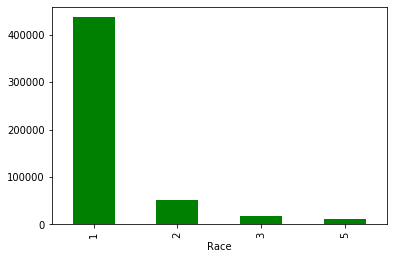

In [59]:
Merged_Outpatient.groupby('Race')['type'].count().plot.bar(color = 'g')

In [60]:
Male = np.where(Merged_Outpatient['Gender']==0, 'Female', 'Male')

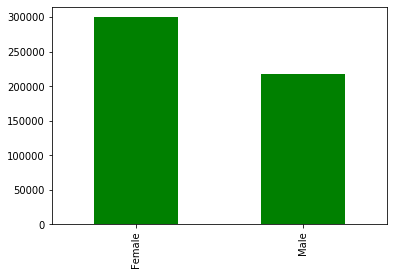

In [61]:
Merged_Outpatient.groupby(Male)['Chronic_Conditions'].count().plot.bar(color = 'g')

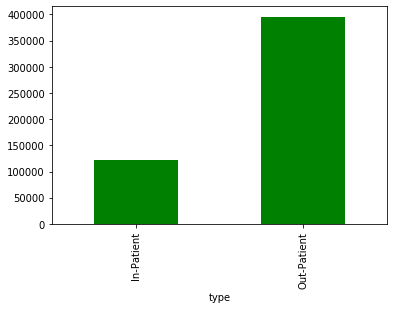

In [62]:
Merged_Outpatient.groupby('type')['Race'].count().plot.bar(color = 'g')

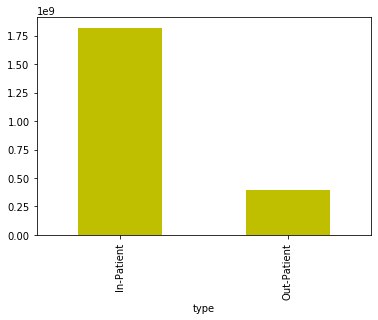

In [63]:
Merged_Outpatient.groupby('type')['IPAnnualReimbursementAmt'].sum().plot.bar(color = 'y')

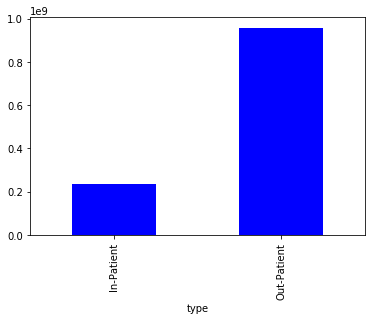

In [64]:
Merged_Outpatient.groupby('type')['OPAnnualReimbursementAmt'].sum().plot.bar(color = 'b')

In [65]:
Merged_Outpatient.columns

Index(['BeneID', 'DOB', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
    

In [66]:
Merged_Outpatient['Profit-Provider'] = Merged_Outpatient['IPAnnualReimbursementAmt']+ Merged_Outpatient['OPAnnualReimbursementAmt']+ Merged_Outpatient['IPAnnualDeductibleAmt']+ Merged_Outpatient['OPAnnualDeductibleAmt']

In [67]:
rcParams['figure.figsize'] = 18, 6

Merged_Outpatient.groupby('Race')['Profit-Provider'].mean()

Race
1    7613.782994
2    8649.726720
3    7283.389518
5    7340.043868
Name: Profit-Provider, dtype: float64

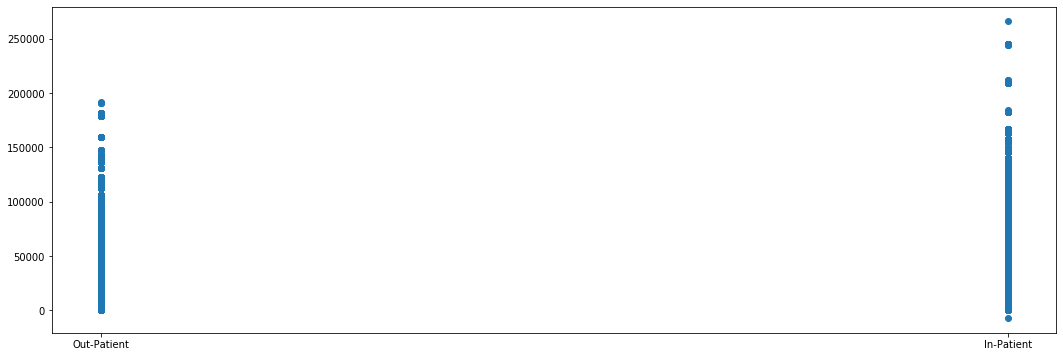

In [68]:
rcParams['figure.figsize'] = 18, 6
plt.scatter(x=Merged_Outpatient['type'],y=Merged_Outpatient['Profit-Provider'])

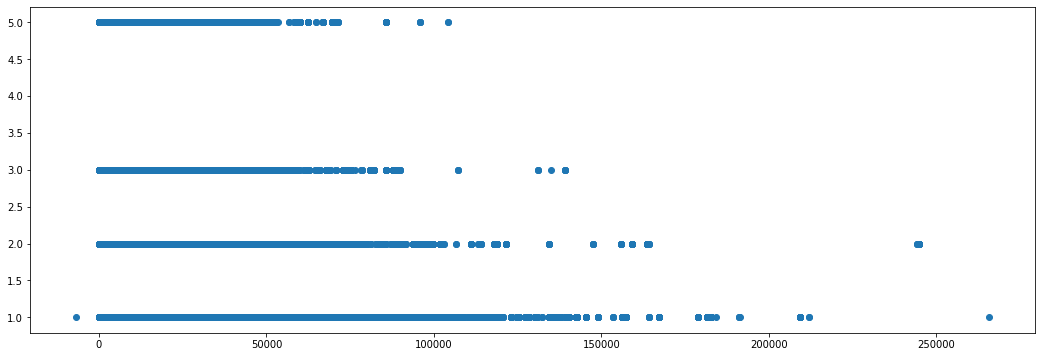

In [69]:
plt.scatter(x=Merged_Outpatient['Profit-Provider'],y=Merged_Outpatient['Race'])

In [ ]:
Merged_Outpatient.groupby('type')['Profit-Provider'].plot.hist()

In [ ]:
ClaimStartDt	ClaimEndDt

In [79]:
Merged_Outpatient['ClaimStartDt'] = pd.to_datetime(Merged_Outpatient['ClaimStartDt'])
Merged_Outpatient['ClaimEndDt'] = pd.to_datetime(Merged_Outpatient['ClaimEndDt'])
Merged_Inpatient['ClaimStartDt'] = pd.to_datetime(Merged_Inpatient['ClaimStartDt'])
Merged_Inpatient['ClaimEndDt'] = pd.to_datetime(Merged_Inpatient['ClaimEndDt'])

In [83]:
Merged_Inpatient['ClaimStart_Day'] = Merged_Inpatient['ClaimStartDt'].dt.dayofweek
Merged_Inpatient['ClaimStart_Week'] = Merged_Inpatient['ClaimStartDt'].dt.strftime("%V")
Merged_Outpatient['ClaimStart_Day'] = Merged_Outpatient['ClaimStartDt'].dt.dayofweek
Merged_Outpatient['ClaimStart_Week'] = Merged_Outpatient['ClaimStartDt'].dt.strftime("%V")

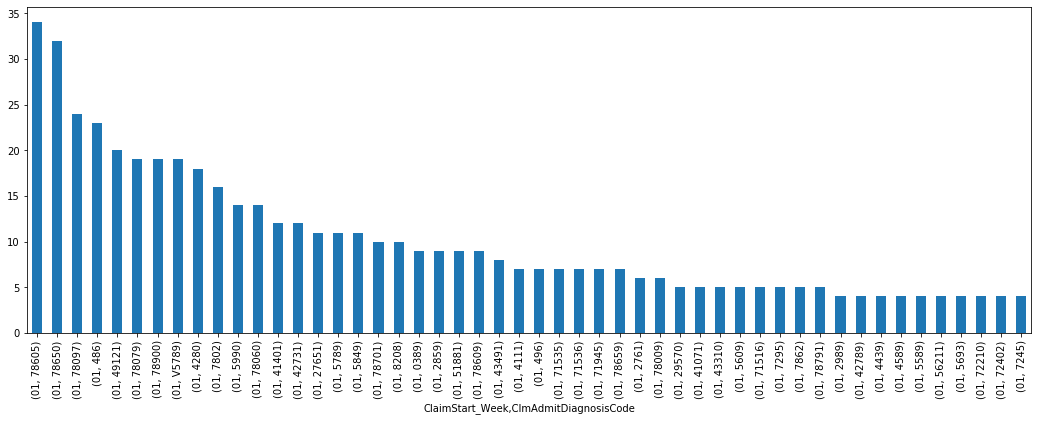

In [114]:
Merged_Inpatient.groupby('ClaimStart_Week')['ClmAdmitDiagnosisCode'].value_counts().head(50).plot.bar()

In [133]:
Merged_Outpatient['ClmAdmitDiagnosisCode'].value_counts().sort_values(ascending=False).head(10)

0        412312
V7612      4074
42731      3001
4019       2627
25000      2346
V5883      1871
7295       1616
78900      1550
V5861      1536
2724       1506
Name: ClmAdmitDiagnosisCode, dtype: int64

In [106]:
Merged_Inpatient['ClmAdmitDiagnosisCode'].value_counts().sort_values(ascending=False).head()

78650    1731
78605    1669
486      1438
4280     1106
7802     1018
Name: ClmAdmitDiagnosisCode, dtype: int64

In [144]:
top5_CDC_IN = ['78650','78605','486','4280','7802']
top5_CDC_Out = ['V7612','42731','4019','25000','V5883']
CDC_In = Merged_Inpatient[Merged_Inpatient['ClmAdmitDiagnosisCode'].isin(top5_CDC_IN)]
CDC_Out = Merged_Outpatient[Merged_Outpatient['ClmAdmitDiagnosisCode'].isin(top5_CDC_Out)]
top1_in = Merged_Inpatient[Merged_Inpatient['ClmAdmitDiagnosisCode'] == '78605']

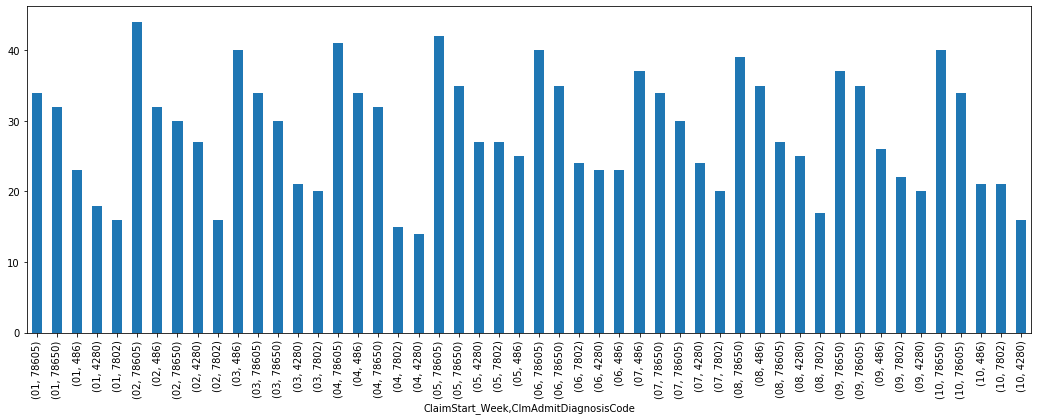

In [140]:
rcParams['figure.figsize'] = 18, 6
CDC_In.groupby('ClaimStart_Week')['ClmAdmitDiagnosisCode'].value_counts().head(50).plot.bar()

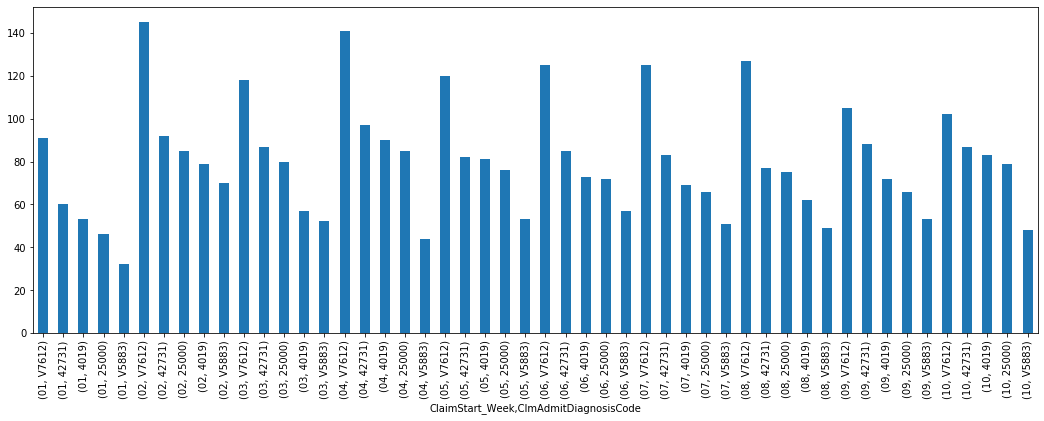

In [146]:
CDC_Out.groupby('ClaimStart_Week')['ClmAdmitDiagnosisCode'].value_counts().head(50).plot.bar()

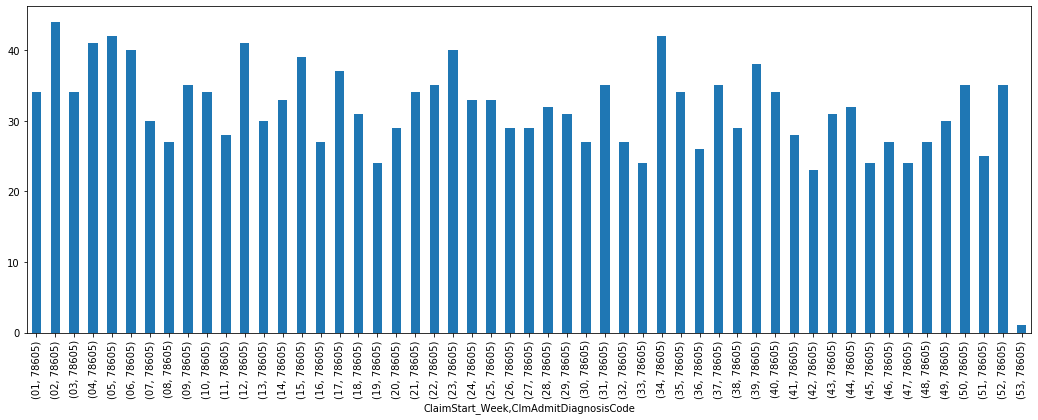

In [145]:
top1_in.groupby('ClaimStart_Week')['ClmAdmitDiagnosisCode'].value_counts().plot.bar()